# Unravelling mental representations in aphantasia through unsupervised

alignment

Project design and study simulation

Maël Delem  
2/02/2024

Research on aphantasia is confronted with a long-standing conundrum of all research on consciousness and representations, namely the theoretical inaccessibility of subjective representations. Drawing on concepts from similarity and representation research, I endorse the view that the study of an individual’s mental representations is made possible by exploiting second-order isomorphism. The concept of second-order isomorphism means that correspondence should not be sought in the first-order relation between (a) an external object and (b) the corresponding internal representation, but in the second-order relation between (a) the perceived similarities between various external objects and (b) the similarities between their corresponding internal representations. Building on this idea, this study project report was divided into four parts. **First**, I outline the central ideas underlying similarity research and its applicability to aphantasia research. **Second**, I present a complete paradigm with an experimental design and a data analysis plan. The design will be based on multi-arrangement and inverse multidimensional scaling, a protocol that can be implemented online to conduct such large-scale research with high efficiency. The analysis plan will present a state-of-the-art method for similarity analysis, unsupervised alignment with Gromov-Wasserstein optimal transport (GWOT). **Third**, I report a data simulation I’ve done of a potential outcome of this study, and the successful analysis of this synthetic data using GWOT alignment. **Fourth**, I analyse the feasability of such a project given the material constraints of my thesis. I conclude with the expected utility and benefits of this project.

# Work-In-Progress everywhere, *so look away! Shoo!*

I just wanted to try [Quarto’s new manuscript format](https://quarto.org/docs/manuscripts/) with this personal project. Conclusion: it’s ***incredibly cool***.

> **Project inception**
>
> This project stems from several elements:
>
> 1.  The long standing knowledge of the fact that internal representations seem impossible to reach due to their subjective nature.
>
> 2.  The discovery of the article of Shepard & Chipman ([1970](#ref-shepardSecondorderIsomorphismInternal1970)) that expose the idea of “second-order isomorphism”.
>
> 3.  The discovery of state-of-the-art and accessible unsupervised analytic methods to study this principle in an astonishing way. The last two discoveries (and many more) are the fruit of amazing discussions and recommendations from Ladislas when he came to the lab on Jan. 26. These motivated me to try to implement GWOT in R on data that I wanted to create myself to emulate a study we could do.
>
> **I promise that I did this mostly on my spare time, we have too many other things to do elsewhere.**
>
> *Note: This website may seem very fancy. I wanted to take advantage of this personal project to try [Quarto’s new manuscript format](https://quarto.org/docs/manuscripts/) for scientific editing. Conclusion: it’s **awesome**. It is very likely that I’ll end up writing my thesis using [Quarto’s book format](https://quarto.org/docs/books/) (through RStudio). This will allow me to render the raw text and computations as beautifully formatted PDF and Word documents with low effort, and eventually port it as a self-contained website when I’m authorized to share it openly… All with a single command, just like I did for this website. **This also means that you can read the present report on a PDF or Word if you wish to do so, the links are in the header**. You’ll freeze the nice interactive figures though. As a bonus for the curious (or the reviewer), the “MECA Bundle” contains absolutely everything tied to this manuscript, well sorted, from the code scripts and configuration files to the final documents in all formats. **Awesome, I tell you**.*

# 1. Theoretical context

## 1.1 From similarity to second-order isomorphism

When we try to compare our thoughts and representations with those of others, we quickly realize that the task will be really difficult, if not impossible, as we are of course incapable of “living in someone else’s head”. If we both try to imagine a dog, I can examine what goes on in my head, so can you, but apart from trying to describe our experiences verbally, we are up against a wall.

Now, what if I asked you to tell me how similar you think a dog and a panther look like? Let’s say, in the context of the animal kingdom as a whole. Visualize them well. Well, I could tell you that, *in my opinion, a dog and a panther look no more alike than a dog and a whale*. You might tell me: <span class="column-margin margin-aside">*For this thought experiment, let’s imagine two things: (1) that someone could honestly say that, and (2) that people would be rating the animals purely on the basis of their mental images, and not on categorical features (number of legs, fur, etc.), which is unfortunately almost* ***never*** *the case in reality.*</span>

> “***What on earth do you imagine a dog and a panther look like? Do you also think that a dog looks nothing like a cat? What goes on in your head?***”

…And many people probably agree with you. They mentally “see” and compare certain items the same way you do… And just like that, *we are back on track*. We managed to better “compare our thoughts”! And we even felt we could dive a bit into the “weird” representations of someone else.

The study of individual differences in the format of representations and the attempt at understanding those of others obviously has a very rich history. It has interested many fields, in philosophy, linguistics, sociology, biology, psychology, or neuroscience, to name but a few. A myriad of ideas, concepts, models, methods, and paradigms have tried to deepen our understanding of representations and find the “key” to objectifying them. The principle I tried to illustrate with the thought experiment above is at the heart of one of these methods trying to unravel representations that was born in psychophysics[1]: the study of ***similarity.***

## 1.2 Work-In-Progress

## 1.3 Psychological spaces and aphantasia

While attempting to demonstrate the uselessness of the concept of similarity as a philosophical and scientific notion, Goodman ([1972](#ref-goodmanSevenStricturesSimilarity1972)) has inadvertently expressed an aspect of similarity judgements of primary importance to us aphantasia researchers:

> Comparative judgments of similarity often require not merely selection of relevant properties but a weighting of their relative importance, and variation in both relevance and importance can be rapid and enormous. Consider baggage at an airport checking station. The spectator may notice shape, size, color, material, and even make of luggage; the pilot is more concerned with weight, and the passenger with destination and ownership. Which pieces are more alike than others depends not only upon what properties they share, but upon who makes the comparison, and when. . . . Circumstances alter similarities. <span class="column-margin margin-aside">*Goodman’s claim was dismissed since then by propositions of robust mathematical models of similarity, e.g. Gardenfors ([2004](#ref-gardenforsConceptualSpacesFramework2004)), Decock & Douven ([2011](#ref-decockSimilarityGoodman2011)).*</span>

This can be easily reversed as an argument in favor of the **potential of similarity analyses to highlight the inter-individual differences in sensory mental representations**. For example, should we ask individuals to judge the similarities in shape or color between various objects, the *differences between the similarity structures* of individuals will be precisely the most important phenomenon for us, far less than the constancy between these structures. If we can account for the context dependence, as we will propose here with explicit instructions, clever task design, and hypothesis-neutral analysis, we could overcome the limitations of the inherently subjective nature of similarity judgements.

This idea of a difference in similarity judgements in aphantasia seems to transpire in the results of Bainbridge et al. ([2021](#ref-bainbridgeQuantifyingAphantasiaDrawing2021)) on their drawing study. They have shown that aphantasics had more schematic representations during recall, accurate in their spatial positioning, but with less sensory details. This difference can be seen from two perspectives: (1) a memory deficit for sensory properties; (2) a different representational structure of the items in their psychological spaces. In the latter case, aphantasics would have greater/faster abstraction of their representation of a perceived scene, reducing the amount of encoded sensory details unconsciously considered to be relevant. Both (1) and (2) can theoretically explain the same behavioural response, i.e. less sensory elements and correct spatial recall accuracy in aphantasic drawings, but **the two have drastically different consequences on how we define, characterize, and judge aphantasia.**

The dominant hypothesis seems to be that aphantasics simply have an episodic or general memory deficit. Conversely, I hypothesize that aphantasics have different representational structures than phantasics in certain dimensions of their psychological spaces (notably sensory, but potentially abstract too). More generally, I hypothesize that the concept of visual imagery evaluates in reality the continuous spectrum of representational structures in *sensory* dimensions of psychological spaces. Mirroring visual imagery, spatial imagery could also be a rough psychometric evaluation of the continuous spectrum of structural differences in *conceptual/abstract* dimensions of psychological spaces. In this view, the psychological space of aphantasics would constrain internal representations to particularly abstract forms from a very early stage, thus selectively limiting the item properties thereafter encoded in long-term memory. In other terms, **I hypothesize that aphantasia would not be characterized by an episodic memory deficit, but by an episodic memory *selectivity* caused by the specific characteristics of their representational structures and psychological spaces.** This selectivity would have, as we already hypothesized several times, benefits and drawbacks.

Gardenfors ([2004](#ref-gardenforsConceptualSpacesFramework2004)) proposed that differences in psychological (in his terms, conceptual) spaces could arise from various sources, whether innate, due to learning, or broader cultural or social differences. All these hypotheses could be coherent to explain the sources of aphantasia. Nevertheless, the study of these sources should be the subject of very large-scale or longitudinal studies, which are out of the scope of this project.

Here, we shall rather attempt to **develop a method to characterize the differences in aphantasics’ representational structures and psychological spaces.**

## 1.4 The present project

# 2. Methods

Roads & Love ([2024](#ref-roads2024)), in a recent review on the state and perspectives of similarity research, highlighted two challenges that studies in this field had to face: (1) The high cost of collecting behavioral data on a large number of stimuli; (2) The lack of software packages being a high barrier to entry, making the task of coding models difficult for the uninitiated.

To solve these problems, we present here two solutions, respectively for (1) experimental design and (2) data analysis:

1.  A recent method to efficiently acquire similarity judgements, the “multiple arrangement of items” and “inverse multidimensional scaling” developed by Kriegeskorte & Mur ([2012](#ref-kriegeskorteInverseMDSInferring2012)).
2.  An accessible and robust Python toolbox provided by Sasaki et al. ([2023](#ref-sasakiToolboxGromovWassersteinOptimal2023)) to conduct unsupervised alignment analysis using Gromov-Wasserstein optimal transport.

## 2.1 Experimental design

### Multi-arrangement and inverse multidimensional scaling

Assuming a geometric model of representational similarities, Kriegeskorte & Mur ([2012](#ref-kriegeskorteInverseMDSInferring2012)) developed a multi-arrangement (MA) method to efficiently acquire (dis)similarity judgments for large sets of objects. The subject has to perform multiple arrangements of item subsets adaptively designed for optimal measurement efficiency and for estimating the representational dissimilarity matrix (RDM) by combining the evidence from the subset arrangements.

The procedure is illustrated in <a href="#fig-multi-arrangement" class="quarto-xref">Figure 2.1</a>.

<figure id="fig-multi-arrangement">
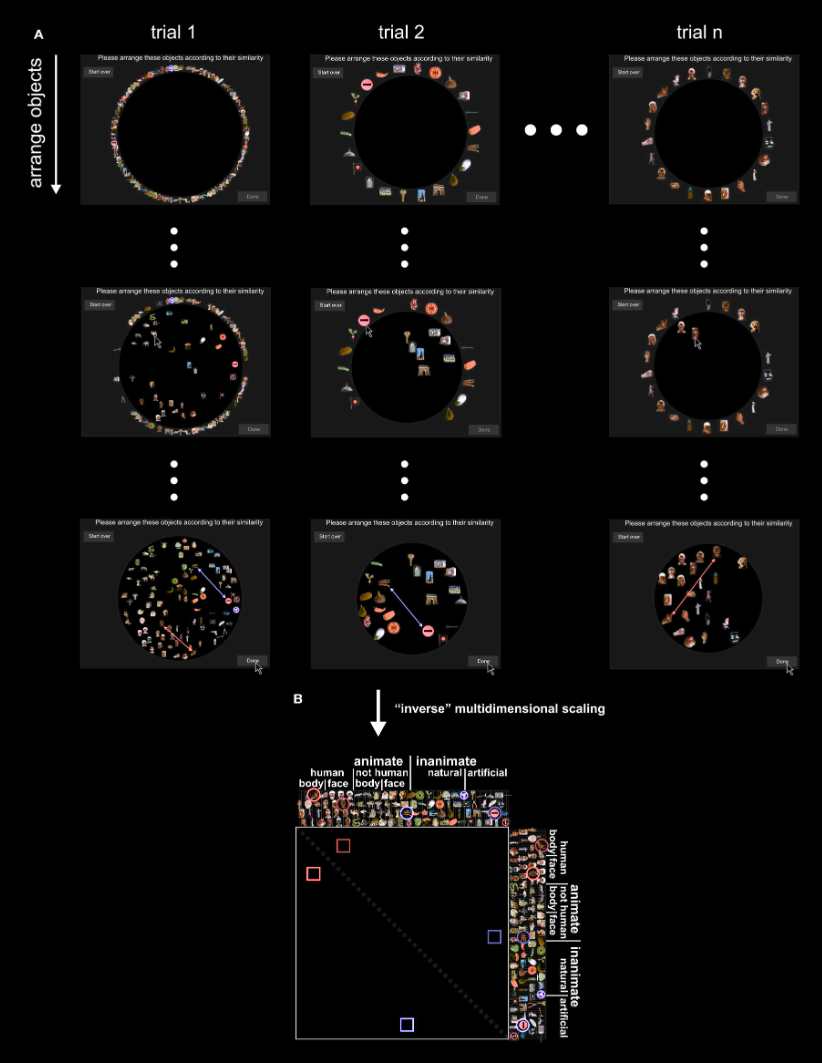
<figcaption>Figure 2.1: <strong>Acquiring similarity judgements with the multi-arrangement method. (A)</strong> Subjects are asked to arrange items according to their similarity, using mouse drag-and-drop on a computer. The similarity measure is taken as the distances between the items: similar items are closer, while dissimilar items are further apart. The upper part of the figure shows screenshots at different moments of the acquisition for one subject. Columns are trials and rows show the object arrangements over time, running from the start (top row) to the end (last row). The first trial contains all items; subsequent trials contain subsets of items that are adaptively selected to optimally estimate judged similarity for each subject. <strong>(B)</strong> Once acquisition of the final judgements is completed, inter-item distances in the final trial arrangements are combined over trials by rescaling and averaging to yield a single dissimilarity estimate for each object pair. The process is illustrated in this figure for two example item pairs: a boy’s face and a hand (red), and carrots and a stop sign (blue). Their single-trial dissimilarity estimates (arrows) are combined into a single dissimilarity estimate, which is placed at the corresponding entry of the RDM (lower panel). Mirror-symmetric entries are indicated by lighter colors. Figure from <span class="citation" data-cites="murHumanObjectSimilarityJudgments2013">Mur et al. (<a href="#ref-murHumanObjectSimilarityJudgments2013" role="doc-biblioref">2013</a>)</span>.</figcaption>
</figure>

A key strength of this method that sets it as particularly effective is the “adaptive” part. The goal of the process is to acquire similarity judgements as precisely as possible while minimizing the total amount of trials. To do so, starting from the second trial, selected subsets of the items to be compared are presented to the subject: these items are the ones that were very close on-screen in previous trials and thus had their distance evaluated with lower accuracy by the subject. As the subject has to fill the entire “arena” with the items, these subsequent trials will necessarily increase the level of precision in the similarity judgement between pairs of items. The second key benefit of this method is the time and effort gain compared to others. For example, to compare every pair of items among 64 different items would require $\frac{64 \times (64-1)}{2} = 2016$ comparisons (i.e. trials). This would be extremely time-consuming, while also losing the *context-independence* afforded by the MA method due to the presence of other items around every time the subject mentally performs a pairwise comparison.

Historically, when referring to the projection of the representations of stimuli (e.g., coordinates in geometric space) from a high-dimensional space into a lower-dimensional space, inference algorithms were commonly called multidimensional scaling ([Roads & Love, 2024](#ref-roads2024)). By analogy, the process of combining several lower-dimensional (2D) similarity judgements on-screen to form one higher dimensional similarity representation (in the RDM) can be conceptually seen as “inverse” multidimensional scaling, hence the name given to the method by Kriegeskorte & Mur ([2012](#ref-kriegeskorteInverseMDSInferring2012)).

### Principle

The idea is simple: for a given set of items that have distinct and very pictorial visual properties, we would ask a wide range of aphantasics, phantasics or hyperphantasics to imagine, mentally compare and make similarity judgements between the items. To compare these representations with actual perceptual representations, the subjects would also perform the same task afterwards, this time with actual pictures to compare. Subjects would also fill our usual psychometric imagery questionnaires.

<figure id="fig-spam-mur">
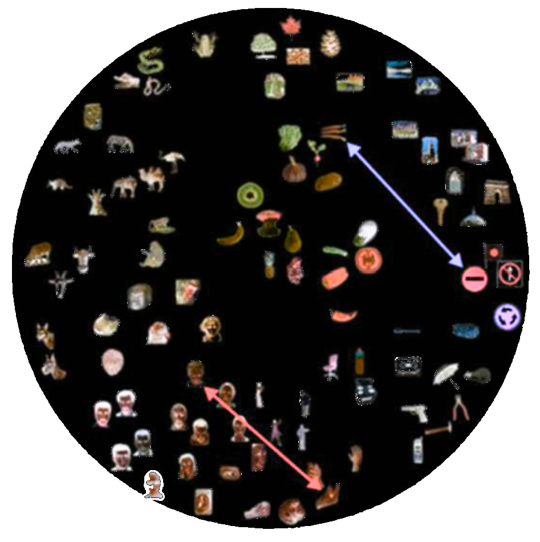
<figcaption>Figure 2.2: Arena layout of the MA protocol used by <span class="citation" data-cites="murHumanObjectSimilarityJudgments2013">Mur et al. (<a href="#ref-murHumanObjectSimilarityJudgments2013" role="doc-biblioref">2013</a>)</span> to acquire perceptual similarity judgements on natural images. <em>Click to expand.</em></figcaption>
</figure>

To “compare imagined items”, we could use a “word” version of the MA paradigm. An example from Majewska et al. ([2020](#ref-majewskaSpatialMultiarrangementClustering2020)) - *who used the method to build large-scale semantic similarity resources for Natural Language Processing systems* - is represented in <a href="#fig-majewska" class="quarto-xref">Figure 2.3</a>.

<figure id="fig-majewska">
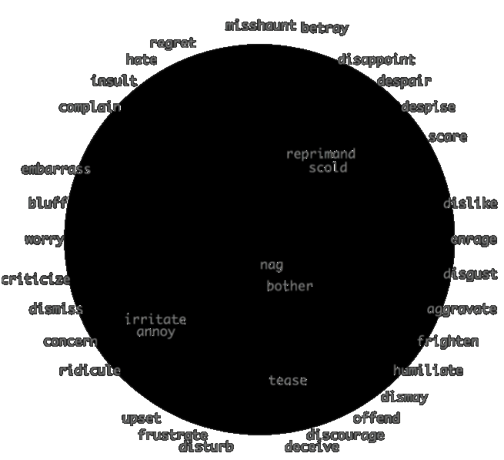
<figcaption>Figure 2.3: Arena layout of the MA protocol used by <span class="citation" data-cites="majewskaSpatialMultiarrangementClustering2020">Majewska et al. (<a href="#ref-majewskaSpatialMultiarrangementClustering2020" role="doc-biblioref">2020</a>)</span> to acquire similarity judgements on word pairs. <em>Click to expand.</em></figcaption>
</figure>

We could have the stimuli rated by another set of participants on several features.

> « *We deliberately did not specify which object properties to focus on, to avoid biasing participants’ spontaneous mental representation of the similarities between objects. Our aim was to obtain similarity judgments that reflect the natural representation of objects without forcing participants to rely on one given dimension. However, participants were asked after having performed the task, what dimension(s) they used in judging object similarity.* » ([Jozwik et al., 2016](#ref-jozwik2016))

> « ***All but one of the 16 participants reported arranging the images according to a categorical structure.*** » ([Jozwik et al., 2017](#ref-jozwik2017))

This result of Jozwik et al. ([2017](#ref-jozwik2017)) suggests that we should give an explicit instruction about the features to focus on, otherwise everyone might bypass visual features and mental images in favour of concepts and categories, regardless of their mental imagery profile.

In contrast, if we ask to focus specifically on the visual features, then ask subjects about the strategy they used to evaluate the similarities, then on the subjectively felt mental format of these strategies, we might grasp better insight on the sensory representations of subjects.

We could even go for several comparisons - even though this would increase quadratically the number of trials - e.g. :

-   Evaluate to what extent the **shape** *of these animals are* ***similar*** **at rest, ignoring size differences.**

-   Evaluate to what extent these animals **sound like each other.**

-   Etc.

> *Note to be added: if you do not know the animal, just guess its placement, as this situation is quite unlikely to happen (animals chosen are fairly common knowledge).*

Kawakita et al. ([2023](#ref-kawakita2023)): To assess whether the color dissimilarity structures from different participants can be aligned in an unsupervised manner, we divided color pair similarity data from a large pool of 426 participants into five participant groups (85 or 86 participants per group) to obtain five independent and complete sets of pairwise dissimilarity ratings for 93 color stimuli (Fig. 3a). Each participant provided a pairwise dissimilarity judgment for a randomly allocated subset of the 4371 possible color pairs. We computed the mean of all judgments for each color pair in each group, generating five full dissimilarity matrices referred to as Group 1 to Group 5.

### Stimuli

We would have a list of animal items, that would have several characteristics:

<figure id="fig-marr">
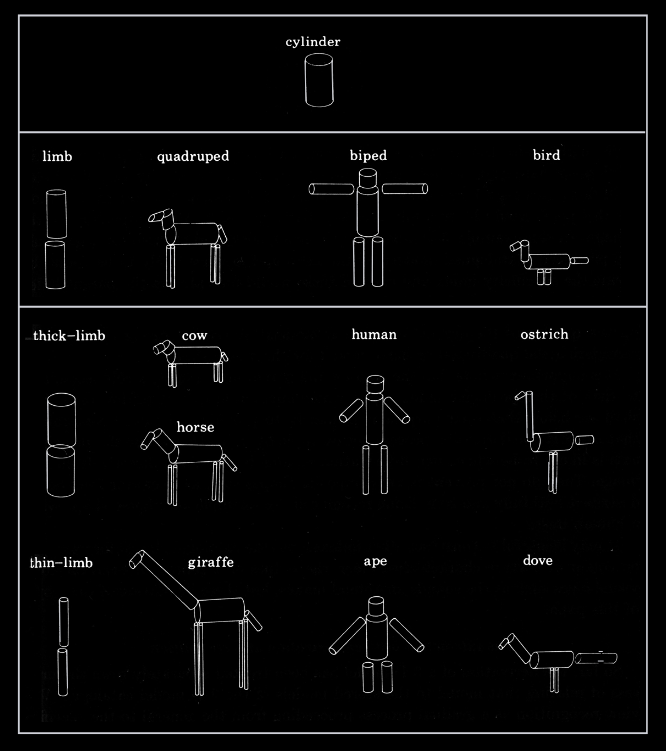
<figcaption>Figure 2.4: Representing the characteristics of shapes with cylinders. Figure from <span class="citation" data-cites="marr1997">Marr et al. (<a href="#ref-marr1997" role="doc-biblioref">1997</a>)</span>. <em>Click to expand.</em></figcaption>
</figure>

-   A name

-   A category

-   A shape

We need orthogonal data:

-   Each class of animal should include each shape (roughly)

-   Each shape should have an animal

This would imply that category cannot be derived from shape, and vice-versa. Thus, a **sorting by shape would reveal to be innately visual** (or maybe spatial, if shape concerns this type of imagery), and a **sorting by category would reveal an abstraction** from these shapes. We expect that the two will be mixed to some degree in every subject, but that low-imagery would rather tend towards category sorting, while high-imagery would tend towards shape sorting.

Shapes could be very tricky stimuli to discuss. Gardenfors ([2004](#ref-gardenforsConceptualSpacesFramework2004)) noted that we only have a very sketchy understanding of how we perceive and conceptualize things according to their shapes. The works of Marr et al. ([1997](#ref-marr1997)) highlight this difficulty when analysing the complexity of the hierarchical judgements of shapes and volumes, as shown in <a href="#fig-marr" class="quarto-xref">Figure 2.4</a>.

## 2.2 Data analysis plan

### Unsupervised alignment rationale

Visual images can be represented as points in a multidimensional psychological space. Embedding algorithms can be used to infer latent representations from human similarity judgments. While there are an infinite number of potential visual features, an embedding algorithm can be used to identify the subset of salient features that accurately model human-perceived similarity. (*From Roads’ CV*)

Using an optimization algorithm, the free parameters of a psychological space are found by maximizing goodness of fit (i.e., the loss function) to the observed data. Historically, when referring specifically to the free parameters that correspond to the representation of stimuli (e.g., coordinates in geometric space), inference algorithms were commonly called multidimensional scaling (MDS), or simply scaling, algorithms.

In the machine learning literature, analogous inference algorithms are often called embedding algorithms. The term “embedding” denotes a higher-dimensional representation that is embedded in a lower-dimensional space. For that reason, the inferred mental representations of a psychological space could also be called a psychological embedding.

Numerous techniques exist, and each has limitations. Popular techniques for comparing representations include RSA Kriegeskorte et al. ([2008](#ref-kriegeskorte2008)) and canonical correlation analysis (CCA) (Hotelling 1936). Briefly, RSA is a method for comparing two representations that assesses the correlation between the implied pairwise similarity matrices. CCA is a method that compares two representations by finding a pair of latent variables (one for each domain) that are maximally correlated.

One might be tempted to compare two dissimilarity matrices assuming stimulus-level “external” correspondence: my “red” corresponds to your “red”(Fig. 1d). This type of supervised comparison between dissimilarity matrices, known as Representational Similarity Analysis (RSA), has been widely used in neuroscience to compare various similarity matrices obtained from behavioural and neural data. However, there is no guarantee that the same stimulus will necessarily evoke the same subjective experience across different participants. Accordingly, when considering which stimuli evoke which qualia for different individuals, we need to consider all possibilities of correspondence: my “red” might correspond to your “red”, “green”, “purple”, or might lie somewhere between your “orange” and “pink”(Fig. 1e). Thus, we compare qualia structures in a purely unsupervised manner, without assuming any correspondence between individual qualia across participants.

### Gromov-Wasserstein optimal transport

To account for all possible correspondences, we use an unsupervised alignment method for quantifying the degree of similarity between qualia structures. As shown in Fig. 2a, in unsupervised alignment, we do not attach any external (stimuli) labels to the qualia embeddings. Instead, we try to find the best matching between qualia structures based only on their internal relationships (see Methods). After finding the optimal alignment, we can use external labels, such as the identity of a color stimulus (Fig. 2b), to evaluate how the embeddings of different individuals relate to each other. This allows us to determine which color embeddings correspond to the same color embeddings across individuals or which do not. Checking the assumption that these external labels are consistent across individuals allows us to assess the plausibility of determining accurate inter-individual correspondences between qualia structures of different participants.

To this end, we used the Gromov-Wasserstein optimal transport (GWOT) method, which has been applied with great success in various fields. GWOT aims to find the optimal mapping between two point clouds in different domains based on the distance between points within each domain. Importantly, the distances (or correspondences) between points “across” different domains are not given while those “within” the same domain are given. GWOT aligns the point clouds according to the principle that a point in one domain should correspond to another point in the other domain that has a similar relationship to other points. The principle of the method is illustrated in <a href="#fig-gwot-kawa" class="quarto-xref">Figure 2.5</a>

<figure id="fig-gwot-kawa">
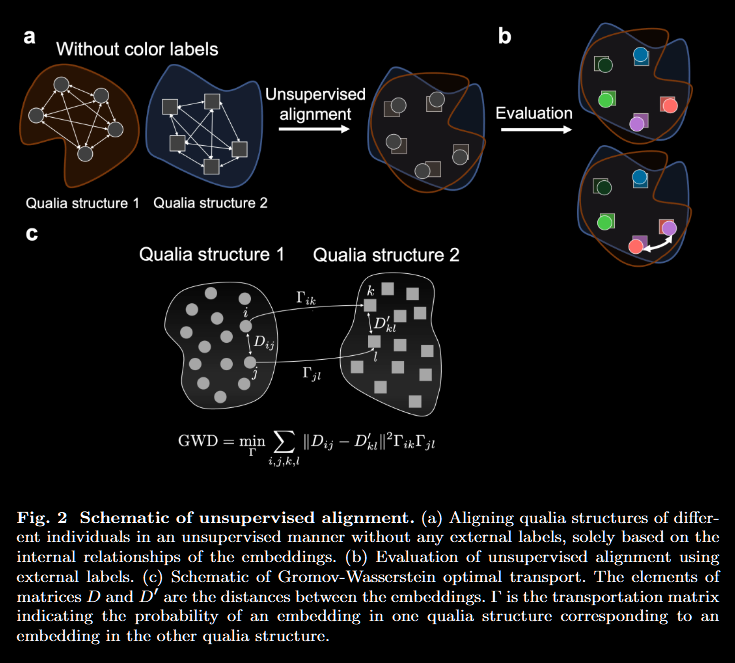
<figcaption>Figure 2.5: Gromov-Wassertein optimal transport principle. Figure from <span class="citation" data-cites="kawakita2023">Kawakita et al. (<a href="#ref-kawakita2023" role="doc-biblioref">2023</a>)</span>. <em>Click to expand.</em></figcaption>
</figure>

We first computed the GWD for all pairs of the dissimilarity matrices of the 5 groups (Group 1-5) using the optimized $\epsilon$. In Fig. 3b, we show the optimized mapping $\Gamma*$ between Group 1 and Groups 2-5 (see Supplementary Figure S1 for the other pairs). As shown in Fig. 3b, most of the diagonal elements in $\Gamma*$ show high values, indicating that most colors in one group correspond to the same colors in the other groups with high probability. We next performed unsupervised alignment of the vector embeddings of qualia structures. Although $\Gamma*$ provides the rough correspondence between the embeddings of qualia structures, we should find a more precise mathematical mapping between qualia structures in terms of their vector embeddings to more accurately assess the similarity between the qualia structures. Here, we consider aligning the embeddings of all the groups in a common space.

By applying MDS, we obtained the 3-dimensional embeddings of Group 1 and Groups 2-5, referred to as X and Yi, where i = 2, …, 5 (Fig. 3c). We then aligned Yi to X with the orthogonal rotation matrix Qi, which was obtained by solving a Procrustes-type problem using the optimized transportation plan $\Gamma*$ obtained through GWOT (see Methods). Fig. 3d shows the aligned embed- dings of Group 2-5 (QiYi) and the embedding of Group 1 (X) plotted in the embedded space of X. Each color represents the label of a corresponding external color stimulus. Note that even though the color labels are shown in Fig. 3d, this is only for the visualization purpose and the whole alignment procedure is performed in a purely unsupervised manner without relying on the color labels. As can be seen in Fig. 3d, the embeddings of similar colors from the five groups are located close to each other, indicating that similar colors are ‘correctly’ aligned by the unsupervised alignment method.

To evaluate the performance of the unsupervised alignment, we computed the k-nearest color matching rate in the aligned space. If the same colors from two groups are within the k-nearest colors in the aligned space, we consider that the colors are correctly matched. We evaluated the matching rates between all the pairs of Groups 1-5. The averaged matching rates are 51% when k = 1, 83% when k = 3, and 92% when k = 5, respectively. This demonstrates the effectiveness of the GW alignment for correctly aligning the qualia structures of different participants in an unsupervised manner.

However, as can be seen in Fig. 4b, the optimized mapping $\Gamma*$ is not lined up diagonally unlike the optimized map- pings between color-neurotypical participants groups shown in Fig. 3b (see Supplementary Figure S1 for the other pairs). Accordingly, top k matching rate between Group 1-5 and Group 6 is 3.0% when k = 1 (Fig. 4c), which is only slightly above chance ($\approx$ 1%). The matching rate did not improve even when we relaxed the criterion (6.9% and 11% for k = 3 and k = 5, respectively). Moreover, all of the GWD values between Group 1-5 and Group 6 are larger than any of the GWD values between color-neurotypical participant groups (Fig. 4d).

These results indicate that the difference between the qualia structures of neuro-typical and atypical participants is significantly larger than the difference between the qualia structures of neuro-typical participants.

## 2.3 Paradigm summary

The experimental design and data analysis plans are succinctly summarised in <a href="#fig-expe-conditions" class="quarto-xref">Figure 2.6</a>.

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<tbody>
<tr class="odd">
<td style="text-align: left;"><div width="50.0%" data-layout-align="left">
<figure id="fig-expe-subject">
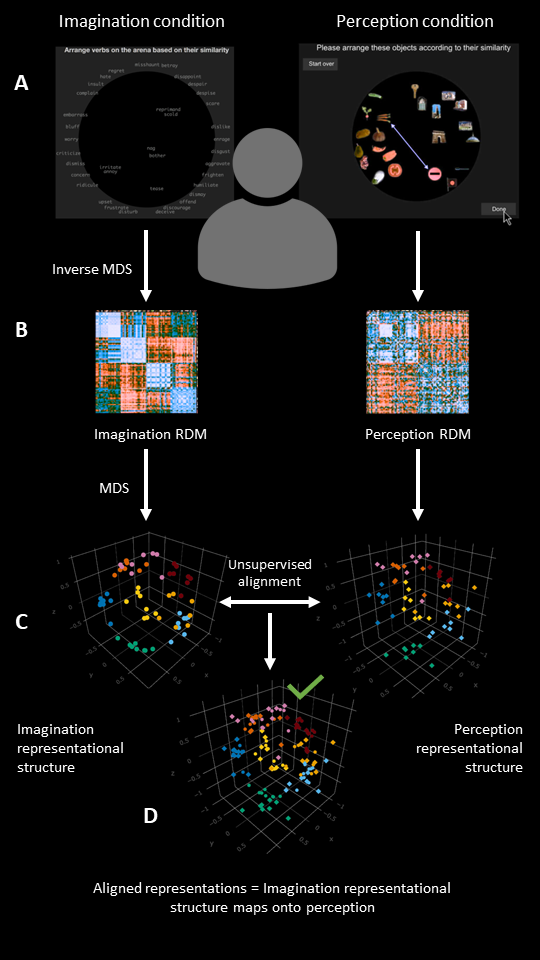
<figcaption>(a)</figcaption>
</figure>
</div></td>
<td style="text-align: left;"><div width="50.0%" data-layout-align="left">
<figure id="fig-expe-group">
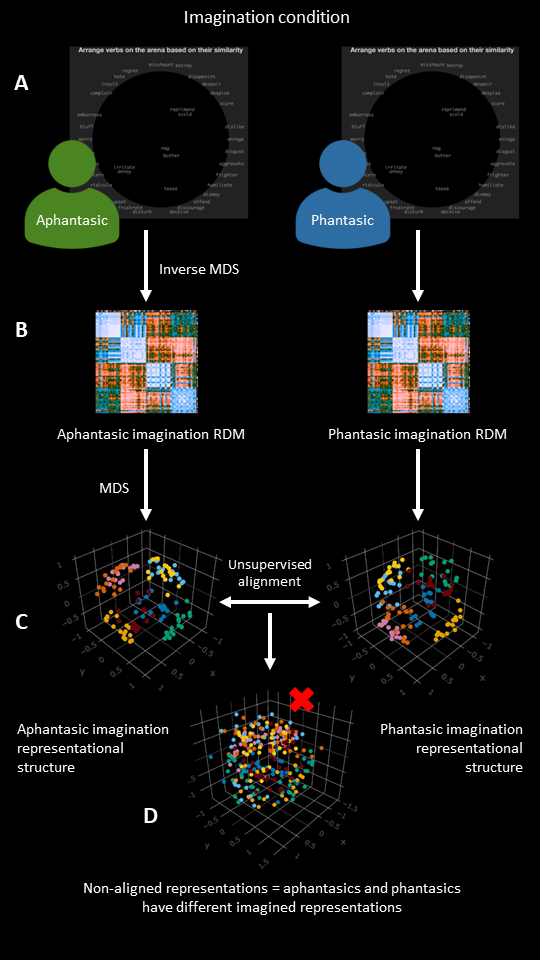
<figcaption>(b)</figcaption>
</figure>
</div></td>
</tr>
</tbody>
</table>

Figure 2.6: Summary schematics of the proposed experimental protocol and data analysis plan. *Click on the sub-figures to expand them.* <a href="#fig-expe-subject" class="quarto-xref">Figure 2.6 (a)</a> represents the two conditions to be completed by each subject. These two conditions will allow to compute comparisons (alignments) within a subject’s own perceptual and imaginal representational structures, but also between subjects (or groups) for each modality (see the next figure’s description). **(A)** The subject performs two simililarity judgement tasks using the MA paradigm presented earlier. **(B)** The low-dimensional similarity judgements are converted to a high-dimensional Representational Dissimilarity Matrix (RDM) through inverse-MDS as a follow-up to extract the results of the MA. **(C)** The RDMs are then reduced in dimensionality once again to extract relevant dimensions reflecting inferred features of the items through MDS, yielding embeddings. Three-dimensional projections of these embeddings have been chosen here for visualization purposes. **(D)** These embeddings are compared through unsupervised alignment using GWOT, which results in an estimate of the degree of alignment of the two representational structures and in coordinates of aligned embeddings. These coordinates allow us to examine the 3D visualization shown here and judge by ourselves the “look” of the alignment. Here the perception representation aligns with the imagination one, from which we could infer that imagined representations are made of sensory (rather than abstract properties). We expect inter-individual variability in these perception-imagination alignments, as shown in the next figure. <a href="#fig-expe-group" class="quarto-xref">Figure 2.6 (b)</a> represents the comparison between the representational structure of different cognitive profiles. In practice, all pairs of subjects will be compared to assess their representational structure alignments, independently of arbitrary groups. This is computationally heavy, but analytically very powerful. This figure also tacitly shows an idea supporting the use of unsupervised alignment: it is possible that RDMs seem to be very correlated and similar, as shown in step **(B)**, but do not align when compared without supervision. This contrasts with several supervised alignment methods (such as RSA, see [Kriegeskorte et al., 2008](#ref-kriegeskorte2008)) which usually use the RDM as-is. This difference is due to the involvement of labels for items that are already known by the researcher to correlate the RDMs, whereas unsupervised algorithms such as GWOT are only concerned with the structures. This principle is eloquently illustrated by <a href="#fig-gwot-kawa" class="quarto-xref">Figure 2.5</a> from Kawakita et al. ([2023](#ref-kawakita2023)).

## 2.4 Hypotheses

### Aphantasic and phantasic psychological spaces

The most representative members of a category are called prototypical members.

Prototype theory builds on the observation that among the instances of a property, some are more representative than others. The most representative one is the prototype of the property.

Thus, following the concepts illustrated by Gardenfors ([2004](#ref-gardenforsConceptualSpacesFramework2004)), we would expect that aphantasics, when doing shape similarity judgements, would be more inclined to group items close to the prototypical items due to a lower definition of the mental image. In comparison, phantasics would have a much more distributed conceptual space of item shapes due to their higher-resolution mental images of said items.

### Subjective imagery and psychological spaces

In the proposed view of visual imagery as the subjective expression of a given type of psychological space, we mentioned earlier that *spatial* imagery could also constitute a subjective expression of other dimensions of psychological spaces. Hence, the *verbal* dimension of the simplified model of imagery we outlined in my thesis project could also represent different dimensions.

This conception leads to the following theoretical hypothesis: provided that our visual-spatial-verbal model correctly fits subjective imagery, the imagery profile of individuals should map on their psychological spaces.

Operationally, this would be evaluated by the fact that **individuals with similar imagery profiles** (visual, spatial, verbal, or any combination of the three) **should have similar representations** in their given psychological space, **quantifiable by the degree of alignment between their similarity structures.**

# 3. Study simulation results

[1] Most notably in the works of Fechner ([1860](#ref-fechner1860)) and Mach ([1890](#ref-mach1890a)); see also Roads & Love ([2024](#ref-roads2024)) for an extended review.

In [ ]:
# ═══ Packages ═════════════════════════════════════════════════════════════════

if (!require(librarian)) install.packages(librarian) 

Le chargement a nécessité le package : librarian


  The 'cran_repo' argument in shelf() was not set, so it will use
  cran_repo = 'https://cran.r-project.org' by default.

  To avoid this message, set the 'cran_repo' argument to a CRAN
  mirror URL (see https://cran.r-project.org/mirrors.html) or set
  'quiet = TRUE'.

## 3.1 Visual-spatial-verbal model of cognitive profiles

One of the objectives of the study would be to link the subjective cognitive profiles of individuals with their representational structures. To evaluate these profiles, we are going to use psychometric questionnaires evaluating the visual-object, spatial, and verbal dimensions of imagery which will yield three scores, one for each dimension.

We are going to simulate 30 participants presenting four different cognitive profiles, that I defined as, respectively, *verbal* aphantasics, *spatial* aphantasics, *spatial* phantasics, and *visual* phantasics. Their imagery abilities are summarised in <a href="#tbl-imageries" class="quarto-xref">Table 3.1</a>.

To simulate these four sub-groups, we will generate multivariate normal distributions of scores on these three dimensions for each sub-group. For instance, verbal aphantasics have normally distributed visual imagery scores centred around a mean of 0 (normalized, so negative scores are possible), 0.4 for spatial imagery, and 0.7 for verbal style; Spatial aphantasics have means of 0 for visual, 0.75 spatial, and 0.3 for verbal; etc. The numbers are arbitrary, but have been chosen by trial-and-error to obtain a model that is both well-defined and not exaggerated. The 30 subjects’ imagery profiles are represented in the three dimensional space of the visual-spatial-verbal dimensions in <a href="#fig-osv-model" class="quarto-xref">Figure 3.1</a>.

| Cognitive profile  | Visual imagery | Spatial imagery | Verbal style |
|--------------------|:--------------:|:---------------:|:------------:|
| Verbal aphantasic  |       –        |       \-        |      ++      |
| Spatial aphantasic |       –        |       ++        |      \-      |
| Spatial phantasic  |       \+       |       ++        |      \-      |
| Visual phantasic   |       ++       |       \-        |      \+      |

Table 3.1: Imagery abilities of the four hypothesized cognitive profiles.

In [ ]:
plotting_osv_model <- function(df, grouping_variable, size){
  df |> 
    plot_ly(
      x = ~visual_imagery,
      y = ~spatial_imagery,
      z = ~verbal_profile,
      color = ~df[[grouping_variable]],
      text  = ~df[[grouping_variable]],
      colors = c("#E69F00", "#56B4E9", "#009E73", "#F5C710"),
      type = "scatter3d",
      mode = "markers+text",
      marker = list(size = size),
      textfont = list(size = size + 4)
    ) |> 
    layout(
      scene = list(
        xaxis = list(
          title = list(text = "Visual imagery", font = list(color = "grey")),
          tickfont = list(color = "grey")
          ),
        yaxis = list(
          title = list(text = "Spatial imagery", font = list(color = "grey")),
          tickfont = list(color = "grey")
          ),
        zaxis = list(
          title = list(text = "Verbal profile", font = list(color = "grey")),
          tickfont = list(color = "grey")
          )
      ),
      legend = list(title = list(text = "Group")),
      paper_bgcolor = "transparent"
      )
}

df |> 
  mutate(vis_spa_group = case_when(
    vis_spa_group == "aph_spa_high" ~ "Aph. spatial",
    vis_spa_group == "aph_spa_low"  ~ "Aph. verbal",
    vis_spa_group == "phant_spa_high" ~ "Phant. spatial",
    vis_spa_group == "phant_spa_low"  ~ "Phant. visual"
  )) |> 
  plotting_osv_model(grouping_variable = "vis_spa_group", size = 4)

## 3.2 Data simulation: Creating representational structures

Gardenfors ([2004](#ref-gardenforsConceptualSpacesFramework2004)) invokes two scientific concepts, to wit, prototypes and Voronoi tessellations. Prototype theory builds on the observation that among the instances of a property, some are more representative than others. The most representative one is the prototype of the property. *We hypothesize that aphantasics will be more inclined to categorize items according to prototypes than phantasics.*

A Voronoi tessellation of a given space divides that space into a number of cells such that each cell has a center and consists of all and only those points that lie no closer to the center of any other cell than to its own center; the centers of the various cells are called the generator points of the tessellation. This principle will underlie our data simulation, as we will build representations in a 3D space based on distances to “centroids”, namely, prototypes. These representations will thus be located inside of the tessellations around these prototypes, more or less close to the centroid depending on the subject’s representational structures.

### Generating “prototype” embeddings from a sphere

In [ ]:
# getting the centroids of each cluster
df_centroids <- 
  df_embeds |> 
  group_by(group) |> 
  summarise(
    x_centroid = mean(x),
    y_centroid = mean(y),
    z_centroid = mean(z)
  )

# adding them to the data
df_embeds_2 <- left_join(df_embeds, df_centroids, by = "group")

A function will be used to generate embeddings. These spherical embeddings are displayed in <a href="#fig-perfect-embeddings-html" class="quarto-xref">Figure 3.2</a> . We get 8 nicely distributed clusters. We’ll retrieve the centroids of each cluster, which would be the “perfect” categories of each species group (say, generated by a computational model on categorical criteria).

In [ ]:
# function for 3D plotting up to 8 groups (due to the palette)
plotting_3d <- function(df, size, opacity){
  df |> 
    plot_ly(
      type = "scatter3d",
      mode = "markers",
      x = ~x,
      y = ~y,
      z = ~z,
      color = ~paste0("Species group ", group),
      colors = pal_okabe_ito,
      marker = list(size = size, opacity = opacity)
    ) |> 
    layout(paper_bgcolor = "transparent")
}

plotting_3d(df_embeds, 3, 1) |> 
  layout(legend = list(
    yanchor = "top",
    y = 1,
    xanchor = "right",
    x = 0
    ))

df_centroids |> 
  plot_ly(
    type = "scatter3d",
    mode = "markers+text",
    x = ~x_centroid,
    y = ~y_centroid,
    z = ~z_centroid,
    text = ~paste0("Species group ", group),
    color = ~paste0("Species group ", group),
    colors = pal_okabe_ito,
    marker = list(size = 12, opacity = 1)
    ) |> 
  layout(
    scene = list(
      xaxis = list(title = "x"),
      yaxis = list(title = "y"),
      zaxis = list(title = "z")
    ),
    paper_bgcolor = "transparent",
    showlegend = FALSE
    )

``` r
# function for 3D plotting up to 8 groups (due to the palette)
plotting_3d <- function(df, size, opacity){
  df |> 
    plot_ly(
      type = "scatter3d",
      mode = "markers",
      x = ~x,
      y = ~y,
      z = ~z,
      color = ~paste0("Species group ", group),
      colors = pal_okabe_ito,
      marker = list(size = size, opacity = opacity)
    ) |> 
    layout(paper_bgcolor = "transparent")
}

plotting_3d(df_embeds, 3, 1) |> 
  layout(legend = list(
    yanchor = "top",
    y = 1,
    xanchor = "right",
    x = 0
    ))
df_centroids |> 
  plot_ly(
    type = "scatter3d",
    mode = "markers+text",
    x = ~x_centroid,
    y = ~y_centroid,
    z = ~z_centroid,
    text = ~paste0("Species group ", group),
    color = ~paste0("Species group ", group),
    colors = pal_okabe_ito,
    marker = list(size = 12, opacity = 1)
    ) |> 
  layout(
    scene = list(
      xaxis = list(title = "x"),
      yaxis = list(title = "y"),
      zaxis = list(title = "z")
    ),
    paper_bgcolor = "transparent",
    showlegend = FALSE
    )
```

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<tbody>
<tr class="odd">
<td style="text-align: left;"><div width="50.0%" data-layout-align="left">
<div>
<div class="plotly html-widget html-fill-item" id="htmlwidget-4bc796c77f3a62a9e1f9" style="width:100%;height:464px;"></div>
<script type="application/json" data-for="htmlwidget-4bc796c77f3a62a9e1f9">{"x":{"visdat":{"386415194998":["function () ","plotlyVisDat"]},"cur_data":"386415194998","attrs":{"386415194998":{"mode":"markers","x":{},"y":{},"z":{},"marker":{"size":3,"opacity":1},"color":{},"colors":["#E69F00","#56B4E9","#009E73","#F5C710","#0072B2","#D55E00","#CC79A7","#6c0009"],"alpha_stroke":1,"sizes":[10,100],"spans":[1,20],"type":"scatter3d"}},"layout":{"margin":{"b":40,"l":60,"t":25,"r":10},"paper_bgcolor":"transparent","legend":{"yanchor":"top","y":1,"xanchor":"right","x":0},"scene":{"xaxis":{"title":"x"},"yaxis":{"title":"y"},"zaxis":{"title":"z"}},"hovermode":"closest","showlegend":true},"source":"A","config":{"modeBarButtonsToAdd":["hoverclosest","hovercompare"],"showSendToCloud":false},"data":[{"mode":"markers","x":[-0.13239110675415397,-0.45159860351329051,-0.31487681390159372,-0.085003018850043882,0.58344599831260291,0.53164026603293146,-0.074005276178948878,0.68031600673981407,0.64780855607643661,0.28362949714156144,-0.42341213745322459,-0.027180616195265819,-0.20439863013459308,0.25238462068380124,0.16848943661077739,-0.07960487175964448,0.026208499843948015,-0.06564996062258846,0.34373562954949255,-0.06604418411549294,-0.23548909389334224,0.18234766371200287,0.79916780432347678,0.33415105451981736,0.30148812414276333,0.4913640139399324,0.62001834407691747,0.41842229486310428,0.29145078789014034,0.43707951226602343,-0.23190578043204563,0.70502069075777707,-0.27871661727152236,-0.43181351039068472,-0.31577147635498343,0.63447743385781685,0.31121847977313788,0.60427661819583955,0.60445720131157121,0.57953085134115467,-0.32507138590171447,0.15303987406060091,0.057993384266468787,0.045062107901133804,-0.053652009846162876,-0.47176154705243256,0.32074412038860739,0.84522754009514212,-0.13476396003623173,-0.34730726769211667,-0.088148489882537304,0.65218993149759963,0.80018260884080084,-0.34641051753381236,-0.22794509386249562,0.21297224552551861,-0.12106322579238896,-0.29184457808434128,-0.010150150635858397,-0.42731525996440844,0.25197637560160091,-0.49345480728870422,0.56706513664348324,-0.15336923669726854,0.077864964842693965,0.54188477092245568,-0.35708677927632992,0.22516837104748028,0.81464282027126345,-0.10454433162344923,0.40119199107757925,0.78481131330837373,0.4186362037652076,0.7151623518724135,0.51780082750692513,0.27651517547908028,0.070103943599883603,0.22609065198787912,0.39138034346451156,0.18494733239952382,-0.0043254833161863061,0.075261447011377561,0.40638703891906142,-0.45406913432745377,0.020271265184881627,0.43998676563928052,0.45553632207225681,0.40049071428452587,0.02559351334342096,-0.40625359852357917,0.52587272591773027,0.54827418816202267,0.054640540749457331,0.023391130156739603,-0.37124053235114596,-0.44909081273478796,0.44134434846132853,-0.18062827042603102,-0.03802730594107924,0.1791766437626518,-0.40705174346993905,-0.19386130441087246,0.50049697485053213,-0.39264218181674837,0.35250544929146632,0.16526018714599161,0.78208123804625429,-0.078406046305317514,0.26300901931730847,-0.17084433418217695,-0.13252017090444318,0.52901171314372297,-0.34093134385026985,0.14631095360929369,0.6541633236034895,0.35655571593547253,0.55695645634259883,-0.12952685487615989,0.55160103814060868,-0.38935734180429732,-0.11654745595928617,0.28369461660634887,0.55351142844594203,0.34556272355066003],"y":[0.69461805828454493,0.85661748245059721,0.67162718073664451,0.98113641975695132,0.57377434439359243,0.77856534496724228,0.98478935348468999,0.45818898292666521,0.65016624573490478,0.95557262227182693,0.84804206010377392,0.99855138149254674,0.90656687390288671,0.73419966982235019,0.75727398214409991,0.98511524357530356,0.99930926075406101,0.99167473500840453,0.76167388102779321,0.8777231341360523,0.97024179489137041,0.96649121595791454,0.54284734296202675,0.93684614262879173,0.95346816521554323,0.87068367388455692,0.7487990590586675,0.72207194370082817,0.80456244530769416,0.88237015670524044,0.97273418866194561,0.56428407664432945,0.95967355026668166,0.88626368933570643,0.80564318274806435,0.63457288666193656,0.92734799230089715,0.55219725297418165,0.79101418468787443,0.55277614909016337,0.65936564871157488,0.64280846217502641,0.93162878574101804,0.99206909364627793,0.64055115406341423,0.88166640961209819,0.93468621990439893,0.5250534161025513,0.98687060145270034,0.92889340129674292,0.97418275852979064,0.68682548079667849,0.40272030091290201,0.90797527463961203,0.96200043706938498,0.91780402790595772,0.98555317896058614,0.95644012903259246,0.99189212422209672,0.7060192552145762,0.91087736550648191,0.76298780083002349,0.82283501115138591,0.73622512223898207,0.94094277014119199,0.82461262889768039,0.76883844488509456,0.7322607722511153,0.43774482481768839,0.99448062912624069,0.89362392746706731,0.56024895629446048,0.73949587903923419,0.60812650366541865,0.47721480625167728,0.94189092617167736,0.99080305402702373,0.9713200918216075,0.89041185569834314,0.95681536739160844,0.76046029822286154,0.87076026530683803,0.89109075878619237,0.75147814582360295,0.98066411618426819,0.87701120861763571,0.84442040874338697,0.67158063984483629,0.99966748805140027,0.68912836206963368,0.84927852835149664,0.83525179262345117,0.73645672839488352,0.99909123206226624,0.81547370862383539,0.85618009610950474,0.8769379537999803,0.77168545030666647,0.79724400654095751,0.692009395425355,0.8608160389171331,0.97140537972488072,0.83182942222566181,0.76473067375182358,0.93249934776727872,0.96046432498073886,0.60656066896314942,0.97001937706919028,0.61653250372574475,0.98525297618510443,0.75065661064606448,0.58032505577095117,0.82030809008513772,0.9034950986571556,0.75599975082612247,0.72000652075897253,0.83031940081992195,0.73861467456285324,0.76754686083835799,0.76619031646024882,0.95333588751350662,0.93442433266122971,0.82449648443716927,0.84318984158337829],"z":[0.7070914707146585,0.2495299382135272,0.67064858321100473,-0.17362549528479576,0.57478149654343724,0.33345858985558152,0.15720416139811277,0.57204281911253929,0.39702383754774928,0.0802201465703547,0.31866412749513984,-0.046436544042080641,0.36926643922924995,0.63027997594326735,0.63098924374207854,0.15235163690522313,-0.026346079539507627,-0.11077591171488166,0.54927107691764832,0.47459484357386827,0.056353758554905653,0.18067666981369257,0.25816193129867315,0.10325879044830799,-0.0018354621715843678,0.021710500586777925,0.23425887851044536,0.55094000697135925,0.51743184076622128,0.17431123461574316,-0.0028119762428104877,0.42956874473020434,-0.03665684349834919,0.16755227604880929,0.50122593389824033,0.4413112704642117,0.20777092920616269,0.57439356064423919,-0.094488366506993771,0.59881760273128748,0.67791263107210398,0.75058382470160723,0.3587541957385838,-0.11733848415315151,0.76603895518928766,-0.010265714023262262,-0.1532477717846632,0.099545545876026154,0.089022980537265539,0.12858736654743552,0.20784079656004906,0.3208099938929081,0.44443689286708832,0.23575549619272351,-0.15032030222937465,0.33507997402921319,-0.11844250420108438,-0.007001558318734169,0.12667670799419284,0.56474638544023037,0.32681849878281355,0.41755474964156747,0.0371439796872437,0.6591285509057343,-0.32949013728648424,-0.16240353230386972,0.53044931683689356,0.64272339781746268,0.3804425629787147,-0.0088747404515743256,-0.20119955902919173,0.26493831258267164,0.52715232502669096,0.34456489374861121,0.71003403561189771,0.19073762325569987,0.1157356696203351,0.073622661642730236,-0.23235351080074906,0.22427402203902602,0.6493700216524303,0.4859138554893434,-0.20200701523572206,0.47864581644535065,-0.19464574754238129,-0.19303622981533408,0.28185250144451857,0.62336717266589403,-0.0031441068276762962,0.6000500931404531,0.046731760259717703,-0.041831298265606165,0.67427434958517551,-0.035630956292152405,0.44405303476378322,0.25548597797751427,-0.19024981278926134,0.60981554072350264,0.60245822928845882,0.69929873943328857,0.30545805813744664,-0.13707436993718147,0.23992205085232854,0.5109002972021699,0.078643973916769028,0.22404765337705612,0.14294436667114496,0.23003238905221224,0.74210102250799537,-0.00942265335470438,0.64726583193987608,0.61916834302246571,0.4591954443603754,0.40285197226330638,-0.023124074097722769,0.59536428470164537,0.019214535132050514,0.66156719718128443,0.32650897558778524,0.51122720912098885,0.27850920287892222,0.21533353440463543,-0.11760376580059528,0.41184620326384902],"marker":{"color":"rgba(230,159,0,1)","size":3,"opacity":1,"line":{"color":"rgba(230,159,0,1)"}},"type":"scatter3d","name":"Species group 1","textfont":{"color":"rgba(230,159,0,1)"},"error_y":{"color":"rgba(230,159,0,1)"},"error_x":{"color":"rgba(230,159,0,1)"},"line":{"color":"rgba(230,159,0,1)"},"frame":null},{"mode":"markers","x":[-0.66994383211692821,-0.052453368593047424,-0.19247689162043041,0.0025440193779171921,-0.58117563193307398,-0.46051180247090812,-0.88674585847460841,-0.47960252840374157,-0.55191466254910826,-0.75683951729796672,-0.65887265335422163,-0.37615104409049166,-0.76380036596668865,-0.65821720778645221,-0.1269606992209224,-0.78524509717486313,-0.35734876422688133,-0.5010513259333178,-0.017280247547737736,-0.44389416167861018,-0.82665757316445465,0.16087237576218427,0.018123745911111981,-0.84191350595625125,-0.86300940516322666,-0.83143359304088549,-0.25974613204540059,-0.50636991468544457,-0.4708629378163468,-0.028772101643624561,-0.22968376197744389,-0.55760635033088002,-0.077622951498624027,-0.028746269490968118,-0.17299535383320985,-0.50615866357549999,-0.76191343793594801,-0.77456107220794912,-0.87321416714428446,-0.12906285436388004,-0.41522371399817037,-0.72562459703840676,-0.38491528323343066,-0.81378616244147584,-0.36170405558547425,-0.52579760036001477,-0.12633222940582498,-0.85114215103560875,-0.52917275307541012,-0.18777951797029327,-0.15753257418146011,-0.22248068279392999,-0.69508380929420643,-0.42413033002267381,-0.61101273051111071,-0.28661690100593856,-0.60515666642851351,-0.20960890160678614,0.00108827202507456,-0.094433176798895319,-0.73113529537677513,-0.17465539408677089,-0.55854041485550665,0.10375613478528357,-0.20356013172517903,-0.36004925592268561,0.03182785423069074,-0.64279743875332185,-0.84949491867905635,-0.5644529692334932,-0.62294345096699166,-0.86543438053825916,-0.089296500369111825,-0.48448404782468218,-0.56245687376034392,-0.52589353190004862,-0.42870545752429084,-0.54520163101918762,-0.46619550573937152,-0.40780293620774855,-0.45035085346467751,-0.041258881931528074,-0.41178626060531087,-0.5664602687870095,-0.18174333933342565,-0.66942787663796843,0.11315570217131926,-0.66498795437432456,-0.40247634663807802,-0.62777056857218372,-0.71368125864437149,-0.05356074680931374,-0.57521079096489114,-0.6473779745854592,-0.23853578212112045,0.074073165226112625,-0.53177464797858709,-0.86685741924079462,-0.40516466687745334,-0.50225233687564519,0.091328086048168305,-0.52207650747747181,-0.78214263945355489],"y":[0.48648834153709763,0.62915671228549563,0.84806208629084112,0.82133264147320173,0.39556778903067508,0.041772419568969058,0.24188232168192442,0.49385705949888431,0.037945645015943053,0.12587634525417216,0.5476076704349544,0.16397190143470464,0.28238093594881403,0.59633245966580095,0.67973305166320042,0.21913894467543299,0.87545334244020034,0.85418588881413771,0.69527467959445366,0.15444506271161898,0.46189113993177533,0.84192020481537921,0.84294429950047434,0.17991311816447123,0.29880161478978562,0.49072417190027251,0.88168083654345397,0.81625568077319721,0.88091348314276041,0.50780429809194194,0.53319237404992281,-0.039432911530244891,0.50522757455455969,0.93368091463261982,0.59358700095778738,0.25060592788517005,0.18548206168068745,0.3164341520760503,0.16364235892610429,0.39367675330510254,0.88725361966978844,0.5930721455544421,0.45897471695358749,0.25427118242436381,0.28118958287023116,0.12717851138136096,0.32812800154676403,0.029327527447513751,0.64700352800229222,0.78874539670430455,0.17585704926825452,0.74038168211044653,0.56614858009624081,0.19191207271850913,0.68734907491208597,0.68780454268358648,0.60114142490796452,0.89347652879467565,0.54830900749996936,0.33155722975505364,0.30249904486544837,0.93139830109923305,0.54246795613079601,0.84246925334748557,0.52219482141453888,0.74953665974325945,0.73760175154374408,0.35812762153797034,0.27844852837998779,0.82014404066914204,0.34935384146444948,0.24206669823018259,0.80650161641372697,0.46580865347811629,0.68554096990515856,0.63804591996624349,0.89036276267930436,0.010426030652206245,0.28274003761542399,0.86576298710064648,0.66777144345192951,0.80201702662716057,0.17411840046684401,0.56867320515669406,0.062243718149262175,0.68205686773634111,0.84971724320549658,0.28454643198255475,0.49746439985583485,0.76359079873433977,0.46220284606544365,0.81480123042355568,0.3313546446193581,0.68247637474707301,0.56775524270092304,0.7676848383702839,0.19850650815620285,0.15187881300588277,0.86707281432154881,0.75652090836520969,0.88810432145047025,0.3638714676467627,0.53606640271675998],"z":[-0.56080687884241343,-0.77550659282132983,-0.4937037006020546,-0.57044387981295586,-0.7111687627620995,-0.88667014427483082,-0.39392223209142685,-0.72531828843057156,-0.83303681388497353,-0.64136502146720886,-0.51576415728777647,-0.91193399298936129,-0.58040503785014153,-0.45949723059311509,-0.72238767938688397,-0.57910988619551063,-0.3253971510566771,-0.13897494785487652,-0.71853636857122183,-0.88266907492652535,-0.3213935773819685,-0.51506353728473186,-0.53769548796117306,-0.5087365903891623,-0.4073479613289237,-0.26059157215058804,-0.39391731284558773,-0.27805785927921534,-0.047744413372129202,-0.86099184723570943,-0.81421819049865007,-0.82916838070377707,-0.8594880891032517,-0.356950419023633,-0.78595615644007921,-0.82522728759795427,-0.62055162386968732,-0.54765369789674878,-0.45904051745310426,-0.91014361148700118,-0.20092357182875276,-0.34890453470870852,-0.8007386801764369,-0.52258802857249975,-0.88887715386226773,-0.84104845859110355,-0.93614752171561122,-0.52411538315936923,-0.54896505549550056,-0.58533712662756443,-0.97172927623614669,-0.63430064683780074,-0.44309624610468745,-0.88503289176151156,-0.39270178554579616,-0.66691503440961242,-0.52193332556635141,-0.39719491545110941,-0.83627510303631425,-0.93869706429541111,-0.6115026636980474,-0.31936295656487346,-0.62750388169661164,-0.5286588896997273,-0.82817621389403939,-0.55548116890713573,-0.67448546597734094,-0.67716767452657223,-0.44813480135053396,-0.093576696235686541,-0.69992381753399968,-0.43866507336497307,-0.58444955106824636,-0.7404711376875639,-0.46225084504112601,-0.56243523815646768,-0.15318544814363122,-0.83824010845273733,-0.83828385500237346,-0.29008828895166516,-0.59267647843807936,-0.59587447810918093,-0.89449139637872577,-0.5964340278878808,-0.98137407656759024,-0.29438876872882247,-0.51495280722156167,-0.69052469078451395,-0.7684672805480659,-0.15110660251230001,-0.52633410505950451,-0.57726094732061028,-0.74788812361657619,-0.3393048127181828,-0.78787985444068909,-0.63653213204815984,-0.82329271221533418,-0.47485896944999695,-0.28987295040860772,-0.41883016284555197,-0.45047740777954459,-0.7713842592202127,-0.31762509886175394],"marker":{"color":"rgba(86,180,233,1)","size":3,"opacity":1,"line":{"color":"rgba(86,180,233,1)"}},"type":"scatter3d","name":"Species group 2","textfont":{"color":"rgba(86,180,233,1)"},"error_y":{"color":"rgba(86,180,233,1)"},"error_x":{"color":"rgba(86,180,233,1)"},"line":{"color":"rgba(86,180,233,1)"},"frame":null},{"mode":"markers","x":[-0.025565098424453654,0.33952472005888612,0.67013930545249623,0.48116447415344499,0.94673470442218266,0.61791325789224749,0.85411203172821559,0.94099532709126033,0.68330043708473864,0.58109891156350879,0.66041368386924537,0.80948720925373252,0.83156468095230762,0.63610552696468303,0.83124557036338587,0.74844808007213948,0.75603820546420308,0.58375864152368628,0.083702730264978153,0.58253618053925305,0.031845834803076581,0.8194099378721873,0.028804957493756993,0.61289189264766364,0.36883761707353829,0.62740225978480424,0.34669854632830749,0.33833555254289294,0.67294445141408488,0.77565345252542472,0.40182533878647969,0.45919512710807198,0.74831417181014315,0.59620416903133755,0.23954549653651175,0.17946844584284663,0.70002275429085925,0.49566088670602226,0.33700559601475766,0.63066569688775242,0.25082785843282379,0.69988234814445505,0.46631380903895991,0.67128710350616461,0.94679217081875389,0.53469045088494482,0.599857892623606,0.93854643547849215,0.82743548672509548,0.36306281533464663,0.57500054195519779,0.58801968222083967,0.79892623740902013,0.33228166348216448,0.94297573380685107,0.37661136498719366,0.28316776618498979,0.85487788241155704,0.75468924237020796,0.93713945264781739,0.84665749883127828,-0.024979230055757359,0.32974158528162051,0.68720684543202792,0.51294730741676553,0.84465292347474485,0.61484397557763204,0.34853106691667257,0.31335877889302244,0.83229497862280777,0.86510718395357566,0.48380725799501295,0.46948401769011872,0.31402653445329431,0.67924077696660967,0.37642993269374914,0.43619952433410802,0.28201392604806946,0.24857194284701387,0.6569022494574499,0.86131375744915539,0.88651010810152608,0.10661258084571085,0.30476092624974321,0.51833493393625341,0.49271753388456407,0.63488059745059933,0.74507860125057712,0.68848283420152145,0.63489025482511796,0.48353206389536574,0.83075616180029832,0.14144913499371795,0.89980307918029356,0.42719251900960598,0.12330254312265042,0.044609205834668722,0.43989183744946697,0.83055864922998168,0.95194734256080005,0.25521820676297846,0.68596365741907417,0.69425165790986787,0.27683320328021893,0.59450341928744077,0.7227368383755356,0.78384130050260714,-0.035099017128005616,0.55652750713825971,0.74701610942461016,0.242518185013157,0.67100820627324331,0.33896405239274402,0.88642110388248196,0.27232268958038747,0.79026430446610441,0.68867267862124182,0.31332468504086669,0.48593827360960462,0.2810592273326189,0.8086496638335543,0.042260263426035921,0.43338476475744625,0.72716934558190671,0.74295603675291455,0.87847678241390015,-0.056273951857253729,0.27751542599783985,0.050377238552328174,0.74895382604726579,0.41620647288283696,0.80026248071859396,0.20850189949205733,0.42881001136220531,0.11609312862145811,0.061949112516140707,0.8383143945690098],"y":[0.18251316076366636,0.45942096969665863,0.32756958426524291,-0.36948887790073476,0.13050112770419267,0.50000992340738193,-0.15709559171096815,0.10712443783436348,-0.33946939454090258,0.48268614564851714,0.69887309873352721,0.35579184158350963,0.49005314600737465,0.070179057084825247,0.53990759237854991,0.58533982884367486,0.53156489293987108,-0.12751283588914969,0.10221697878153523,-0.28235423550882438,0.38657550851571953,0.28646827886613829,0.4669000216897527,0.028104800202686912,0.77719579607994016,-0.085124430720237523,-0.33111571537098444,0.52839759919587015,0.43525103802627751,0.49423004918350349,0.044511350080290481,-0.27519069569606419,-0.089791679870855692,0.15921946729320105,0.84583834260989166,0.42445659881919889,0.64827568240083533,-0.30417176731299461,0.82197033250939322,0.31507511661097792,-0.085773018323732575,0.39737068232017581,0.30328893697302994,-0.24062664583962223,0.24425571187405484,0.74592435820351943,0.0179855801833383,0.05437705822433659,-0.16776417566097246,0.75541553328427591,0.76175862113902959,-0.33683216345705214,0.51378888582214233,0.86900606026102278,0.18550293861108164,0.25271462901663522,-0.070206697511604785,0.072849622927773597,0.6438966070952491,0.26615694013539742,0.35794852208348776,0.14241421543211796,-0.1548817042329963,0.37894349157679519,0.14451017943704411,0.16683730608287708,-0.4401371313723802,0.76418378152752797,0.68210227230269682,0.189218093775013,0.48309078060332172,0.48990587069370689,0.81316914267259777,0.62226868807310565,0.18621318893777866,-0.094544859697105452,0.063522075564944991,0.25959689080029341,0.68889931291394824,-0.0056577499766172013,0.39560844386633331,0.37433047374662115,0.015266259276056762,0.86791841028301553,-0.325600045439501,0.48691804704377595,0.39972327872185931,0.50724938509716389,0.6765679405676106,-0.17496744224565511,-0.26494014691156692,0.48733534705145881,0.079691769443852992,0.31551495062634083,0.36103490927904563,0.68876431676816696,-0.068769145567327938,0.81467518726013621,0.0098220126562415366,0.27806236129665968,0.86980850091408557,0.058943444523397025,0.58600079026079965,0.87649053427961554,0.63469914140971251,0.22311280912647966,0.40224791311228736,0.08524896416524011,0.71448142204748788,-0.13929254939327856,-0.0026060934178893371,0.61714393245477361,0.38575133439567943,0.45215282492267211,0.18627933338675845,0.039571823384740801,0.31802484804782505,-0.20801690695999916,0.51700191283255748,0.70586297066019488,-0.042603598639213577,0.20938566282952664,0.72149496943726665,0.66941899733641963,0.61603354250275633,0.34188201418825431,0.10775911078351604,-0.20417993920470984,0.26458471839947967,0.10366745376030943,0.49973265824525054,0.32655635635460528,0.43116990770633351,0.22418772230142275,0.24459664685829935,0.047190114394671627,0.30912135243254901],"z":[-0.98287098435685039,-0.82076509250327945,-0.66604164941236377,-0.79495831206440926,-0.29438555520027876,-0.60677284235134721,-0.49579593818634748,-0.32101736590266228,-0.64642172213643789,-0.655238994397223,-0.27464551338925958,-0.46705740923061967,-0.26143468683585525,-0.76840396830812097,-0.13240314740687609,-0.3117735655978322,-0.38189657824113965,-0.80185180995613337,-0.99123435281217098,-0.76218612166121602,-0.92170777311548591,-0.49649096559733152,-0.88384084776043892,-0.78966679563745856,-0.50982889952138066,-0.7740285755135119,-0.87758902739733458,-0.77866875566542149,-0.59808218432590365,-0.39255366520956159,-0.91463388130068779,-0.84463596669957042,-0.65723919123411179,-0.78688610997051001,-0.47662926185876131,-0.88748389994725585,-0.29951090645045042,-0.81351079978048801,-0.45912089990451932,-0.70921678608283401,-0.96422423468902707,-0.59351599775254726,-0.83100376185029745,-0.70105095533654094,-0.20957989525049925,-0.39711833698675036,-0.79990438651293516,-0.34084266750141978,-0.53591575520113111,-0.54546563979238272,-0.29849318228662014,-0.73537537828087807,-0.31263052951544523,-0.36662973603233695,-0.27637913310900331,-0.8912346470169723,-0.95649727433919907,-0.51368934055790305,-0.12586225336417556,-0.22567704692482948,-0.39375618752092123,-0.98949190462008119,-0.93127984227612615,-0.61979721020907164,-0.84616893576458097,-0.50865189684554935,-0.65440521948039532,-0.54272391088306904,-0.66071383049711585,-0.52103894436731935,-0.13495502201840281,-0.72520533297210932,-0.3440068350173533,-0.71705579664558172,-0.70989901758730412,-0.92160825477913022,-0.89760510297492146,-0.92362200049683452,-0.680903609842062,-0.75395452417433262,-0.31879863608628511,-0.27198625821620226,-0.9941834332421422,-0.3922223998233676,-0.79076766921207309,-0.72120749251917005,-0.66117163235321641,-0.43307729018852115,-0.26124166743829846,-0.75252957316115499,-0.83426821930333972,-0.26897668885067105,-0.98673267103731632,-0.30133823957294226,-0.82895135320723057,-0.7144229831174016,-0.9966347492299974,-0.37788822501897812,-0.5568445548415184,-0.1283650272525847,-0.42225210322067142,-0.72524446295574307,-0.4178728386759758,-0.39386256597936153,-0.493682777043432,-0.65411935979500413,-0.47306387731805444,-0.99574126815423369,-0.42402055533602834,-0.65004962729290128,-0.9701433596201241,-0.41095176571980119,-0.85807883040979505,-0.099072950426489115,-0.94400231074541807,-0.61148703983053565,-0.65160581469535828,-0.92658329801633954,-0.7046793713234365,-0.6502024126239121,-0.58674581767991185,-0.97691950248554349,-0.54002097621560097,-0.15199654223397374,-0.2617613454349339,-0.33375924127176404,-0.99258310301229358,-0.93877353006973863,-0.96304572094231844,-0.65446254704147577,-0.75963112246245146,-0.50293230963870883,-0.87784934276714921,-0.87513532629236579,-0.96264991862699389,-0.99696308886632323,-0.44908013241365552],"marker":{"color":"rgba(0,158,115,1)","size":3,"opacity":1,"line":{"color":"rgba(0,158,115,1)"}},"type":"scatter3d","name":"Species group 3","textfont":{"color":"rgba(0,158,115,1)"},"error_y":{"color":"rgba(0,158,115,1)"},"error_x":{"color":"rgba(0,158,115,1)"},"line":{"color":"rgba(0,158,115,1)"},"frame":null},{"mode":"markers","x":[-0.22359346147236236,-0.32918458826954605,-0.45882510804168608,-0.26728405074742101,-0.47163638494641857,0.20298799321174021,-0.77137848367458028,-0.53998403601045331,-0.43246345815202836,-0.084884681807216519,-0.4412644205778018,-0.11907785360681414,0.037280130842106324,-0.57822087127395549,-0.64329902397363792,0.31361850851171807,0.52103230142029378,-0.39152185642798587,-0.24266150758460872,-0.68171790191784565,0.0016339308764520765,-0.037925217205695597,0.3139100038405942,-0.73513915318566414,0.058237865452277937,-0.41699824562255128,0.18691209046290094,0.41743856299812454,-0.14186395392316317,-0.19225292629514026,0.014025858575768801,-0.49430471596150993,-0.15271659026359172,-0.83734177398550258,-0.29102610665667444,-0.76633828766529655,0.19986230884621933,0.39633633938135376,0.22512193692574903,-0.42251678715328611,-0.28289351954115527,-0.25603245743811859,-0.62325065149826664,-0.14549662251862064,0.010386808746900783,-0.50582153925291029,-0.7840616527509161,-0.61496355371490186,-0.072524167790621624,0.31347617368440711,-0.082375230772814514,0.29759153480973949,-0.46280495755680501,-0.49561911532556024,-0.60271091378746033,-0.4858373802794046,-0.60059900825895463,0.39996637818096525,0.16247819077595888,-0.76275630027260088,-0.37995069031771928,-0.71920562319900905,-0.64131863231101349,0.47492260123864671,0.16902412124844168,0.36349578363989271,-0.10310064357311879,-0.080844571435126716,-0.25788992536395527,0.2834347523841344,0.034005722720813793,0.011921602383992409,-0.24889988071527033,-0.50818134000355564,-0.83775165481608282,0.25750083671951607,0.36585136749384906,-0.27589385860782906,-0.3129548328414668,-0.40307659744734553,-0.2773411381730792,0.20995770748023429,-0.2775008357134624,-0.4494637626144195,-0.033074738817726851,-0.43999970420276813,-0.513899388547851,-0.16674745833037327,-0.29932759018486776,-0.087245994693744694,0.24550111854167114,-0.26692108764030692,-0.2718270618714837,-0.15232102918424831,-0.31658632526381797,0.38478077664748894,0.19037650780446558,0.06702665104514989,-0.70789295465215241,-0.5697237333050823,0.12977123809218896,-0.58573235398401458,-0.80323012067182253,-0.65052055577611667,0.05157708869895801,0.41088462115129026,0.47058359986753445,-0.12840960821778835,-0.44270793125610508,0.21573037854643526,0.38041930942342372,0.4525519013996766,-0.60782740171880578,0.19331811737185867,-0.23378612659736958,-0.68226114576570707,-0.60806720991684382,-0.16168553579411021,-0.64370937779489124],"y":[-0.14403951718841831,-0.39253369508523567,-0.77200214423460134,-0.42707118668736538,-0.85094932413873892,-0.90632584986467268,-0.5913709424176633,-0.29120540548276586,-0.83248804621512729,-0.87393308248174739,-0.52956040033450125,-0.87451503867636027,-0.38806944030966284,-0.39937572890440737,-0.65665162142320643,-0.61108464594966438,-0.59609664691353326,-0.56286790522848096,-0.16464839172650439,-0.71538365498021261,-0.47358645331886245,-0.42873243382014281,-0.91937469844681918,-0.42008806920712849,-0.740857176219755,-0.31280138601951207,-0.97188319561612335,-0.59233169846969347,-0.83895124315478642,-0.10726487280208956,-0.57173544091611639,-0.51153194697689908,-0.48872152790847623,-0.43696705064343933,-0.37909265908668055,-0.23539169847291053,-0.31738266646936142,-0.78950858507670907,-0.7552845244477342,-0.86579068307667573,-0.37386095180432971,-0.47084890399838686,-0.72925063266399393,-0.70943995842298879,-0.90167102736907168,-0.70039514968993688,-0.18915872801472178,-0.74393643717698821,-0.98307767300302473,-0.64477855845682397,-0.77925322361516114,-0.76587766693784431,-0.23838506728840572,-0.71620297238971986,-0.2245603171877078,-0.69762823256000073,-0.50413704838497664,-0.7649863269022299,-0.44254736178132142,-0.61238380307019558,-0.79168995721824242,-0.48471119300269411,-0.72472860632619851,-0.74902675365182103,-0.92531600376204526,-0.66958418211167592,-0.8862367489500802,-0.50740577125897446,-0.87557624155986347,-0.89091810110698388,-0.97948941883896479,-0.72566151289367087,-0.27589629536957905,-0.13684142246689296,-0.24488978779554463,-0.65417616930665201,-0.78367573599691454,-0.42651185869133312,-0.91024857327779929,-0.60053539330198724,-0.42718745631012017,-0.64624505495363738,-0.82696755770778496,-0.75453154226172114,-0.89010758782073007,-0.88837274199734406,-0.79519176801327252,-0.085435333701145047,-0.75549362328154623,-0.86208273038466843,-0.91438148121324392,-0.61756039531824714,-0.36480732434514451,-0.9741521104787435,-0.85979245744569766,-0.78191995588447005,-0.97193394410532497,-0.30404739592979574,-0.49406104309436755,-0.78055162826194324,-0.76476594470084458,-0.68259314451502417,-0.41458869456255876,-0.39118002402327828,-0.13444304660492015,-0.41611376383429127,-0.5850432734345471,-0.38094060642356453,-0.74359672644412422,-0.58610194513304203,-0.38668645912552019,-0.74149713117233618,-0.75128030264095658,-0.58266790183479433,-0.93109085152382376,-0.21571031484311651,-0.15859302524182711,-0.91148370944365531,-0.58856122474059847],"z":[-0.9639805918559432,-0.85881011001765728,-0.43987749377265573,-0.8638109965249896,-0.23118038009852171,-0.37063368503004313,-0.2350651896558702,-0.7896940247155726,-0.34632211923599243,-0.47857659589499235,-0.72446635086089373,-0.47015307284891605,-0.9208758338354528,-0.71144898002967238,-0.39366865996271372,-0.72678675455972552,-0.61089616827666759,-0.72793568205088377,-0.95603676699101925,-0.1532544563524425,-0.88074582116678357,-0.90263513009995222,-0.23708790214732289,-0.53206807794049382,-0.66913301777094603,-0.85338605334982276,-0.14320239005610347,-0.68912132829427719,-0.52539074048399925,-0.97546556033194065,-0.82031814614310861,-0.70284985238686204,-0.85896968003362417,-0.32850958919152617,-0.87840341590344906,-0.59775946428999305,-0.92699692584574223,-0.46860825875774026,-0.61552043072879314,-0.26811575423926115,-0.88328887987881899,-0.84424444939941168,-0.28240421414375305,-0.68958369921892881,-0.43229789799079299,-0.50357839977368712,-0.59115674765780568,-0.26149264816194773,-0.16822168091312051,-0.69713219627737999,-0.62127186870202422,-0.56997427809983492,-0.85380567517131567,-0.49133999925106764,-0.76571027049794793,-0.52657087752595544,-0.62058574566617608,-0.50479977810755372,-0.88190286885946989,-0.20781940268352628,-0.47839783085510135,-0.49779346212744713,-0.25195011217147112,-0.4619604367762804,-0.3394423951394856,-0.64770968677476048,-0.45161342108622193,-0.85790648590773344,-0.40848382050171494,-0.35486571863293648,-0.1986053604632616,-0.68794857664033771,-0.92840189766138792,-0.85030944412574172,-0.48805855866521597,-0.71115881390869617,-0.50200111325830221,-0.86137692863121629,-0.27112138876691461,-0.69056969089433551,-0.86057699844241142,-0.73367914650589228,-0.4889968759380281,-0.47818874707445502,-0.45454872539266944,-0.13112639542669058,-0.32183453906327486,-0.98229124443605542,-0.58277987176552415,-0.49920086376368999,-0.32192500308156013,-0.73984612664207816,-0.89051988441497087,-0.16681117983534932,-0.40066198818385601,-0.49045380670577288,-0.13820706773549318,-0.95029606390744448,-0.50476851174607873,-0.25720424437895417,-0.63110417174175382,-0.43701740074902773,-0.42771203815937042,-0.65100015001371503,-0.98957812786102295,-0.8111862693913281,-0.66051150159910321,-0.91563924495130777,-0.50107244588434696,-0.78098970139399171,-0.84009209694340825,-0.49535722564905882,-0.25714539969339967,-0.78938344400376081,-0.28002477250993252,-0.69856194360181689,-0.77788335923105478,-0.37822643341496587,-0.48911544820293784],"marker":{"color":"rgba(245,199,16,1)","size":3,"opacity":1,"line":{"color":"rgba(245,199,16,1)"}},"type":"scatter3d","name":"Species group 4","textfont":{"color":"rgba(245,199,16,1)"},"error_y":{"color":"rgba(245,199,16,1)"},"error_x":{"color":"rgba(245,199,16,1)"},"line":{"color":"rgba(245,199,16,1)"},"frame":null},{"mode":"markers","x":[0.68406550656324927,0.45910619368670647,0.96530622184274961,0.63628395032960861,0.89718987737843814,0.51179451889994376,0.84531109424337969,0.9995796428401752,0.84253961908094033,0.99014246889717694,0.87650992279791207,0.85407425846188911,0.64440321609276741,0.7255053394018206,0.40142100054590374,0.92962232571043724,0.8911314498282763,0.93788578126328503,0.47645177906537606,0.97263117783089703,0.5935677613078435,0.61001056519798347,0.98998301924731646,0.97334092622165436,0.9878071467481736,0.85156400334423532,0.77143432713999194,0.57261444926476524,0.7430040891786065,0.96368464661120312,0.55058948274960162,0.90905026711770909,0.66011879374208038,0.76171496946145434,0.87127637306038241,0.95426508762278073,0.99388893389900901,0.97917290094698428,0.95897740995818648,0.78566359259626684,0.87574069382968256,0.9871976680359642,0.40657626526237656,0.6374525071779974,0.95400971771271759,0.61195488587972358,0.99660786942438129,0.89530435557758115,0.99250386632364707,0.89013033350713389,0.98789495763536517,0.91131184532657483,0.48618567315618832,0.84911230565813822,0.68716808372921157,0.58070319818496841,0.49974289757664347,0.71031181771245977,0.89575352306390754,0.78238878572145831,0.91702587917637457,0.98346722329758784,0.85815608334527382,0.77528560646995914,0.68940320406995292,0.81084422377883791,0.87862114038609407,0.36606532116941959,0.90352976811797747,0.56295250151994347,0.49634957020655801,0.60422468463483769,0.65427116745063407,0.87462070554077076,0.99656496188902444,0.97491311973537564,0.94446373633130609,0.67995747646540861,0.74703156170719953,0.80186159749344743,0.79194880278899316,0.36208992416863989,0.42317376102971077,0.52958993128389231,0.90362167080436184,0.86906375673505643,0.97520272030790967,0.55119863880656084,0.61577142633776005,0.72299750527774287,0.69220430096358732,0.92075383810170819,0.85496000578293918,0.44927094175942117,0.9083124755643075,0.8394530242304088,0.62884183179153885,0.97451916205438061,0.66985082213989766,0.85796393750472122,0.63182417496438448,0.90546963208094189,0.87752672974058687,0.6207260948352018,0.92675983387325855,0.69514677527307345,0.52130012599039199,0.4698198024731568,0.59677321307623232,0.52230164836074677,0.98859133283629697,0.99099409854790477,0.58079074475412773,0.52373394609577606,0.71134501998478361,0.99835863368222189,0.52712113087305057,0.99869196385660997,0.9483214976649712,0.90707366298833392,0.96918489632268534,0.94113979831539551,0.54204069287557899,0.62440889787606979,0.73655790884163175,0.82453377299117003,0.80385147644151034,0.72363496452108722,0.93680289471677447,0.72901769548170048,0.69265161379641549,0.92310957437319197,0.90230698488582473,0.77112781881329273,0.997616418240584,0.81069125827867439,0.97230129750629513,0.73105127794546465,0.50025366997056209,0.84550777703786673,0.86070515188852104,0.87028882697971388,0.74695666167762187,0.3248058194790357,0.7761989855139666,0.94914516208001032,0.44842780547695305,0.71729495036219659,0.89385026670873446,0.56551643645583882,0.97079860517446082,0.76880640244685772],"y":[-0.25374329212085628,-0.8473188258925779,0.25954355637516424,-0.76028515515879092,-0.29022239019705098,-0.85901948248879934,0.093697293139554633,0.019310258841596293,-0.21878204982413568,0.13412834098279716,-0.44438246977654755,-0.51063987201947525,-0.33520898571661156,-0.67995353518089696,-0.90999019195810682,0.20609847611334306,-0.04810101510580566,-0.24148310165523895,-0.5739537231860492,0.22163922095265687,-0.74014572692808078,-0.64645620022168571,0.062736726577855492,0.19625258710557603,0.1554247787849701,-0.28409551409588696,-0.4727342544253737,-0.79958741913116105,-0.6654033236384711,0.23932014638746066,-0.80706669928068231,-0.28951054906353413,-0.73263003734898713,-0.2626904474775833,-0.23423052480372322,0.2988793397343949,0.091506488097814212,0.17513873513635239,-0.15172165675284299,0.12017757536728217,-0.40065746199902919,0.15883090690442458,-0.91301367732070382,-0.69147191934347763,-0.13569935849115267,-0.78497379296607273,-0.008151970611513298,0.028740702289327583,0.1221082843619907,-0.040886014741463562,-0.13560353698304453,0.24222477403713744,-0.87371149415110549,-0.41997398929205698,-0.7103387180227575,-0.74517172741373461,-0.86361115357496132,-0.23187836730401559,-0.3869071727260715,-0.41308013902792368,-0.37249878290315575,-0.078541139540858063,-0.36594029180252846,-0.63121148057043686,-0.22472698362070073,-0.58222944584857794,-0.46023315562282635,-0.90696671154937303,-0.28572019794031384,-0.45069628770921999,-0.66830763229957257,-0.53051143404644752,-0.59670192091255192,-0.45224898536106889,-0.082515781036382574,0.22238728485408005,0.048494242753147405,-0.57342123593545302,-0.21034889784716571,-0.56228452312643651,-0.49934416405600579,-0.92436341603751193,-0.90385030704203573,-0.83979700228495946,-0.17538031670829429,-0.34759660524588265,-0.08668378853097726,-0.49218746691708226,-0.69144559478869794,-0.37401022088085822,-0.4142427963532187,0.39006137584297534,-0.5162404342585023,-0.88402689627113695,-0.39044097832793295,-0.22107269086517053,-0.68752365166918339,0.17041088077534358,-0.70415694231929071,-0.42590094838922959,-0.69659009360614765,-0.42039768822665774,0.13190541563559749,-0.76277630346589864,0.030239607529423163,-0.71098284635269904,-0.84466444053348222,-0.86649213155800986,-0.70940705589347697,-0.84467253735850478,0.0061508370017108816,0.090028308446377533,-0.77817104513828939,-0.73832105535403392,-0.61835560053058447,-0.0066421038237682375,-0.84254001065515549,0.025047314413304957,-0.29535980771832049,-0.089979491908784556,0.24566839908723367,0.03750979261127696,-0.57831884536855971,-0.61048662331784742,-0.45804084817748969,-0.56122227925308443,-0.57259629827398317,-0.62381203978776179,-0.073209542679311942,-0.68078543125726076,-0.3775954192075166,-0.24072430162018468,-0.36692551949394492,-0.5155091861993778,-0.027561555639457943,-0.40091809128950773,-0.17876294460738834,-0.64519310083439396,-0.85948979489848742,-0.28604251805104541,-0.31742805561314247,0.22541373054846917,-0.14194555110991514,-0.93244152442311701,-0.54543360413828024,-0.15572734765842322,-0.89333546136500741,-0.64563979633813595,-0.30911935546861541,-0.79916809961586388,-0.0082599038649345605,-0.63904828276793602],"z":[0.68386308895424008,0.26696874387562275,-0.028653802815824747,-0.13080220716074109,0.33289831504225731,-0.012324736453592777,0.52599426917731762,0.021625251974910498,0.49220057390630245,0.040342030581086874,0.1850799173116684,0.099015565123409033,0.68729864759370685,0.10632587876170874,-0.10382211161777377,0.30549263441935182,0.4511884655803442,0.24911076435819268,0.66601113043725491,-0.069747026078402996,-0.31600888539105654,-0.45823737466707826,-0.12648211233317852,0.11871126061305404,-0.0089542712084949017,0.44060014421120286,-0.42592417588457465,0.18103218404576182,-0.071995418984442949,0.11848109308630228,-0.21329454844817519,0.29968525795266032,-0.16582040442153811,0.59227023739367723,-0.43129287380725145,0.0070201726630330086,-0.061736129689961672,0.10269787488505244,0.2394637051038444,0.60686907125636935,0.26935447892174125,-0.014611886814236641,0.033192853908985853,-0.33988363575190306,0.26730346539989114,0.096578268799930811,0.081892001908272505,0.44452680787071586,0.0050638150423765182,0.45386817818507552,-0.075334145221859217,0.33292323350906372,-0.015865566674619913,0.32035939302295446,-0.1523775914683938,-0.32787633687257767,0.066579364240169525,0.66459727985784411,-0.21892570797353983,-0.46608216734603047,-0.14250681968405843,-0.16316712321713567,0.3600775464437902,0.022456517908722162,0.68863706337288022,-0.059502244926989079,-0.12731981044635177,-0.20834482181817293,0.31937114242464304,0.69278953317552805,0.55407762341201305,0.59453355567529798,-0.46462464099749923,0.17466962151229382,0.0070301219820976257,0.0093970475718379021,-0.32501778285950422,-0.45699662622064352,0.63063237071037292,-0.20212395582348108,0.35138653870671988,-0.12017970671877265,-0.06307606864720583,0.11948012234643102,0.39078078325837851,-0.35200111754238605,-0.20363097777590156,0.67374443076550961,-0.37779430905357003,0.58085364941507578,-0.59097894327715039,0.0080307344906032085,0.050390500575304031,0.12904289038851857,-0.15008094208315015,0.49643276026472449,-0.36313796136528254,-0.14585106959566474,-0.23550557671114802,0.28723903652280569,0.33994183829054236,0.058228250127285719,0.46102906623855233,0.18130478775128722,0.37443527672439814,0.10618075635284185,-0.12160658510401845,-0.16870310949161649,-0.37497114716097713,0.11717206472530961,-0.15049698948860168,0.099124166183173656,-0.23902287613600492,0.42495267139747739,0.3341026995331049,-0.056885156314820051,-0.11076842434704304,0.044575703795999289,0.11596948327496648,0.4112433111295104,-0.018101779744029045,0.33592989668250084,0.60970419086515903,0.48725723288953304,0.49767562560737133,-0.071927814278751612,-0.1611095373518765,-0.29531504726037383,-0.34211211511865258,0.071164571680128574,-0.61453676968812943,0.29986751126125455,0.2262913347221911,-0.37364711426198483,-0.063260119408369064,0.42666657688096166,-0.15057887136936188,-0.22201326908543706,0.1049931338056922,-0.4508838839828968,0.39802772644907236,0.43793379375711083,0.6495438446290791,-0.15828450070694089,-0.31625514756888151,0.27362831449136138,-0.029398243874311447,0.26198703702539206,-0.32477211207151413,-0.20376827195286751,-0.23975371150299907,-0.023537371307611465],"marker":{"color":"rgba(0,114,178,1)","size":3,"opacity":1,"line":{"color":"rgba(0,114,178,1)"}},"type":"scatter3d","name":"Species group 5","textfont":{"color":"rgba(0,114,178,1)"},"error_y":{"color":"rgba(0,114,178,1)"},"error_x":{"color":"rgba(0,114,178,1)"},"line":{"color":"rgba(0,114,178,1)"},"frame":null},{"mode":"markers","x":[-0.0028041479122774696,0.14244935973991696,-0.056598687465697052,-0.785889183802854,0.17972262432648911,0.27542645339325811,0.13723325942213149,-0.69295948027690879,-0.59477291964246359,-0.12836415468042014,-0.51008110972254761,-0.55690247884771993,-0.047485872766419301,-0.59833549584251766,0.28637567250170132,-0.13542458000534299,0.11370016754478915,0.049898047719105026,0.27806031350551591,-0.36386469931507376,-0.11515587488450194,-0.45263267633527504,0.18830111435994448,-0.23295539690596517,0.40518027338698276,-0.67222447519245321,-0.072048342568958521,-0.41594045067649649,-0.56895507765571685,0.10977887414436747,-0.33640808453848065,-0.051150986631612549,-0.63390802197712337,-0.605790912658971,-0.64410255516879078,-0.048243320738072241,0.3443473210749462,0.35541312993626645,-0.40618139984296481,0.2583556486009721,-0.53748083755788179,-0.71119754505056509,-0.14418220995323083,-0.42879025479109117,-0.061967851677504626,-0.18213544300088588,0.35759463330103519,-0.38204569127494659,-0.45598208886705216,-0.32020899552940851,-0.11367553805752674,-0.034849485215660926,-0.71881693199421048,0.09339912133532631,-0.42472912608467761,-0.088428633640181442,0.24372677648699667,0.24909842983823188,-0.030596956999172146,0.25323573380461756,-0.67956064102441405,-0.089319704892763183,0.16030080224160312,-0.48673564225077537,-0.053589375319944225,-0.45011472727135599,-0.66133180880934428,-0.3651319202111758,-0.67685793646938974,-0.3788949510910567,-0.1891676068566901,-0.21299474393039089,-0.23337254842998423,0.3319994835051035,-0.52888101178018598,0.063463766716627554,-0.60030235528473208,-0.38152368508638801,-0.48556167236130415,-0.23845681121738496,-0.72984426841028494,-0.37507513405517323,-0.11419384786609116,-0.28742131785995967,-0.082549169378138929,-0.73718602868749483,-0.23194269803934633,0.11348225547178359,0.23974064327477895,-0.19834226141771832,-0.60134761102412948,0.0059578063696547195,-0.62893781538899163,-0.71137121254655133,-0.65021422341198631,-0.058834998830993357,-0.52983020179648022,-0.66605845955211862,0.19478314466428368,-0.46555419181449714,-0.16682894219705002,-0.70973420844321045,-0.1996787119475634,-0.52379831448675196,-0.22541498897914916,-0.067389294361194063,-0.50102231223881499,-0.20717123285174718,-0.16827631668306256,-0.39620607985052492,-0.28139879340684976,-0.4724537391808698,-0.65418796243414168],"y":[-0.90757888044308055,-0.93308428329804538,-0.72881315806587832,-0.57764391278896932,-0.63612205190761195,-0.95279735733343807,-0.58776534793841229,-0.43042054207337765,-0.79648323204341098,-0.80508872657146924,-0.82464361023467625,-0.82720673301217651,-0.72788922671382228,-0.67514310156091295,-0.94939742864993226,-0.90474119329667779,-0.59192503850348133,-0.9465533318282715,-0.88459411073510952,-0.88322060961214943,-0.66193574213436768,-0.55230501185443004,-0.96744646110635424,-0.74655483379908416,-0.67902201836054232,-0.73974108653611126,-0.95800636687161833,-0.4859300876268649,-0.78180017199727392,-0.91972477929444474,-0.50597473843400043,-0.89875178724332339,-0.59515711058027365,-0.78472895461510894,-0.41447298189059673,-0.99160288346427417,-0.86016114057437276,-0.90428212298907373,-0.82191865044929435,-0.74282448481507979,-0.82845461764962947,-0.67942796624060853,-0.93983106713606457,-0.68777076244841118,-0.84516020165434635,-0.70250233444058041,-0.85630820483342585,-0.70621408163078014,-0.45924072781756076,-0.85928732404129504,-0.88743488744218624,-0.88028939647475002,-0.69470078789685885,-0.79780558622215991,-0.89467167734767472,-0.95232051301150134,-0.95165643497885011,-0.79325653593519307,-0.70375210471367955,-0.73439181490872796,-0.71869457223602329,-0.96792235391105774,-0.97792618914519269,-0.70824771784072404,-0.98900396221401599,-0.42815543408238749,-0.54961544164445286,-0.92526716358003391,-0.63854996545773868,-0.83037578421594682,-0.78384251967253216,-0.50062953814166478,-0.8716822650736028,-0.92139094142888744,-0.64530219250985399,-0.99215806440498766,-0.76169260455955889,-0.92433248100451793,-0.80130912836582802,-0.5739605622961822,-0.63619368015012745,-0.91698899865589478,-0.61629319345303668,-0.63796681093456198,-0.84094424225775499,-0.55311466130440246,-0.89845299604640361,-0.99353685163495764,-0.91779981752633744,-0.85995034290097139,-0.70197582970088646,-0.70407150044790601,-0.73265192179371741,-0.69975805676326308,-0.71642420249870209,-0.95350204801608041,-0.84416642324131574,-0.50694143278146286,-0.622500566370083,-0.77812525517300168,-0.97710948122673957,-0.69691803094162175,-0.95799113488689658,-0.55206907835487329,-0.48301242397333538,-0.99250594256340541,-0.70602933590783357,-0.66487926021552524,-0.67824857780074299,-0.58980745412419844,-0.56042180270900221,-0.87567610664631079,-0.58282074960133745],"z":[0.4198722573928535,0.3302452121861279,0.68236937886103988,0.22069368092343211,0.75036558648571372,0.12773983180522919,0.79730729851871729,0.5783989243209362,-0.1089019519276917,0.57909825257956982,0.24449985194951296,0.074757273308932781,0.68404851108789444,0.43148166453465819,0.12897091405466199,0.40386081300675869,0.79793296754360199,0.31866436079144478,0.3744004825130105,0.29584427550435066,0.74066199967637658,0.7000591647811234,0.1690858812071383,0.62320756027474999,0.61217484809458256,0.029956298880279064,0.27754790103062987,0.76867775525897741,0.25510509731248021,0.3769017499871552,0.79424125095829368,0.43546389229595661,0.49391156435012817,0.13121675932779908,0.64291838183999062,-0.11998459696769714,0.376228301320225,0.23654883028939366,0.39933244604617357,0.61762783583253622,0.15740805491805077,0.18048736965283751,0.30972416047006845,0.58575617428869009,0.53090886119753122,0.68798048701137304,0.37264237087219954,0.59607278136536479,0.76235050242394209,0.39886275073513389,0.44669586140662432,0.47315546264871955,-0.026325530838221312,0.59563650889322162,0.13844767678529024,0.29200345417484641,0.18694193800911307,0.55560241220518947,0.70978644769638777,0.62971447920426726,0.14722583675757051,0.23483676696196198,0.13402992719784379,0.5113448784686625,0.13783809915184975,0.78363234782591462,0.5104538225568831,-0.10275873122736812,0.36622025538235903,0.40855192206799984,0.59144443599507213,0.83904904779046774,0.43093767808750272,0.20202741399407387,0.55124400742352009,0.10767880734056234,0.24384720297530293,0.0070101553574204445,0.34947609808295965,0.78339493367820978,0.25016983272507787,0.13583011506125331,0.77919347072020173,0.7144139795564115,0.5347881973721087,0.38809912465512753,0.37280665058642626,-0.0025104056112468243,0.31649315776303411,0.47026136890053749,0.38159007485955954,0.71010409574955702,0.26011225627735257,-0.065495495684444904,0.25289884489029646,0.29558803653344512,0.081627245061099529,0.54715309757739305,0.7579924613237381,0.42164010927081108,0.13200441561639309,0.1028718207962811,0.20586742693558335,0.64873342635110021,0.84610110567882657,0.10193447396159172,0.50049897050485015,0.71764590824022889,0.71530549274757504,0.70366747071966529,0.77893653279170394,-0.099894046783447266,0.48203535517677665],"marker":{"color":"rgba(213,94,0,1)","size":3,"opacity":1,"line":{"color":"rgba(213,94,0,1)"}},"type":"scatter3d","name":"Species group 6","textfont":{"color":"rgba(213,94,0,1)"},"error_y":{"color":"rgba(213,94,0,1)"},"error_x":{"color":"rgba(213,94,0,1)"},"line":{"color":"rgba(213,94,0,1)"},"frame":null},{"mode":"markers","x":[-0.20681922360514404,-0.28143164996426095,0.42215712227989793,0.54829640810654134,0.47997160847762943,0.54840864092617569,-0.041560594667573655,0.17763951187478377,-0.27220991388956395,0.32734621261129032,0.36564298673594742,0.58566321233678142,-0.25738203180905977,0.54437033711114957,0.27208023268906961,0.63825871944464618,-0.42672734165053483,0.30530633576515298,0.010334583233660806,-0.2107475248916221,0.10744503822600535,0.56182042165700896,-0.17764693336725121,0.21374516696855206,-0.46912787702287023,0.28130753524450031,0.31624009564124866,-0.19729980557011031,0.30472070641964927,-0.24738839402213686,0.19300240093532325,0.30256364899235888,0.27652281771840082,-0.34889996589693789,0.30324597949547732,-0.41293962968451353,0.30359293126185333,0.11165048477720171,0.55889104011496737,0.018725326303027853,0.19283640347880379,-0.10162542197613451,-0.14274056640534957,-0.078015113883165316,0.011059748528262752,0.22881529779407153,0.5399911945042194,-0.28193905418582682,0.10368224738646115,0.053738939049175802,0.29064816698371282,0.66227425968433751,-0.40090900857025819,0.2432502262716294,0.21512676197676486,-0.35679424877018734,0.53564276092668173,0.4563356507950489,-0.2411827027724911,-0.42829619228897731,-0.5339922946859299,0.39732481052423729,0.60701260935109813,-0.30686401292709969,-0.085428668323225515,-0.40108354437811722,0.20952007088575414,-0.48941606778104679,0.38465055262694098,0.21774947660094959,-0.54962115079831453,-0.32898830781679528,0.44531969987904629,-0.22935173354541122,0.20038125279193228,0.064014591780029356,0.31447531367410714,0.74152449488412986,0.66670235855100857,0.4665025407356031,0.5433101151965305,0.063115946132346376,-0.46033780299924626,-0.36313052592976852,0.6686866660060472,-0.26293456671164683,0.38882330998874254,0.43808705918579166,-0.4233439449846948,0.20405695089078768,0.37408708056147771,0.056965759257392057,0.54972220997064425,0.54092373462743859,0.75414867406526198,0.031835448850781205,0.3500838204154007,-0.43151311463318293,-0.14126868231656065,0.3228120327783226,0.73550078728348778,0.20969129220380384,0.25259318396819641,0.36423687586072639,-0.54419590576630283,-0.47901645068210957,-0.44144731161820827,-0.12183266094137793,0.57916329503623609,0.18112757723465023,-0.062780973575749244,-0.19793230634447367,0.72251539493384065,0.080304841134625299,0.19271971132192786],"y":[-0.38097416820137814,-0.056666848871872566,-0.26939971900570231,-0.39747004654359114,0.067077577435912208,0.36885225671108468,-0.18325501075298686,0.49641938184068368,-0.15842382648549427,-0.095225459358268746,-0.38519735767840146,0.3424198968163264,0.00015867529251944776,0.087298212398186137,-0.135807419588719,0.051072057385309837,0.40868673856359594,0.22850838382543981,-0.0050653467474288567,0.25327048298500965,0.42511802471935412,-0.32962223081967057,-0.1010232911189089,0.14061184494472564,0.26653308615946225,-0.13863544791037163,0.4592245780088311,0.18659045544756311,-0.39394169747397445,0.33791075330592374,0.043770925393722751,-0.074040847698444226,0.0358928927806966,-0.18438361039679088,0.128513051212966,0.48001448626613852,0.49678564555218596,0.36925996471785577,-0.14421412488100138,-0.48781090112850128,-0.044594521221405996,-0.084365713742550072,-0.27609393161313373,-0.36533425558593186,-0.32457106382312467,-0.33721718218297903,-0.2345274823423727,0.55709402277627906,-0.14375428129418205,-0.51461578007079378,-0.19809462600518238,-0.092653937954002105,-0.12326470646426575,0.20910247286358388,-0.0088288316926587642,0.034577990295122485,0.092565130685533792,0.13199410761305339,-0.30941768159691974,0.067876537140362431,0.00057628732872403972,-0.21818367567476543,-0.21839062579663224,-0.079932964165737752,0.56560402994083581,0.31597978639413088,0.063317234928530641,-0.017839412383677436,0.16432473859527108,0.5599466592146537,-0.19202982217058878,0.05726426051554534,0.2796618200852648,0.42490180403032346,-0.48427158588781649,-0.026405760552978167,0.22358539868651106,0.25784349749225727,0.20967910495365186,-0.34283883167327023,-0.44796772108182242,-0.37551754397537257,0.36030625988311737,-0.090211285524996146,0.022544069806077174,0.1897232561150021,-0.31838974636336187,-0.025541657032910111,0.23496246280242311,-0.20072813519787536,0.49416295937760146,0.35005296873157349,-0.35374935266829333,-0.355234526104586,0.325697393587766,0.19328810125459303,-0.44530189438356321,0.46142708851409392,-0.07860095819054265,0.1449651763556021,0.19020902845088947,0.026552554796185863,-0.0017309865368330443,-0.14869062934079738,-0.10804750096743423,0.28590117735292947,-0.31231682302760383,-0.29215217449865183,-0.1422230803343531,-0.03368108403675333,0.028576122854222029,0.19077286986652572,0.20663233437235159,-0.38369028698920871,0.42784407295745008],"z":[0.90115730697289109,0.95790662104263902,0.86556753376498818,0.73579114628955722,0.87471587024629116,0.75046384008601308,0.98218649858608842,0.84971289336681366,0.94910676637664437,0.94009391497820616,0.84730643918737769,0.73467490496113896,0.96630971459671855,0.83429009234532714,0.95264300331473351,0.76812593499198556,0.80677067721262574,0.92443061387166381,0.99993376713246107,0.94416076131165028,0.89873813139274716,0.75875358236953616,0.97889522509649396,0.96671676961705089,0.84194961190223694,0.9495505690574646,0.83012347808107734,0.96242235461249948,0.86715352162718773,0.90808331407606602,0.98022149503231049,0.95024901535362005,0.96033683232963085,0.91884247725829482,0.94420668901875615,0.77399415709078312,0.81304080737754703,0.92259484482929111,0.81660461146384478,0.87274846713989973,0.98021704237908125,0.99123897217214108,0.95047213090583682,0.92760148970410228,0.94579665176570415,0.91319665545597672,0.80833555525168777,0.78112522652372718,0.98416700726374984,0.85573519580066204,0.93609944032505155,0.74351062718778849,0.90778729831799865,0.94715652521699667,0.97654622420668602,0.93354283599182963,0.83935602055862546,0.87996325455605984,0.91983237722888589,0.90108553832396865,0.84548914665356278,0.89136349409818649,0.7640950377099216,0.94839084707200527,0.8202402233146131,0.85981903038918972,0.97575215483084321,0.87186791887506843,0.90831785881891847,0.79940284229815006,0.81304436409845948,0.94259614776819944,0.85057605849578977,0.87570328265428543,0.85166213056072593,0.9975995528511703,0.92255885805934668,0.61940144840627909,0.7152220900170505,0.81537532154470682,0.71002749213948846,0.92466369643807411,0.81133747985586524,0.92736084945499897,0.74320246744900942,0.9459759509190917,0.86454867012798786,0.89856961462646723,0.874970025382936,0.9581591603346169,0.78476864472031593,0.93499616114422679,0.75674757175147533,0.76237126439809799,0.57024642499163747,0.98062541987746954,0.82410408416762948,0.77516544936224818,0.98684601066634059,0.93529540207237005,0.65027618547901511,0.97740704100579023,0.96757102431729436,0.91935988329350948,0.83197148609906435,0.82994202012196183,0.84117921581491828,0.94857994373887777,0.80270945746451616,0.98288269154727459,0.99761814065277576,0.96147205587476492,0.65975342551246285,0.91996352979913354,0.88306769961491227],"marker":{"color":"rgba(204,121,167,1)","size":3,"opacity":1,"line":{"color":"rgba(204,121,167,1)"}},"type":"scatter3d","name":"Species group 7","textfont":{"color":"rgba(204,121,167,1)"},"error_y":{"color":"rgba(204,121,167,1)"},"error_x":{"color":"rgba(204,121,167,1)"},"line":{"color":"rgba(204,121,167,1)"},"frame":null},{"mode":"markers","x":[-0.84605179837160216,-0.89552305301012469,-0.960931004869782,-0.67776711896906705,-0.94595334936801523,-0.79728648873022079,-0.95787565043655787,-0.84481462859541034,-0.79330690545941718,-0.94192383709710081,-0.72821181809811941,-0.87134651533716667,-0.80267484620172247,-0.68850092076552116,-0.65955745817447242,-0.8806033350107384,-0.89685948927621129,-0.90447410329737354,-0.69644030589761974,-0.88124209704004752,-0.85116996570813697,-0.78735019630717928,-0.88012920433338826,-0.96691147423864665,-0.68238728892489353,-0.98305896418949601,-0.94225219168932961,-0.90233353061110677,-0.85211842369908386,-0.85096121560350091,-0.99968589731960722,-0.66846677953429412,-0.91978708414607446,-0.61364396220545347,-0.62355615575407564,-0.93148169135525449,-0.77125816107142131,-0.99937315744399369,-0.97415952345879631,-0.85287435384479005,-0.89674032915702384,-0.93341403401255085,-0.64155040881415715,-0.71693346705862193,-0.87812949912852056,-0.77039828784418207,-0.67618202507594516,-0.91984063532126581,-0.91905866452269591,-0.73388458604543527,-0.84530873153740138,-0.81629948932303331,-0.87843597462959888,-0.90860486688343844,-0.79112121961189319,-0.97600124883033457,-0.6147077799511117,-0.80564571421985265,-0.89674180030143846,-0.88898909990461461,-0.61251899861522419,-0.78351340243816636,-0.67234817173288364,-0.66218404260311015,-0.81391887353099313,-0.92835426716607472,-0.76880905373920083,-0.91144415420050673,-0.75292661421173712,-0.74081900309123982,-0.9316384856850658,-0.99590616726352321,-0.99241842104426192,-0.96073075493891713,-0.98201941754787181,-0.98132616941697604,-0.98243245841324567,-0.86702801035428068,-0.8703257125216286,-0.794015772627928,-0.75152365903450313,-0.7447793437171395,-0.86559417948977135,-0.58460384820948497,-0.6829385507505249,-0.54438094042460339,-0.98829060725916085,-0.92497426234889413,-0.83893836530765586,-0.97207459109945604,-0.88383670808610448,-0.61469429998609104,-0.61344449429583703,-0.8601071311663423,-0.96972360844363548,-0.65363521017348192,-0.74480838657639581,-0.50786577654537979,-0.88283056516570468,-0.57367273244214034,-0.75429963343206607,-0.92784338739961403,-0.83918021839495349,-0.98948372122616124,-0.71103058726670676,-0.91532169149377018,-0.83716285848647887,-0.92308946560642113,-0.69684498336948386,-0.99002792225158043,-0.90148781684693102,-0.81880073385034324,-0.91369578558128972,-0.98588605405102292,-0.5790105100759485,-0.87254293084248469,-0.8530774321127248,-0.70314098932962454,-0.94559151047192103,-0.91420580652379557,-0.99590920947073802,-0.92267760286355327,-0.80420827622405933,-0.96270425768453627,-0.8735691639583596,-0.80657780859376937,-0.78114196214352971,-0.85842804572020182,-0.6676976911014797,-0.843096811045566,-0.85151101878688573,-0.76972155483719529,-0.99043045641212235,-0.96246006870284817,-0.84427740452275979,-0.88560190183113796,-0.96416983302699988],"y":[0.010873068668321278,0.20612771074608963,0.13430008660486373,0.52706753456062949,-0.24258756722021249,-0.01897860461496232,-0.13689083618936571,0.34562890728736273,0.44010319911164081,0.27726459014826421,0.39977169549041119,-0.21739577526530987,0.51151805856808563,0.25162696112428362,0.55890459904518119,0.35999659234957443,0.38414763024507836,0.16399020558916413,0.29088146521138575,-0.11350967212885818,0.51300442050553008,-0.27537659325409647,-0.45444834130227202,0.25485483065743669,0.71107578220896994,-0.17730534923668925,0.23359299837507208,-0.20343902916067505,-0.51819879882547104,-0.27213690081542308,-0.0058024382820488375,0.10239432341005632,0.12901951724026536,0.57542383680918052,0.47807096949058386,-0.36365022788808132,0.29097436656187664,-0.03525362270439425,-0.14064482994747854,-0.47371670779657926,-0.42343891051842786,0.33803620816418101,0.17862394098610029,0.31174429310621621,0.15255730557593736,0.6368455150646104,0.27419967090829533,0.23760646257075543,-0.39026513739724716,0.67425164715321517,-0.27391658885645304,0.52401141912180182,-0.28475693414156694,0.39418748152857269,-0.32130465045621215,-0.13732078701741846,0.65928732001666124,-0.13296320324928859,0.38267189878608404,0.42708598956304361,0.59176004235777691,0.49744462371947079,0.05008994282990329,0.17079061386874136,0.45010255424012946,-0.33596854110100605,0.63390036066890121,0.38348642423382528,-0.39942211277099793,0.2973659387379407,-0.0062389727492685532,0.031540466606060032,-0.096864001950605558,-0.23244543262186806,-0.0015414478199932441,0.030588934922288397,0.077046478437157603,0.43168416319480274,-0.30697620930889841,0.58357472749503814,-0.072684056490944976,0.46534342155373987,-0.50072370114620912,-0.092921616654617026,0.61142160787861621,0.52518682903136948,-0.15040796959210442,-0.37785646752500929,-0.39914987037586208,0.086207459005043868,-0.45708216880050301,0.56585208579309731,0.7324927606344368,0.50964772509910794,-0.23965224536945151,0.75343157728174126,0.27879667185473828,0.47817129546066867,0.24087480501597389,0.38456009888681891,0.65178026519244758,0.36384058253941676,-0.38558261110786557,0.14456315095728642,0.65422567488130967,-0.17794192935223585,-0.44715999560900344,-0.29460269640977138,0.23106137626271808,-0.039341588278011,-0.42454041308484469,-0.57261746011280079,0.28317317681072662,0.16665293295344794,0.41329510402540753,-0.395165252542791,-0.49157994512358788,0.70272472004553432,-0.32470248969685556,0.10259003923663589,0.08756848395016871,0.3805181315993284,-0.29941198933082569,0.078879608896588391,-0.21085845025408176,0.39124911887217495,0.29884729097414275,-0.48278261278311285,0.73540040107369753,0.20321707776250539,0.52333317200295659,-0.076915436579501659,-0.12400500331893941,0.073499094643601298,-0.13482672686105429,-0.44228836084868922,0.16571143812086547],"z":[0.53298980370163918,-0.39439805829897523,-0.24202291341498494,0.51267099240794778,0.21522902464494109,0.60330263338983059,0.25245818914845586,0.40844693873077631,0.42068197950720787,0.18948306562379003,0.55667776986956596,0.43987990077584982,0.30669588688760996,0.68018405931070447,0.50260283378884196,-0.30812370870262384,0.21925705159083009,-0.39374332875013351,0.65601743385195732,-0.45883321668952703,0.11106824036687613,0.55158625822514296,-0.13729271199554205,-0.011454967316240072,0.1694662794470787,-0.046453052200376987,0.23998982971534133,0.38000889588147402,0.073240677826106548,0.44922880223020911,0.024381107650697231,0.73665973637253046,-0.37060178630053997,0.54067411227151752,0.61856759432703257,0.010018504224717617,0.56612257240340114,-0.0032363971695303917,0.17672649677842855,0.21954001300036907,-0.12867117440328002,-0.1202903282828629,0.74599367333576083,0.62355585116893053,0.45344773819670081,-0.030236865393817425,0.68380728969350457,0.31214800104498863,0.05499357869848609,0.082450777292251587,0.4587187054567039,0.24303739704191685,-0.38374956278130412,-0.13803414534777403,0.52047145692631602,-0.16901054326444864,0.43298334255814552,0.57728309324011207,-0.22229791153222322,-0.1652148230932653,0.5240615694783628,0.37236486747860909,0.73853837652131915,0.72961829742416739,0.36734691774472594,0.15900784265249968,0.084279129281640053,-0.14902253588661551,0.5230329716578126,0.60229619219899178,0.36333291511982679,-0.084711893927305937,0.075650794431567192,-0.15154384635388851,-0.18877364089712501,0.18990330770611763,-0.16997148236259818,0.24881963850930333,-0.38509578164666891,0.17023363430052996,0.65568987932056189,0.47828780999407172,-0.0047425250522792339,0.80598009517416358,0.39969807770103216,0.65408576373010874,-0.025673299096524715,0.040584528353065252,0.36994837503880262,0.21826420538127422,-0.099541772156953812,0.54951099585741758,0.29519520327448845,0.021792641375213861,-0.046935322694480419,0.071427378337830305,0.60624490352347493,0.71653650654479861,0.40322390990331769,0.72319646459072828,0.078832410275936127,0.082016333471983671,0.38353958213701844,-0.0048436364158987999,0.25772906374186277,-0.36127949133515358,0.314970294944942,0.24721466330811381,0.67898284923285246,0.13526622857898474,-0.084173355251550674,0.040921908803284168,-0.29150122357532382,-0.015984003432095051,0.70280437264591455,0.28725120890885592,-0.17495157150551677,0.10849293507635593,0.020615249406546354,0.39204977639019489,0.022284683305770159,0.062225338071584702,0.51342137577012181,-0.25880208564922214,0.43865205999463797,0.44312116364017129,0.54818567261099815,0.17326926765963435,0.11561160581186414,0.49788611801341176,-0.032424928154796362,0.63372923526912928,0.060582754667848349,-0.26128241280093789,-0.51866889046505094,0.14174017542973161,-0.20716238161548972],"marker":{"color":"rgba(108,0,9,1)","size":3,"opacity":1,"line":{"color":"rgba(108,0,9,1)"}},"type":"scatter3d","name":"Species group 8","textfont":{"color":"rgba(108,0,9,1)"},"error_y":{"color":"rgba(108,0,9,1)"},"error_x":{"color":"rgba(108,0,9,1)"},"line":{"color":"rgba(108,0,9,1)"},"frame":null}],"highlight":{"on":"plotly_click","persistent":false,"dynamic":false,"selectize":false,"opacityDim":0.20000000000000001,"selected":{"opacity":1},"debounce":0},"shinyEvents":["plotly_hover","plotly_click","plotly_selected","plotly_relayout","plotly_brushed","plotly_brushing","plotly_clickannotation","plotly_doubleclick","plotly_deselect","plotly_afterplot","plotly_sunburstclick"],"base_url":"https://plot.ly"},"evals":[],"jsHooks":[]}</script>
<p>(a) Generated spherical distribution of 1000 observations grouped in 8 equal clusers with Gaussian Mixture Clustering.</p>
</div>
</div></td>
<td style="text-align: left;"><div width="50.0%" data-layout-align="left">
<div>
<div class="plotly html-widget html-fill-item" id="htmlwidget-082649d81d557d5674bb" style="width:100%;height:464px;"></div>
<script type="application/json" data-for="htmlwidget-082649d81d557d5674bb">{"x":{"visdat":{"3864277567e":["function () ","plotlyVisDat"]},"cur_data":"3864277567e","attrs":{"3864277567e":{"mode":"markers+text","x":{},"y":{},"z":{},"text":{},"marker":{"size":12,"opacity":1},"color":{},"colors":["#E69F00","#56B4E9","#009E73","#F5C710","#0072B2","#D55E00","#CC79A7","#6c0009"],"alpha_stroke":1,"sizes":[10,100],"spans":[1,20],"type":"scatter3d"}},"layout":{"margin":{"b":40,"l":60,"t":25,"r":10},"scene":{"xaxis":{"title":"x"},"yaxis":{"title":"y"},"zaxis":{"title":"z"}},"paper_bgcolor":"transparent","showlegend":false,"hovermode":"closest"},"source":"A","config":{"modeBarButtonsToAdd":["hoverclosest","hovercompare"],"showSendToCloud":false},"data":[{"mode":"markers+text","x":[0.14834400806316167],"y":[0.81727200379954967],"z":[0.26917749820953057],"text":"Species group 1","marker":{"color":"rgba(230,159,0,1)","size":12,"opacity":1,"line":{"color":"rgba(230,159,0,1)"}},"type":"scatter3d","name":"Species group 1","textfont":{"color":"rgba(230,159,0,1)"},"error_y":{"color":"rgba(230,159,0,1)"},"error_x":{"color":"rgba(230,159,0,1)"},"line":{"color":"rgba(230,159,0,1)"},"frame":null},{"mode":"markers+text","x":[-0.43329686838271919],"y":[0.51563577866705068],"z":[-0.58898984172914937],"text":"Species group 2","marker":{"color":"rgba(86,180,233,1)","size":12,"opacity":1,"line":{"color":"rgba(86,180,233,1)"}},"type":"scatter3d","name":"Species group 2","textfont":{"color":"rgba(86,180,233,1)"},"error_y":{"color":"rgba(86,180,233,1)"},"error_x":{"color":"rgba(86,180,233,1)"},"line":{"color":"rgba(86,180,233,1)"},"frame":null},{"mode":"markers+text","x":[0.53799557395043174],"y":[0.28396138195891424],"z":[-0.62262079747815202],"text":"Species group 3","marker":{"color":"rgba(0,158,115,1)","size":12,"opacity":1,"line":{"color":"rgba(0,158,115,1)"}},"type":"scatter3d","name":"Species group 3","textfont":{"color":"rgba(0,158,115,1)"},"error_y":{"color":"rgba(0,158,115,1)"},"error_x":{"color":"rgba(0,158,115,1)"},"line":{"color":"rgba(0,158,115,1)"},"frame":null},{"mode":"markers+text","x":[-0.19878247241209301],"y":[-0.60953539217437236],"z":[-0.58311039186669744],"text":"Species group 4","marker":{"color":"rgba(245,199,16,1)","size":12,"opacity":1,"line":{"color":"rgba(245,199,16,1)"}},"type":"scatter3d","name":"Species group 4","textfont":{"color":"rgba(245,199,16,1)"},"error_y":{"color":"rgba(245,199,16,1)"},"error_x":{"color":"rgba(245,199,16,1)"},"line":{"color":"rgba(245,199,16,1)"},"frame":null},{"mode":"markers+text","x":[0.77325256037052992],"y":[-0.37268996184073833],"z":[0.078137278235149821],"text":"Species group 5","marker":{"color":"rgba(0,114,178,1)","size":12,"opacity":1,"line":{"color":"rgba(0,114,178,1)"}},"type":"scatter3d","name":"Species group 5","textfont":{"color":"rgba(0,114,178,1)"},"error_y":{"color":"rgba(0,114,178,1)"},"error_x":{"color":"rgba(0,114,178,1)"},"line":{"color":"rgba(0,114,178,1)"},"frame":null},{"mode":"markers+text","x":[-0.24148057166824211],"y":[-0.76457378239344742],"z":[0.40665782483673729],"text":"Species group 6","marker":{"color":"rgba(213,94,0,1)","size":12,"opacity":1,"line":{"color":"rgba(213,94,0,1)"}},"type":"scatter3d","name":"Species group 6","textfont":{"color":"rgba(213,94,0,1)"},"error_y":{"color":"rgba(213,94,0,1)"},"error_x":{"color":"rgba(213,94,0,1)"},"line":{"color":"rgba(213,94,0,1)"},"frame":null},{"mode":"markers+text","x":[0.11735545635011771],"y":[0.011750806413653021],"z":[0.877004815419407],"text":"Species group 7","marker":{"color":"rgba(204,121,167,1)","size":12,"opacity":1,"line":{"color":"rgba(204,121,167,1)"}},"type":"scatter3d","name":"Species group 7","textfont":{"color":"rgba(204,121,167,1)"},"error_y":{"color":"rgba(204,121,167,1)"},"error_x":{"color":"rgba(204,121,167,1)"},"line":{"color":"rgba(204,121,167,1)"},"frame":null},{"mode":"markers+text","x":[-0.83427440967023458],"y":[0.11129675671768824],"z":[0.21059522286981996],"text":"Species group 8","marker":{"color":"rgba(108,0,9,1)","size":12,"opacity":1,"line":{"color":"rgba(108,0,9,1)"}},"type":"scatter3d","name":"Species group 8","textfont":{"color":"rgba(108,0,9,1)"},"error_y":{"color":"rgba(108,0,9,1)"},"error_x":{"color":"rgba(108,0,9,1)"},"line":{"color":"rgba(108,0,9,1)"},"frame":null}],"highlight":{"on":"plotly_click","persistent":false,"dynamic":false,"selectize":false,"opacityDim":0.20000000000000001,"selected":{"opacity":1},"debounce":0},"shinyEvents":["plotly_hover","plotly_click","plotly_selected","plotly_relayout","plotly_brushed","plotly_brushing","plotly_clickannotation","plotly_doubleclick","plotly_deselect","plotly_afterplot","plotly_sunburstclick"],"base_url":"https://plot.ly"},"evals":[],"jsHooks":[]}</script>
<p>(b) Centroids of the 8 clusters created on the sphere.</p>
</div>
</div></td>
</tr>
</tbody>
</table>

Figure 3.2: Initial random generations of 1000 points grouped in 8 clusters to represent the theoretical embeddings of 8 groups (i.e. groups of species here). ***Interact with the figures to see the details.***

Now we want two sets of embeddings: one where the observations are very concentrated around the centroids, which would be the **categorical model**, and one where the observations are more spread out, which would be the **visual model**.

We need to select 8 observations per cluster, which would be our animals per group. These observations will be subsets of the 1000 observations we generated.

### Categorical model embeddings

The selection procedure for the **categorical model** will consist of selecting points that are rather *close to the centroids*. Thus, we will filter the observations of the large sets to keep only points for which the distance to the centroid is inferior to a given value. That is, points for which the Euclidean norm of the vector from the observation to the centroid:

$$d(centroid, observation) = \sqrt{(x_{c} - x_{o})^{2} + (y_{c} - y_{o})^{2} + (z_{c} - z_{o})^{2}}$$

In [ ]:
# Plotting these observations
plotting_3d(df_embeds_categ, 6, 1)

### Visual model embeddings

In the case of the **visual model**, we would like approximately evenly distributed embeddings, that could also dive *inside* the sphere, i.e. representing species that are visually close although diametrically opposed when it comes to taxonomy. To do this we can simulate multivariate normal distributions around the centroids.

In [ ]:
plotting_3d(df_embeds_categ, 4, 1) |> 
  add_trace(
      data = df_embeds_visual,
      type = "scatter3d",
      mode = "markers",
      x = ~x,
      y = ~y,
      z = ~z,
      color = ~paste0("Species group ", group),
      colors = pal_okabe_ito,
      marker = list(size = 4, opacity = 1, symbol = "diamond")
  )

### Intermediate embeddings

flowchart LR
 A(Aph. verbal) -----|0.45 x d| B(Aph. spatial) ---|0.10 x d| C(Phant. spatial) ------|0.45 x d| D(Phant. visual)
 A ---|d| D

In [ ]:
# ─── Generating visual embeddings based on multivariate distributions around 
# the categorical embeddings ───

dist_c = 0.45
dist_v = 0.55

df_embeddings <-
  df_embeds_categ |>
  rename(
    group_c = group,
    x_c = x,
    y_c = y,
    z_c = z
  ) |>
  bind_cols(df_embeds_visual) |>
  rename(
    group_v = group,
    x_v = x,
    y_v = y,
    z_v = z
  ) |> 
  select(!group_v) |> 
  rename(group = group_c) |> 
  mutate(
    x_cs = x_c + dist_c*(x_v - x_c),
    y_cs = y_c + dist_c*(y_v - y_c),
    z_cs = z_c + dist_c*(z_v - z_c),
    x_vs = x_c + dist_v*(x_v - x_c),
    y_vs = y_c + dist_v*(y_v - y_c),
    z_vs = z_c + dist_v*(z_v - z_c)
  )

New names:
• `species` -> `species...2`
• `species` -> `species...7`

In [ ]:
size = 3

df_embeddings |> 
  plot_ly(
    type = "scatter3d", 
    mode = "marker",
    color  = ~paste0("Species group ", group),
    colors = ~pal_okabe_ito
    ) |> 
  add_markers(
    x = ~x_c, y = ~y_c, z = ~z_c, 
    mode = "marker",
    marker = list(size = size, symbol = "circle")
  ) |> 
  add_markers(
    x = ~x_v, y = ~y_v, z = ~z_v, 
    mode = "marker",
    marker = list(size = size, symbol = "diamond")
  ) |> 
  add_markers(
    x = ~x_cs, y = ~y_cs, z = ~z_cs, 
    mode = "marker",
    marker = list(size = size, symbol = "circle-open")
  ) |> 
  add_markers(
    x = ~x_vs, y = ~y_vs, z = ~z_vs, 
    mode = "marker",
    marker = list(size = size, symbol = "diamond-open")
  ) |> 
  layout(
    scene = list(
      xaxis = list(title = "x"),
      yaxis = list(title = "y"),
      zaxis = list(title = "z")
    ),
    paper_bgcolor = "transparent")

The distributions created are still gathered around the centroids of each group, but they are much more widespread, each group getting close to each other and even reaching inside the sphere.

Perfect! Now we have two 3D embeddings per animal, in a categorical or a visual description of their features. Thus, we have four sets of coherent coordinates, around which we will simulate the embeddings of the 30 participants, depending on their groups.

In [ ]:
# ─── Labeling each species in each group ───

df_embeddings <- 
  df_embeddings |> 
  mutate(
    group = case_when(
    group == 1 ~ "a", 
    group == 2 ~ "b",
    group == 3 ~ "c",
    group == 4 ~ "d",
    group == 5 ~ "e",
    group == 6 ~ "f",
    group == 7 ~ "g",
    group == 8 ~ "h",
    TRUE ~ group
    )
  ) |> 
  group_by(group) |> 
  mutate(
    species = paste0("species_", group, 1:8),
    species = as.factor(species),
    group   = as.factor(group)
    ) |> 
  select(group, species, everything())

### Generating the subject embeddings

We have four “reference” sets of embeddings which represent animals either judged according to their similarity in categorical terms (namely, species), or in visual terms (namely shape or color similarities, assuming that these similarities are more evenly distributed, e.g. the crab looks like a spider, but is also pretty close to a scorpion, etc.).

To generate the embeddings of each subject in each condition, we will start from these reference embeddings and generate random noise around *each item*, i.e. for all 64 animals. For 100 subjects, we would thus generate 100 noisy points around each animal, each point corresponding to a given subject.

The visual and verbal groups will be generated with slightly more intra-group variance, so as to try to make the spatial groups as coherent as possible (and avoid blurring everything and making the groups disappear in noise).

Although the groups and species in <a href="#fig-subject-embeddings-html-1" class="quarto-xref">Figure 3.7 (a)</a> look fairly obvious when we colour the embeddings using the knowledge about how we built them, the algorithm will only be fed with the data for each subject, without any labelling or additional information. Thus, <a href="#fig-subject-embeddings-html-2" class="quarto-xref">Figure 3.7 (b)</a> is what the algorithm will actually “see” (and what it will try to decrypt). Said otherwise, its objective will be to find all the correct colours and shapes in <a href="#fig-subject-embeddings-html-1" class="quarto-xref">Figure 3.7 (a)</a> using only 30 sub-datasets (one for each subject) that are illustrated in <a href="#fig-subject-embeddings-html-2" class="quarto-xref">Figure 3.7 (b)</a> . Admittedly, that looks a lot more complicated.

In [ ]:
size = 2

plot_ly(
    type = "scatter3d", 
    mode = "marker",
    colors = ~pal_okabe_ito
    ) |> 
  add_markers(
    data = df_embed_c_sub, 
    x = ~x, y = ~y, z = ~z, color  = ~paste0("Species group ", group),
    mode = "marker",
    marker = list(size = size, symbol = "circle")
  ) |> 
  add_markers(
    data = df_embed_v_sub, 
    x = ~x, y = ~y, z = ~z, color  = ~paste0("Species group ", group),
    mode = "marker",
    marker = list(size = size, symbol = "diamond")
  ) |> 
  add_markers(
    data = df_embed_cs_sub, 
    x = ~x, y = ~y, z = ~z, color  = ~paste0("Species group ", group), 
    mode = "marker",
    marker = list(size = size, symbol = "circle-open")
  ) |> 
  add_markers(
    data = df_embed_vs_sub, 
    x = ~x, y = ~y, z = ~z, color  = ~paste0("Species group ", group), 
    mode = "marker",
    marker = list(size = size, symbol = "diamond-open")
  ) |> 
  layout(legend = list(
    yanchor = "top",
    y = 1,
    xanchor = "right",
    x = 0
    ),
    paper_bgcolor = "transparent",
    showlegend = FALSE
    )

bind_rows(
  # aph_spatial
  df_embed_cs_sub |> 
    separate_wider_delim(
      subject,
      delim = "_",
      names = c("subject", "number")
    ) |> 
    mutate(subject = paste0(subject,"_a_aph_s", number), .keep = "unused"),
  
  # aph_verbal
  df_embed_c_sub  |>
    separate_wider_delim(
      subject,
      delim = "_",
      names = c("subject", "number")
    ) |> 
    mutate(subject = paste0(subject,"_b_aph_v", number), .keep = "unused"),
  
  # phant spatial
  df_embed_vs_sub  |>
    separate_wider_delim(
      subject,
      delim = "_",
      names = c("subject", "number")
    ) |> 
    mutate(subject = paste0(subject,"_c_phant_s", number), .keep = "unused"),
  
  # phant visual
  df_embed_v_sub  |>
    separate_wider_delim(
      subject,
      delim = "_",
      names = c("subject", "number")
    ) |> 
    mutate(subject = paste0(subject,"_d_phant_v", number), .keep = "unused")
  ) |>
  plot_ly() |> 
  add_markers(
      x = ~x, y = ~y, z = ~z,
      color = ~subject,
      colors = cool_30_colors,
      marker = list(size = 3)
    ) |> 
  layout(
    paper_bgcolor = "transparent",
    showlegend = FALSE
    )

``` r
size = 2

plot_ly(
    type = "scatter3d", 
    mode = "marker",
    colors = ~pal_okabe_ito
    ) |> 
  add_markers(
    data = df_embed_c_sub, 
    x = ~x, y = ~y, z = ~z, color  = ~paste0("Species group ", group),
    mode = "marker",
    marker = list(size = size, symbol = "circle")
  ) |> 
  add_markers(
    data = df_embed_v_sub, 
    x = ~x, y = ~y, z = ~z, color  = ~paste0("Species group ", group),
    mode = "marker",
    marker = list(size = size, symbol = "diamond")
  ) |> 
  add_markers(
    data = df_embed_cs_sub, 
    x = ~x, y = ~y, z = ~z, color  = ~paste0("Species group ", group), 
    mode = "marker",
    marker = list(size = size, symbol = "circle-open")
  ) |> 
  add_markers(
    data = df_embed_vs_sub, 
    x = ~x, y = ~y, z = ~z, color  = ~paste0("Species group ", group), 
    mode = "marker",
    marker = list(size = size, symbol = "diamond-open")
  ) |> 
  layout(legend = list(
    yanchor = "top",
    y = 1,
    xanchor = "right",
    x = 0
    ),
    paper_bgcolor = "transparent",
    showlegend = FALSE
    )
bind_rows(
  # aph_spatial
  df_embed_cs_sub |> 
    separate_wider_delim(
      subject,
      delim = "_",
      names = c("subject", "number")
    ) |> 
    mutate(subject = paste0(subject,"_a_aph_s", number), .keep = "unused"),
  
  # aph_verbal
  df_embed_c_sub  |>
    separate_wider_delim(
      subject,
      delim = "_",
      names = c("subject", "number")
    ) |> 
    mutate(subject = paste0(subject,"_b_aph_v", number), .keep = "unused"),
  
  # phant spatial
  df_embed_vs_sub  |>
    separate_wider_delim(
      subject,
      delim = "_",
      names = c("subject", "number")
    ) |> 
    mutate(subject = paste0(subject,"_c_phant_s", number), .keep = "unused"),
  
  # phant visual
  df_embed_v_sub  |>
    separate_wider_delim(
      subject,
      delim = "_",
      names = c("subject", "number")
    ) |> 
    mutate(subject = paste0(subject,"_d_phant_v", number), .keep = "unused")
  ) |>
  plot_ly() |> 
  add_markers(
      x = ~x, y = ~y, z = ~z,
      color = ~subject,
      colors = cool_30_colors,
      marker = list(size = 3)
    ) |> 
  layout(
    paper_bgcolor = "transparent",
    showlegend = FALSE
    )
```

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<tbody>
<tr class="odd">
<td style="text-align: left;"><div width="50.0%" data-layout-align="left">
<div>
<div class="plotly html-widget html-fill-item" id="htmlwidget-f5a00c28cc04c609a771" style="width:100%;height:464px;"></div>
<script type="application/json" data-for="htmlwidget-f5a00c28cc04c609a771">{"x":{"visdat":{"386452125907":["function () ","plotlyVisDat"],"386428217198":["function () ","data"],"38648d36070":["function () ","data"],"3864591c2a3f":["function () ","data"],"3864184e30e9":["function () ","data"]},"cur_data":"3864184e30e9","attrs":{"386452125907":{"mode":"marker","colors":{},"alpha_stroke":1,"sizes":[10,100],"spans":[1,20],"type":"scatter3d"},"386428217198":{"mode":"markers","colors":{},"alpha_stroke":1,"sizes":[10,100],"spans":[1,20],"type":"scatter3d","x":{},"y":{},"z":{},"color":{},"marker":{"size":2,"symbol":"circle"},"inherit":true},"38648d36070":{"mode":"markers","colors":{},"alpha_stroke":1,"sizes":[10,100],"spans":[1,20],"type":"scatter3d","x":{},"y":{},"z":{},"color":{},"marker":{"size":2,"symbol":"diamond"},"inherit":true},"3864591c2a3f":{"mode":"markers","colors":{},"alpha_stroke":1,"sizes":[10,100],"spans":[1,20],"type":"scatter3d","x":{},"y":{},"z":{},"color":{},"marker":{"size":2,"symbol":"circle-open"},"inherit":true},"3864184e30e9":{"mode":"markers","colors":{},"alpha_stroke":1,"sizes":[10,100],"spans":[1,20],"type":"scatter3d","x":{},"y":{},"z":{},"color":{},"marker":{"size":2,"symbol":"diamond-open"},"inherit":true}},"layout":{"margin":{"b":40,"l":60,"t":25,"r":10},"legend":{"yanchor":"top","y":1,"xanchor":"right","x":0},"paper_bgcolor":"transparent","showlegend":false,"scene":{"xaxis":{"title":"x"},"yaxis":{"title":"y"},"zaxis":{"title":"z"}},"hovermode":"closest"},"source":"A","config":{"modeBarButtonsToAdd":["hoverclosest","hovercompare"],"showSendToCloud":false},"data":[{"mode":"marker","type":"scatter3d","marker":{"color":"rgba(31,119,180,1)","line":{"color":"rgba(31,119,180,1)"}},"error_y":{"color":"rgba(31,119,180,1)"},"error_x":{"color":"rgba(31,119,180,1)"},"line":{"color":"rgba(31,119,180,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[0.87615005674654434,0.70178600930906243,0.79658351609798317,0.82471394630111361,0.78728857161614263,0.77522715076453885,0.88334913485272981,0.68888466919109836,0.61379864156321551,0.64054382203632865,0.63858013184299889,0.76384458304898128,0.64903468960374222,0.53747759212810675,0.66460981365863703,0.71454859069832499,0.56658717622665578,0.52797653111886544,0.4669470353179947,0.4413905432309328,0.51605520653584458,0.4843159157919818,0.58861755158804274,0.48817943237293165,0.46271845780779836,0.47703129539287187,0.55252682016702814,0.51977643797225626,0.62074744527084502,0.47659181820535784,0.44023898892380925,0.57095476145507151,0.64033217014985233,0.65923312732766481,0.63586496254650871,0.56237467904271343,0.64140961061440238,0.55875127970949867,0.62622823663547433,0.5417543549079431,0.46875201387809284,0.75730692783214459,0.65737776997044306,0.60860403633521609,0.55312790310760918,0.5375103165106343,0.61370448444979475,0.65237975934167081,0.33797527433780683,0.29391923998751518,0.37987104358239354,0.28601681449167443,0.30474237256134995,0.29070008877191805,0.31651975572178431,0.34048185020571531,0.75337073183281278,0.75063081657458508,0.73819034341630663,0.73130294037243548,0.6910625795973061,0.6356371484846256,0.77803396980598605,0.66227074245557738],"y":[-0.32633375203960546,-0.32634786278583772,-0.15761142114985366,-0.47495755713289112,-0.33287234351322603,-0.37558862418678424,-0.36916600694223894,-0.53073337579078417,-0.55644158393110144,-0.52213583581452594,-0.6808773977871676,-0.49353077720856181,-0.57784275740049407,-0.41414163048844799,-0.63043593775663131,-0.50929056290850938,0.10185906166928099,0.15567284548987925,0.11662460348030694,0.11351781516986879,0.2031673842529001,0.16649181122104634,0.13916076667009142,0.31227294218325885,-0.10583762491025017,-0.22706246791633861,-0.21414604888489977,-0.20832095410904544,-0.18662060436856021,-0.18005150332244613,-0.079891053581872484,-0.26463826832633891,-0.068141632038656114,0.031995902439668447,-0.072511216436639644,-0.032790561871147289,-0.12658088375689475,-0.010691708055961938,-0.057507299529170476,-0.15408359504171654,-0.10274742112642998,-0.054467065065412296,-0.063616002950476647,-0.10007729310494248,-0.046266795559118779,-0.20766232886646666,-0.22795282546220974,-0.056504814481380713,-0.3043805905346792,-0.26725810609565853,-0.29306758563840796,-0.24690811253785475,-0.28448320404758343,-0.22150921909110824,-0.33675058525386359,-0.32837926063986911,-0.50517803018629814,-0.67254162853811539,-0.55798471755605783,-0.61164942971795255,-0.45757051561837087,-0.54393265727288009,-0.53270578588487449,-0.51270534599254891],"z":[-0.3409891036242429,-0.48101370077116656,-0.33337359473738964,-0.32564691810539897,-0.3648093030839949,-0.384625502822461,-0.34397206939005676,-0.36288998244613208,-0.55950103654095507,-0.53497216262552183,-0.45878420536666564,-0.53313307637798668,-0.4979502899169419,-0.53577761983681038,-0.51304407543249353,-0.49882730485450344,-0.79140945692689235,-0.84605498772570609,-0.79172712189961392,-0.86046328796828586,-0.83098959704849762,-0.79293521779815856,-0.8348379347169228,-0.75095518433178343,-0.84438978637231465,-0.96894636063082462,-0.90579621324553838,-0.90034190260726565,-0.79343843588383423,-0.90458689244436186,-0.91270923932531556,-0.79351785219598792,-0.79552780043247662,-0.72584200413218436,-0.70812647303266307,-0.9154933597895617,-0.7089376631063885,-0.71047977920080774,-0.89901140249961153,-0.77831949679122048,-0.84472195256218396,-0.72789857529074953,-0.74887675394033071,-0.67963819819068372,-0.67043190362122096,-0.81404004221190873,-0.77614980800598365,-0.71784415849619121,-0.90305625375660925,-0.87975809225835677,-0.93947314695452855,-0.9048589669062016,-0.99843167954961276,-0.95897478022712601,-0.84048113400968261,-0.86501827301460832,-0.31430361520979871,-0.52383808555264977,-0.35817953472088615,-0.39281261501783288,-0.42639913144589103,-0.39123653904740419,-0.45296415381266986,-0.49228455134240778],"marker":{"color":"rgba(230,159,0,1)","size":2,"symbol":"circle","line":{"color":"rgba(230,159,0,1)"}},"name":"Species group a","textfont":{"color":"rgba(230,159,0,1)"},"error_y":{"color":"rgba(230,159,0,1)"},"error_x":{"color":"rgba(230,159,0,1)"},"line":{"color":"rgba(230,159,0,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[-0.89123082332449621,-0.7979726515543708,-0.99195425642351742,-0.89813909715511397,-0.86180134501464245,-0.93168212508918913,-0.86837542819423097,-0.95991495817186601,-0.8665606046301928,-0.85975236971780278,-0.90672017021333196,-0.89460876420821722,-0.89574241358124673,-0.8269681390009811,-0.81297047367387343,-0.95423805844051135,-0.95067866106777832,-0.95984378881278232,-0.90737449532843018,-0.91015739006733598,-0.95913276626699062,-0.90737886930971356,-0.91552291849095868,-1.0172232898359783,-0.85218141334360964,-0.87357017925974989,-0.92228042701797286,-0.86999689224476906,-0.95529045647537181,-0.85153035930650267,-0.96928900795570727,-0.78827680568687042,-0.99441570300982429,-0.96783730906194099,-0.87156503533915808,-0.94716940326301369,-1.0412585828279677,-1.0065035252391858,-1.0216645277745875,-1.0237692594436687,-0.93686312195786015,-0.94078915810402663,-0.97957168588193733,-0.92274245599967919,-0.86632091335337902,-1.0342016394223705,-1.0263074289514336,-0.94196092465503101,-0.75576133161684822,-0.84668127884489264,-0.83818200858962955,-0.76345811026614585,-0.87003691400147909,-0.74900134959336095,-0.91791866723795013,-0.69671723486042858,-0.67069687222383578,-0.74716728484274775,-0.93308202076025337,-0.73727914780956816,-0.73328117119268899,-0.82640929172387301,-0.77268519825444948,-0.85391012305791913],"y":[-0.13329023950526486,-0.17833949027513257,-0.11458076196731654,-0.34046463507724267,-0.32633940562944197,-0.30076188393345604,-0.25732892700404175,-0.21208810301480646,0.15629623499105305,0.086019308177670256,0.22149272539895545,0.26583070610515558,0.074404463794144782,0.16357256376128257,0.091046295028335139,0.20800515951809809,0.23978616665364361,0.36935130267524907,0.2830478221511098,0.3569359885856716,0.27502031678778721,0.45128772244813542,0.32263460783481968,0.37191891594821747,-0.41853261343914661,-0.45378784391776533,-0.28311451814746152,-0.38820013242632934,-0.52324111589839239,-0.4546337937717248,-0.50097214606351148,-0.40566606504400471,-0.13901531728817712,0.02547528898011632,-0.13968029132351689,-0.012932742258944131,-0.052539949478638104,0.014248692722856192,-0.1134774460509422,0.057799813697312907,0.10408929449481978,0.10496211085717674,0.079930726019088696,0.10450650487024962,0.072803463222350734,-0.0086811648949178671,0.05993539236911638,0.066587195177205336,-0.51901861118572845,-0.45824823907754275,-0.48351549689402773,-0.53149230120454116,-0.45676568525211675,-0.54294305614999605,-0.52154808114691864,-0.52602703511051419,-0.35295835804025572,-0.18090976163230271,-0.36505276698603517,-0.32990368723101865,-0.18686089129293493,-0.20175728671707266,-0.31028646140124977,-0.30801836976210062],"z":[0.36824548482433617,0.36094089183185629,0.26946636198235441,0.28365897646204175,0.36162347618209845,0.40642749073773321,0.32056018363646677,0.33641477198006903,0.46125524740813056,0.44703552647267514,0.44184670842727281,0.43141920485036411,0.37471281414364777,0.50624871195615762,0.43775437373399112,0.507257975197142,0.20646924724212362,0.23403092453732649,0.29719387379292495,0.11244560112517328,0.16710390527855273,0.19986379716172861,0.16511691239040513,0.09605669965706494,0.017380719525372151,0.11705412499956462,0.045925824608401868,0.12741488827768421,0.071756404517286404,0.066616468754278846,0.076209810015484866,0.0021837680026492584,0.045008697431612135,-0.036054828334660144,0.039420771714834019,0.02311470499240301,0.042277193665000629,0.12920896531263731,0.0069120917478126334,-0.0018999600678830039,0.22312902905703369,0.16145758341256328,0.30111618969882881,0.35181378666396435,0.14293305888713514,0.17903279724195167,0.24968327690023503,0.30311451194204719,0.4068807339082241,0.47071114180217399,0.48785487694519758,0.32759949800788757,0.33570466945968624,0.40598102382562501,0.43067148823664553,0.52856030170897073,0.58588545644569634,0.51758718852218188,0.39992966586723122,0.40755681930341092,0.55265343325849725,0.54681877636159504,0.38944745712114781,0.59953423954338148],"marker":{"color":"rgba(86,180,233,1)","size":2,"symbol":"circle","line":{"color":"rgba(86,180,233,1)"}},"name":"Species group b","textfont":{"color":"rgba(86,180,233,1)"},"error_y":{"color":"rgba(86,180,233,1)"},"error_x":{"color":"rgba(86,180,233,1)"},"line":{"color":"rgba(86,180,233,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[-0.13140530189758198,-0.22991570446090059,-0.10879108569601939,-0.17436520849379236,-0.15515723710824875,-0.16089782800048119,-0.20915321787924007,-0.15737214391824877,-0.20865683282274294,-0.067347077808070976,-0.19066160060636506,-0.29946840867877739,-0.15632031044997402,-0.26739631204664932,-0.42912841658345147,-0.22151934478418359,0.055323226713827556,0.1501426878827016,0.12655497081585826,0.12724280893357906,0.15542326611421553,0.14094014672299349,0.056676442313417869,0.16999913022040539,0.39712962019151071,0.3149382697880691,0.3344205976192115,0.35152453382642346,0.40954790903410138,0.38419721669737728,0.23587483015430935,0.30835303134091202,-0.011010554679671578,0.040792669709615356,0.017486671328490626,-0.068508821834811232,0.039583383958305414,0.11160296622001264,-0.083523181540963401,0.12068998204709756,-0.51696307750629744,-0.53561282809488719,-0.52074146539539024,-0.56620324748477446,-0.60481700162627638,-0.54973916190729621,-0.48005183710012006,-0.52263720781427492,-0.24441351524187119,-0.349259870006847,-0.18599949406469177,-0.26223794148123314,-0.24259355957893119,-0.24878001768659663,-0.35919698878938222,-0.2575765291500679,-0.43984105889651548,-0.53680207531924351,-0.56140586230815104,-0.41578892663971923,-0.57481940742780036,-0.49532446052096635,-0.44018859475041461,-0.47761158871419829],"y":[0.89885908510139034,0.93289723977857475,1.1316983122585669,1.118681089935651,1.0635114322313932,0.98475994164918434,0.96740203832461857,1.0264752161641075,0.77353645859444842,0.64608405092017696,0.71299933569324536,0.76065555142644514,0.73824541587442516,0.76441735771150532,0.70363960179900276,0.6888537198885728,0.72363133008615188,0.69131050155532636,0.85925509383383791,0.86459565311079967,0.81603434803839769,0.79428098648415191,0.83601952587754191,0.77710618692276645,0.97707451659302436,0.94324452899547895,0.95498060936654228,0.88904534794042211,0.93342736235044588,0.92602042721680577,0.88366685603592654,0.86953769869654685,0.88464573278003833,1.0097814153009455,0.96598423381152887,0.94833286396134675,1.0667243996055524,1.0159553383281439,0.94900385401781662,1.0286677616791731,0.68542543010523893,0.85369828624938404,0.82878400221913651,0.8106594236646244,0.82069841056157122,0.81511577076132313,0.939391130122052,0.8705833849852388,0.58448937221825437,0.59993801571824545,0.52136240706500425,0.46008267779029738,0.57240753733414851,0.60760604330572987,0.55102048473013776,0.50360168187336418,0.57829755649766246,0.56247595503298531,0.54010740155673065,0.60135090109346312,0.76171536748150825,0.5551866272099959,0.62984540021850033,0.57759605007594716],"z":[-0.027537417762607316,-0.025781137139108366,-0.0060493184474736273,0.05714649602599485,-0.079060978757933928,0.07439633702282239,-0.072913500764587816,-0.053004494212027416,-0.6090912190522263,-0.70278328756306929,-0.63644267733387305,-0.60115408226904921,-0.76810067112099634,-0.74258630247844504,-0.65088405172022146,-0.59498986170483448,-0.68258628622290041,-0.64843561283132956,-0.65712821815250344,-0.6975715776611322,-0.6367454564029591,-0.61272772595774616,-0.63901415752357615,-0.72387684154854703,-0.34276743285971206,-0.20809255462094201,-0.32861820550307125,-0.28703821109058081,-0.28303618575633904,-0.27905243871818508,-0.32838475432012454,-0.30098574502332343,-0.07221277695269962,-0.21103706888907775,-0.13508529740556874,-0.2203824862431355,-0.3316782333220879,-0.20376148855245349,-0.1454112079063373,-0.26441633923496549,-0.16184085479350421,-0.2259345547086227,-0.21923599679672162,-0.083688653874894617,-0.11635112510537615,-0.16332532075688669,-0.15537007184042295,-0.36341911037646846,-0.71327323487998662,-0.73880296018488123,-0.76700078574185515,-0.85372686789607921,-0.88271114062044043,-0.82689909220746149,-0.78329582284214894,-0.82557910866531847,-0.6072891135376759,-0.55983312055774004,-0.51195998056780767,-0.44711185395615843,-0.58553831630247022,-0.52069943745007441,-0.37493691537967849,-0.49654506330199477],"marker":{"color":"rgba(0,158,115,1)","size":2,"symbol":"circle","line":{"color":"rgba(0,158,115,1)"}},"name":"Species group c","textfont":{"color":"rgba(0,158,115,1)"},"error_y":{"color":"rgba(0,158,115,1)"},"error_x":{"color":"rgba(0,158,115,1)"},"line":{"color":"rgba(0,158,115,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[-0.13070732356683534,-0.17387192662241682,-0.18462565332350545,-0.27634828134489808,-0.23187920247620203,-0.20994063991409484,-0.24350284766214431,-0.12915055939951792,-0.13785329192934959,-0.36493353467958006,-0.36639738467920258,-0.26834442187040475,-0.31239165106360828,-0.21038771612170193,-0.34962901721033707,-0.35531156762628685,-0.12588303084013852,-0.19640155679760227,-0.1021803823559761,-0.25624193719352345,-0.25250084862262567,-0.31586134376236319,-0.27921561607129047,-0.21677450338526405,-0.17473842945977835,-0.23265432498933447,-0.10248619152366276,-0.2143976374159452,-0.11461786410209343,-0.12457565011211025,-0.14027136106803895,-0.046907425695101132,-0.26304510006716059,-0.33706812629983579,-0.39222762596363636,-0.31697351524147604,-0.264390278347025,-0.26894487190963801,-0.24800236117180385,-0.3359789729891029,-0.10103314389345805,-0.09573574178244694,-0.022434778682680859,-0.013416235019545135,-0.15221391248077157,-0.0089875312561471798,-0.14129194687911339,-0.0041551387799409339,0.19329885002129313,0.24108098005049958,0.23791823550597252,0.36224121359878581,0.17494607283039951,0.19404654052657372,0.19304903595216302,0.21270522059680605,0.026012376020659637,0.065037424233517799,0.040893419613869643,0.039408028356428877,-0.021121947658037557,0.012318019387584042,0.046117512940214135,-0.098692974932392583],"y":[0.066302265220759368,0.10524627211661486,0.014582102553263442,-0.018452589972497185,0.082688973166669524,0.10513410510831747,0.070588131524156994,0.15997203810064231,0.3146963072400501,0.26793276550158424,0.27947518986124376,0.25397926294495315,0.329982071365583,0.25729253762313398,0.36872146895418267,0.17819265301889614,0.50147565282924222,0.46279293431565005,0.60334050420697138,0.50881416409730862,0.46539350613214492,0.47494402708656669,0.45414610327984906,0.58791038996063305,0.18915689475847866,0.24891088632273597,0.16595562432521274,0.16799102130637888,0.091410944302806246,0.14053499693194774,0.082488017216861165,0.055972763003528214,0.49189536667336642,0.60304996839559244,0.52636612737241517,0.63043471756503655,0.52562902777764131,0.54734246331374592,0.53001269128218553,0.50829601838802041,0.74112316440995407,0.82058581220404581,0.77932264802342333,0.82025369518034041,0.79077035254281125,0.80597544035814994,0.83103739932832055,0.78296293613907464,0.33552564154961179,0.3700966126497755,0.41122971380898732,0.33155477101059627,0.3276619941476952,0.44775642697415585,0.27055304500387906,0.31809233324565855,0.5020062803482328,0.49388177767546815,0.39172648324991738,0.41715258348961703,0.40254283331746588,0.46350885793814078,0.55282557098673646,0.43761050030141724],"z":[0.96561316286062859,0.9737728920132418,0.95669695350006834,1.0225858160335279,1.0402320315695597,0.95422910705577979,0.98575581449828809,0.99387970577099183,1.0160740520299478,0.95274990872889842,0.95364967815091295,0.85360161319743622,0.91994452233814283,0.88203958303562213,0.82944001936225265,0.85048183258732402,0.77140485279988791,0.84209754118380753,0.77834960728471403,0.79466490561956216,0.8690603866355977,0.74084282948575819,0.80510863998105087,0.74702073516688561,1.107517004825211,0.92023203729745184,1.0393843254633608,1.039808922719464,0.99349178450451858,0.97273128345270421,1.0177287683124352,0.92758354441212243,0.77521149863243821,0.76952188701438307,0.82323814847132171,0.74396937966197718,0.78616789747963089,0.72623318177853691,0.77750809813839983,0.77992605082717936,0.59647277262403497,0.63077681309679823,0.57895348562809501,0.68945333731638625,0.63398436469922304,0.60321072133526898,0.68447408932662035,0.71102627625475301,0.90334357262167886,0.9006211065926335,0.87901300520633852,0.80969342671542965,0.87722473697736247,0.86784538150470159,0.93089418688741554,0.91300048001142975,0.97319679718227903,0.97765545869749759,0.87717215852775154,0.94734049050221114,0.89138791643415727,0.9441582408560022,0.8972443947656269,0.84998131845172509],"marker":{"color":"rgba(245,199,16,1)","size":2,"symbol":"circle","line":{"color":"rgba(245,199,16,1)"}},"name":"Species group d","textfont":{"color":"rgba(245,199,16,1)"},"error_y":{"color":"rgba(245,199,16,1)"},"error_x":{"color":"rgba(245,199,16,1)"},"line":{"color":"rgba(245,199,16,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[-0.33103023242246282,-0.31128890986707858,-0.21088028326115577,-0.425387187539853,-0.33952981912931324,-0.37096101323130543,-0.43243375694636244,-0.33760161698630897,-0.5276138132504381,-0.48060181248157469,-0.575028475724494,-0.56948644242584112,-0.62582121282564573,-0.56645111389899572,-0.41797762773195613,-0.50725304817587069,-0.23975943070742123,-0.24100788340299928,-0.25715363294799476,-0.37011226797171382,-0.35295380756267924,-0.34476171941648448,-0.23347902544871074,-0.4269738875325183,-0.6573976801022301,-0.65666278429171987,-0.61467768718397953,-0.73189196548409385,-0.61413048242295676,-0.58701596882980589,-0.68668501598005116,-0.74470429146164874,-0.64611984391100508,-0.81258363913846421,-0.63207420826828742,-0.71093386782808388,-0.64532755752132076,-0.70850251380592477,-0.62679415697001939,-0.59185122059770612,-0.69909196277505503,-0.67840549568631892,-0.81513150903100617,-0.72222999726613013,-0.73718784054563924,-0.67376253704113398,-0.70389783279003459,-0.84752046445827345,-0.62561240689034781,-0.6897759759095905,-0.59913160852926461,-0.67882238924361094,-0.68484623350515528,-0.67381401739439728,-0.64332065278002926,-0.64754273239181237,-0.43233718711522462,-0.3763906511781136,-0.44302618497608404,-0.48961995648199375,-0.46446349553006433,-0.4894135266431221,-0.34879109047403162,-0.3886152507113057],"y":[-0.41045706000040028,-0.41256700126690177,-0.45006433964092274,-0.48471213828206278,-0.37448228030572611,-0.44818707668494412,-0.4845504933654689,-0.33042866494987411,0.077966998766521786,0.2686178400600655,0.077684693830109036,0.32143385479619813,0.023142356569831879,0.039736054176985308,0.14604589925644942,0.27601712925948602,-0.36795418182193929,-0.31815804825838778,-0.44809025756528842,-0.29819601891586239,-0.31619462964982803,-0.29768753613742305,-0.31843463916453901,-0.38386040869567267,-0.060188937418533026,0.1147721158915859,0.060130378210716019,0.013467721137058858,-0.0040073380342780622,0.069770801890537595,0.11109850422823353,0.10535362994163282,-0.017036745124270981,-0.015222706832769481,-0.010207328888583514,-0.036211417133821734,-0.17778290458141915,-0.12197002830859743,0.0020557995545951585,-0.11972649969932475,0.12219634966506171,0.080618954359950437,0.13845550757822095,0.048785423512292855,-0.044801839086513189,0.021622903181798429,-0.03672575556937805,0.011419564205253641,-0.58105122559745215,-0.60277094218317251,-0.47968309485598021,-0.51744806020435086,-0.62307371239901588,-0.6468055402903341,-0.60250133037688891,-0.56862644403091234,-0.60164340150648821,-0.68294201128518728,-0.69128093073479391,-0.46790819938856631,-0.60054637584369142,-0.65828132945916773,-0.5776131260195686,-0.65679539545711363],"z":[-0.87974054878498609,-0.75322130464408732,-0.82348743972205485,-0.72075850845143297,-0.87365948504904523,-0.8338694812902171,-0.84470584690530282,-0.77166914049966018,-0.86758573233193592,-0.71987327674470936,-0.8419998184935843,-0.7826542512623843,-0.88285770173401523,-0.67992902180721038,-0.79578453153336526,-0.86262307162192786,-0.73357520746291449,-0.94317947006489422,-0.82132460232834681,-0.95714627753437764,-0.90897231375200338,-0.90470987410136727,-0.85781744872885546,-0.93025117279955816,-0.69869062843828222,-0.67632786569375902,-0.63566023273542027,-0.69406233974211684,-0.86276520826805247,-0.86973987635764483,-0.68630674559889349,-0.77085225358854015,-0.78728748580794516,-0.85644120513125843,-0.73898266148739267,-0.72323449248657468,-0.62573329607619776,-0.65725099206534332,-0.66986062370122734,-0.73105359645216683,-0.65280040524350647,-0.69840897741095298,-0.74648973095167048,-0.63344016425834215,-0.66159575259368297,-0.68356481333295283,-0.60654174670386107,-0.72228449982035181,-0.54556440169104248,-0.54442094310369449,-0.54325238053021929,-0.48119343912968499,-0.49200942441883,-0.55288671069882256,-0.58650565491798534,-0.55148322071295763,-0.56583959292612307,-0.69298549326708403,-0.68113174462666859,-0.63635117460379109,-0.61221790246282248,-0.64048887350126149,-0.51549306160880515,-0.58274978874166006],"marker":{"color":"rgba(0,114,178,1)","size":2,"symbol":"circle","line":{"color":"rgba(0,114,178,1)"}},"name":"Species group e","textfont":{"color":"rgba(0,114,178,1)"},"error_y":{"color":"rgba(0,114,178,1)"},"error_x":{"color":"rgba(0,114,178,1)"},"line":{"color":"rgba(0,114,178,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[0.48823054643888303,0.62441910655112243,0.36586100238128971,0.50439756480902553,0.36959582447692918,0.48642310814122836,0.50585014572354092,0.59794291507506314,0.55103326614723724,0.49104250403002636,0.44083169087787177,0.42671678757051257,0.45933881485653155,0.42559289986933957,0.48796041364408116,0.46575685088185065,0.86004408688930645,0.8318347403409565,0.84060240714637502,0.83124947614938094,0.83234671887827649,0.86416354045969901,0.88998850423653741,0.94266269229491362,0.72799399468083559,0.7230175732819023,0.67018955400370739,0.74016892950367419,0.81287231983912089,0.63823337081385156,0.6836628685799907,0.69752556309536151,0.65970512062497977,0.68939824520199233,0.70594099480179284,0.52566896526682605,0.58064263691585305,0.77386678636138229,0.68357038162244954,0.67043791020499677,0.78694083992541375,0.81520762708366024,0.8022601765060543,0.82548421363640812,0.89930689859438084,0.66605321165331421,0.84768041844474018,0.85067543791363021,0.31476382711166395,0.47754489079510559,0.41793821813084042,0.41211407575505188,0.458646004319536,0.41624062865939537,0.49036600808453862,0.43090865670964107,0.42950985395863145,0.48055909854050427,0.36492107136624807,0.60355500265777329,0.50959374580306627,0.40350454518226575,0.52953122078890846,0.3800780561457433],"y":[-0.8594687238177493,-0.62798017809555273,-0.66195515299487162,-0.79243217527383991,-0.94401134077006288,-0.67629112799581015,-0.764973000582155,-0.76820526077930684,-0.29914177464508201,-0.26581761159338863,-0.28743332507669928,-0.32395396995057268,-0.38367078749870637,-0.29729770842043274,-0.22992058260802456,-0.34198014949835043,-0.24714842555379599,-0.23171857301861642,-0.30744740825876132,-0.23851054489174478,-0.28109529078857959,-0.28733312607907335,-0.34936315083880187,-0.36498343923067433,-0.093848111716506338,-0.24007144738322067,-0.21519332570222149,-0.12496440311555018,-0.27862482527270743,-0.039232347297298714,-0.28649542239807568,-0.18888271237073576,-0.63361546265875501,-0.6160370328095337,-0.68436981965752142,-0.67911923497529181,-0.77894460282703837,-0.65540419630911961,-0.81940183839044534,-0.79753518050581207,-0.098313832349546104,-0.11181829169917146,-0.086432856291399976,-0.1030878303026712,-0.084095017979999409,-0.029087777474310905,-0.043045591618274849,-0.072912339513271238,-0.26451322588334786,-0.27969819205165708,-0.18977883322350886,-0.24486563684694237,-0.32813355478926209,-0.31001298338230004,-0.26372134296707306,-0.20057789223586425,-0.50083784767910844,-0.31838421042170767,-0.6479208732678915,-0.51596433635255767,-0.61448004459880057,-0.49588595279468106,-0.37281632017152178,-0.43963473453400992],"z":[0.29640356844078813,0.33750723697994561,0.34938005766913233,0.35806924263061146,0.36205086604035208,0.27635517604805859,0.30685288271963385,0.37886241758969336,0.83670751805502941,0.83517728302871175,0.83028024955701474,0.86397908011072766,0.88975254563291151,0.93492105723623053,0.97975823338080126,0.84726327443437199,0.44422501914817308,0.46859632457498057,0.49097276903342874,0.54240989643916115,0.45585123111858694,0.54403320508119302,0.48985396544224891,0.55364654855095052,0.6397823011382493,0.67875000626556614,0.73967779826602864,0.63103120910614918,0.75141957479526933,0.65674884057167837,0.7142995990003087,0.75665363723889401,0.37039437126111507,0.31751905882752202,0.35341379440654624,0.28363580557143747,0.26456965876567812,0.34843908240036181,0.25941572986823708,0.40397563707182854,0.55455493983831872,0.62410131054155782,0.53847384144290944,0.56968633259624735,0.64701752548247027,0.61851094525933215,0.72524129463450693,0.60914433496115261,0.84480049873252694,0.86023341801440867,0.91068130411392068,0.80639410488165386,0.88526372657381214,0.8366542096531091,0.93699933400418201,0.77984581355891114,0.72881059728759146,0.80936842011346743,0.72707786371315997,0.62205039890732139,0.7279710853479382,0.64016228483627458,0.81171278826181448,0.80861661762536985],"marker":{"color":"rgba(213,94,0,1)","size":2,"symbol":"circle","line":{"color":"rgba(213,94,0,1)"}},"name":"Species group f","textfont":{"color":"rgba(213,94,0,1)"},"error_y":{"color":"rgba(213,94,0,1)"},"error_x":{"color":"rgba(213,94,0,1)"},"line":{"color":"rgba(213,94,0,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[0.16699738615073154,0.2041184544780498,0.23628003234059736,0.2345419702173715,0.10462754860518722,0.2562728210221894,0.21181268683647081,0.20612275538509855,0.27209263384317467,0.26228695620277659,0.28856347423037815,0.25170776611398793,0.27977574524008597,0.32679403930810241,0.37631125740662019,0.23030473958255254,0.043942405878659579,0.23889644345942604,0.23912078795119623,0.17695628278309922,0.20126868657398184,0.31070446841883625,0.1412310389503903,0.25356292915176998,-0.049567495149779928,0.0049457827829041748,0.12616897615512138,0.047576054128658417,0.10378561373621657,0.12677224614227475,0.01364008284790471,-0.01590465256866605,-0.4329398800817898,-0.38994868051738296,-0.38851300326601196,-0.52951146720411146,-0.41551980142738421,-0.42119545146489484,-0.42960327817524085,-0.26084979989189444,-0.29172442182836988,-0.31328768541866348,-0.32672826183440812,-0.32623370713147271,-0.36482135494886758,-0.21664056956835409,-0.32975804345283882,-0.34587516193075152,-0.033925467855183036,0.0098381797590629191,-0.074104089550534824,-0.054179080047818788,-0.11088970613078902,3.8832414410744365e-05,0.045567255253771914,-0.053491119152939942,-0.0044922029250888005,0.023793822716810919,0.053920734018219063,0.012073089889828203,-0.0091551246939432264,-0.018884319843965918,-0.095252530773981103,0.017506470183053711],"y":[-0.80102749894828129,-0.86768167279861808,-0.72634537101114671,-0.77755355890554712,-0.75976921108904349,-0.78124317002546317,-0.88726922560077459,-0.81980969237602141,-0.91250012891755661,-0.79053410425842763,-0.78667305718869573,-0.93693076915868068,-1.0180582035730819,-0.86828148946609252,-0.83775928264132837,-0.95919441183551146,-0.92571196871805472,-0.91463364856004481,-0.87702151918988847,-0.85783233436231554,-0.89601356677016264,-0.89961713433683055,-0.95738540577139841,-0.77477021564732651,-1.0014685934612364,-1.0968710209710515,-0.94500695464275686,-0.9450728316237087,-1.0449841927431647,-1.1159568577592078,-1.0494278835327788,-0.9705127103333504,-0.77456489871891154,-0.75149519457773573,-0.87787220537264843,-0.88024022149752512,-0.87806705841852728,-0.73027481894834412,-0.70814101961892262,-0.72323023819159826,-1.0008288454184848,-0.95724538587496155,-0.91189232199238301,-0.89356160373174331,-0.9222459074032946,-0.91165738575659383,-0.85947217426516664,-0.80449191077962623,-0.78239464689607663,-0.84417884480617811,-0.70503938787728337,-0.86282811515206825,-0.77129552009317415,-0.77722445698911324,-0.69797430673517358,-0.78060208284983512,-1.0372386518388994,-0.98275227140095467,-1.0817247709835727,-1.0534013819803996,-1.0024020309172819,-0.97583255148392845,-1.0637538272985854,-0.97772032532362929],"z":[0.46449459499284285,0.43166457667986513,0.51134398399411951,0.55236316060757384,0.42052254969620911,0.43719535316400027,0.43421734586599992,0.478979638137147,0.41556883529894045,0.37940839566628576,0.35691924490723959,0.38007810814550219,0.41212015792226481,0.40572288443006688,0.34427849706244734,0.42667090447511913,0.35625074552957642,0.44644407210161713,0.34804276294013731,0.46538189943298647,0.38527612778838649,0.45983101661903181,0.38277082210331553,0.3566424555482316,0.0062550935238143979,0.015633026112358638,-0.047111599513988911,-0.021900355021278003,-0.06511122143563236,-0.067639298785579519,0.047050770526775851,-0.047035669600279398,0.45333892091122618,0.4933167587799101,0.43716979844007386,0.43928377215296599,0.41259146762515864,0.5096828751784297,0.40777331221975249,0.44367306424376823,0.40999575925771981,0.24780737853247481,0.34127925908669132,0.3933314268737404,0.25043777064655742,0.30110754595800138,0.32827142805274301,0.4126855398465088,0.61304570508067291,0.70681742946937609,0.5524603604220093,0.5303217598274762,0.56904403178107044,0.62066590185179504,0.63200210776217658,0.63586588919827225,0.19430772842766089,0.24776909181552992,0.16886193958842347,0.20650430413568616,0.0995611452917676,0.12610775489485909,0.17009530741537243,0.1951366745455422],"marker":{"color":"rgba(204,121,167,1)","size":2,"symbol":"circle","line":{"color":"rgba(204,121,167,1)"}},"name":"Species group g","textfont":{"color":"rgba(204,121,167,1)"},"error_y":{"color":"rgba(204,121,167,1)"},"error_x":{"color":"rgba(204,121,167,1)"},"line":{"color":"rgba(204,121,167,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[0.65680384168873707,0.55140764062283942,0.53453125316284533,0.64424022867407793,0.66890455638652868,0.65863001327109016,0.60485237849325602,0.58884545021093782,0.80811459642306471,0.89390649027471636,0.80120889225917313,0.77457606019824332,0.91152836925865166,0.80585839835772888,0.8232980896930302,0.89920728135924533,0.87473651149813603,0.99264279379636688,0.91969198708067179,1.0365448257249035,1.1100583011821459,0.94337694560250984,1.0099773308113631,0.9840471535081563,0.62835277539790513,0.79589125974713426,0.59146277727061169,0.61376340525460638,0.62976714176967952,0.72316493551965699,0.69781345597657973,0.69795307054340527,0.83799439832902178,0.97540244372525831,0.80482103574191788,0.74149554937471052,0.84583810469768217,0.91819769087170511,0.77224786561560355,0.70105652089312154,0.64535208047400927,0.69520100778402927,0.74654408633595526,0.80804297578484185,0.72861759495919587,0.68593677605904146,0.6512705123956618,0.63151721412392847,0.61278217338388352,0.81693791926473447,0.72335273725385574,0.7081396412580675,0.67472524640439224,0.78679075822903566,0.80171503188591287,0.79728681403090473,0.6016546970726222,0.59810153414657008,0.69076303220944235,0.68959599881950107,0.7538284882189793,0.74240821266801149,0.71986647142503268,0.64666385786745328],"y":[0.53185444927557346,0.395495832213412,0.29787732924727639,0.55935416966614759,0.3770037160037979,0.40972487356918241,0.38315645757427585,0.33672469890446111,0.52297633892694262,0.51631912653855572,0.59898981326322587,0.51442325310691772,0.52412006086212326,0.61860411036659002,0.47735181455256931,0.44158700147449947,0.12671973352031124,0.22384531204647543,0.080046545219018606,0.1034918501847102,0.1151199536119854,0.21065961116732967,0.24222420580158893,0.1912106103984168,0.48914472202893028,0.58638295775990146,0.53031686450894144,0.62896826713568688,0.46422230264215514,0.61361572396192765,0.49004090445508769,0.49501476652251514,0.52324560295824762,0.55744312547765063,0.51114540341589909,0.49301625053223636,0.55278456534747888,0.582188704344341,0.50799102922910067,0.47938766192482429,0.71230030968275082,0.81205905735645434,0.59527969189043128,0.87755907010684553,0.63153585603698592,0.69854753854575091,0.69119515568562739,0.76522969270593055,0.68865177088514429,0.78594478044986549,0.60409995047817755,0.79288016459851562,0.57016361932943449,0.67636038681383848,0.5169191807197131,0.65905945631236962,0.49992473289670408,0.64543444214119983,0.52277678562465923,0.56562498265441707,0.6023805670461021,0.57570262255377025,0.67775856188432604,0.48288274981016915],"z":[0.7801224807460394,0.5375687936151432,0.58308401708621527,0.73357194765137945,0.7530236378977776,0.73463398574599847,0.66785183696036055,0.73339702693271736,0.083136897860926956,-0.037640878348918369,0.074832601484869851,-0.0052152771241244086,0.05750654300937115,-0.021681499584737182,0.058645085191400208,0.0045655915388458628,0.13197791692660044,0.1475107292371555,0.13944284305806501,0.098603654409538555,0.1658447552764131,0.11628716809189471,0.082250660886521082,0.22752997836336464,0.40402623586728792,0.4686588504273394,0.55176640403377886,0.45298399905792802,0.49000218188658129,0.44335349564370019,0.57530451115733705,0.57318350847095012,-0.13743343179327305,-0.23950034701927445,-0.24573157722992978,-0.29247320099290397,-0.25566003368794044,-0.18147510904859571,-0.057667278215123491,-0.22438004686819882,0.041428912720601077,0.13802569904779904,0.055412467356744301,0.027761950507454711,0.14673878712132318,-0.0063774693917886122,0.14031183567352054,-0.0052418139493572297,-0.078041066925004163,-0.053806789317977305,-0.17702175041980786,-0.1644441896245441,-0.30004402620111864,-0.14729285840947487,-0.14275556810808032,-0.16161903394203864,0.32977596424755962,0.42040192687834893,0.44015292024823283,0.47770864406288094,0.35145259738638673,0.38241646452899286,0.46345772037753985,0.32311941726673415],"marker":{"color":"rgba(108,0,9,1)","size":2,"symbol":"circle","line":{"color":"rgba(108,0,9,1)"}},"name":"Species group h","textfont":{"color":"rgba(108,0,9,1)"},"error_y":{"color":"rgba(108,0,9,1)"},"error_x":{"color":"rgba(108,0,9,1)"},"line":{"color":"rgba(108,0,9,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[1.1257275643050066,1.0063723436396703,0.91044799107105023,0.97212056569145577,0.88382691934238411,0.94320354950436469,0.76075113179919041,0.96283677068600571,0.78230718599624383,0.82139680315509622,0.71110559079245961,0.77221310260628728,0.68638231921221315,0.53543106512962735,0.71001161864090312,0.7710684445041478,0.7319205093678085,0.67214859278209327,0.64863184281797426,0.63995703925556613,0.56393533866321366,0.55822706882199202,0.64860313659594671,0.65402042510721403,-0.026001563485123731,0.17078761882214669,-0.16241607934616531,-0.058760285460856251,-0.037665409167616556,-0.02247319282290685,0.049443971670455417,0.15636268754073968,0.76905429891835331,0.74272432511292485,0.61907317745220625,0.76262321151800982,0.80374314690087845,0.7062816551112937,0.69950591903831549,0.69051114537903602,0.66309200533575385,0.74579934504039802,0.67269400186284645,0.65366613881490587,0.6665978506139103,0.78460573405124256,0.69056788969476401,0.63787260504028698,0.39028289509439584,0.36384791697333163,0.51381171481389032,0.2758901123225439,0.55372404527522723,0.48009415469679151,0.4861965555380578,0.41021631374153378,0.23911369217615003,0.40119420636445502,0.53592508332537026,0.30207990082263225,0.43052339941163842,0.23428317532165621,0.26751965431459696,0.40065156403343188],"y":[-0.0048403374583906311,-0.24020105473332393,-0.22426522571380234,-0.12484173550060332,-0.10705532405389601,-0.23586973111653625,-0.1639624810108557,-0.12362105145872737,-0.63542708522896252,-0.58109575193268281,-0.56939760193454558,-0.5124888191934216,-0.4030485198584785,-0.45405644481400714,-0.46466506958926684,-0.34088780741195013,0.1857779663984665,-0.022578633699393197,0.1416603585870064,0.11044699932410407,0.19131762485232373,0.19336847540820695,0.23645213009422084,0.14836967704151249,-0.32945430193755126,-0.3707107139356054,-0.25831320270314695,-0.38120327249258346,-0.53958137754281488,-0.39268869228361386,-0.35167920511048678,-0.39209605709217238,-0.01738687677127037,0.024651740364318928,0.1000161317472929,0.20879330374069546,0.14112364238439629,-0.037594917802416951,0.076689067778319311,0.18590322591952108,-0.062033132650177715,-0.11804960556701612,-0.036724137712114302,-0.084537822613419661,-0.17356539221240877,-0.25010976135720731,-0.0088895292468455511,-0.12795813656565169,-0.20857711913170407,-0.31584824003139356,-0.096072094995843668,-0.074488342183354983,-0.20315392015955855,-0.12617473297566245,-0.20273559862312218,-0.081337607888596411,-0.67839266932959663,-0.42369785919640401,-0.65418443842369389,-0.59606227340094819,-0.72286740970243069,-0.60766635366552335,-0.62415248263703937,-0.65574193727826435],"z":[-0.38916464934240214,-0.25700907871281931,-0.3746198198466521,-0.28822432312927559,-0.5034244506007246,-0.34640942517814577,-0.38495401028312515,-0.35668551225904499,-0.58333466331741068,-0.51858240883892126,-0.51549900671790272,-0.57608945742846795,-0.49814833573451861,-0.5037962604449201,-0.44850433688663716,-0.49267423847620145,-0.95676657099429918,-0.86293976467583078,-1.1538648199573345,-1.1680668871544384,-1.1176794782237784,-1.1987364382565093,-1.0747275857662189,-1.1324919755806788,-0.49898256031688709,-0.51369645628690208,-0.58933607446969494,-0.56312572629890312,-0.57476175413756647,-0.54359176001653187,-0.51090506527511936,-0.67445677468030785,-0.86440381783724629,-0.78803869115359448,-0.84760609078653104,-0.73388786238061343,-0.97617089723855088,-0.89155934009339288,-0.78454882637769452,-0.96707818174743565,-0.76261915907879585,-0.75038602740114402,-0.73492651788768348,-0.71791762212992605,-0.61562031664483685,-0.76845803574628424,-0.97477438636962932,-0.79732068349693952,-1.2626649643514263,-1.2346074393125528,-1.0624852173544377,-1.2551444087092745,-1.3237232664547782,-1.1612349341622799,-1.3210303393077734,-1.2581669432060392,-0.43232681503920961,-0.34730646353423794,-0.34978263993282949,-0.52837617797759839,-0.33306916516065954,-0.3152070074068451,-0.34241837599440006,-0.31016250698273135],"marker":{"color":"rgba(230,159,0,1)","size":2,"symbol":"diamond","line":{"color":"rgba(230,159,0,1)"}},"name":"Species group a","textfont":{"color":"rgba(230,159,0,1)"},"error_y":{"color":"rgba(230,159,0,1)"},"error_x":{"color":"rgba(230,159,0,1)"},"line":{"color":"rgba(230,159,0,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[-0.68959762028010618,-0.87314030051411862,-0.81162217088109656,-0.68353152485650059,-0.79121204399546607,-0.72384240159159408,-0.83046173505811838,-0.77183984956809071,-1.2046684358983855,-1.2781349592631186,-1.1353517825883264,-1.272431169985486,-1.0964172704418298,-1.1734664211510752,-1.062826143832089,-1.3152530524992976,-0.87652851495109663,-1.0940923720063314,-0.81404243485648586,-0.83176457347334554,-0.81219246036735759,-0.8010524765205147,-0.91661964576737276,-0.85638419198025195,-1.0256079931633137,-0.92795683782557803,-0.95497171928471825,-0.94784871478000143,-1.0705508753251336,-0.98063346401884333,-1.0051372208268055,-1.0423634890950901,-1.2522494796399537,-1.2937163690705686,-1.1811320982024784,-1.3394561829511762,-1.3415396187982029,-1.4038664544192696,-1.2811842293140177,-1.3086299109147075,-1.0156902565900221,-1.0369122488095273,-1.1207454941093258,-1.0687383695685209,-1.017637359691989,-0.8085787682473129,-1.2223631596917601,-1.037657892998479,-0.83647247021135918,-0.87851999339239084,-0.76564186896034458,-0.8801725238891861,-0.80986172822098457,-0.64627338922826172,-0.77643033600946942,-0.61028031649448145,-0.73481245594684608,-0.8739162677710175,-0.66784788995884092,-0.69685795322083077,-0.77788649207486427,-0.77724574762289689,-0.70970310509210499,-0.80968259576680957],"y":[-0.25069452219249871,-0.23412458505474526,-0.23057541479311994,-0.15992521411880181,-0.22963329173928004,-0.3348024113761105,-0.34656398049590265,-0.1071401137404292,-0.038346144228038802,-0.14461525674944958,0.08580802725830336,-0.27207682578204095,-0.11310699144920912,-0.11520401098905385,-0.19660258039107464,-0.056717038139169285,0.56278872535564617,0.60543379003317277,0.73426024625182418,0.6195533799915397,0.72274966186408141,0.40597054972777957,0.50232082685237789,0.56345173964950279,-0.68708074136855879,-0.68469463675870434,-0.70205056215909678,-0.51519352888420644,-0.52440347308847224,-0.59305808154831219,-0.61180413719902249,-0.63171113979017712,0.28587514864685792,0.32421320052192071,0.048447123560139027,0.3163037709383883,0.23297354407707838,0.17798460389449772,0.16859977474995103,0.08058293094545016,-0.094680331003599266,-0.040546415346012332,-0.22103117276167267,0.028118071803439615,-0.017173244341613377,-0.048266326151637562,0.071451410945411936,-0.0095896812431606176,-0.57429019146769933,-0.53719766448929251,-0.4891274952673797,-0.61472888180482532,-0.61185411976902004,-0.56568206646040164,-0.5907765339873694,-0.66941673736205098,-0.43556243450121346,-0.63016739658249454,-0.67619299440672742,-0.57961777795037639,-0.6247476876720246,-0.48289238693872594,-0.49527258224536497,-0.6729092585028571],"z":[0.10249113852002506,0.31858501094908492,0.20142429236998186,0.28783890627152636,0.26026351783123675,0.17876406493399588,0.36366282333927485,0.25123756477492781,0.78669413225389073,0.7672447134649355,0.78053323514270279,0.78565112448425412,0.75429979634050481,0.72866424614099423,0.90551655436037559,0.81156337152186531,0.34493495306503863,0.30988660861150014,0.46630063110371961,0.41914072824935394,0.51205404551381317,0.49072282423116664,0.40930404757908895,0.45024587588694287,0.13306764680863598,0.30612954303721468,0.22589893543225933,0.17209003279010737,0.1760133383211912,0.18134136243720861,0.23400130743821967,0.22067536501739188,0.34609832399536145,0.27242506760650725,0.357722946684984,0.39494724732240993,0.36392254538331748,0.37285511388873671,0.34591950742673744,0.54539259107943949,0.53915804479439333,0.49480795509730063,0.22710620847688315,0.57045232036193894,0.34470459659917324,0.4209586059851958,0.47358296941018524,0.53538612262570062,0.70204247330506986,0.71111570719011419,0.79723281363941745,0.54637151374706605,0.48605327008858734,0.63174344496230572,0.6662258201713529,0.74812312159761896,0.95064002994172625,0.93331876036825456,1.0032613755073618,0.87200629494677706,0.80379499154924816,0.99551574374838747,0.95474243489197785,1.0084817283596348],"marker":{"color":"rgba(86,180,233,1)","size":2,"symbol":"diamond","line":{"color":"rgba(86,180,233,1)"}},"name":"Species group b","textfont":{"color":"rgba(86,180,233,1)"},"error_y":{"color":"rgba(86,180,233,1)"},"error_x":{"color":"rgba(86,180,233,1)"},"line":{"color":"rgba(86,180,233,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[-0.80917659603088743,-0.69606810542258468,-0.75857517534947394,-0.61456806087285643,-0.78900895689382433,-0.71645239961580753,-0.78823387765850539,-0.76754130004621413,-0.18447790036109582,-0.19515105626195514,-0.20380718129321115,-0.24730676966556664,-0.312718665316565,-0.22272326860695507,-0.19557499449912963,-0.21225109627116254,0.33820042274732737,0.35189911345292413,0.348511897562854,0.29793180559492571,0.35580400155112235,0.1965459843984082,0.23114043928666583,0.21127728720324396,0.2436793038197215,0.21735337009249039,0.27151326905623352,0.12271806588432814,0.029196368873983441,0.33929723748201146,0.10009627674448271,0.040861808218427192,-0.15099891244490152,-0.27286303782605337,-0.24243405061793036,-0.19047796100319062,-0.26479166944943527,-0.20954651864002913,-0.10585316738761769,-0.17271636291182271,-0.65413757801570549,-0.72190139883822801,-0.80256265827583562,-0.74669132069319766,-0.84172305742827902,-0.77097893032948694,-0.53616068957080631,-0.71246685649973029,-0.18812439530307593,-0.10566911047988042,-0.079026901912527106,-0.18967884282163708,-0.050880296109897999,-0.22640863862655602,-0.19557666046436306,-0.05198683327823804,-0.63019165878432415,-0.62699253587045733,-0.63973896005473174,-0.68993425451845569,-0.68121093638431018,-0.59727255012847624,-0.64979987178807186,-0.67685431609500279],"y":[0.97205605706600395,0.98564134628472622,1.0243387135725459,0.99731522611413514,0.97016007841735563,1.0086948780745624,1.0329483115565223,0.99174419309395168,0.5728628741681977,0.51522593952380324,0.41419831790886247,0.39660777822931181,0.53045950943990006,0.30649398882322232,0.51833883550912552,0.52196406670425377,0.89559234817008571,0.83876603528849325,0.86571942284850134,0.76302990572853258,0.81836725652778275,0.96076913296920541,0.80005895919874681,0.71539123664468496,1.3747214896962932,1.2587406092854798,1.3688110874862027,1.273712475996023,1.2803010707442837,1.4956610009003934,1.3162074815834119,1.3166073952564048,1.0331467353270276,0.95132078252922414,0.89869946493462216,1.1825595916627516,0.82665863795186267,1.1346793358375526,1.0722162777726481,1.0285697984786153,0.7235603818326618,0.72795571388890323,0.67669740407683665,0.86476532126030903,0.70000750459235939,0.8979042247095661,0.77287744530908609,0.91126908096058579,0.72058622272848227,0.85515034673394386,0.68527720215124266,0.82257263315060314,0.81912743337559313,0.7646333690552809,0.90684742105417904,0.86857930180858223,0.60408404842315222,0.54878516666849597,0.54224382942132077,0.54279638731876789,0.50107944809774074,0.55538569447321473,0.61844320522966978,0.61031021379553452],"z":[-0.019677137988709209,0.18576510115433492,0.089610788022823532,0.12793804229517969,0.079833620730030225,-0.10595990392409735,0.056959203485690987,0.079857749925392782,-0.68485047041755842,-0.54506860486889486,-0.61447146096687444,-0.64174953727817585,-0.54106526301072977,-0.71996751748332455,-0.60959791301222888,-0.67077790266850745,-0.62498536499333557,-0.60742937897106075,-0.73814875890015119,-0.74716043586313641,-0.70804213315100473,-0.5867883137227603,-0.60475821084900794,-0.63272620373904798,0.000562933063819826,-0.19818761417658864,-0.170173123787595,-0.24215782534643249,-0.17047229827618135,-0.12035280133083179,-0.2355152153938434,-0.33892889791727987,-0.072286337999595107,-0.10796086660138485,0.030845588520382536,-0.13208294019073047,-0.15540279758629078,-0.048229742721662833,-0.1092050870407017,0.014634563146430399,0.29211346774957175,0.14955074968261112,0.22568587176128568,0.083868409912493669,0.097398319160415525,0.24356674350421026,0.30334736014090691,0.33002097971543359,-0.91736556958709237,-1.1163659083908493,-1.1767947079752776,-1.097026161672328,-1.0938695260259246,-1.105928302526725,-0.97279820912125992,-1.1216509924465583,-0.23907038713837139,-0.16785657128055642,-0.28063283414903184,-0.14742964794920677,-0.31684679013112432,-0.26084165089891381,-0.2717128031856032,-0.30118658746646126],"marker":{"color":"rgba(0,158,115,1)","size":2,"symbol":"diamond","line":{"color":"rgba(0,158,115,1)"}},"name":"Species group c","textfont":{"color":"rgba(0,158,115,1)"},"error_y":{"color":"rgba(0,158,115,1)"},"error_x":{"color":"rgba(0,158,115,1)"},"line":{"color":"rgba(0,158,115,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[-0.16728791529026033,-0.048539251682787637,-0.18205214271096831,-0.027175716689406368,-0.14787738903003492,-0.068740452416557948,-0.14641321960892789,-0.1178259358704179,-0.46385979521955312,-0.62096290083520822,-0.50296442255282681,-0.53263091202924628,-0.62214431854054797,-0.3912616659599284,-0.29868792963366247,-0.22587144474121468,0.08884614074150099,-0.065817008156437595,-0.011055205109929599,-0.15862075907018441,0.032538075534427849,-0.090745586935623485,-0.072044070680114397,-0.0079223445960111619,-0.5774851520606612,-0.35112362616324999,-0.3467054322986543,-0.50716123748252262,-0.44941331431190323,-0.40886422599734779,-0.28694806019089225,-0.4514259723452092,-0.49580746974028628,-0.41150409514142144,-0.27647204979027978,-0.58755860499380064,-0.3561909278091826,-0.5313613821036195,-0.41096553064857144,-0.48335237018552846,0.048600908264034202,-0.0092280640186045149,0.018511059521687238,0.19729738893101589,-0.015733648685440603,0.024745828318857695,0.19586688440916417,0.01470397066956685,0.34202481364129006,0.52038638736810872,0.40552475039956137,0.48646729409672596,0.36744942424799576,0.31943757414951834,0.47223395488976178,0.42466107931963726,-0.30372376574089954,-0.28858622815369439,-0.34881431672466395,-0.22327313551575734,-0.33442087942644488,-0.16216520996147835,-0.32700608572061868,-0.20381913635511634],"y":[0.11546819251275882,0.29126298323855437,0.23730968148203768,0.1004078451615194,-0.091878986265971352,0.12911125325308906,0.21516682735000417,0.21148846732085419,0.13308663091549647,0.34490168464398219,0.27167160530302326,0.30368236249669567,0.50973184119792792,0.3168366321914094,0.38286951778484962,0.38922558502985727,0.29170288919868137,0.33347530197807701,0.39585658065344431,0.45155351765175139,0.44821838291871008,0.3777165817462188,0.47241692440864713,0.2726717614023727,0.13387249919098435,0.25041892754907336,0.46502130028883232,0.44841760458734975,0.23766465765823533,0.3315033365455255,0.2270168051082383,0.30602009542176989,0.46868632669395133,0.63798736806963319,0.5573738623756348,0.6499335646039498,0.61460011111273571,0.5765830433519743,0.53189824860473722,0.5623806317792639,0.31727641484892555,0.28805095580245527,0.3042292123936956,0.25499583183689717,0.3432260644713328,0.2631538487366632,0.1422569355651748,0.25017737608458629,0.39371521367737838,0.71442809445886013,0.50730779065631382,0.50377262239443266,0.60620943719690545,0.45790494536068549,0.56894147377068283,0.55362784642634111,0.3288268191860636,0.12498850618101492,0.40613025710044753,0.25556292618254212,0.24092784518495741,0.4363036755371007,0.34525070644208478,0.36438302746863321],"z":[0.79533985422845532,0.79423022574662405,0.85400439461990252,0.6617204263837545,0.80997281189980097,0.75230730586896011,0.71390687884045856,0.67542848057213445,0.58376205724849639,0.65992370029041447,0.55487716268558174,0.83560892996537262,0.6464116670446598,0.70799770633152881,0.59049309300329367,0.69229405576704706,0.34098540986416126,0.41356950086714989,0.58642103752919172,0.43732645216668692,0.33681156666826539,0.40680107181949998,0.41166782870853669,0.34614723871105796,0.83911715777285378,0.73875797036905977,0.66147830032924182,0.68572379289987517,0.84931904010149728,0.90971410978079648,0.90074801521557168,0.84238605249755794,0.44980095176386165,0.43946330537476802,0.43813335445882995,0.5837286603916586,0.43138960030288731,0.30607182462016569,0.29731141114782789,0.46849484624162246,0.4468834649116406,0.46494452288912269,0.31274144210373545,0.34826339625130065,0.44014666846678235,0.46603196174751527,0.43679713425821498,0.53172255803396329,0.66840426297801048,0.64352021835448825,0.6114924374083831,0.57808544849059285,0.71478059101542901,0.68556542774089591,0.69442916504599839,0.6483341808811599,0.89336612370184809,0.93488959925536996,1.0816260868124425,1.0472274050860624,1.1585083033198871,0.84727683492241301,1.0564071212223929,0.95156839648329961],"marker":{"color":"rgba(245,199,16,1)","size":2,"symbol":"diamond","line":{"color":"rgba(245,199,16,1)"}},"name":"Species group d","textfont":{"color":"rgba(245,199,16,1)"},"error_y":{"color":"rgba(245,199,16,1)"},"error_x":{"color":"rgba(245,199,16,1)"},"line":{"color":"rgba(245,199,16,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[-0.47121256486613883,-0.37115703708923459,-0.45729341508907295,-0.54339476072887427,-0.4479338298173316,-0.57119829343220019,-0.49240774882858779,-0.54020940410622453,-0.69599468508570328,-0.42352213961400786,-0.36398736116814634,-0.59823201498475609,-0.51252587388849713,-0.51957530758104942,-0.57833717683827901,-0.3821224773957046,-0.048607523138044298,-0.1380330274021439,-0.0009947774581959834,-0.20623577208325294,-0.081216734248565209,-0.03824559332317494,-0.07613646467821826,-0.088693491262895996,-1.4285577643618774,-1.4291471057622771,-1.5290112874210871,-1.4667232677892492,-1.6710848808851022,-1.5104187180669153,-1.513237439419526,-1.510180074493779,-0.91423674157772594,-1.0833140705202133,-0.98758627444180969,-0.88678349307743254,-0.99909545088776497,-0.94581470367186316,-1.1298360212557246,-1.0601072355346712,-0.52949966710619323,-0.59062962129016439,-0.46717981864777713,-0.52621594963252127,-0.55111787470516937,-0.52032659437943851,-0.55386121795274745,-0.49608477433770581,-0.56364977853922715,-0.55702939360090364,-0.65343371274389239,-0.58434847993395922,-0.550897972706892,-0.80275725104473927,-0.57621779951765129,-0.44174659522686754,-0.40780038333621388,-0.46083442215003717,-0.48356373760684662,-0.4102659131791469,-0.54383645684012372,-0.40144899742534568,-0.37882573521800555,-0.32531946104117782],"y":[0.07845805967153742,0.0022959417925088391,0.13890550652867958,0.11163777366335412,0.075554617936044649,0.078503654086978486,-0.036971959354011666,0.036124628138192311,-0.0016426475600620216,0.24501471761308821,0.32064284949993782,0.25264039845639669,0.31924702319220166,0.11856844921848522,0.22051392790977042,0.10544938755142759,-0.6159894215104923,-0.65990320061957519,-0.66558276788450066,-0.74210427459947115,-0.64251349050084949,-0.73968284754564506,-0.83988626492602614,-0.69484302641219142,0.36254015280899232,0.55435381251813776,0.37366243023946855,0.31865478499002892,0.42393489675313073,0.40588371760699221,0.38859349070320698,0.44510139605414467,0.28943267754962232,0.16360569747013204,0.31077125675814155,0.37301077676565741,0.065338741806981293,0.39129825525964151,0.086732874541461669,0.2823263148720031,-0.2355297727640176,-0.16471355144430411,-0.23352192160196725,-0.21188880572565189,-0.30847554028727792,-0.19994268335610049,-0.30052723909752233,-0.28173477876458747,-0.59366277353156172,-0.45153354588025141,-0.41542784107151209,-0.55146786442321249,-0.53353362950738215,-0.42973987888726506,-0.49182248254964905,-0.5497027551436765,-0.69760207763739945,-0.65064092601464785,-0.67185638616479615,-0.69484478538848027,-0.80783361719020286,-0.72437793469488165,-0.83256566849332014,-0.61911744627294674],"z":[-0.45191768497782869,-0.41850813246998053,-0.60979119829978456,-0.68539530949728422,-0.75712621652822376,-0.61401093655394989,-0.7074182395935501,-0.48123661618929625,-0.19025604170682553,-0.39622667705883469,-0.20611191804568163,-0.34759132317559255,-0.32477694377518063,-0.22401520124844665,-0.30950731850182056,-0.27071520808388627,-0.85098039245309143,-0.72623280143346236,-0.62107670016780292,-0.68386159876131614,-0.51041471201339539,-0.47465686569930776,-0.79953305498682803,-0.66914426436449137,-0.3546148083147227,-0.57234309572771425,-0.4059098778906175,-0.45761491622745598,-0.53506758742076199,-0.53970184699267443,-0.37379089790294445,-0.49692459929201804,-1.0837157179553902,-1.0788137921334244,-1.0349316582309229,-0.98736796151756701,-0.94376489170148603,-1.0563238984111725,-1.0649970803253914,-0.96371137382871108,-0.78624990841973519,-0.65070279772381245,-0.49934320343575844,-0.71979630522609284,-0.57774375790326304,-0.62884634005991102,-0.62186834605275398,-0.6191922535397355,-0.1733823791499392,-0.15137997623167357,-0.11431865787901958,-0.24855042983799169,-0.15936117576149514,-0.27678022712672651,-0.086747627129358851,-0.11316415194528325,-0.49656991390652649,-0.61161543845462762,-0.60512292343407326,-0.57343176687251574,-0.78022335358736372,-0.4862989806338508,-0.67855488996171376,-0.61552175300302037],"marker":{"color":"rgba(0,114,178,1)","size":2,"symbol":"diamond","line":{"color":"rgba(0,114,178,1)"}},"name":"Species group e","textfont":{"color":"rgba(0,114,178,1)"},"error_y":{"color":"rgba(0,114,178,1)"},"error_x":{"color":"rgba(0,114,178,1)"},"line":{"color":"rgba(0,114,178,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[0.47662483313715442,0.45425471396077205,0.46937843374468713,0.38206344495717715,0.52047666483304555,0.31430629572014296,0.46888994262862549,0.480005284380351,0.16376997269697038,0.23188460324544796,0.22396000461506077,0.080334127771022029,0.14503844724651632,0.099204579361932638,0.15949266055203881,0.068449388757317445,1.2029162587450939,1.1729372421625062,1.0153191311035998,1.2542371984294727,1.1497018702751489,1.1087131358728963,1.1047756145954564,1.0766774126691692,0.57312691677159644,0.57026303637976583,0.55124186543754161,0.55127874930281817,0.64176652222286978,0.63787921454894958,0.55386754956202355,0.7319950635224286,0.53483838404936845,0.42181439798207404,0.58450904507513401,0.6577262885026286,0.62295268020004102,0.45109030618466084,0.57185900551521085,0.56486260965146173,1.0887303417878631,1.1349056374463387,0.95219620059176413,1.1218189576629625,1.1617560568147487,0.96261488167187825,0.96737640193622421,1.0207778578523941,0.13660053694970359,0.31249244784972291,0.30170530865897788,0.11170512979297538,0.19191337098782027,0.37572456815344007,0.27925284721592275,0.11456194707239292,0.28797021042356674,0.26538162327937648,0.35130225620833688,0.31920853380464137,0.47443071018260546,0.39556218213225303,0.31181189612915194,0.36845977019434017],"y":[-0.91110748627049154,-0.59969573090001382,-0.92218215654590363,-0.88900686204409807,-0.70232490757182597,-0.82448917433972735,-0.89925519988548785,-0.92779487241628444,-0.016425567310269201,-0.013913894064446083,0.024814333686938909,0.075356124885114562,0.1949663109863253,-0.0037718891116834546,-0.043619577164613538,0.029137596568644876,-0.21038016178445332,-0.38470348046252806,-0.43758409562976319,-0.10544432267089068,-0.25197692200474686,-0.33038632186269568,-0.27518022216284732,-0.28983234208550668,0.16271265013744635,0.097030623112318776,0.16835703017001244,0.13336994267662181,0.13688906352637234,0.16108411919744603,-0.041538040627041778,0.11288044254150209,-0.95506812203402613,-0.98792397900266293,-0.99826952187792006,-0.97171449770991503,-1.0703931694632209,-1.0418734321121534,-0.87996441318202689,-0.93166626723378831,0.21377253518152395,0.14273545118583281,0.2102866275951128,0.15967705816676181,0.23912447099631523,0.31688218212971725,0.18022296222039286,0.16107399349329851,-0.23976538195057553,-0.29198343612773969,-0.28968998895302678,-0.25639624305742115,-0.29259954706040292,-0.24542535699366613,-0.38238936616599023,-0.25119049316739334,-0.37192411778523471,-0.29642915048489493,-0.39765961672077166,-0.44006551746677897,-0.25753896874460913,-0.39868734888229929,-0.40889406211248197,-0.42152302545530707],"z":[0.77386623581387604,0.82705750503031894,0.68936217700684754,0.75500064261961986,0.89620377570664023,0.72899567166389379,0.70627144808172893,0.77967223533356522,1.0663094938571256,1.2012281315513826,1.1338708572658214,1.1541690095371862,1.066556786154069,1.1918153232063533,1.1201288841588308,1.0974450615440392,0.86866975390115742,0.94672147881050395,0.89358338224096345,0.83932590403759078,0.98709351850280613,1.043644707208933,0.93378163087065802,0.84222578383096625,0.53471525728186753,0.55608851504514689,0.52035189585674224,0.53134830579934744,0.43865998272867007,0.57481253593305337,0.48789065751188654,0.69655568786735156,-0.09588770211195044,0.029576427337315275,-0.091989115843539151,0.044024893038067142,-0.080923520327798842,-0.0095870193184484989,-0.011791375796646908,-0.012700377019702079,0.54277127295724037,0.67039631335091143,0.59474665297820284,0.62277137138419913,0.64949179829323711,0.73577638423694791,0.80344333936088896,0.59369458845159528,0.70355922319869701,0.7126097820631645,0.65082871458629721,0.73413690235289708,0.87303600721070995,0.71025302631758969,0.71726240818944542,0.77938397848754104,0.35227949975298811,0.24505700676524741,0.11379350481057493,0.37222764798347374,0.37002257243971992,0.42740544096064209,0.27333992159285087,0.26760064700116559],"marker":{"color":"rgba(213,94,0,1)","size":2,"symbol":"diamond","line":{"color":"rgba(213,94,0,1)"}},"name":"Species group f","textfont":{"color":"rgba(213,94,0,1)"},"error_y":{"color":"rgba(213,94,0,1)"},"error_x":{"color":"rgba(213,94,0,1)"},"line":{"color":"rgba(213,94,0,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[-0.12590097984139847,-0.279813773371833,-0.22298292082709537,-0.36866876128386428,-0.1990931978326537,-0.14384817882873158,0.097284739273112347,-0.0050269878972205306,0.30411536916239157,0.13760873484681915,0.12402560813853325,0.1508659381968484,0.11452358554756922,0.23122944641763379,0.17579684410112612,0.12771192137322462,-0.28410300515885828,-0.15503188580934466,-0.16472937194782217,-0.27393390470453888,-0.24287358029008721,-0.074793699182947454,-0.23474420367752438,-0.42159477839216408,-0.19098891535606619,-0.11425323759968514,-0.097391058579811826,-0.29203078313828451,-0.10785641993593363,-0.26917731042082099,-0.22611230459003842,-0.13110640501222393,-0.69009286256626856,-0.51929035246557442,-0.45794853418746484,-0.45553971020113448,-0.4688076477069284,-0.40709962421011936,-0.58203112369219334,-0.60538195086541591,-0.59736193389877834,-0.62470232497705402,-0.36665770986896018,-0.61473178671774631,-0.5566514244530425,-0.38798216176011041,-0.63573673373471284,-0.71465894379888228,0.058957874092759169,0.13614034457625035,0.13964409223614982,0.091812359605762492,-0.024654918199922465,0.067150233977396931,0.076047931647285336,0.12111311728171378,-0.21090775322090727,-0.054982737051830127,-0.17271613510242767,-0.15852297212386057,-0.14354893662417589,-0.017591620822867915,-0.1961192628953248,-0.19709979670357414],"y":[-0.35369165295745281,-0.38653584609494218,-0.61167418376980276,-0.52232575628144051,-0.39742684108558263,-0.43687431031119983,-0.43301623320331517,-0.52491300683057507,-0.70681854093953334,-0.86807500918245872,-0.85439400717523539,-0.80888114840517478,-0.85942093930988761,-0.7555048055696777,-0.8637024233959274,-0.73661274143392386,-0.93570938647665025,-0.88262508743599977,-0.95328721450353049,-1.0275661172063109,-1.0527653976075533,-0.87403277672818669,-1.0287612191681794,-0.93788271439554582,-1.2647821366624821,-1.2059515866098403,-1.0656838428609596,-1.1347311561667193,-1.2567952921072092,-1.2485753404418456,-0.98102217365594302,-1.186518104338953,-1.0495801516705368,-0.77164896398448479,-0.94046593486127816,-0.70754155056498635,-0.9655917983549166,-0.84068119690169973,-0.85342177026854071,-0.87644106143257572,-0.80423154397141594,-0.89606789590203451,-0.94554387300145248,-0.95227597666062958,-0.89333530926324833,-0.90429419858357774,-0.88941209653038378,-0.75780819501671526,-0.8011119765209318,-0.84678601462827796,-0.77835323752042984,-0.95666905228071486,-0.78633391390656227,-0.74437098620022457,-0.74000841666924122,-0.65444832622925264,-0.57477333695841482,-0.42395334913813981,-0.6467418054561912,-0.5645742372257827,-0.70393732400393905,-0.62424790909205408,-0.59764964077893867,-0.64519836540551867],"z":[0.44683147860722838,0.5763608734445731,0.70235970502053213,0.4616957000485799,0.48916546114958231,0.50824568690461713,0.54424889991389702,0.37702055874697066,0.30485414779790959,0.25645296309769755,0.39579131045595467,0.30646671784128615,0.14654267726150391,0.30519811844640132,0.19559649182337002,0.29178013413553927,0.14433250057481251,0.21964510019089087,0.27112245410700286,0.43026299902831366,0.22797593869192675,0.2687557221749502,0.33453905707014431,0.33631351527871817,0.29740111016677906,0.30814117063289637,0.2968290923403914,0.42340278677466203,0.38229104947385156,0.25177589603560002,0.22579875166420854,0.22627712139984127,0.18943303601866765,0.2338612623639954,0.33579833690566219,0.048409479711222281,0.2492055827217585,0.12259334408967561,0.13923485202675917,0.33197143160407461,0.52498830713304945,0.43566393333902115,0.38530721320336747,0.44587619439464521,0.42089903390253675,0.40906983368108224,0.25857817120925503,0.38432311470906616,0.60765877301360993,0.57214164125751288,0.6185482646595537,0.61199065297489341,0.65230393197547332,0.6160393298529957,0.73561226262299517,0.57436326555278538,0.40836192197734422,0.33429340979909966,0.45591875008742516,0.23710596025621181,0.48223122947376823,0.39767156990911035,0.41718459622364062,0.39453546512600818],"marker":{"color":"rgba(204,121,167,1)","size":2,"symbol":"diamond","line":{"color":"rgba(204,121,167,1)"}},"name":"Species group g","textfont":{"color":"rgba(204,121,167,1)"},"error_y":{"color":"rgba(204,121,167,1)"},"error_x":{"color":"rgba(204,121,167,1)"},"line":{"color":"rgba(204,121,167,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[0.068582376004799786,0.15298192218358586,0.25200635192052434,0.17734433986399128,0.097292287489809545,0.26359371572534412,0.064799757144516967,0.15935656804819812,1.0050391116848387,0.79240522563426186,0.98524976920529928,0.71346647374193106,0.88621453206386658,0.91938662475906086,0.96083630202546455,1.011725372244149,0.95487723458473472,1.0160117748886077,1.0471537645865931,0.98130374585088098,1.0237022575493113,1.0409104510565588,1.0687917429899052,1.045558623912008,0.73851345935813661,0.72342913968888622,0.79244309441476135,0.76713381566406114,0.71923532958378456,0.76710086547347367,0.66537230300712114,0.59713026037562167,0.96019355416124674,0.77489514457716224,0.82231758235561503,0.89573092668857324,0.91071703595895392,0.90811048718766263,0.79340748363647595,0.90092237167126954,0.25332703297061554,0.25224143261327969,0.19817355838405776,0.22881587937667264,0.08985149596173804,0.08680931265908079,0.19606082950257384,0.18816812565076285,0.42896533105554102,0.56278871888194504,0.61110140260334611,0.4318698200675144,0.50792581689959526,0.54062394825434368,0.48799252145579197,0.48052949662075345,0.48662968839624532,0.609605613755411,0.51781181318580005,0.67007666035872382,0.61457740925381454,0.68273880000618647,0.69432325949339901,0.59823554411442237],"y":[1.0941375217784048,0.96552650340893498,0.99893462640945185,0.89719618356077291,1.0673896235850551,0.87933350559309853,1.1860166760952642,0.95420756108238447,0.55523438681965143,0.50977770804964551,0.41712157536639061,0.46545585131900985,0.61188167238286051,0.47370363962495865,0.51975041214576989,0.52554770777404591,0.16003849534661066,0.20712042271371467,0.25957391651334427,0.31779669104473529,0.23718153329228753,0.20330799934922367,0.21414045683784774,0.25507129834965392,0.76514991473534755,0.81923605969663804,0.89648947440514393,0.81910213959576494,0.92943517286398314,0.66575832420703551,0.63892016422686593,0.67705352141659703,0.79803147796851948,0.88131358442564189,0.79838886712917534,0.74791949353467158,0.86541966647639923,0.83570748413379636,0.72055811362270217,0.82516482500229571,0.56179857920006659,0.6892640703015237,0.63751600287451116,0.5649679742813617,0.80951090876115162,0.72815080805500354,0.49662321288974909,0.66046962554508892,0.411849958302337,0.39428702621491118,0.45575096955582584,0.35836346551578291,0.39924405448417016,0.26513897896240612,0.51544404730297788,0.44547072185447778,0.71004954669100884,0.71878778232111162,0.67602883115131718,0.59218693257878374,0.85683225476928371,0.62098120364248399,0.63133121807942905,0.5537572124487633],"z":[0.8501312347311154,0.8484289937650954,0.85862074178248948,0.74934607230764949,0.74538760775761204,0.85302482536517332,0.70980597968894121,0.9179174258800078,-0.38590223271311175,-0.35704748243264572,-0.31490989456120672,-0.45987423307643471,-0.39447207931394324,-0.42632366776990094,-0.44998671869378337,-0.5969063644545467,0.34168444263176212,0.38539633004661139,0.32219368737714221,0.32082185309821931,0.37405170823092093,0.40698632641552179,0.26501285195951374,0.43900578721305872,0.17836917852121756,-0.049948993633911906,0.023808189793562362,-0.20331552739473971,-0.089891794139168577,-0.04819835581639749,0.069792611429557658,-0.084370990798866674,-0.082871219986995232,-0.054419210670499513,0.1004030099046189,0.11635421909044769,0.08578447351507934,0.13768671627171047,0.0069805629037424516,-0.15942690827200473,0.43513949332438084,0.58252808609779005,0.59270207014290854,0.63971938853551247,0.74406354973005828,0.55744974981764073,0.62379363277950717,0.47172267347781327,-0.09236710742428797,-0.059075265024106441,0.061892339860542878,-0.30912820715829242,-0.39107802324482288,-0.31487248409024671,-0.047923073713306522,-0.23129177749021693,0.3661924624535684,0.20648994757288117,0.16051755169999232,0.21254455650379994,0.22823478151804791,0.17187115346843809,0.24994217692764784,0.16812675359069801],"marker":{"color":"rgba(108,0,9,1)","size":2,"symbol":"diamond","line":{"color":"rgba(108,0,9,1)"}},"name":"Species group h","textfont":{"color":"rgba(108,0,9,1)"},"error_y":{"color":"rgba(108,0,9,1)"},"error_x":{"color":"rgba(108,0,9,1)"},"line":{"color":"rgba(108,0,9,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[0.78595542316934974,0.91894818951350832,0.94724376509279951,0.77306905262266246,0.94965995591479668,0.97243410108732808,0.93128773771098328,0.48624301519451396,0.60524119265360143,0.68160413990208357,0.6623155127017466,0.62424255613464952,0.65003459326874258,0.74328769551939733,0.65159941030974966,0.55143729299747835,0.48903281220290984,0.5562941225226673,0.51546195936357542,0.59433273772964668,0.55698193225568637,0.37270273579492713,0.38261954900815948,0.34735004588059676,0.3409746210368671,0.517050244897164,0.28922681058160693,0.28082122130435427,0.68333888802832277,0.54181080503167911,0.645797542464005,0.67254428084318973,0.66572478514778333,0.72192833646460819,0.67644516941944899,0.57036327756197047,0.65009253962470004,0.58018753426838188,0.65893520731736155,0.6590318107872557,0.62856779477004499,0.76845034784499811,0.42485055009131806,0.38581503803256245,0.34468228116246608,0.41015541454241061,0.41733450437291725,0.36560581636081979,0.38383235840475283,0.67112890318268381,0.69717788621331644,0.60378443620943845,0.54815332295109487,0.71090989308981423,0.73989321055272461,0.57456551505058451],"y":[-0.26228538179070393,-0.37899416022563004,-0.23937096263592847,-0.32610521419401634,-0.31924097779080951,-0.33985217331737538,-0.42156598463425787,-0.49194828643676342,-0.53707285576444308,-0.52388693007382681,-0.40272377936647935,-0.44747953758124953,-0.49699113557838992,-0.5685304686057423,0.15422864563477112,0.10237731613972766,0.23476384334921097,0.081352902799132265,0.17695879516820967,0.11660093401982158,0.2785702298622702,-0.19303866119546126,-0.30323871266114932,-0.27079687637546251,-0.33869557748263485,-0.2381696641515291,-0.1944789325174342,-0.33312215983964211,-0.036603200035094333,0.075288777417987951,-0.033838812997618262,-0.025650827246246365,0.061820135259701342,0.032527851444428227,-0.037469582193695707,-0.14377801290868694,-0.18516270918767308,-0.076248263695823007,-0.14969248481273623,-0.27629651240065495,-0.12073538822594254,-0.15304481149004251,-0.27286224461515418,-0.25363682284759737,-0.34876160037111587,-0.3496398479756862,-0.10038406436756853,-0.21253754685127985,-0.24652545960075067,-0.46205218603977771,-0.58196818048538657,-0.72546942823967386,-0.5907178890144299,-0.59116826477093154,-0.47609319187682125,-0.56283342759530597],"z":[-0.52598154670027397,-0.40866874836679667,-0.34937083824245369,-0.36336546473599929,-0.43411910706419743,-0.41086063392065547,-0.35129403284848726,-0.51426980875439243,-0.56639906713425825,-0.48584658555711785,-0.53922315622334149,-0.46937276969971303,-0.56976350055121783,-0.5752432766093809,-0.81486103121813724,-0.82336367902572904,-0.93328063900198688,-1.0056310408042954,-0.87601301473409843,-0.94568001080485764,-0.92289279494718468,-0.76933785949285172,-0.69578976898532208,-0.81360204617484899,-0.75288492904903781,-0.70707127172448947,-0.87111428980320049,-0.71310748583648742,-0.7926116097713406,-0.78611951867641328,-0.82215444715217734,-0.77779455500026651,-0.83092112320829381,-0.80483881532626544,-0.88829759302336586,-0.81172049787120959,-0.81329629115666424,-0.76778935296237472,-0.83830517363339496,-0.85767295857062742,-0.81642925705971625,-0.78413379641934466,-0.91640814972938434,-0.92574211563738507,-0.99909933077374646,-0.88667905738326891,-0.97479862900068837,-0.96825646310289915,-1.0679025616416138,-0.27314822462798277,-0.44404808268853319,-0.44506613559691383,-0.2574194956540049,-0.42379679718080621,-0.44812843450381951,-0.40678985920011218],"marker":{"color":"rgba(230,159,0,1)","size":2,"symbol":"circle-open","line":{"color":"rgba(230,159,0,1)"}},"name":"Species group a","textfont":{"color":"rgba(230,159,0,1)"},"error_y":{"color":"rgba(230,159,0,1)"},"error_x":{"color":"rgba(230,159,0,1)"},"line":{"color":"rgba(230,159,0,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[-0.80544118495023687,-0.77995729630167188,-0.87160572774878231,-0.85959722059583632,-0.92846255860241811,-1.0317684328032484,-0.90299743466618387,-1.0191329965346969,-1.0074303544568191,-1.0081638889787945,-0.9760298337833837,-0.90606283711420155,-0.89474829946885326,-0.95530831806146743,-0.82591755019737112,-1.0270235006193378,-0.89149700462069115,-0.90095858708332344,-1.067933978783866,-0.79320324874844261,-0.93243358830531298,-0.83627378421231302,-0.98862375057186147,-0.98674344642744982,-0.88922404900664465,-0.93994424031714185,-0.82861574727146214,-0.81773777795150171,-1.1018657640784901,-1.0104403208616899,-1.1478075451071934,-1.0316408370377186,-1.1161141705472237,-1.0216425253293728,-1.1489985137295669,-0.97947372177145375,-0.94196409476694531,-1.0000137956340507,-1.0762814965654928,-1.009222849015815,-0.92973471536667485,-1.048576243702541,-0.72230299761487138,-0.88641449997609822,-0.75827540900274271,-0.773301298517303,-0.64964399040779297,-0.80006160712897312,-0.8218169235864049,-0.77865865100034637,-0.75976911586303364,-0.76295807890624956,-0.80792676143450559,-0.79533178635489521,-0.77992287753411782,-0.87806518940525247],"y":[-0.30315092342439043,-0.13829924333134402,-0.13331569617607172,-0.20161915200039968,-0.2026691969962344,-0.099752557820978513,-0.10495735672029342,-0.013855164883235196,0.056504348063611744,0.09628626500739805,0.069722964599831516,0.071995192506782213,0.028064110466279366,0.022508691921587762,0.42440671919085199,0.44492490817808994,0.30349937856995568,0.38451717144288022,0.45044968515724071,0.39990433659360675,0.33184188069894749,-0.60568320106435658,-0.45795639570247137,-0.54615955194987809,-0.5004110438995466,-0.56876208050569022,-0.61118007007559472,-0.52222060338348097,0.087413845489771297,0.0051512486163733315,0.020032333183184023,0.19243116498459617,-0.0039283880365230534,-0.088301891953149123,0.026412417764880187,-0.039608097711357759,0.070639605580994122,0.066977768047573188,0.048763385425366575,0.021910188642824603,-0.0033593734025238464,0.033554128115510298,-0.56569755865923632,-0.52746875785978842,-0.58523761309212341,-0.48443285155799787,-0.49272957193753408,-0.5452810307542213,-0.55216598337725187,-0.35815250568113249,-0.37616417419579884,-0.37052366170182965,-0.32827413361229568,-0.29820061552384824,-0.42402261210933234,-0.3790428841729046],"z":[0.26425537844122482,0.17620031592316746,0.28895717905581569,0.35494127058539893,0.23694458924670614,0.23418919634582591,0.23167980796649171,0.48182667885040714,0.54900110349288667,0.61951480812377568,0.49989538824196617,0.57305077062547283,0.56070607558972752,0.48761026540141245,0.28996169140167183,0.20065473914934462,0.28712828340958529,0.15243967432495614,0.28437450402228387,0.2228041298954776,0.17967826269722365,0.042702924930147004,0.21639272889111455,0.082955103773324296,0.13374633006944112,0.097165209210875902,0.1168980449297079,0.063782504589037239,0.10773363374298027,0.0095272868279161482,0.24686724855992218,0.18766162800244152,0.14321209831846235,0.16992317098081383,0.22550281046952597,0.24457116382028779,0.51824425334306312,0.28377059851472441,0.33895042140871429,0.33671371914950243,0.32787327183921883,0.28028758303804668,0.48288997854813492,0.37213508795612332,0.43908952802331647,0.42284308134546295,0.48754984196834106,0.49639641963558762,0.42931502600278082,0.58556657253370059,0.52753900639518114,0.6163813891011598,0.50539316823323177,0.60397438340279386,0.554582523934123,0.58508086326830822],"marker":{"color":"rgba(86,180,233,1)","size":2,"symbol":"circle-open","line":{"color":"rgba(86,180,233,1)"}},"name":"Species group b","textfont":{"color":"rgba(86,180,233,1)"},"error_y":{"color":"rgba(86,180,233,1)"},"error_x":{"color":"rgba(86,180,233,1)"},"line":{"color":"rgba(86,180,233,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[-0.33992060611221453,-0.32478671116218977,-0.38730541091466975,-0.43806815493047513,-0.35155569572851098,-0.37360171114361096,-0.34374402385328306,-0.16314781576192117,-0.17558854991141784,-0.3394890254098808,-0.19725036751655955,-0.084041102793092043,-0.085037118674832102,-0.19863947829123302,0.16735046609747276,0.21103167870413114,0.13920638549697251,0.1983933217453043,0.19592499453490478,0.084030886761241916,0.23984154885356762,0.32119619079237161,0.305761893839823,0.1467908642825593,0.18589833455476612,0.26115308391546044,0.26366275407287626,0.26135700288488223,-0.024314324600047538,0.070496231369548537,-0.13193379510172681,0.013962045667177597,-0.07690868641880709,-0.13159291588500716,-0.082421610858481653,-0.59982409118977809,-0.60003858671283128,-0.61874810463287377,-0.49474372893707264,-0.58294956741916848,-0.6499512076053604,-0.55069670831056183,-0.28818797722499362,-0.30477885677452338,-0.14012290398999702,-0.18371041732507129,-0.33782268924348935,-0.17264199650517184,-0.13287291173128063,-0.54204884967364586,-0.64383390086087033,-0.55015610638745449,-0.62221933609847824,-0.73216984468119595,-0.5939574108846104,-0.57556291180290031],"y":[1.052481737036389,0.96947655638254082,0.91161326573050805,0.92025559614565,0.96183924254340958,0.91389062821711886,1.0771037334417213,0.68773078053149173,0.77495651225612983,0.85148264035986554,0.7756520340685723,0.61919714692492567,0.72336299279724459,0.66935901860793723,0.78609056529417254,0.78341644093989027,0.78776448303851188,0.81794842274480728,0.76457426530235195,0.82370033496984885,0.79889807936920709,0.99069832525612289,1.0411179126507661,1.0423826910860343,0.93684839963915889,1.1366873780642726,1.0954583997298331,1.1147237967214554,1.0866883580312288,1.0350251810531372,0.99880735383424191,0.91075888696303364,0.93726542839366356,0.94849577606866586,0.94278102887427573,0.74506176461418283,0.94380280326406796,0.92006673539808081,0.82032902288509413,0.88442075526453034,0.71424661622685903,0.83302562476351871,0.663711111912339,0.53734283718639775,0.56092551578864402,0.66299702141833516,0.54254105605858249,0.61680494758660653,0.5046774449468775,0.5893359534474466,0.60524052045785959,0.70463258448136423,0.53229239536972339,0.50822820359725973,0.68954962091128258,0.57053378105483765],"z":[-0.099417156377903382,-0.085922377411646322,-0.0013961752687718485,0.012205443945906579,0.036969181615739012,-0.055943549736373867,0.0016407020117388737,-0.69550023582676812,-0.49729372031314178,-0.58367686456923029,-0.53099033107442917,-0.57127827447800239,-0.58139055224180414,-0.59952186610369884,-0.6201799857503778,-0.68727129570143441,-0.67518225236243978,-0.53640744202350543,-0.64506729652675532,-0.58324225382740258,-0.70757192621846099,-0.2927489188722982,-0.35169466817734885,-0.30404721622726172,-0.30981445817625697,-0.24262206651158993,-0.35418670056970619,-0.32694612194391937,-0.20986243177819741,-0.13161186809521447,-0.22445578863052715,-0.11022532467395851,-0.026469953250846626,-0.18397379912987938,-0.27490163606104284,0.013446978657458884,-0.046671297035592585,0.1161756393571564,-0.1745743957062858,-0.027907880086362444,-0.076253712753365316,-0.024471941236418614,-0.86213717691879721,-0.87313456432657066,-0.99171937140650213,-0.8693248175772188,-0.96682710069577082,-0.89029984530027295,-0.85606368314826986,-0.58607837730433077,-0.4939580310802496,-0.31830835420085829,-0.53276525247750373,-0.28692219420960524,-0.38933119600319954,-0.39953913762687282],"marker":{"color":"rgba(0,158,115,1)","size":2,"symbol":"circle-open","line":{"color":"rgba(0,158,115,1)"}},"name":"Species group c","textfont":{"color":"rgba(0,158,115,1)"},"error_y":{"color":"rgba(0,158,115,1)"},"error_x":{"color":"rgba(0,158,115,1)"},"line":{"color":"rgba(0,158,115,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[-0.29190543943224934,-0.29795235114050578,-0.29310252927387681,-0.22870711150486914,-0.13861426910924213,-0.24510134795250982,-0.2769336726199087,-0.3401614554812662,-0.218438508101297,-0.31547379371459278,-0.32193973028088707,-0.3186519344832951,-0.33452929723032204,-0.33925115733167083,-0.17639655346118444,-0.27031756346309083,-0.16531488856024459,-0.25574958865940417,-0.05457890479225494,-0.10603037784835538,-0.10377583563542546,-0.21817915711344985,-0.1059704703186993,-0.29016942692179037,-0.22811986393717584,-0.24957201047116112,-0.33352393746081227,-0.16199649118585513,-0.35167901024216158,-0.28886532575227603,-0.36141507386081639,-0.42547646761288449,-0.41148541233749991,-0.24936803434784308,-0.47815652749393056,0.00014511748360672427,-0.010994736154414136,0.0029189086061182853,-0.073073036121762011,0.14623430656367659,-0.013670549443088646,-0.20688857655657639,0.27548442860076011,0.22742347798251769,0.23910893078597134,0.14981606138649117,0.26530099104551075,0.3138055769082817,0.25283400421873281,-0.20228314207664222,-0.11572526033145523,-0.1893986770607291,-0.1439025653634915,-0.13796841796437181,-0.16149550593141998,-0.077698721226855338],"y":[0.09113906914196751,0.072480981151812632,-0.034043552411064854,-0.023811273694135507,0.019276550095712865,-0.046772529194862036,-0.040063603121845218,0.31073531592045861,0.25791079943303524,0.30467834972117941,0.33424468792167683,0.36245265710282332,0.36139365306175852,0.35998306307863592,0.43300052475791284,0.45665827752055532,0.43875548218169252,0.46562164172838949,0.5824231474706586,0.47105913996943521,0.46337821342173191,0.27601235402922453,0.29085792914431841,0.20944725196835956,0.15575227599379235,0.1106855959289212,0.13658637477875468,0.19466187737750085,0.50150814425007306,0.56052222388574979,0.58539429204609239,0.56603889268422902,0.58395605411045115,0.48456909177041091,0.60767505537622968,0.6686644933087893,0.64258979347517375,0.61120471461011294,0.57582115031358561,0.60926938020454469,0.52620169801006089,0.58722937617368143,0.39251135362214817,0.40855663575278589,0.46175495991592952,0.47233776537992755,0.40914346632957721,0.39363170166300621,0.29708566844919782,0.38222097331405835,0.39561062355329546,0.43851979848543227,0.26483082423559834,0.34147272997362293,0.28422245486690245,0.44646997720142323],"z":[0.97812665031442747,0.92720456057979317,0.86039357988133391,0.90106228440834779,0.93641595332100758,0.90648101934050695,0.90970300109523705,0.8544828145290867,0.75564373248965944,0.83995287150406983,0.93230128034463644,0.79102339729601501,0.6360567047757395,0.90576461723441826,0.64343010942720391,0.76215582592231701,0.7492456343908297,0.69810708083660644,0.76057787825326062,0.72980801355537184,0.69292198635769353,0.75532918419228601,0.88321873899823089,0.86604399455296899,1.0337831542225242,0.94703282477520878,0.97467462531254723,0.93101048762003069,0.7485244032368441,0.63256734190816544,0.68660488582113721,0.725077529535469,0.69810262593937178,0.6689014061546904,0.71613285325008269,0.442189626214265,0.52876304619622605,0.69522665995154453,0.65455790567304661,0.61287979560712302,0.56935158581227363,0.49963597112880309,0.86096602225605301,0.8808185715427348,0.85938071869173649,0.72411455198166352,0.80312392257333498,0.79588034184607748,0.82054813027692697,0.95790283827439693,0.75301271287100002,0.89512054259373497,0.86759161100733184,0.89819587318248439,0.94250135596246509,0.91874089251876867],"marker":{"color":"rgba(245,199,16,1)","size":2,"symbol":"circle-open","line":{"color":"rgba(245,199,16,1)"}},"name":"Species group d","textfont":{"color":"rgba(245,199,16,1)"},"error_y":{"color":"rgba(245,199,16,1)"},"error_x":{"color":"rgba(245,199,16,1)"},"line":{"color":"rgba(245,199,16,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[-0.42355825363776117,-0.32403014710628186,-0.38889344013970167,-0.2678854126627126,-0.34433125986313096,-0.33816830422334132,-0.34469341796829189,-0.43387478568357968,-0.45374677346172515,-0.56124368407462133,-0.62899986062762847,-0.37481129929157042,-0.67641564039429403,-0.49346661974328027,-0.15799696267555638,-0.21002481268945494,-0.25857266517657951,-0.26103515900178798,-0.2075224900411268,-0.30746288273477762,-0.22657052628201829,-1.0186487438217124,-0.89492118380382402,-1.0499749591848049,-0.85383975995587003,-0.98133703765503111,-1.0416743177340066,-0.92967552120983721,-0.77428567467810816,-0.90573201665974723,-0.8243413807461637,-0.84580835647163721,-0.85386685651183947,-0.82913155679517869,-0.85786240539650627,-0.66200240642131303,-0.57550253033268384,-0.61246407723773444,-0.5003206177715156,-0.51954672593559037,-0.60211335881719164,-0.68587900485129627,-0.67647426652911868,-0.7486747688748312,-0.62265987089394337,-0.62541867460467515,-0.60242072897041232,-0.60975458447867747,-0.59232210158990906,-0.37195605348290428,-0.4148451043731986,-0.5300015352429176,-0.41535603543733413,-0.52751515434163754,-0.48246604954011624,-0.52724250607676215],"y":[-0.23214685468396071,-0.37609325158624818,-0.38322966465986363,-0.29244359039960899,-0.35299369741864151,-0.23414253044093594,-0.34800594089129366,0.20565750008396336,0.15467430369927457,0.18747784388103866,0.19448967927690716,-0.01912683026567813,0.27377996395466958,0.21267872974411153,-0.51265070296113413,-0.59074228035739362,-0.48316140013204156,-0.53954770684689812,-0.31079854229858428,-0.43258313508873558,-0.45532573560063816,0.11283464985574129,0.10903522828806839,0.090856637803316445,0.27046793950785891,0.18884926488222498,0.30332328094534455,0.26297546083638257,-0.053946798610570265,0.039088687508090546,0.10154422018760795,0.056847390922816023,0.10373872291629797,0.068435014466627642,0.15452282277690588,-0.11755860355202961,-0.0083831508817077821,0.042747818265588877,-0.14211657192849705,-0.041508736977998277,-0.099945183304998214,-0.12447221996544827,-0.45699535323717055,-0.60372751392510082,-0.63034337532326679,-0.52576263007953272,-0.64422337422512688,-0.31997183788789618,-0.56318785884115374,-0.61136662670385256,-0.6484078517781019,-0.71892351258763743,-0.74765503419038182,-0.76328119483436796,-0.73466252626770134,-0.70645564372446235],"z":[-0.77447207150367259,-0.75410555001299717,-0.69633380292081359,-0.83746984944498037,-0.90039187365408002,-0.79006130945922393,-0.80418788181370549,-0.6572154256919901,-0.67522899538952108,-0.81634875977965249,-0.70400953700592972,-0.66799359703174233,-0.66539069035392362,-0.64773421881283899,-0.7625926672884441,-0.74495830908331451,-0.86383152251143924,-0.69827768259934486,-0.76230307072565806,-0.77030321494795151,-0.90502164859036183,-0.58139798558186684,-0.61207825426149332,-0.5605958793812198,-0.5653279078314033,-0.64225860705678905,-0.65794633968730187,-0.64209957012143759,-0.71601147187711611,-0.82536658856292433,-0.76325296096066586,-0.68453968056076686,-0.8658822721967665,-0.90346953912411121,-0.74934022366852038,-0.64711508395604778,-0.61016712130008754,-0.73057630570430898,-0.87014181795218803,-0.58887141774090712,-0.66129884755337132,-0.65285671253223154,-0.31691767265469556,-0.42461054921387792,-0.41518108698500727,-0.41838391021488874,-0.47140179588728154,-0.34444686685247533,-0.57123362407588318,-0.61428131809347242,-0.6332636349513483,-0.66312929125319409,-0.64703395441610279,-0.65517773395566947,-0.6567791143239089,-0.57786367576587228],"marker":{"color":"rgba(0,114,178,1)","size":2,"symbol":"circle-open","line":{"color":"rgba(0,114,178,1)"}},"name":"Species group e","textfont":{"color":"rgba(0,114,178,1)"},"error_y":{"color":"rgba(0,114,178,1)"},"error_x":{"color":"rgba(0,114,178,1)"},"line":{"color":"rgba(0,114,178,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[0.51145815530768191,0.59978127456228647,0.56882362345185855,0.53285999428809772,0.48082408973091206,0.44375223284205106,0.51399209810392366,0.36154269194624333,0.35735997075014375,0.39610762553457307,0.29106213081930266,0.32806961945251939,0.22653296584511329,0.32134004517253673,0.92031090753315292,0.87480053012028569,0.89127974591810932,0.88536062804070703,0.9718526831610107,0.95046587718569664,0.91457170573300417,0.68849114660264976,0.71447719296208112,0.64599788741125996,0.64559858467271114,0.65960682078059363,0.59419979183319205,0.74727949189118736,0.70656576144570171,0.61108269159102235,0.55354789972229301,0.6519982639131725,0.71052996056186812,0.73200746951669493,0.68513284397639629,0.81504105918823277,0.76624452465823623,0.85975899048773985,0.78359403403676353,0.86286753521983361,0.77196375194805944,0.86690674469962159,0.23530166538811223,0.49309925748910732,0.41390267086638144,0.39280595182886524,0.38102051229666345,0.39177856450393644,0.29308651527671387,0.31223473435600557,0.33666949193696238,0.46909803900014935,0.38380298933475876,0.27349366714851281,0.42815202245660389,0.3748579068262814],"y":[-0.77248420550377717,-0.7271767215572803,-0.78363064156160867,-0.82527720435204366,-0.69325129570047472,-0.69638952624284445,-0.68161577541268736,-0.22096405742910816,-0.20409834397723745,-0.26643956827155091,-0.20532500711115476,-0.18906599335542196,-0.079046681972218411,-0.27608454023338047,-0.31356285871497841,-0.29757594629793943,-0.32847333881817509,-0.2948898199319564,-0.38800413677368095,-0.075546904649887475,-0.30590250875114622,-0.051312603249077673,0.14445906606522185,-0.18290622496572595,0.022436233050827356,-0.084571409556967209,-0.084230921291341396,0.032263219278993296,-0.89069568480145411,-0.81229414278232581,-0.78777241605873938,-0.7411629183433095,-0.80396825847806497,-0.79044950228770849,-0.74885157635194632,-0.095788902373562981,0.0074177016842128518,-0.043574354709224231,0.055252081641019038,-0.11212330766886902,0.030016418752020622,0.086656400898785138,-0.20947925901100989,-0.2828096773861653,-0.44201855968275516,-0.28481522792436742,-0.2598242926866513,-0.075085280997052473,-0.25823624439088799,-0.57829513229634444,-0.39050593724322846,-0.54901855487272866,-0.44291641753777855,-0.50833471274483033,-0.48187920097067072,-0.52485425874846869],"z":[0.52769722657961693,0.55431892241746028,0.43870337521610125,0.57764355812162638,0.50047610419453292,0.53548021216487285,0.56269899921813948,0.95164373523034118,0.9284727377037415,0.82272459638077899,0.92141715945105762,0.9691804476335143,0.97191604651411345,0.9459559793262956,0.5693905639109279,0.59078777535572113,0.61750552892422139,0.62125248674855305,0.68553569307659479,0.50354512139946639,0.56749044088518863,0.56201769106437993,0.56676480076175961,0.6432951204830738,0.6322579160485311,0.65199740314246479,0.72259353690943584,0.75334025101085833,0.047762065099268142,0.18932414360165645,0.20336350405690323,0.31502633917745748,0.2533294189971198,0.30439210659750049,0.17958563641433947,0.48086171460693294,0.60762889351766536,0.61785649261832376,0.56484664931789919,0.68623252738309959,0.46500791515657514,0.70470594793008934,0.77213458371539689,0.78537822142748615,0.9073776311135231,0.7141073193101628,0.83663061079465728,0.86513687286288699,0.80816946239927545,0.70694061730073776,0.52597186977171018,0.6635104890536041,0.67462596745185244,0.67463993925898502,0.64666065098755465,0.67638804471106329],"marker":{"color":"rgba(213,94,0,1)","size":2,"symbol":"circle-open","line":{"color":"rgba(213,94,0,1)"}},"name":"Species group f","textfont":{"color":"rgba(213,94,0,1)"},"error_y":{"color":"rgba(213,94,0,1)"},"error_x":{"color":"rgba(213,94,0,1)"},"line":{"color":"rgba(213,94,0,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[0.060155860129770006,0.031961895234391829,0.070789222382580869,0.011588932938817548,0.033865298871296426,0.10170250870025746,0.092582151005292893,0.35708258281890354,0.22808838335382908,0.23322185017294733,0.40225610762743563,0.21564935499328672,0.15334356436375249,0.31009970395480441,0.041431656232014148,0.24279338036568865,0.017728471793052009,0.12023427920979574,0.041618881535636171,0.030456553781562382,0.014978392349018932,-0.062099202001332267,-0.030049932019468831,-0.027957451803359876,-0.033656672087665623,0.0551380941473609,-0.029971474933478653,-0.0039504599003995153,-0.41688628064452804,-0.43207615621135015,-0.39573498731400875,-0.49295619977330823,-0.35897112127765562,-0.29663286901704122,-0.4213235432185225,-0.41590085208213934,-0.31214920267075841,-0.25924598928520137,-0.49117555081429864,-0.37723140842769959,-0.43932088490722293,-0.48057734445556183,0.089477417296482772,0.18094836923292851,-0.074220840270545319,-0.0021798580429974006,0.0044658514418046847,-0.031481222533853638,-0.04334765376047596,0.0091306817230235454,-0.0045215278322638178,-0.047034165269504116,0.017213323109532691,-0.030299333655965727,-0.079624740353189838,-0.18318047418269595],"y":[-0.6622518703274205,-0.74111610693593222,-0.79602475659517535,-0.74468775842795765,-0.80619522769138574,-0.64270656616089872,-0.62097522742838884,-0.83889159423960324,-0.72698729125138906,-0.81581944411184626,-0.86643492292714641,-0.8935458837713226,-0.87770649601876438,-0.89050140036357761,-0.9138191983617775,-1.0153651170740321,-0.87795121241178153,-0.88574382702537913,-0.76975733180850392,-0.90188666742052703,-0.78086013380284158,-0.96920427485456773,-1.0768179094400328,-0.96509362141193678,-1.1768250617720282,-0.98314023817496876,-1.2191954002579088,-1.1042524576220027,-0.83506445782621042,-0.85606615603557268,-0.7997323532310775,-0.9240088144340578,-0.81429293112596357,-0.79613773350680261,-0.84395712295975733,-0.80181658309422998,-0.9437374585163768,-0.8846921268832979,-1.0273214547967755,-0.90317207952705558,-0.78945929384768554,-0.88764309070624692,-0.70700553494566676,-0.65551379017966604,-0.75826733410218095,-0.81380323821377087,-0.80343907128073078,-0.86273391436033064,-0.83040037575183201,-0.77130633670598447,-0.97062192706188255,-0.91273525095862651,-0.77686311478476766,-0.91111841962297535,-0.80954148680808014,-0.75387568479169698],"z":[0.59609140465910593,0.49532828151134511,0.53078404055810635,0.44325269835195102,0.43253082744118382,0.34082558951150532,0.48896325221949483,0.18127587712390614,0.3150725688751681,0.35122036586730543,0.25430579848855805,0.37124203434700431,0.45082309534193732,0.28365094651567357,0.33482522676212312,0.32637793000887239,0.34858856820574019,0.33095330512453863,0.21977011842958388,0.37212092621366905,0.43500109923470937,-0.015817083822474459,0.014705512559175925,0.12509060143066034,0.050342870960691566,0.045293822107828598,0.08031615654910601,0.048572402039346659,0.37595909599944177,0.42164218074607196,0.29506061639277414,0.41902967875000058,0.39829692659704119,0.52497061366732911,0.35461549048684882,0.35415907283510789,0.45463241433741014,0.36274173714703384,0.37389510900847667,0.37445077586600617,0.42493894509703323,0.40322638540075834,0.63542498062555497,0.69975179124061315,0.6242539438759297,0.75039191847822706,0.65398632874151674,0.62578397817123976,0.51496798844017944,0.1691657861448736,0.30596694152297893,0.24833874062223751,0.14656057619808027,0.20223468871498951,0.15848671454002095,0.29596471166812682],"marker":{"color":"rgba(204,121,167,1)","size":2,"symbol":"circle-open","line":{"color":"rgba(204,121,167,1)"}},"name":"Species group g","textfont":{"color":"rgba(204,121,167,1)"},"error_y":{"color":"rgba(204,121,167,1)"},"error_x":{"color":"rgba(204,121,167,1)"},"line":{"color":"rgba(204,121,167,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[0.44974012410085507,0.54068212577325325,0.51915907902623015,0.51850542262209409,0.4968411334996965,0.51255839187369789,0.4995692821929385,0.76881706631981461,0.94856452779082334,0.99702886848819405,0.85188768872255538,0.82205244061289273,0.92366493236202285,0.90323565410567075,0.94257098151812235,1.0121447511435613,0.94763007748140105,1.0238165633477148,0.90282743334901716,0.90356727882225174,0.98034402049040625,0.67134660256794854,0.60715999697064726,0.60465279718120546,0.65239090780335141,0.67833024803916853,0.59794970780532575,0.59868756917227373,0.79175375647774138,0.72204159716320337,0.78287544303983891,0.72201805151079201,0.79086217820381954,0.81096846060171235,0.75130954834650698,0.56507071399333031,0.50521829000170759,0.40279214403752051,0.48846017740767134,0.64235149725511209,0.39938984424047758,0.43361902240887706,0.76849784512713348,0.73362856425028911,0.78039138384262929,0.62732913553822256,0.75497856073408376,0.6304006062244073,0.6839293489517716,0.60346949341919598,0.67245354112157296,0.77349473345678255,0.58070708809087668,0.62007327839935356,0.8131652101650223,0.64397316552304595],"y":[0.55441793882939361,0.62374747533040298,0.57209364975261656,0.62628298200056021,0.62713727406187947,0.53558444339697631,0.67182559302647327,0.56112863228100018,0.46076728310412207,0.45920779882451379,0.4876400605583443,0.49682729451707597,0.48499135920846759,0.51807038235255698,0.17895880567304423,0.24373854551231225,0.20609516265029021,0.22012449606431497,0.15212985619535541,0.29605553200420393,0.16078202282733189,0.63488183634555895,0.73347713423036465,0.7104329826601754,0.56586236767682163,0.56871405755458204,0.66449408319820957,0.70603768981344017,0.53257038667596546,0.55376572976283123,0.6169651767255302,0.55812744299028538,0.58605235304723879,0.59377588315094421,0.64463897604509512,0.79569387868756669,0.71670168842258419,0.73801241909788662,0.83230203201992803,0.52190307447722994,0.74235402979626575,0.6560254551835214,0.38036024079854458,0.48481270517881719,0.49829832393772089,0.5284273567132356,0.48373625079468741,0.65965159125228545,0.50339743407157311,0.58738214801228117,0.43428482344009839,0.63557846324519685,0.5391614217196441,0.64661756956717342,0.57293122846452116,0.71433441448928048],"z":[0.68874709621630315,0.71397195498025534,0.77924306382845465,0.78037632755055497,0.78129548909158419,0.83059907132584831,0.65998148332120687,-0.089597688641634365,-0.20885600640217533,-0.13430969781269217,-0.071324279474427613,-0.036672281009907742,-0.091111209901795331,-0.093728726993146966,0.2598048745001299,0.27418900014607334,0.20275433703752882,0.28859379497403381,0.28404895361283222,0.2960599547247823,0.29923987894146847,0.4031673166294773,0.19693544385537953,0.32128934839119944,0.49483276340598803,0.3289804943430566,0.27749620749295822,0.32811379071178176,-0.041993940726835419,-0.12788330191112285,-0.13220444684075158,-0.14335401953699425,-0.14850694339913628,0.0022669149878277728,-0.083703228684199382,0.27714803698671081,0.27869154484842118,0.14921545020857746,0.10176459933153767,0.22218120130593499,0.27499214671928207,0.19680957015021355,-0.17662435119849212,-0.13954995975037718,-0.16930524338606789,-0.080470888867416379,-0.18403597332526922,-0.19370432581959526,-0.11980719357911379,0.33236686683763411,0.21586950321277923,0.42467135101665437,0.37866053115737114,0.32683755671613945,0.42257642189925126,0.27653975987165774],"marker":{"color":"rgba(108,0,9,1)","size":2,"symbol":"circle-open","line":{"color":"rgba(108,0,9,1)"}},"name":"Species group h","textfont":{"color":"rgba(108,0,9,1)"},"error_y":{"color":"rgba(108,0,9,1)"},"error_x":{"color":"rgba(108,0,9,1)"},"line":{"color":"rgba(108,0,9,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[0.86141493319830509,0.91548746065291042,0.94184095603793483,0.93223032021429142,0.91932206367064562,0.84280599907029063,0.96813354969459597,0.65730145299926102,0.76608915955040724,0.7223737024101059,0.71479717915966434,0.6637318338516659,0.66855059877670597,0.60773144509643418,0.55051572111085423,0.52462623990928237,0.59872980536247056,0.51225082634776631,0.69237239227495706,0.65652522571940919,0.6434902604006667,0.23520997340028696,0.11363862602724245,0.2674324938590894,0.1401365024198489,0.12518185507449675,-0.031525402802432045,0.16563142312308946,0.71255739281055808,0.69933335250167805,0.76707056371297655,0.53610976936582766,0.72244844881233994,0.54283128874907394,0.60842189382833745,0.70222850096262157,0.6167140134466943,0.63820289518117457,0.64071938642596504,0.72599572456858763,0.71140793022211635,0.65978973003071273,0.44044884948236246,0.43724013782537718,0.44440722537018679,0.46813020421625112,0.49373081504913202,0.42124576670481195,0.36061282798107808,0.52401551995498463,0.40927315419599891,0.45448038050317602,0.484885037818505,0.33411734459850062,0.41080245176864216,0.48326182338250723],"y":[-0.24329731086168194,-0.30408623426104975,-0.33928726842743873,-0.16001702016885039,-0.27061999317571717,-0.18342135199772314,-0.29485419299965032,-0.45753017469101581,-0.48747143799753284,-0.50657890450010568,-0.44844615256970438,-0.57418044946298341,-0.51318526373857976,-0.48015870900277213,0.10764760480907512,0.15188928761598766,0.12180804468490715,-0.0030138486228957762,0.11509670096699007,0.2144642721056631,0.062467374942376599,-0.22079087523510083,-0.3432320621610479,-0.40379185271032447,-0.36097135295374411,-0.30579072603866103,-0.24321735538109876,-0.41313334657108053,0.0040987786564843694,0.022055713648225755,0.017534128215391496,-0.15152867638237028,-0.054871171572563111,0.1114044670587627,0.13668953379294899,-0.18684498982713948,-0.11783599053562246,-0.18633835842297874,-0.11506943429693813,-0.2033647260146364,-0.022728929225706504,-0.12139143326231996,-0.2681785919513201,-0.1323511954190501,-0.30779336290888371,-0.2843103817381416,-0.15219059000175567,-0.26956966200055221,-0.21659756062043434,-0.62899133713630706,-0.59459579600274681,-0.5391470387150209,-0.60668488162837353,-0.63392251300321556,-0.53369262793769989,-0.71057680475708207],"z":[-0.43826832922456371,-0.24494714373988716,-0.4002091618687767,-0.36069216616303612,-0.23380304089143505,-0.38877310948557148,-0.30459301925414084,-0.53776775938113586,-0.46148945936378799,-0.64266092704421174,-0.64010550173816383,-0.46128406957664841,-0.5472170106135954,-0.5165956399850764,-1.0784913343226834,-0.97347540904935936,-1.0635719891706112,-0.92438446039929767,-1.0009366968280169,-0.9832590030981927,-1.065696602275213,-0.730930597698631,-0.69591988834566176,-0.62737286202884091,-0.71553891387707602,-0.52782355030048234,-0.63098048820831454,-0.70999082600028318,-0.79037454662074247,-0.81038613580687413,-0.8077182301214102,-0.9101926198465542,-0.89251798166962337,-0.81932322497720056,-0.70602861048477994,-0.7086264805164586,-0.78636550947529926,-0.82155034889685674,-0.76853787663531847,-0.69697798310522407,-0.62736751733188767,-0.82564794648116346,-1.0593491094392282,-1.1589335744421883,-1.1514050532847033,-1.0782888254188296,-1.1727533519265674,-1.0191979607480282,-1.2196563273880923,-0.5021599630246395,-0.39609496231808861,-0.3679742003707725,-0.3997281050878857,-0.46373863438852059,-0.22840434442980656,-0.35282879544614332],"marker":{"color":"rgba(230,159,0,1)","size":2,"symbol":"diamond-open","line":{"color":"rgba(230,159,0,1)"}},"name":"Species group a","textfont":{"color":"rgba(230,159,0,1)"},"error_y":{"color":"rgba(230,159,0,1)"},"error_x":{"color":"rgba(230,159,0,1)"},"line":{"color":"rgba(230,159,0,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[-0.81834598703588202,-0.85937401008633385,-0.68099231595399923,-0.83263482955493051,-0.88419845042413836,-0.91084511841860438,-0.80483056138025988,-1.047601771944074,-1.2055200647660727,-1.0106375558649063,-1.1199423375428073,-0.9777760524443827,-1.1758662568788882,-0.96518973244020101,-0.91014782393427762,-1.0163998956045945,-0.98175649201188597,-0.8579308904577907,-0.89238557448129374,-0.95758490709178301,-1.0074766587498718,-1.0301717524331351,-1.0083752045340784,-0.94091470843546199,-0.97131987009350862,-1.0188198728586733,-0.95868560374041156,-1.0946760007070881,-1.010026116140714,-1.0980324856247448,-1.1142455210198459,-1.2809780191174394,-1.2554835888809004,-1.1158987651688905,-1.2392771534996974,-0.87202638854188241,-0.98470019922501784,-0.91511180662359737,-1.0140258804312954,-0.87914776432447228,-0.94131648115559508,-0.87172251717443272,-0.72074323948034436,-0.82694094007781294,-0.80131871558146672,-0.8506738852738408,-0.87492086597045116,-0.8917854665805105,-0.78375096204018468,-0.84282300594272919,-0.73150218625531793,-0.84792573256022141,-0.75501524497281924,-0.72756359815169369,-0.72021315301338251,-0.82694115057466588],"y":[-0.26249579635109727,-0.1239008830672218,-0.21565291865243852,-0.15867319737415198,-0.33627400426969251,-0.30359085292945853,-0.17171909632984614,-0.024630545260883464,-0.098375481806404375,-0.0022729131230820928,-0.073979724391169954,0.15252949678865668,0.13441043100296127,-0.0096678440816092923,0.40803552330668513,0.49673639897632554,0.51003018757892016,0.51025231696498929,0.65099563823749473,0.68283697241123442,0.68992198514970349,-0.5993102385619854,-0.52944106824731174,-0.54393341762553293,-0.61412642110861226,-0.69634399303133221,-0.50532137547993716,-0.61661457346469406,0.075855505102083401,0.067819967653166294,0.054456408459363628,0.1059551327848289,0.13873203744518453,0.10944529816808982,0.11844408925228084,-0.094619115109453727,0.067623628429268362,0.030656736014234794,0.012823404803013479,0.11134976583354411,0.1090985678932513,0.048323881057533769,-0.36042291205125393,-0.57982920771368918,-0.49936139906537058,-0.47243897245302924,-0.34231102626551835,-0.59088190648369887,-0.52030654373382923,-0.48593671894629636,-0.50093536906449709,-0.47573626062909968,-0.39925542421588128,-0.45484480080398321,-0.54168811702254505,-0.28061335320381892],"z":[0.34979846575635909,0.33701334133516747,0.27532405856250985,0.43756854828059932,0.16189679893076789,0.31317789624227055,0.28549381155011105,0.57816184432202744,0.60918327924965499,0.56073092418004777,0.64896863577647101,0.70313809462088894,0.80467740926620268,0.75967924663374853,0.31789633941299328,0.40294225973365289,0.4033357130034359,0.33671433272929235,0.26733429533335018,0.28716611679504633,0.37083235515742291,0.060124818730142471,0.17860251288615459,0.17785414181434123,0.25040910347287415,0.23964817405372507,0.30133283736499805,0.20539661179085475,0.23816585383829272,0.10544332735322431,0.21611536639796558,0.28830705777547366,0.17237667111058852,0.38184398283141496,0.067316161898083676,0.4822325955741924,0.43246876027707287,0.36681743123557514,0.39867217309751679,0.38188659603677833,0.35758339066864475,0.49404258302911114,0.6559690285134917,0.49070483032539514,0.53038076510781074,0.5403216221463133,0.51414471674550077,0.68852183956937862,0.49840256368646652,0.74126751990592921,0.72185767701318315,0.68201848470491366,0.67492835899338122,0.75775536844131286,0.88403630080074014,0.73051289096937022],"marker":{"color":"rgba(86,180,233,1)","size":2,"symbol":"diamond-open","line":{"color":"rgba(86,180,233,1)"}},"name":"Species group b","textfont":{"color":"rgba(86,180,233,1)"},"error_y":{"color":"rgba(86,180,233,1)"},"error_x":{"color":"rgba(86,180,233,1)"},"line":{"color":"rgba(86,180,233,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[-0.52809246119013464,-0.60022266259694002,-0.52399677616016394,-0.63432715539621376,-0.53395627171671767,-0.54786637836528262,-0.5269016001578769,-0.096568711353161613,-0.20340280082170351,-0.23334163014110151,-0.15021572969226338,-0.12393882861560707,-0.23582858406768398,-0.33006261985804919,0.25375721301196208,0.25667099082825884,0.19040490532551513,0.20293083538065859,0.25522570955205115,0.22037475095050069,0.22853152247968148,0.17313281088268873,0.066812857004099196,0.38329530670926282,0.30246955085512411,0.15425211041083078,0.24490417512879967,0.37032793632741517,-0.19850982096953185,-0.11999615645689794,-0.22355111881915374,-0.29160941193668793,-0.061333530032031069,-0.13318281606799434,-0.19387463887339085,-0.61902746687549581,-0.60871575574625592,-0.79800431299511498,-0.70483368075526798,-0.75152675149694903,-0.61228289684744763,-0.70177642065745161,0.030154315990239267,-0.16844760755377544,-0.21652806219561288,-0.16918790363426914,-0.22411405400429285,-0.29272183508412031,-0.087815097980718557,-0.70875687130739329,-0.77163282088580942,-0.57965794864541931,-0.54685515220215064,-0.68861881329864516,-0.67889995837858153,-0.66734614752481214],"y":[1.0613603015380555,1.0047373399384107,1.0007037503261138,1.0816061966205015,1.0290365701920272,1.1592323068178221,1.2048422498348543,0.66525439742168069,0.55601993693460705,0.60751149002745708,0.6791128555031517,0.6236734136601888,0.52728488935535289,0.65135397255581584,0.82206598588173341,0.75254999273385093,0.76553412781676899,0.77449847698128627,0.84538854477528891,0.85078954051358402,0.82020813673181847,1.1959490981018157,1.1653621901638334,1.2980269575932395,1.269845581763378,1.208001047547909,1.2813161762850585,1.2087083672421679,1.0567592047970078,0.9627461063186229,1.0440496379180331,0.97106493048155018,1.0035027152792075,0.96045606240948411,0.90968378798779381,0.8596205630647763,0.69686661842465214,0.79633593900751287,0.72240520989212642,0.8185268082832764,0.84079491412838181,0.82572990820903003,0.67273044143169047,0.65841108601714715,0.52174222566459494,0.80685017014831739,0.85024709675633381,0.77135303936701993,0.77291669600466972,0.687350349468835,0.59137989696090421,0.57650000637520615,0.70816141865041338,0.50528987330585928,0.44390214264486133,0.58164784035239903],"z":[0.027206197191482727,-0.021714650696054459,0.005386967897265442,0.033179326536907167,0.071380847460378288,-0.0069965108281658146,-0.047730796606955665,-0.59044711416436579,-0.64133856175954107,-0.68290862260555663,-0.55439523139092006,-0.82032317281246991,-0.54995784342455223,-0.73609799726890301,-0.74203055949877139,-0.67883087724339541,-0.61155034900846106,-0.63447384044151733,-0.67102179579522025,-0.63581528259919484,-0.60247948891219172,-0.16961578804091904,-0.37001956529523017,-0.25551624918518806,-0.205845919157611,-0.19584660497010606,-0.086194170627835881,-0.32263645416099235,-0.10427455466019563,-0.21110027297309053,-0.14626788088347181,-0.0027916783441559456,-0.043840059993775896,-0.062609519633727906,-0.22556008150324108,0.027494234202752696,0.016572707032032882,0.13752720840331026,0.010071490336461958,0.11997505050342255,0.23662492530634055,0.062221787324596378,-0.98553275781249305,-1.0211963816954663,-0.84851491509993249,-0.91425251464541579,-1.0461695531206592,-0.97678178195462273,-1.0366404907688793,-0.33467453322886342,-0.26280073336850407,-0.2712224515759451,-0.31047905018581579,-0.43648701825477737,-0.35737906716597928,-0.26650833976200361],"marker":{"color":"rgba(0,158,115,1)","size":2,"symbol":"diamond-open","line":{"color":"rgba(0,158,115,1)"}},"name":"Species group c","textfont":{"color":"rgba(0,158,115,1)"},"error_y":{"color":"rgba(0,158,115,1)"},"error_x":{"color":"rgba(0,158,115,1)"},"line":{"color":"rgba(0,158,115,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[-0.17028049316739644,-0.18046444775717829,-0.24892950470685205,-0.15996301249203793,-0.14096584312723986,-0.048575963187612467,-0.13394771683217854,-0.34130015138749342,-0.39883458983263786,-0.43059439448208425,-0.44807410808624032,-0.46192588315761884,-0.35136363518984992,-0.30292530491482317,-0.13984726925017393,-0.044440961114905711,-0.043807594769392923,-0.099818383662709204,-0.091423844172870972,-0.09512904917718891,-0.064664319678527316,-0.49595978345450636,-0.34983187436338808,-0.52536580695376589,-0.43182349030182315,-0.51032784669385278,-0.35782281511706698,-0.32022345182075884,-0.37410580634841201,-0.36192790047301199,-0.37170000284422283,-0.26504871680108255,-0.34757008438187309,-0.24093277522549916,-0.56449742422981508,-0.16222466287225534,-0.1149465555097902,0.032129998721243669,-0.059384437614492025,0.093211588019677036,-0.01901147260667839,0.039828148136441748,0.38768134288390999,0.35577428327957755,0.29353803485383995,0.31113043567206916,0.22660993837473237,0.22887992783573285,0.34578390618050014,-0.13706227102248386,-0.24290375737928241,-0.22217908104804515,-0.24608448343569114,-0.21522751311577235,-0.16803790094231341,-0.25229839247597385],"y":[0.18600643989611632,0.065246804368601266,0.21096067372104155,-0.044169930749072328,0.010370369674723767,0.024975441740438323,0.069828753223958429,0.43399401655687059,0.4123036778235325,0.27674976494409204,0.3694001287414545,0.26297059157725389,0.34796377596668748,0.21880497802458387,0.40869552336246268,0.50385525564804623,0.33498459343929832,0.43732877440255274,0.2951156383563579,0.41516263173978973,0.47618898677238375,0.31994488752816075,0.23639173832781119,0.29143870954834988,0.28575591180075893,0.23136503870390918,0.18491787652184166,0.26226537911799658,0.65425374632375077,0.63516744866272012,0.41569439935023245,0.56871393653444713,0.63918281882831884,0.63283368763896075,0.48061541680039238,0.30275455529035472,0.43518204802780419,0.46814213298124407,0.44825293188632692,0.45169975959324371,0.46529017964598707,0.52705797859553194,0.35402348710257719,0.41805983912828643,0.36986677087757458,0.36317678702314693,0.41906008974738762,0.40823194699013965,0.47011224562475196,0.29475626103079372,0.35242944296904927,0.37402762893853314,0.32538497593982463,0.37203865450421209,0.29592596183694375,0.45974315887367606],"z":[0.81593315879834638,0.95976991693140423,0.73088418854741843,0.89958421753130946,0.77227002141576673,0.80989529295072071,0.77191768070509337,0.77612405992837674,0.59029847733738627,0.63966530103029873,0.52065577875975877,0.8321805751626199,0.66798860100286006,0.75060774878255831,0.36160142120462352,0.55228180472597976,0.44314116379276947,0.63430214953715647,0.47383733113158111,0.46543764539565685,0.60288490542448225,0.78017109862966827,0.73526553333358091,0.78765054055028005,0.85534451751454044,0.8420338338879092,0.83560063848952959,0.83181790643241993,0.61390603327818538,0.47077909413916519,0.34114645208063565,0.60965325519971314,0.52546771911041279,0.62254957953792633,0.5753335721106333,0.47350714887668488,0.38945226722865783,0.43634946684195181,0.42251351322100861,0.56076577231454039,0.49347181292744835,0.27289399962146577,0.67509109286429281,0.6137589628453739,0.73119198102292116,0.81916472510534921,0.77450392683347435,0.83623538137718789,0.7437513218598375,0.93637881999088368,0.96365445668258187,0.9799218987676217,0.91863042045440135,0.9042082475831793,1.0305277761210583,0.88709791880627309],"marker":{"color":"rgba(245,199,16,1)","size":2,"symbol":"diamond-open","line":{"color":"rgba(245,199,16,1)"}},"name":"Species group d","textfont":{"color":"rgba(245,199,16,1)"},"error_y":{"color":"rgba(245,199,16,1)"},"error_x":{"color":"rgba(245,199,16,1)"},"line":{"color":"rgba(245,199,16,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[-0.47600893815264878,-0.48449317593741653,-0.37755397378547595,-0.4428013286250928,-0.54414727882703717,-0.38781100408778035,-0.4390756945500357,-0.57425990944394179,-0.49151134228951199,-0.4924644749484593,-0.44292504257654819,-0.49496640820691262,-0.52935431137662914,-0.49730705524077057,-0.097231630363067936,-0.20469235582642553,-0.20189385949228189,-0.063704413510973751,-0.18884184431822917,-0.21132797363591629,-0.052218545585557968,-1.2281694812049191,-1.3529118865209431,-1.266238455314286,-1.282799502339746,-1.2377542619371584,-1.1865818522529075,-1.2099674498216941,-0.78058175309354005,-0.97212425240959899,-0.97069801274962286,-0.96330559429683416,-0.95306907725840917,-0.7907495858239949,-0.91354987890250694,-0.69373136336466479,-0.47199218023804301,-0.70163670061770811,-0.52099990407381269,-0.59315177157287624,-0.56218725750108145,-0.54545502149697034,-0.49684325447088207,-0.64120055075407567,-0.53090108066126651,-0.64933579560080068,-0.76629564964808083,-0.69346743176490144,-0.62714856072699809,-0.52241512397668921,-0.54322310311192556,-0.5342624896960696,-0.47290321387170359,-0.59206473917767621,-0.40853193112324643,-0.5286602522467494],"y":[-0.085645346334054823,-0.048568766267334605,0.0090013282888272567,-0.22842249969780501,-0.12748800066408006,-0.053119606491291493,-0.054696706296730249,0.34392268694412081,0.2017155481791095,0.28177617444300862,0.25921120052262514,0.23837615266645346,0.14773516681922874,0.18931372020357154,-0.65073142726165834,-0.55512092680229608,-0.52048186227024773,-0.42050560264297171,-0.50555374120050733,-0.55513302614029303,-0.62148700623901665,0.239515258929626,0.36518464349569291,0.34303155733829843,0.26771250595171436,0.35655695033866996,0.29976488317028033,0.33717891474158929,0.077015191020458354,0.13005186074574551,0.088324904970140672,0.35825150130475247,0.055921874423593157,0.14411213259445779,0.12956151127288373,-0.24558516015184223,-0.19731886176064367,-0.16572872373617156,-0.081624971711332803,-0.22897636130411847,-0.09948839684981102,-0.2841463589748876,-0.52236447373782258,-0.69195025094596896,-0.62589424757595491,-0.4236972423974677,-0.60203914190202479,-0.50240733794957937,-0.55163001372834564,-0.65948118124829391,-0.69452084480925946,-0.59992401569284992,-0.6896300802083517,-0.72786964640278118,-0.73548122325415854,-0.74104146199627852],"z":[-0.71943853237537614,-0.68720997826081809,-0.73523347293664398,-0.7006292740685206,-0.79132749164899441,-0.64595852799440467,-0.68997474311516405,-0.32239730536006322,-0.43098026833550268,-0.34911922827200337,-0.50109698957165272,-0.42281749011636471,-0.56319632267916664,-0.49427711767214422,-0.84815632352378878,-0.77921077525256455,-0.84674834498837215,-0.76427394905911583,-0.81110623159484874,-0.72956883561454089,-0.83951947733850651,-0.54487005072335581,-0.66880183455854914,-0.56674061722810631,-0.58892948801351774,-0.53166323402564852,-0.52047950679015553,-0.55170232655454798,-1.007694900063818,-0.96173721178899951,-0.89975514220522912,-0.89714657373163942,-0.84593897564958631,-0.90942603760077689,-1.0208916109421264,-0.59437814346518347,-0.6361577627224877,-0.63973359763256654,-0.55159223243401889,-0.58964629616820197,-0.57381647560224924,-0.60097428719793478,-0.28215460239241447,-0.43525825060372147,-0.19790487733295906,-0.29175157022030979,-0.33293257947111132,-0.41765956478542743,-0.31634444160479208,-0.66705419582674785,-0.63232233390598269,-0.58880602315434827,-0.58698642766564735,-0.49540491159269118,-0.68749132464501783,-0.68588091901106052],"marker":{"color":"rgba(0,114,178,1)","size":2,"symbol":"diamond-open","line":{"color":"rgba(0,114,178,1)"}},"name":"Species group e","textfont":{"color":"rgba(0,114,178,1)"},"error_y":{"color":"rgba(0,114,178,1)"},"error_x":{"color":"rgba(0,114,178,1)"},"line":{"color":"rgba(0,114,178,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[0.46903992962793911,0.52031194929314062,0.35581741263793376,0.53960069378592102,0.61901530426291584,0.43305651995446331,0.34897336774235144,0.33964561244802927,0.38071509445634361,0.35407322872182467,0.13965687669772825,0.22491841610495805,0.2393743144957613,0.11239851469034728,1.1035088336688303,0.91526280421292505,0.93395073400675921,1.0287334468016227,1.0342019407260832,0.98523874578743575,1.0274793073809017,0.528918869235109,0.6107362351152813,0.74251343412772441,0.62733477650520753,0.78077390383945211,0.72322957573218005,0.6168585333338561,0.62049101642248528,0.80373984223950867,0.59676443055372352,0.66147734567354555,0.51193157090040675,0.4907293914827644,0.60663579967731351,0.90927887724912604,0.89663990952343109,0.80395171095809959,0.95777315280892539,0.86522910142810894,0.86398326805720838,0.85958974674800426,0.21879009851425923,0.26495300611976674,0.24064840548757266,0.38246583997868733,0.1801346428559788,0.3470572227849229,0.30960152403242291,0.39084642774069933,0.37452729040281968,0.36540857609806077,0.31596976817532296,0.30404672353236412,0.29648189674904379,0.29320886457638179],"y":[-0.76300465049145461,-0.77343881302633521,-0.72816076418996378,-0.74466287389434382,-0.96257325400468219,-0.75581472962744556,-0.77571667765517704,-0.093342699576437788,-0.097245752803392926,-0.0042192428971440862,-0.16002382305156429,-0.061156751680573107,-0.077637215390200853,-0.093680764532962035,-0.2620549550180265,-0.25736590502525519,-0.27888428014804406,-0.2773115925005184,-0.13202530460273679,-0.32583095625475678,-0.25037793495602828,0.0099672618120944818,0.16583087757060982,0.11484431721487968,0.0018267449728229697,-0.093410693434167122,-0.059901304010887613,0.15291758885103249,-0.87956011271403245,-0.7566970892482161,-0.84911206763328306,-0.89262313132903925,-0.83313232314117058,-0.86889738418867801,-0.70012538439636418,0.18747512300681379,0.073891106262590753,0.14488730765400659,-0.005158023683212859,-0.08602626007737546,0.11819652903530418,0.23170681897898518,-0.24984187788387674,-0.30202703863801778,-0.46742368707310111,-0.20446777606238825,-0.25602208342791016,-0.26468491050810522,-0.22116456828508885,-0.52774523736058043,-0.43291967733287939,-0.30250773280313037,-0.45469369824822908,-0.52807349610723253,-0.48485841240300964,-0.46736847973442114],"z":[0.60226480369885016,0.64458816186491663,0.54521992819810838,0.57266470331697839,0.76491417420633578,0.75643277217440019,0.64750859778407233,0.94812351410332485,1.1193320274859002,1.0315606297164062,1.0207656592326342,1.0730951826642214,1.1022338170441675,1.1349690648566986,0.64410446221708229,0.7691644079848674,0.78724943907456912,0.88082870990501727,0.85492868349803619,0.75712442091865484,0.77701188700850798,0.6005618668318109,0.62526965716430782,0.53814561437934383,0.65260460928744679,0.56840475244503341,0.52568615704075972,0.50967082232110261,-0.12034647325488579,0.071229705129717436,-0.015879613865059733,0.10875645769380149,0.10829072244429849,0.10318583254713307,0.030966472914952265,0.62655369201276567,0.56898214049102946,0.60128597130001438,0.71666165259240744,0.55761255861267367,0.5925919104335331,0.82382839760786108,0.81976063114676123,0.68986069038770748,0.76206821991510987,0.77807753673837965,0.84680958269722217,0.76741345167794028,0.94430650859400245,0.44764168216916872,0.41633378833693718,0.47217619007590084,0.47416691019104962,0.53797329759845958,0.50193037944340513,0.39045959511121198],"marker":{"color":"rgba(213,94,0,1)","size":2,"symbol":"diamond-open","line":{"color":"rgba(213,94,0,1)"}},"name":"Species group f","textfont":{"color":"rgba(213,94,0,1)"},"error_y":{"color":"rgba(213,94,0,1)"},"error_x":{"color":"rgba(213,94,0,1)"},"line":{"color":"rgba(213,94,0,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[0.038837678473614273,0.0029977897783730958,-0.10770698336005252,0.029973032823436385,0.085861055761828509,-0.020746967614106993,-0.099774007614235327,0.17458700955500819,0.2314370414805722,0.21560185738813342,0.15472969173230411,0.16897269146080163,0.1528133308501014,0.26725907415730765,-0.13112044598358102,0.086264653491906623,-0.2574806485750043,-0.12892234055389448,-0.16142600244749988,-0.15179156980759834,-0.14862272839488389,-0.16119860804268304,-0.17913167098778116,-0.065047789664804401,-0.23286904515086404,-0.19089202907424124,-0.076285229887240708,-0.15962431537029798,-0.48262661317587136,-0.30967485501874137,-0.43985120889300366,-0.50995175132893134,-0.60227647992278188,-0.51403707644250951,-0.52170648962047139,-0.60210446877095691,-0.48644915315186055,-0.4572225410474845,-0.39921308942354466,-0.50026073891808576,-0.57485718140929221,-0.56225042934787572,-0.072018128783212898,0.11551309057038087,0.020474237133166248,0.059610678337284381,-0.051680878851202261,0.2356172459372286,0.15482360507237727,-0.033796941306907052,-0.089553697529631854,-0.10648679943458414,-0.028546659530301929,-0.10379916332035896,-0.041200561651056705,-0.25605496753903378],"y":[-0.49103745237189067,-0.70520330115109064,-0.6587263415727721,-0.64826639128689822,-0.70118625751231245,-0.52563299065228208,-0.61029763879540344,-0.67601250783380007,-0.6980052334042961,-0.84555928688078552,-0.81823752849410725,-0.83597815136018327,-0.7014950587653952,-0.80639741924007258,-0.9980815355281456,-0.90626521627067635,-1.0211409874472908,-0.81561256083495515,-0.77901496441172724,-0.92452175648407586,-0.85060141663762989,-1.1606743467402663,-1.1453493178846295,-1.117486341663144,-1.1800573849369276,-1.2303650466710749,-1.1139480819836396,-1.1905144731048038,-0.82672110917907748,-0.94180377250036651,-0.72298747516929585,-0.67842446115485366,-0.91399969952206539,-0.77495541670459578,-0.98940511842860213,-0.91046150173012941,-0.86005129537394076,-0.88837082922979138,-0.89041993661641472,-0.94327027566193289,-0.9462268088497513,-0.79452200343032076,-0.93603469574691356,-0.80947068638678821,-0.67777521522637141,-0.65473008614159256,-0.80170555661009157,-0.8407028842841634,-0.7624789947809083,-0.68790916484595632,-0.68529215461103754,-0.66000873340905308,-0.60647502239675222,-0.7020645076231613,-0.75730966621494711,-0.77205926048373064],"z":[0.415365850007619,0.55260150009053921,0.50648572214313958,0.59206459238055753,0.64621024397902393,0.69417244155264424,0.48733599008099288,0.34987483469435565,0.25606105528250839,0.25013178462122132,0.46160009398761925,0.30442662465606463,0.33813968284280926,0.16246665399185009,0.3483134141566559,0.32443597518549533,0.38850536423000626,0.41505084788867352,0.23824796060690123,0.29914165716579061,0.36830365020487427,0.28519721667160114,0.17522670853575095,0.1728583198009272,0.19472392749336795,0.18379714729799407,0.22688213466252558,0.17075136636836052,0.23721722802750847,0.25900610429193344,0.2101978334541601,0.29498967124153752,0.31734055313629439,0.41701343152391235,0.31891795321282024,0.40001499460732665,0.36180258861946857,0.35198657180261145,0.44947910981036426,0.34912220681131795,0.36510056851193945,0.371299977657777,0.69216292622541931,0.57407341710145832,0.62865838392438667,0.50856283179383088,0.63042691602125367,0.57096033288992043,0.5491765648344441,0.28258417052064994,0.28530336290218955,0.21659008351755454,0.16436149550966619,0.28797881728876168,0.37691240001777676,0.21718131270202953],"marker":{"color":"rgba(204,121,167,1)","size":2,"symbol":"diamond-open","line":{"color":"rgba(204,121,167,1)"}},"name":"Species group g","textfont":{"color":"rgba(204,121,167,1)"},"error_y":{"color":"rgba(204,121,167,1)"},"error_x":{"color":"rgba(204,121,167,1)"},"line":{"color":"rgba(204,121,167,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[0.30638154934860357,0.28120269179022728,0.38129362606145401,0.32703472685782969,0.20864490271973632,0.28634976800419537,0.27452073362846113,0.81878639715882084,0.82822956324091179,0.90227653590501977,0.88585353849819515,0.83745432836638789,1.0298697848755767,0.96007121550595143,1.0445350518427199,1.05648768707805,1.0153514579102609,1.0023973766241945,1.0277249305935261,1.0227711775254444,0.98987478590326172,0.64737600246506954,0.71789768447703695,0.70156152356967727,0.65984361806433434,0.71499000643829858,0.75146629679119703,0.73661137438859425,0.80234015717945117,0.91998697589430922,0.84850287873005081,0.90664725301483873,0.79879373591479041,0.81610717439854252,0.84289523541030953,0.30014991368837302,0.28828790138861077,0.44851526768045236,0.20735566990154281,0.454920007278248,0.53586196241550654,0.33466752216658557,0.65706739869129649,0.43248419494224222,0.46256434139271096,0.44708024954874526,0.63170361041517542,0.49231708456133627,0.60748995399001748,0.56399491698808579,0.51630581152115462,0.70611145780432816,0.63409723778502847,0.58983585857759713,0.66519893899633598,0.60161806221584613],"y":[0.92375762120315641,0.95676745003723429,0.79844720085876697,0.75364282344314659,0.84840016118548889,0.83539863703210493,0.83501768722320224,0.40301523536877498,0.4041701015704311,0.55442315010141452,0.41514664970112852,0.56535382337161733,0.60657270596565438,0.5629060925962962,0.2629268623254426,0.34295104450975317,0.17013687723155413,0.20106146831851407,0.30413189373789484,0.23336057440458743,0.31612687254626459,0.72684079822688663,0.72678949755230426,0.68707102646388352,0.71796435107511192,0.67446946785102357,0.69089373827978218,0.67507308057742632,0.6023150541490242,0.5775333671210332,0.67307244221941553,0.70100906084286552,0.77327208294718131,0.7481574732503572,0.62479306814613211,0.63744312598776121,0.71949210021567089,0.56130490331961735,0.64887583811540672,0.59581774573591451,0.6688327688899266,0.78600774743947088,0.37082321486326403,0.44783442118766947,0.47565201004030583,0.4292583328134626,0.46460749321981842,0.54011553117133426,0.34994093517400587,0.68496861428588907,0.45934521545568407,0.75889900523068388,0.650369230815945,0.64922831397090319,0.59387392184307397,0.51623133330099247],"z":[0.78689850367847036,0.78951038922045613,0.90133337474318498,0.83808445372853235,0.86084055371458423,0.84804289632973517,0.63512318479369134,-0.36281167521519003,-0.38417377593400343,-0.27986547456361699,-0.33370449022675869,-0.26103048893259051,-0.37472018815282504,-0.2967093671657407,0.22018561926787972,0.19835299822092484,0.19404636367409689,0.37209148448514534,0.32198781189915915,0.23133591271687268,0.31595656031901453,0.27634932697486092,0.1495505970782573,0.16777270995096383,0.00025407794184600929,0.034488451295242945,0.16283826955306921,0.11298004846350884,0.041474539803016214,0.057492318651028732,0.18297796474920347,0.089697506897529741,-0.071053312165087895,0.085020504798590885,0.060331934545234292,0.47141076434893342,0.41762651281362279,0.36376655002657571,0.51597853995523735,0.47350997869161565,0.42312207441423816,0.51615137080771434,-0.15466995644697257,-0.20151066757833408,-0.05419566315882203,-0.25629808836851586,-0.10938960379577176,-0.34406803964451066,-0.11151498261014708,0.38469759577421753,0.24310191440590834,0.32613893612668154,0.30628047487208554,0.24737976965191061,0.17311815082249868,0.31267212360880675],"marker":{"color":"rgba(108,0,9,1)","size":2,"symbol":"diamond-open","line":{"color":"rgba(108,0,9,1)"}},"name":"Species group h","textfont":{"color":"rgba(108,0,9,1)"},"error_y":{"color":"rgba(108,0,9,1)"},"error_x":{"color":"rgba(108,0,9,1)"},"line":{"color":"rgba(108,0,9,1)"},"frame":null}],"highlight":{"on":"plotly_click","persistent":false,"dynamic":false,"selectize":false,"opacityDim":0.20000000000000001,"selected":{"opacity":1},"debounce":0},"shinyEvents":["plotly_hover","plotly_click","plotly_selected","plotly_relayout","plotly_brushed","plotly_brushing","plotly_clickannotation","plotly_doubleclick","plotly_deselect","plotly_afterplot","plotly_sunburstclick"],"base_url":"https://plot.ly"},"evals":[],"jsHooks":[]}</script>
<p>(a) Distribution of the embeddings of the 30 subjects,<strong><em>colored by the species groups</em></strong> <br>they represent. The symbols represent the four imagery groups (Aph. verbal, spatial, etc.)</p>
</div>
</div></td>
<td style="text-align: left;"><div width="50.0%" data-layout-align="left">
<div>
<div class="plotly html-widget html-fill-item" id="htmlwidget-34defcf736666e29d6d9" style="width:100%;height:464px;"></div>
<script type="application/json" data-for="htmlwidget-34defcf736666e29d6d9">{"x":{"visdat":{"386469317ac1":["function () ","plotlyVisDat"]},"cur_data":"386469317ac1","attrs":{"386469317ac1":{"alpha_stroke":1,"sizes":[10,100],"spans":[1,20],"x":{},"y":{},"z":{},"type":"scatter3d","mode":"markers","color":{},"colors":["#3d51b4","#414487FF","#003d73","#440154FF","#6c0009","#b64e4e","#D55E00","#E69F00","#F5C710","#FDE725FF","#f2bb7b","#f1afad","#CC79A7","#e57774","#7AD151FF","#57b571","#318a4a","#009E73","#22A884FF","#2A788EFF","#0072B2","#2da6b5","#56B4E9","#889be0","#6677e0","#3d51b4","#414487FF","#003d73","#440154FF","#6c0009","#b64e4e"],"marker":{"size":3},"inherit":true}},"layout":{"margin":{"b":40,"l":60,"t":25,"r":10},"paper_bgcolor":"transparent","showlegend":false,"scene":{"xaxis":{"title":"x"},"yaxis":{"title":"y"},"zaxis":{"title":"z"}},"hovermode":"closest"},"source":"A","config":{"modeBarButtonsToAdd":["hoverclosest","hovercompare"],"showSendToCloud":false},"data":[{"x":[0.78595542316934974,0.48624301519451396,0.65159941030974966,0.37270273579492713,0.68333888802832277,0.57036327756197047,0.42485055009131806,0.67112890318268381,-0.80544118495023687,-1.0191329965346969,-0.82591755019737112,-0.83627378421231302,-1.1018657640784901,-0.97947372177145375,-0.72230299761487138,-0.77865865100034637,-0.33992060611221453,-0.16314781576192117,0.16735046609747276,0.32119619079237161,-0.024314324600047538,-0.59982409118977809,-0.28818797722499362,-0.54204884967364586,-0.29190543943224934,-0.3401614554812662,-0.17639655346118444,-0.21817915711344985,-0.35167901024216158,0.00014511748360672427,0.27548442860076011,-0.20228314207664222,-0.42355825363776117,-0.43387478568357968,-0.15799696267555638,-1.0186487438217124,-0.77428567467810816,-0.66200240642131303,-0.67647426652911868,-0.37195605348290428,0.51145815530768191,0.36154269194624333,0.92031090753315292,0.68849114660264976,0.70656576144570171,0.81504105918823277,0.23530166538811223,0.31223473435600557,0.060155860129770006,0.35708258281890354,0.041431656232014148,-0.062099202001332267,-0.41688628064452804,-0.41590085208213934,0.089477417296482772,0.0091306817230235454,0.44974012410085507,0.76881706631981461,0.94257098151812235,0.67134660256794854,0.79175375647774138,0.56507071399333031,0.76849784512713348,0.60346949341919598],"y":[-0.26228538179070393,-0.49194828643676342,0.15422864563477112,-0.19303866119546126,-0.036603200035094333,-0.14377801290868694,-0.27286224461515418,-0.46205218603977771,-0.30315092342439043,-0.013855164883235196,0.42440671919085199,-0.60568320106435658,0.087413845489771297,-0.039608097711357759,-0.56569755865923632,-0.35815250568113249,1.052481737036389,0.68773078053149173,0.78609056529417254,0.99069832525612289,1.0866883580312288,0.74506176461418283,0.663711111912339,0.5893359534474466,0.09113906914196751,0.31073531592045861,0.43300052475791284,0.27601235402922453,0.50150814425007306,0.6686644933087893,0.39251135362214817,0.38222097331405835,-0.23214685468396071,0.20565750008396336,-0.51265070296113413,0.11283464985574129,-0.053946798610570265,-0.11755860355202961,-0.45699535323717055,-0.61136662670385256,-0.77248420550377717,-0.22096405742910816,-0.31356285871497841,-0.051312603249077673,-0.89069568480145411,-0.095788902373562981,-0.20947925901100989,-0.57829513229634444,-0.6622518703274205,-0.83889159423960324,-0.9138191983617775,-0.96920427485456773,-0.83506445782621042,-0.80181658309422998,-0.70700553494566676,-0.77130633670598447,0.55441793882939361,0.56112863228100018,0.17895880567304423,0.63488183634555895,0.53257038667596546,0.79569387868756669,0.38036024079854458,0.58738214801228117],"z":[-0.52598154670027397,-0.51426980875439243,-0.81486103121813724,-0.76933785949285172,-0.7926116097713406,-0.81172049787120959,-0.91640814972938434,-0.27314822462798277,0.26425537844122482,0.48182667885040714,0.28996169140167183,0.042702924930147004,0.10773363374298027,0.24457116382028779,0.48288997854813492,0.58556657253370059,-0.099417156377903382,-0.69550023582676812,-0.6201799857503778,-0.2927489188722982,-0.20986243177819741,0.013446978657458884,-0.86213717691879721,-0.58607837730433077,0.97812665031442747,0.8544828145290867,0.64343010942720391,0.75532918419228601,0.7485244032368441,0.442189626214265,0.86096602225605301,0.95790283827439693,-0.77447207150367259,-0.6572154256919901,-0.7625926672884441,-0.58139798558186684,-0.71601147187711611,-0.64711508395604778,-0.31691767265469556,-0.61428131809347242,0.52769722657961693,0.95164373523034118,0.5693905639109279,0.56201769106437993,0.047762065099268142,0.48086171460693294,0.77213458371539689,0.70694061730073776,0.59609140465910593,0.18127587712390614,0.33482522676212312,-0.015817083822474459,0.37595909599944177,0.35415907283510789,0.63542498062555497,0.1691657861448736,0.68874709621630315,-0.089597688641634365,0.2598048745001299,0.4031673166294773,-0.041993940726835419,0.27714803698671081,-0.17662435119849212,0.33236686683763411],"type":"scatter3d","mode":"markers","marker":{"color":"rgba(61,81,180,1)","size":3,"line":{"color":"rgba(61,81,180,1)"}},"name":"subject_a_aph_s1","textfont":{"color":"rgba(61,81,180,1)"},"error_y":{"color":"rgba(61,81,180,1)"},"error_x":{"color":"rgba(61,81,180,1)"},"line":{"color":"rgba(61,81,180,1)"},"frame":null},{"x":[0.91894818951350832,0.60524119265360143,0.55143729299747835,0.38261954900815948,0.54181080503167911,0.65009253962470004,0.38581503803256245,0.69717788621331644,-0.77995729630167188,-1.0074303544568191,-1.0270235006193378,-0.98862375057186147,-1.0104403208616899,-0.94196409476694531,-0.88641449997609822,-0.75976911586303364,-0.32478671116218977,-0.17558854991141784,0.21103167870413114,0.305761893839823,0.070496231369548537,-0.60003858671283128,-0.30477885677452338,-0.64383390086087033,-0.29795235114050578,-0.218438508101297,-0.27031756346309083,-0.1059704703186993,-0.28886532575227603,-0.010994736154414136,0.22742347798251769,-0.11572526033145523,-0.32403014710628186,-0.45374677346172515,-0.21002481268945494,-0.89492118380382402,-0.90573201665974723,-0.57550253033268384,-0.7486747688748312,-0.4148451043731986,0.59978127456228647,0.35735997075014375,0.87480053012028569,0.71447719296208112,0.61108269159102235,0.76624452465823623,0.49309925748910732,0.33666949193696238,0.031961895234391829,0.22808838335382908,0.24279338036568865,-0.030049932019468831,-0.43207615621135015,-0.31214920267075841,0.18094836923292851,-0.0045215278322638178,0.54068212577325325,0.94856452779082334,1.0121447511435613,0.60715999697064726,0.72204159716320337,0.50521829000170759,0.73362856425028911,0.67245354112157296],"y":[-0.37899416022563004,-0.53707285576444308,0.10237731613972766,-0.30323871266114932,0.075288777417987951,-0.18516270918767308,-0.25363682284759737,-0.58196818048538657,-0.13829924333134402,0.056504348063611744,0.44492490817808994,-0.45795639570247137,0.0051512486163733315,0.070639605580994122,-0.52746875785978842,-0.37616417419579884,0.96947655638254082,0.77495651225612983,0.78341644093989027,1.0411179126507661,1.0350251810531372,0.94380280326406796,0.53734283718639775,0.60524052045785959,0.072480981151812632,0.25791079943303524,0.45665827752055532,0.29085792914431841,0.56052222388574979,0.64258979347517375,0.40855663575278589,0.39561062355329546,-0.37609325158624818,0.15467430369927457,-0.59074228035739362,0.10903522828806839,0.039088687508090546,-0.0083831508817077821,-0.60372751392510082,-0.6484078517781019,-0.7271767215572803,-0.20409834397723745,-0.29757594629793943,0.14445906606522185,-0.81229414278232581,0.0074177016842128518,-0.2828096773861653,-0.39050593724322846,-0.74111610693593222,-0.72698729125138906,-1.0153651170740321,-1.0768179094400328,-0.85606615603557268,-0.9437374585163768,-0.65551379017966604,-0.97062192706188255,0.62374747533040298,0.46076728310412207,0.24373854551231225,0.73347713423036465,0.55376572976283123,0.71670168842258419,0.48481270517881719,0.43428482344009839],"z":[-0.40866874836679667,-0.56639906713425825,-0.82336367902572904,-0.69578976898532208,-0.78611951867641328,-0.81329629115666424,-0.92574211563738507,-0.44404808268853319,0.17620031592316746,0.54900110349288667,0.20065473914934462,0.21639272889111455,0.0095272868279161482,0.51824425334306312,0.37213508795612332,0.52753900639518114,-0.085922377411646322,-0.49729372031314178,-0.68727129570143441,-0.35169466817734885,-0.13161186809521447,-0.046671297035592585,-0.87313456432657066,-0.4939580310802496,0.92720456057979317,0.75564373248965944,0.76215582592231701,0.88321873899823089,0.63256734190816544,0.52876304619622605,0.8808185715427348,0.75301271287100002,-0.75410555001299717,-0.67522899538952108,-0.74495830908331451,-0.61207825426149332,-0.82536658856292433,-0.61016712130008754,-0.42461054921387792,-0.6332636349513483,0.55431892241746028,0.9284727377037415,0.59078777535572113,0.56676480076175961,0.18932414360165645,0.60762889351766536,0.78537822142748615,0.52597186977171018,0.49532828151134511,0.3150725688751681,0.32637793000887239,0.014705512559175925,0.42164218074607196,0.45463241433741014,0.69975179124061315,0.30596694152297893,0.71397195498025534,-0.20885600640217533,0.27418900014607334,0.19693544385537953,-0.12788330191112285,0.27869154484842118,-0.13954995975037718,0.21586950321277923],"type":"scatter3d","mode":"markers","marker":{"color":"rgba(64,68,134,1)","size":3,"line":{"color":"rgba(64,68,134,1)"}},"name":"subject_a_aph_s2","textfont":{"color":"rgba(64,68,134,1)"},"error_y":{"color":"rgba(64,68,134,1)"},"error_x":{"color":"rgba(64,68,134,1)"},"line":{"color":"rgba(64,68,134,1)"},"frame":null},{"x":[0.94724376509279951,0.68160413990208357,0.48903281220290984,0.34735004588059676,0.645797542464005,0.58018753426838188,0.34468228116246608,0.60378443620943845,-0.87160572774878231,-1.0081638889787945,-0.89149700462069115,-0.98674344642744982,-1.1478075451071934,-1.0000137956340507,-0.75827540900274271,-0.76295807890624956,-0.38730541091466975,-0.3394890254098808,0.13920638549697251,0.1467908642825593,-0.13193379510172681,-0.61874810463287377,-0.14012290398999702,-0.55015610638745449,-0.29310252927387681,-0.31547379371459278,-0.16531488856024459,-0.29016942692179037,-0.36141507386081639,0.0029189086061182853,0.23910893078597134,-0.1893986770607291,-0.38889344013970167,-0.56124368407462133,-0.25857266517657951,-1.0499749591848049,-0.8243413807461637,-0.61246407723773444,-0.62265987089394337,-0.5300015352429176,0.56882362345185855,0.39610762553457307,0.89127974591810932,0.64599788741125996,0.55354789972229301,0.85975899048773985,0.41390267086638144,0.46909803900014935,0.070789222382580869,0.23322185017294733,0.017728471793052009,-0.027957451803359876,-0.39573498731400875,-0.25924598928520137,-0.074220840270545319,-0.047034165269504116,0.51915907902623015,0.99702886848819405,0.94763007748140105,0.60465279718120546,0.78287544303983891,0.40279214403752051,0.78039138384262929,0.77349473345678255],"y":[-0.23937096263592847,-0.52388693007382681,0.23476384334921097,-0.27079687637546251,-0.033838812997618262,-0.076248263695823007,-0.34876160037111587,-0.72546942823967386,-0.13331569617607172,0.09628626500739805,0.30349937856995568,-0.54615955194987809,0.020032333183184023,0.066977768047573188,-0.58523761309212341,-0.37052366170182965,0.91161326573050805,0.85148264035986554,0.78776448303851188,1.0423826910860343,0.99880735383424191,0.92006673539808081,0.56092551578864402,0.70463258448136423,-0.034043552411064854,0.30467834972117941,0.43875548218169252,0.20944725196835956,0.58539429204609239,0.61120471461011294,0.46175495991592952,0.43851979848543227,-0.38322966465986363,0.18747784388103866,-0.48316140013204156,0.090856637803316445,0.10154422018760795,0.042747818265588877,-0.63034337532326679,-0.71892351258763743,-0.78363064156160867,-0.26643956827155091,-0.32847333881817509,-0.18290622496572595,-0.78777241605873938,-0.043574354709224231,-0.44201855968275516,-0.54901855487272866,-0.79602475659517535,-0.81581944411184626,-0.87795121241178153,-0.96509362141193678,-0.7997323532310775,-0.8846921268832979,-0.75826733410218095,-0.91273525095862651,0.57209364975261656,0.45920779882451379,0.20609516265029021,0.7104329826601754,0.6169651767255302,0.73801241909788662,0.49829832393772089,0.63557846324519685],"z":[-0.34937083824245369,-0.48584658555711785,-0.93328063900198688,-0.81360204617484899,-0.82215444715217734,-0.76778935296237472,-0.99909933077374646,-0.44506613559691383,0.28895717905581569,0.61951480812377568,0.28712828340958529,0.082955103773324296,0.24686724855992218,0.28377059851472441,0.43908952802331647,0.6163813891011598,-0.0013961752687718485,-0.58367686456923029,-0.67518225236243978,-0.30404721622726172,-0.22445578863052715,0.1161756393571564,-0.99171937140650213,-0.31830835420085829,0.86039357988133391,0.83995287150406983,0.7492456343908297,0.86604399455296899,0.68660488582113721,0.69522665995154453,0.85938071869173649,0.89512054259373497,-0.69633380292081359,-0.81634875977965249,-0.86383152251143924,-0.5605958793812198,-0.76325296096066586,-0.73057630570430898,-0.41518108698500727,-0.66312929125319409,0.43870337521610125,0.82272459638077899,0.61750552892422139,0.6432951204830738,0.20336350405690323,0.61785649261832376,0.9073776311135231,0.6635104890536041,0.53078404055810635,0.35122036586730543,0.34858856820574019,0.12509060143066034,0.29506061639277414,0.36274173714703384,0.6242539438759297,0.24833874062223751,0.77924306382845465,-0.13430969781269217,0.20275433703752882,0.32128934839119944,-0.13220444684075158,0.14921545020857746,-0.16930524338606789,0.42467135101665437],"type":"scatter3d","mode":"markers","marker":{"color":"rgba(16,58,113,1)","size":3,"line":{"color":"rgba(16,58,113,1)"}},"name":"subject_a_aph_s3","textfont":{"color":"rgba(16,58,113,1)"},"error_y":{"color":"rgba(16,58,113,1)"},"error_x":{"color":"rgba(16,58,113,1)"},"line":{"color":"rgba(16,58,113,1)"},"frame":null},{"x":[0.77306905262266246,0.6623155127017466,0.5562941225226673,0.3409746210368671,0.67254428084318973,0.65893520731736155,0.41015541454241061,0.54815332295109487,-0.85959722059583632,-0.9760298337833837,-0.90095858708332344,-0.88922404900664465,-1.0316408370377186,-1.0762814965654928,-0.773301298517303,-0.80792676143450559,-0.43806815493047513,-0.19725036751655955,0.1983933217453043,0.18589833455476612,0.013962045667177597,-0.49474372893707264,-0.18371041732507129,-0.62221933609847824,-0.22870711150486914,-0.32193973028088707,-0.25574958865940417,-0.22811986393717584,-0.42547646761288449,-0.073073036121762011,0.14981606138649117,-0.1439025653634915,-0.2678854126627126,-0.62899986062762847,-0.26103515900178798,-0.85383975995587003,-0.84580835647163721,-0.5003206177715156,-0.62541867460467515,-0.41535603543733413,0.53285999428809772,0.29106213081930266,0.88536062804070703,0.64559858467271114,0.6519982639131725,0.78359403403676353,0.39280595182886524,0.38380298933475876,0.011588932938817548,0.40225610762743563,0.12023427920979574,-0.033656672087665623,-0.49295619977330823,-0.49117555081429864,-0.0021798580429974006,0.017213323109532691,0.51850542262209409,0.85188768872255538,1.0238165633477148,0.65239090780335141,0.72201805151079201,0.48846017740767134,0.62732913553822256,0.58070708809087668],"y":[-0.32610521419401634,-0.40272377936647935,0.081352902799132265,-0.33869557748263485,-0.025650827246246365,-0.14969248481273623,-0.3496398479756862,-0.5907178890144299,-0.20161915200039968,0.069722964599831516,0.38451717144288022,-0.5004110438995466,0.19243116498459617,0.048763385425366575,-0.48443285155799787,-0.32827413361229568,0.92025559614565,0.7756520340685723,0.81794842274480728,0.93684839963915889,0.91075888696303364,0.82032902288509413,0.66299702141833516,0.53229239536972339,-0.023811273694135507,0.33424468792167683,0.46562164172838949,0.15575227599379235,0.56603889268422902,0.57582115031358561,0.47233776537992755,0.26483082423559834,-0.29244359039960899,0.19448967927690716,-0.53954770684689812,0.27046793950785891,0.056847390922816023,-0.14211657192849705,-0.52576263007953272,-0.74765503419038182,-0.82527720435204366,-0.20532500711115476,-0.2948898199319564,0.022436233050827356,-0.7411629183433095,0.055252081641019038,-0.28481522792436742,-0.44291641753777855,-0.74468775842795765,-0.86643492292714641,-0.88574382702537913,-1.1768250617720282,-0.9240088144340578,-1.0273214547967755,-0.81380323821377087,-0.77686311478476766,0.62628298200056021,0.4876400605583443,0.22012449606431497,0.56586236767682163,0.55812744299028538,0.83230203201992803,0.5284273567132356,0.5391614217196441],"z":[-0.36336546473599929,-0.53922315622334149,-1.0056310408042954,-0.75288492904903781,-0.77779455500026651,-0.83830517363339496,-0.88667905738326891,-0.2574194956540049,0.35494127058539893,0.49989538824196617,0.15243967432495614,0.13374633006944112,0.18766162800244152,0.33895042140871429,0.42284308134546295,0.50539316823323177,0.012205443945906579,-0.53099033107442917,-0.53640744202350543,-0.30981445817625697,-0.11022532467395851,-0.1745743957062858,-0.8693248175772188,-0.53276525247750373,0.90106228440834779,0.93230128034463644,0.69810708083660644,1.0337831542225242,0.725077529535469,0.65455790567304661,0.72411455198166352,0.86759161100733184,-0.83746984944498037,-0.70400953700592972,-0.69827768259934486,-0.5653279078314033,-0.68453968056076686,-0.87014181795218803,-0.41838391021488874,-0.64703395441610279,0.57764355812162638,0.92141715945105762,0.62125248674855305,0.6322579160485311,0.31502633917745748,0.56484664931789919,0.7141073193101628,0.67462596745185244,0.44325269835195102,0.25430579848855805,0.33095330512453863,0.050342870960691566,0.41902967875000058,0.37389510900847667,0.75039191847822706,0.14656057619808027,0.78037632755055497,-0.071324279474427613,0.28859379497403381,0.49483276340598803,-0.14335401953699425,0.10176459933153767,-0.080470888867416379,0.37866053115737114],"type":"scatter3d","mode":"markers","marker":{"color":"rgba(75,0,76,1)","size":3,"line":{"color":"rgba(75,0,76,1)"}},"name":"subject_a_aph_s4","textfont":{"color":"rgba(75,0,76,1)"},"error_y":{"color":"rgba(75,0,76,1)"},"error_x":{"color":"rgba(75,0,76,1)"},"line":{"color":"rgba(75,0,76,1)"},"frame":null},{"x":[0.94965995591479668,0.62424255613464952,0.51546195936357542,0.517050244897164,0.66572478514778333,0.6590318107872557,0.41733450437291725,0.71090989308981423,-0.92846255860241811,-0.90606283711420155,-1.067933978783866,-0.93994424031714185,-1.1161141705472237,-1.009222849015815,-0.64964399040779297,-0.79533178635489521,-0.35155569572851098,-0.084041102793092043,0.19592499453490478,0.26115308391546044,-0.07690868641880709,-0.58294956741916848,-0.33782268924348935,-0.73216984468119595,-0.13861426910924213,-0.3186519344832951,-0.05457890479225494,-0.24957201047116112,-0.41148541233749991,0.14623430656367659,0.26530099104551075,-0.13796841796437181,-0.34433125986313096,-0.37481129929157042,-0.2075224900411268,-0.98133703765503111,-0.85386685651183947,-0.51954672593559037,-0.60242072897041232,-0.52751515434163754,0.48082408973091206,0.32806961945251939,0.9718526831610107,0.65960682078059363,0.71052996056186812,0.86286753521983361,0.38102051229666345,0.27349366714851281,0.033865298871296426,0.21564935499328672,0.041618881535636171,0.0551380941473609,-0.35897112127765562,-0.37723140842769959,0.0044658514418046847,-0.030299333655965727,0.4968411334996965,0.82205244061289273,0.90282743334901716,0.67833024803916853,0.79086217820381954,0.64235149725511209,0.75497856073408376,0.62007327839935356],"y":[-0.31924097779080951,-0.44747953758124953,0.17695879516820967,-0.2381696641515291,0.061820135259701342,-0.27629651240065495,-0.10038406436756853,-0.59116826477093154,-0.2026691969962344,0.071995192506782213,0.45044968515724071,-0.56876208050569022,-0.0039283880365230534,0.021910188642824603,-0.49272957193753408,-0.29820061552384824,0.96183924254340958,0.61919714692492567,0.76457426530235195,1.1366873780642726,0.93726542839366356,0.88442075526453034,0.54254105605858249,0.50822820359725973,0.019276550095712865,0.36245265710282332,0.5824231474706586,0.1106855959289212,0.58395605411045115,0.60926938020454469,0.40914346632957721,0.34147272997362293,-0.35299369741864151,-0.01912683026567813,-0.31079854229858428,0.18884926488222498,0.10373872291629797,-0.041508736977998277,-0.64422337422512688,-0.76328119483436796,-0.69325129570047472,-0.18906599335542196,-0.38800413677368095,-0.084571409556967209,-0.80396825847806497,-0.11212330766886902,-0.2598242926866513,-0.50833471274483033,-0.80619522769138574,-0.8935458837713226,-0.76975733180850392,-0.98314023817496876,-0.81429293112596357,-0.90317207952705558,-0.80343907128073078,-0.91111841962297535,0.62713727406187947,0.49682729451707597,0.15212985619535541,0.56871405755458204,0.58605235304723879,0.52190307447722994,0.48373625079468741,0.64661756956717342],"z":[-0.43411910706419743,-0.46937276969971303,-0.87601301473409843,-0.70707127172448947,-0.83092112320829381,-0.85767295857062742,-0.97479862900068837,-0.42379679718080621,0.23694458924670614,0.57305077062547283,0.28437450402228387,0.097165209210875902,0.14321209831846235,0.33671371914950243,0.48754984196834106,0.60397438340279386,0.036969181615739012,-0.57127827447800239,-0.64506729652675532,-0.24262206651158993,-0.026469953250846626,-0.027907880086362444,-0.96682710069577082,-0.28692219420960524,0.93641595332100758,0.79102339729601501,0.76057787825326062,0.94703282477520878,0.69810262593937178,0.61287979560712302,0.80312392257333498,0.89819587318248439,-0.90039187365408002,-0.66799359703174233,-0.76230307072565806,-0.64225860705678905,-0.8658822721967665,-0.58887141774090712,-0.47140179588728154,-0.65517773395566947,0.50047610419453292,0.9691804476335143,0.68553569307659479,0.65199740314246479,0.2533294189971198,0.68623252738309959,0.83663061079465728,0.67463993925898502,0.43253082744118382,0.37124203434700431,0.21977011842958388,0.045293822107828598,0.39829692659704119,0.37445077586600617,0.65398632874151674,0.20223468871498951,0.78129548909158419,-0.036672281009907742,0.28404895361283222,0.3289804943430566,-0.14850694339913628,0.22218120130593499,-0.18403597332526922,0.32683755671613945],"type":"scatter3d","mode":"markers","marker":{"color":"rgba(118,15,20,1)","size":3,"line":{"color":"rgba(118,15,20,1)"}},"name":"subject_a_aph_s5","textfont":{"color":"rgba(118,15,20,1)"},"error_y":{"color":"rgba(118,15,20,1)"},"error_x":{"color":"rgba(118,15,20,1)"},"line":{"color":"rgba(118,15,20,1)"},"frame":null},{"x":[0.97243410108732808,0.65003459326874258,0.59433273772964668,0.28922681058160693,0.72192833646460819,0.62856779477004499,0.36560581636081979,0.73989321055272461,-1.0317684328032484,-0.89474829946885326,-0.79320324874844261,-0.82861574727146214,-1.0216425253293728,-0.92973471536667485,-0.80006160712897312,-0.77992287753411782,-0.37360171114361096,-0.085037118674832102,0.084030886761241916,0.26366275407287626,-0.13159291588500716,-0.6499512076053604,-0.17264199650517184,-0.5939574108846104,-0.24510134795250982,-0.33452929723032204,-0.10603037784835538,-0.33352393746081227,-0.24936803434784308,-0.013670549443088646,0.3138055769082817,-0.16149550593141998,-0.33816830422334132,-0.67641564039429403,-0.30746288273477762,-1.0416743177340066,-0.82913155679517869,-0.60211335881719164,-0.60975458447867747,-0.48246604954011624,0.44375223284205106,0.22653296584511329,0.95046587718569664,0.59419979183319205,0.73200746951669493,0.77196375194805944,0.39177856450393644,0.42815202245660389,0.10170250870025746,0.15334356436375249,0.030456553781562382,-0.029971474933478653,-0.29663286901704122,-0.43932088490722293,-0.031481222533853638,-0.079624740353189838,0.51255839187369789,0.92366493236202285,0.90356727882225174,0.59794970780532575,0.81096846060171235,0.39938984424047758,0.6304006062244073,0.8131652101650223],"y":[-0.33985217331737538,-0.49699113557838992,0.11660093401982158,-0.1944789325174342,0.032527851444428227,-0.12073538822594254,-0.21253754685127985,-0.47609319187682125,-0.099752557820978513,0.028064110466279366,0.39990433659360675,-0.61118007007559472,-0.088301891953149123,-0.0033593734025238464,-0.5452810307542213,-0.42402261210933234,0.91389062821711886,0.72336299279724459,0.82370033496984885,1.0954583997298331,0.94849577606866586,0.71424661622685903,0.61680494758660653,0.68954962091128258,-0.046772529194862036,0.36139365306175852,0.47105913996943521,0.13658637477875468,0.48456909177041091,0.52620169801006089,0.39363170166300621,0.28422245486690245,-0.23414253044093594,0.27377996395466958,-0.43258313508873558,0.30332328094534455,0.068435014466627642,-0.099945183304998214,-0.31997183788789618,-0.73466252626770134,-0.69638952624284445,-0.079046681972218411,-0.075546904649887475,-0.084230921291341396,-0.79044950228770849,0.030016418752020622,-0.075085280997052473,-0.48187920097067072,-0.64270656616089872,-0.87770649601876438,-0.90188666742052703,-1.2191954002579088,-0.79613773350680261,-0.78945929384768554,-0.86273391436033064,-0.80954148680808014,0.53558444339697631,0.48499135920846759,0.29605553200420393,0.66449408319820957,0.59377588315094421,0.74235402979626575,0.65965159125228545,0.57293122846452116],"z":[-0.41086063392065547,-0.56976350055121783,-0.94568001080485764,-0.87111428980320049,-0.80483881532626544,-0.81642925705971625,-0.96825646310289915,-0.44812843450381951,0.23418919634582591,0.56070607558972752,0.2228041298954776,0.1168980449297079,0.16992317098081383,0.32787327183921883,0.49639641963558762,0.554582523934123,-0.055943549736373867,-0.58139055224180414,-0.58324225382740258,-0.35418670056970619,-0.18397379912987938,-0.076253712753365316,-0.89029984530027295,-0.38933119600319954,0.90648101934050695,0.6360567047757395,0.72980801355537184,0.97467462531254723,0.6689014061546904,0.56935158581227363,0.79588034184607748,0.94250135596246509,-0.79006130945922393,-0.66539069035392362,-0.77030321494795151,-0.65794633968730187,-0.90346953912411121,-0.66129884755337132,-0.34444686685247533,-0.6567791143239089,0.53548021216487285,0.97191604651411345,0.50354512139946639,0.72259353690943584,0.30439210659750049,0.46500791515657514,0.86513687286288699,0.64666065098755465,0.34082558951150532,0.45082309534193732,0.37212092621366905,0.08031615654910601,0.52497061366732911,0.42493894509703323,0.62578397817123976,0.15848671454002095,0.83059907132584831,-0.091111209901795331,0.2960599547247823,0.27749620749295822,0.0022669149878277728,0.27499214671928207,-0.19370432581959526,0.42257642189925126],"type":"scatter3d","mode":"markers","marker":{"color":"rgba(188,81,69,1)","size":3,"line":{"color":"rgba(188,81,69,1)"}},"name":"subject_a_aph_s6","textfont":{"color":"rgba(188,81,69,1)"},"error_y":{"color":"rgba(188,81,69,1)"},"error_x":{"color":"rgba(188,81,69,1)"},"line":{"color":"rgba(188,81,69,1)"},"frame":null},{"x":[0.93128773771098328,0.74328769551939733,0.55698193225568637,0.28082122130435427,0.67644516941944899,0.76845034784499811,0.38383235840475283,0.57456551505058451,-0.90299743466618387,-0.95530831806146743,-0.93243358830531298,-0.81773777795150171,-1.1489985137295669,-1.048576243702541,-0.8218169235864049,-0.87806518940525247,-0.34374402385328306,-0.19863947829123302,0.23984154885356762,0.26135700288488223,-0.082421610858481653,-0.55069670831056183,-0.13287291173128063,-0.57556291180290031,-0.2769336726199087,-0.33925115733167083,-0.10377583563542546,-0.16199649118585513,-0.47815652749393056,-0.20688857655657639,0.25283400421873281,-0.077698721226855338,-0.34469341796829189,-0.49346661974328027,-0.22657052628201829,-0.92967552120983721,-0.85786240539650627,-0.68587900485129627,-0.59232210158990906,-0.52724250607676215,0.51399209810392366,0.32134004517253673,0.91457170573300417,0.74727949189118736,0.68513284397639629,0.86690674469962159,0.29308651527671387,0.3748579068262814,0.092582151005292893,0.31009970395480441,0.014978392349018932,-0.0039504599003995153,-0.4213235432185225,-0.48057734445556183,-0.04334765376047596,-0.18318047418269595,0.4995692821929385,0.90323565410567075,0.98034402049040625,0.59868756917227373,0.75130954834650698,0.43361902240887706,0.6839293489517716,0.64397316552304595],"y":[-0.42156598463425787,-0.5685304686057423,0.2785702298622702,-0.33312215983964211,-0.037469582193695707,-0.15304481149004251,-0.24652545960075067,-0.56283342759530597,-0.10495735672029342,0.022508691921587762,0.33184188069894749,-0.52222060338348097,0.026412417764880187,0.033554128115510298,-0.55216598337725187,-0.3790428841729046,1.0771037334417213,0.66935901860793723,0.79889807936920709,1.1147237967214554,0.94278102887427573,0.83302562476351871,0.5046774449468775,0.57053378105483765,-0.040063603121845218,0.35998306307863592,0.46337821342173191,0.19466187737750085,0.60767505537622968,0.58722937617368143,0.29708566844919782,0.44646997720142323,-0.34800594089129366,0.21267872974411153,-0.45532573560063816,0.26297546083638257,0.15452282277690588,-0.12447221996544827,-0.56318785884115374,-0.70645564372446235,-0.68161577541268736,-0.27608454023338047,-0.30590250875114622,0.032263219278993296,-0.74885157635194632,0.086656400898785138,-0.25823624439088799,-0.52485425874846869,-0.62097522742838884,-0.89050140036357761,-0.78086013380284158,-1.1042524576220027,-0.84395712295975733,-0.88764309070624692,-0.83040037575183201,-0.75387568479169698,0.67182559302647327,0.51807038235255698,0.16078202282733189,0.70603768981344017,0.64463897604509512,0.6560254551835214,0.50339743407157311,0.71433441448928048],"z":[-0.35129403284848726,-0.5752432766093809,-0.92289279494718468,-0.71310748583648742,-0.88829759302336586,-0.78413379641934466,-1.0679025616416138,-0.40678985920011218,0.23167980796649171,0.48761026540141245,0.17967826269722365,0.063782504589037239,0.22550281046952597,0.28028758303804668,0.42931502600278082,0.58508086326830822,0.0016407020117388737,-0.59952186610369884,-0.70757192621846099,-0.32694612194391937,-0.27490163606104284,-0.024471941236418614,-0.85606368314826986,-0.39953913762687282,0.90970300109523705,0.90576461723441826,0.69292198635769353,0.93101048762003069,0.71613285325008269,0.49963597112880309,0.82054813027692697,0.91874089251876867,-0.80418788181370549,-0.64773421881283899,-0.90502164859036183,-0.64209957012143759,-0.74934022366852038,-0.65285671253223154,-0.57123362407588318,-0.57786367576587228,0.56269899921813948,0.9459559793262956,0.56749044088518863,0.75334025101085833,0.17958563641433947,0.70470594793008934,0.80816946239927545,0.67638804471106329,0.48896325221949483,0.28365094651567357,0.43500109923470937,0.048572402039346659,0.35461549048684882,0.40322638540075834,0.51496798844017944,0.29596471166812682,0.65998148332120687,-0.093728726993146966,0.29923987894146847,0.32811379071178176,-0.083703228684199382,0.19680957015021355,-0.11980719357911379,0.27653975987165774],"type":"scatter3d","mode":"markers","marker":{"color":"rgba(217,108,0,1)","size":3,"line":{"color":"rgba(217,108,0,1)"}},"name":"subject_a_aph_s7","textfont":{"color":"rgba(217,108,0,1)"},"error_y":{"color":"rgba(217,108,0,1)"},"error_x":{"color":"rgba(217,108,0,1)"},"line":{"color":"rgba(217,108,0,1)"},"frame":null},{"x":[0.87615005674654434,0.61379864156321551,0.56658717622665578,0.46271845780779836,0.64033217014985233,0.46875201387809284,0.33797527433780683,0.75337073183281278,-0.89123082332449621,-0.8665606046301928,-0.95067866106777832,-0.85218141334360964,-0.99441570300982429,-0.93686312195786015,-0.75576133161684822,-0.67069687222383578,-0.13140530189758198,-0.20865683282274294,0.055323226713827556,0.39712962019151071,-0.011010554679671578,-0.51696307750629744,-0.24441351524187119,-0.43984105889651548,-0.13070732356683534,-0.13785329192934959,-0.12588303084013852,-0.17473842945977835,-0.26304510006716059,-0.10103314389345805,0.19329885002129313,0.026012376020659637,-0.33103023242246282,-0.5276138132504381,-0.23975943070742123,-0.6573976801022301,-0.64611984391100508,-0.69909196277505503,-0.62561240689034781,-0.43233718711522462,0.48823054643888303,0.55103326614723724,0.86004408688930645,0.72799399468083559,0.65970512062497977,0.78694083992541375,0.31476382711166395,0.42950985395863145,0.16699738615073154,0.27209263384317467,0.043942405878659579,-0.049567495149779928,-0.4329398800817898,-0.29172442182836988,-0.033925467855183036,-0.0044922029250888005,0.65680384168873707,0.80811459642306471,0.87473651149813603,0.62835277539790513,0.83799439832902178,0.64535208047400927,0.61278217338388352,0.6016546970726222],"y":[-0.32633375203960546,-0.55644158393110144,0.10185906166928099,-0.10583762491025017,-0.068141632038656114,-0.10274742112642998,-0.3043805905346792,-0.50517803018629814,-0.13329023950526486,0.15629623499105305,0.23978616665364361,-0.41853261343914661,-0.13901531728817712,0.10408929449481978,-0.51901861118572845,-0.35295835804025572,0.89885908510139034,0.77353645859444842,0.72363133008615188,0.97707451659302436,0.88464573278003833,0.68542543010523893,0.58448937221825437,0.57829755649766246,0.066302265220759368,0.3146963072400501,0.50147565282924222,0.18915689475847866,0.49189536667336642,0.74112316440995407,0.33552564154961179,0.5020062803482328,-0.41045706000040028,0.077966998766521786,-0.36795418182193929,-0.060188937418533026,-0.017036745124270981,0.12219634966506171,-0.58105122559745215,-0.60164340150648821,-0.8594687238177493,-0.29914177464508201,-0.24714842555379599,-0.093848111716506338,-0.63361546265875501,-0.098313832349546104,-0.26451322588334786,-0.50083784767910844,-0.80102749894828129,-0.91250012891755661,-0.92571196871805472,-1.0014685934612364,-0.77456489871891154,-1.0008288454184848,-0.78239464689607663,-1.0372386518388994,0.53185444927557346,0.52297633892694262,0.12671973352031124,0.48914472202893028,0.52324560295824762,0.71230030968275082,0.68865177088514429,0.49992473289670408],"z":[-0.3409891036242429,-0.55950103654095507,-0.79140945692689235,-0.84438978637231465,-0.79552780043247662,-0.84472195256218396,-0.90305625375660925,-0.31430361520979871,0.36824548482433617,0.46125524740813056,0.20646924724212362,0.017380719525372151,0.045008697431612135,0.22312902905703369,0.4068807339082241,0.58588545644569634,-0.027537417762607316,-0.6090912190522263,-0.68258628622290041,-0.34276743285971206,-0.07221277695269962,-0.16184085479350421,-0.71327323487998662,-0.6072891135376759,0.96561316286062859,1.0160740520299478,0.77140485279988791,1.107517004825211,0.77521149863243821,0.59647277262403497,0.90334357262167886,0.97319679718227903,-0.87974054878498609,-0.86758573233193592,-0.73357520746291449,-0.69869062843828222,-0.78728748580794516,-0.65280040524350647,-0.54556440169104248,-0.56583959292612307,0.29640356844078813,0.83670751805502941,0.44422501914817308,0.6397823011382493,0.37039437126111507,0.55455493983831872,0.84480049873252694,0.72881059728759146,0.46449459499284285,0.41556883529894045,0.35625074552957642,0.0062550935238143979,0.45333892091122618,0.40999575925771981,0.61304570508067291,0.19430772842766089,0.7801224807460394,0.083136897860926956,0.13197791692660044,0.40402623586728792,-0.13743343179327305,0.041428912720601077,-0.078041066925004163,0.32977596424755962],"type":"scatter3d","mode":"markers","marker":{"color":"rgba(234,169,3,1)","size":3,"line":{"color":"rgba(234,169,3,1)"}},"name":"subject_b_aph_v1","textfont":{"color":"rgba(234,169,3,1)"},"error_y":{"color":"rgba(234,169,3,1)"},"error_x":{"color":"rgba(234,169,3,1)"},"line":{"color":"rgba(234,169,3,1)"},"frame":null},{"x":[0.70178600930906243,0.64054382203632865,0.52797653111886544,0.47703129539287187,0.65923312732766481,0.75730692783214459,0.29391923998751518,0.75063081657458508,-0.7979726515543708,-0.85975236971780278,-0.95984378881278232,-0.87357017925974989,-0.96783730906194099,-0.94078915810402663,-0.84668127884489264,-0.74716728484274775,-0.22991570446090059,-0.067347077808070976,0.1501426878827016,0.3149382697880691,0.040792669709615356,-0.53561282809488719,-0.349259870006847,-0.53680207531924351,-0.17387192662241682,-0.36493353467958006,-0.19640155679760227,-0.23265432498933447,-0.33706812629983579,-0.09573574178244694,0.24108098005049958,0.065037424233517799,-0.31128890986707858,-0.48060181248157469,-0.24100788340299928,-0.65666278429171987,-0.81258363913846421,-0.67840549568631892,-0.6897759759095905,-0.3763906511781136,0.62441910655112243,0.49104250403002636,0.8318347403409565,0.7230175732819023,0.68939824520199233,0.81520762708366024,0.47754489079510559,0.48055909854050427,0.2041184544780498,0.26228695620277659,0.23889644345942604,0.0049457827829041748,-0.38994868051738296,-0.31328768541866348,0.0098381797590629191,0.023793822716810919,0.55140764062283942,0.89390649027471636,0.99264279379636688,0.79589125974713426,0.97540244372525831,0.69520100778402927,0.81693791926473447,0.59810153414657008],"y":[-0.32634786278583772,-0.52213583581452594,0.15567284548987925,-0.22706246791633861,0.031995902439668447,-0.054467065065412296,-0.26725810609565853,-0.67254162853811539,-0.17833949027513257,0.086019308177670256,0.36935130267524907,-0.45378784391776533,0.02547528898011632,0.10496211085717674,-0.45824823907754275,-0.18090976163230271,0.93289723977857475,0.64608405092017696,0.69131050155532636,0.94324452899547895,1.0097814153009455,0.85369828624938404,0.59993801571824545,0.56247595503298531,0.10524627211661486,0.26793276550158424,0.46279293431565005,0.24891088632273597,0.60304996839559244,0.82058581220404581,0.3700966126497755,0.49388177767546815,-0.41256700126690177,0.2686178400600655,-0.31815804825838778,0.1147721158915859,-0.015222706832769481,0.080618954359950437,-0.60277094218317251,-0.68294201128518728,-0.62798017809555273,-0.26581761159338863,-0.23171857301861642,-0.24007144738322067,-0.6160370328095337,-0.11181829169917146,-0.27969819205165708,-0.31838421042170767,-0.86768167279861808,-0.79053410425842763,-0.91463364856004481,-1.0968710209710515,-0.75149519457773573,-0.95724538587496155,-0.84417884480617811,-0.98275227140095467,0.395495832213412,0.51631912653855572,0.22384531204647543,0.58638295775990146,0.55744312547765063,0.81205905735645434,0.78594478044986549,0.64543444214119983],"z":[-0.48101370077116656,-0.53497216262552183,-0.84605498772570609,-0.96894636063082462,-0.72584200413218436,-0.72789857529074953,-0.87975809225835677,-0.52383808555264977,0.36094089183185629,0.44703552647267514,0.23403092453732649,0.11705412499956462,-0.036054828334660144,0.16145758341256328,0.47071114180217399,0.51758718852218188,-0.025781137139108366,-0.70278328756306929,-0.64843561283132956,-0.20809255462094201,-0.21103706888907775,-0.2259345547086227,-0.73880296018488123,-0.55983312055774004,0.9737728920132418,0.95274990872889842,0.84209754118380753,0.92023203729745184,0.76952188701438307,0.63077681309679823,0.9006211065926335,0.97765545869749759,-0.75322130464408732,-0.71987327674470936,-0.94317947006489422,-0.67632786569375902,-0.85644120513125843,-0.69840897741095298,-0.54442094310369449,-0.69298549326708403,0.33750723697994561,0.83517728302871175,0.46859632457498057,0.67875000626556614,0.31751905882752202,0.62410131054155782,0.86023341801440867,0.80936842011346743,0.43166457667986513,0.37940839566628576,0.44644407210161713,0.015633026112358638,0.4933167587799101,0.24780737853247481,0.70681742946937609,0.24776909181552992,0.5375687936151432,-0.037640878348918369,0.1475107292371555,0.4686588504273394,-0.23950034701927445,0.13802569904779904,-0.053806789317977305,0.42040192687834893],"type":"scatter3d","mode":"markers","marker":{"color":"rgba(247,208,23,1)","size":3,"line":{"color":"rgba(247,208,23,1)"}},"name":"subject_b_aph_v2","textfont":{"color":"rgba(247,208,23,1)"},"error_y":{"color":"rgba(247,208,23,1)"},"error_x":{"color":"rgba(247,208,23,1)"},"line":{"color":"rgba(247,208,23,1)"},"frame":null},{"x":[0.79658351609798317,0.63858013184299889,0.4669470353179947,0.55252682016702814,0.63586496254650871,0.65737776997044306,0.37987104358239354,0.73819034341630663,-0.99195425642351742,-0.90672017021333196,-0.90737449532843018,-0.92228042701797286,-0.87156503533915808,-0.97957168588193733,-0.83818200858962955,-0.93308202076025337,-0.10879108569601939,-0.19066160060636506,0.12655497081585826,0.3344205976192115,0.017486671328490626,-0.52074146539539024,-0.18599949406469177,-0.56140586230815104,-0.18462565332350545,-0.36639738467920258,-0.1021803823559761,-0.10248619152366276,-0.39222762596363636,-0.022434778682680859,0.23791823550597252,0.040893419613869643,-0.21088028326115577,-0.575028475724494,-0.25715363294799476,-0.61467768718397953,-0.63207420826828742,-0.81513150903100617,-0.59913160852926461,-0.44302618497608404,0.36586100238128971,0.44083169087787177,0.84060240714637502,0.67018955400370739,0.70594099480179284,0.8022601765060543,0.41793821813084042,0.36492107136624807,0.23628003234059736,0.28856347423037815,0.23912078795119623,0.12616897615512138,-0.38851300326601196,-0.32672826183440812,-0.074104089550534824,0.053920734018219063,0.53453125316284533,0.80120889225917313,0.91969198708067179,0.59146277727061169,0.80482103574191788,0.74654408633595526,0.72335273725385574,0.69076303220944235],"y":[-0.15761142114985366,-0.6808773977871676,0.11662460348030694,-0.21414604888489977,-0.072511216436639644,-0.063616002950476647,-0.29306758563840796,-0.55798471755605783,-0.11458076196731654,0.22149272539895545,0.2830478221511098,-0.28311451814746152,-0.13968029132351689,0.079930726019088696,-0.48351549689402773,-0.36505276698603517,1.1316983122585669,0.71299933569324536,0.85925509383383791,0.95498060936654228,0.96598423381152887,0.82878400221913651,0.52136240706500425,0.54010740155673065,0.014582102553263442,0.27947518986124376,0.60334050420697138,0.16595562432521274,0.52636612737241517,0.77932264802342333,0.41122971380898732,0.39172648324991738,-0.45006433964092274,0.077684693830109036,-0.44809025756528842,0.060130378210716019,-0.010207328888583514,0.13845550757822095,-0.47968309485598021,-0.69128093073479391,-0.66195515299487162,-0.28743332507669928,-0.30744740825876132,-0.21519332570222149,-0.68436981965752142,-0.086432856291399976,-0.18977883322350886,-0.6479208732678915,-0.72634537101114671,-0.78667305718869573,-0.87702151918988847,-0.94500695464275686,-0.87787220537264843,-0.91189232199238301,-0.70503938787728337,-1.0817247709835727,0.29787732924727639,0.59898981326322587,0.080046545219018606,0.53031686450894144,0.51114540341589909,0.59527969189043128,0.60409995047817755,0.52277678562465923],"z":[-0.33337359473738964,-0.45878420536666564,-0.79172712189961392,-0.90579621324553838,-0.70812647303266307,-0.74887675394033071,-0.93947314695452855,-0.35817953472088615,0.26946636198235441,0.44184670842727281,0.29719387379292495,0.045925824608401868,0.039420771714834019,0.30111618969882881,0.48785487694519758,0.39992966586723122,-0.0060493184474736273,-0.63644267733387305,-0.65712821815250344,-0.32861820550307125,-0.13508529740556874,-0.21923599679672162,-0.76700078574185515,-0.51195998056780767,0.95669695350006834,0.95364967815091295,0.77834960728471403,1.0393843254633608,0.82323814847132171,0.57895348562809501,0.87901300520633852,0.87717215852775154,-0.82348743972205485,-0.8419998184935843,-0.82132460232834681,-0.63566023273542027,-0.73898266148739267,-0.74648973095167048,-0.54325238053021929,-0.68113174462666859,0.34938005766913233,0.83028024955701474,0.49097276903342874,0.73967779826602864,0.35341379440654624,0.53847384144290944,0.91068130411392068,0.72707786371315997,0.51134398399411951,0.35691924490723959,0.34804276294013731,-0.047111599513988911,0.43716979844007386,0.34127925908669132,0.5524603604220093,0.16886193958842347,0.58308401708621527,0.074832601484869851,0.13944284305806501,0.55176640403377886,-0.24573157722992978,0.055412467356744301,-0.17702175041980786,0.44015292024823283],"type":"scatter3d","mode":"markers","marker":{"color":"rgba(250,217,74,1)","size":3,"line":{"color":"rgba(250,217,74,1)"}},"name":"subject_b_aph_v3","textfont":{"color":"rgba(250,217,74,1)"},"error_y":{"color":"rgba(250,217,74,1)"},"error_x":{"color":"rgba(250,217,74,1)"},"line":{"color":"rgba(250,217,74,1)"},"frame":null},{"x":[0.82471394630111361,0.76384458304898128,0.4413905432309328,0.51977643797225626,0.56237467904271343,0.60860403633521609,0.28601681449167443,0.73130294037243548,-0.89813909715511397,-0.89460876420821722,-0.91015739006733598,-0.86999689224476906,-0.94716940326301369,-0.92274245599967919,-0.76345811026614585,-0.73727914780956816,-0.17436520849379236,-0.29946840867877739,0.12724280893357906,0.35152453382642346,-0.068508821834811232,-0.56620324748477446,-0.26223794148123314,-0.41578892663971923,-0.27634828134489808,-0.26834442187040475,-0.25624193719352345,-0.2143976374159452,-0.31697351524147604,-0.013416235019545135,0.36224121359878581,0.039408028356428877,-0.425387187539853,-0.56948644242584112,-0.37011226797171382,-0.73189196548409385,-0.71093386782808388,-0.72222999726613013,-0.67882238924361094,-0.48961995648199375,0.50439756480902553,0.42671678757051257,0.83124947614938094,0.74016892950367419,0.52566896526682605,0.82548421363640812,0.41211407575505188,0.60355500265777329,0.2345419702173715,0.25170776611398793,0.17695628278309922,0.047576054128658417,-0.52951146720411146,-0.32623370713147271,-0.054179080047818788,0.012073089889828203,0.64424022867407793,0.77457606019824332,1.0365448257249035,0.61376340525460638,0.74149554937471052,0.80804297578484185,0.7081396412580675,0.68959599881950107],"y":[-0.47495755713289112,-0.49353077720856181,0.11351781516986879,-0.20832095410904544,-0.032790561871147289,-0.10007729310494248,-0.24690811253785475,-0.61164942971795255,-0.34046463507724267,0.26583070610515558,0.3569359885856716,-0.38820013242632934,-0.012932742258944131,0.10450650487024962,-0.53149230120454116,-0.32990368723101865,1.118681089935651,0.76065555142644514,0.86459565311079967,0.88904534794042211,0.94833286396134675,0.8106594236646244,0.46008267779029738,0.60135090109346312,-0.018452589972497185,0.25397926294495315,0.50881416409730862,0.16799102130637888,0.63043471756503655,0.82025369518034041,0.33155477101059627,0.41715258348961703,-0.48471213828206278,0.32143385479619813,-0.29819601891586239,0.013467721137058858,-0.036211417133821734,0.048785423512292855,-0.51744806020435086,-0.46790819938856631,-0.79243217527383991,-0.32395396995057268,-0.23851054489174478,-0.12496440311555018,-0.67911923497529181,-0.1030878303026712,-0.24486563684694237,-0.51596433635255767,-0.77755355890554712,-0.93693076915868068,-0.85783233436231554,-0.9450728316237087,-0.88024022149752512,-0.89356160373174331,-0.86282811515206825,-1.0534013819803996,0.55935416966614759,0.51442325310691772,0.1034918501847102,0.62896826713568688,0.49301625053223636,0.87755907010684553,0.79288016459851562,0.56562498265441707],"z":[-0.32564691810539897,-0.53313307637798668,-0.86046328796828586,-0.90034190260726565,-0.9154933597895617,-0.67963819819068372,-0.9048589669062016,-0.39281261501783288,0.28365897646204175,0.43141920485036411,0.11244560112517328,0.12741488827768421,0.02311470499240301,0.35181378666396435,0.32759949800788757,0.40755681930341092,0.05714649602599485,-0.60115408226904921,-0.6975715776611322,-0.28703821109058081,-0.2203824862431355,-0.083688653874894617,-0.85372686789607921,-0.44711185395615843,1.0225858160335279,0.85360161319743622,0.79466490561956216,1.039808922719464,0.74396937966197718,0.68945333731638625,0.80969342671542965,0.94734049050221114,-0.72075850845143297,-0.7826542512623843,-0.95714627753437764,-0.69406233974211684,-0.72323449248657468,-0.63344016425834215,-0.48119343912968499,-0.63635117460379109,0.35806924263061146,0.86397908011072766,0.54240989643916115,0.63103120910614918,0.28363580557143747,0.56968633259624735,0.80639410488165386,0.62205039890732139,0.55236316060757384,0.38007810814550219,0.46538189943298647,-0.021900355021278003,0.43928377215296599,0.3933314268737404,0.5303217598274762,0.20650430413568616,0.73357194765137945,-0.0052152771241244086,0.098603654409538555,0.45298399905792802,-0.29247320099290397,0.027761950507454711,-0.1644441896245441,0.47770864406288094],"type":"scatter3d","mode":"markers","marker":{"color":"rgba(242,183,141,1)","size":3,"line":{"color":"rgba(242,183,141,1)"}},"name":"subject_b_aph_v4","textfont":{"color":"rgba(242,183,141,1)"},"error_y":{"color":"rgba(242,183,141,1)"},"error_x":{"color":"rgba(242,183,141,1)"},"line":{"color":"rgba(242,183,141,1)"},"frame":null},{"x":[0.78728857161614263,0.64903468960374222,0.51605520653584458,0.62074744527084502,0.64140961061440238,0.55312790310760918,0.30474237256134995,0.6910625795973061,-0.86180134501464245,-0.89574241358124673,-0.95913276626699062,-0.95529045647537181,-1.0412585828279677,-0.86632091335337902,-0.87003691400147909,-0.73328117119268899,-0.15515723710824875,-0.15632031044997402,0.15542326611421553,0.40954790903410138,0.039583383958305414,-0.60481700162627638,-0.24259355957893119,-0.57481940742780036,-0.23187920247620203,-0.31239165106360828,-0.25250084862262567,-0.11461786410209343,-0.264390278347025,-0.15221391248077157,0.17494607283039951,-0.021121947658037557,-0.33952981912931324,-0.62582121282564573,-0.35295380756267924,-0.61413048242295676,-0.64532755752132076,-0.73718784054563924,-0.68484623350515528,-0.46446349553006433,0.36959582447692918,0.45933881485653155,0.83234671887827649,0.81287231983912089,0.58064263691585305,0.89930689859438084,0.458646004319536,0.50959374580306627,0.10462754860518722,0.27977574524008597,0.20126868657398184,0.10378561373621657,-0.41551980142738421,-0.36482135494886758,-0.11088970613078902,-0.0091551246939432264,0.66890455638652868,0.91152836925865166,1.1100583011821459,0.62976714176967952,0.84583810469768217,0.72861759495919587,0.67472524640439224,0.7538284882189793],"y":[-0.33287234351322603,-0.57784275740049407,0.2031673842529001,-0.18662060436856021,-0.12658088375689475,-0.046266795559118779,-0.28448320404758343,-0.45757051561837087,-0.32633940562944197,0.074404463794144782,0.27502031678778721,-0.52324111589839239,-0.052539949478638104,0.072803463222350734,-0.45676568525211675,-0.18686089129293493,1.0635114322313932,0.73824541587442516,0.81603434803839769,0.93342736235044588,1.0667243996055524,0.82069841056157122,0.57240753733414851,0.76171536748150825,0.082688973166669524,0.329982071365583,0.46539350613214492,0.091410944302806246,0.52562902777764131,0.79077035254281125,0.3276619941476952,0.40254283331746588,-0.37448228030572611,0.023142356569831879,-0.31619462964982803,-0.0040073380342780622,-0.17778290458141915,-0.044801839086513189,-0.62307371239901588,-0.60054637584369142,-0.94401134077006288,-0.38367078749870637,-0.28109529078857959,-0.27862482527270743,-0.77894460282703837,-0.084095017979999409,-0.32813355478926209,-0.61448004459880057,-0.75976921108904349,-1.0180582035730819,-0.89601356677016264,-1.0449841927431647,-0.87806705841852728,-0.9222459074032946,-0.77129552009317415,-1.0024020309172819,0.3770037160037979,0.52412006086212326,0.1151199536119854,0.46422230264215514,0.55278456534747888,0.63153585603698592,0.57016361932943449,0.6023805670461021],"z":[-0.3648093030839949,-0.4979502899169419,-0.83098959704849762,-0.79343843588383423,-0.7089376631063885,-0.67043190362122096,-0.99843167954961276,-0.42639913144589103,0.36162347618209845,0.37471281414364777,0.16710390527855273,0.071756404517286404,0.042277193665000629,0.14293305888713514,0.33570466945968624,0.55265343325849725,-0.079060978757933928,-0.76810067112099634,-0.6367454564029591,-0.28303618575633904,-0.3316782333220879,-0.11635112510537615,-0.88271114062044043,-0.58553831630247022,1.0402320315695597,0.91994452233814283,0.8690603866355977,0.99349178450451858,0.78616789747963089,0.63398436469922304,0.87722473697736247,0.89138791643415727,-0.87365948504904523,-0.88285770173401523,-0.90897231375200338,-0.86276520826805247,-0.62573329607619776,-0.66159575259368297,-0.49200942441883,-0.61221790246282248,0.36205086604035208,0.88975254563291151,0.45585123111858694,0.75141957479526933,0.26456965876567812,0.64701752548247027,0.88526372657381214,0.7279710853479382,0.42052254969620911,0.41212015792226481,0.38527612778838649,-0.06511122143563236,0.41259146762515864,0.25043777064655742,0.56904403178107044,0.0995611452917676,0.7530236378977776,0.05750654300937115,0.1658447552764131,0.49000218188658129,-0.25566003368794044,0.14673878712132318,-0.30004402620111864,0.35145259738638673],"type":"scatter3d","mode":"markers","marker":{"color":"rgba(227,154,171,1)","size":3,"line":{"color":"rgba(227,154,171,1)"}},"name":"subject_b_aph_v5","textfont":{"color":"rgba(227,154,171,1)"},"error_y":{"color":"rgba(227,154,171,1)"},"error_x":{"color":"rgba(227,154,171,1)"},"line":{"color":"rgba(227,154,171,1)"},"frame":null},{"x":[0.77522715076453885,0.53747759212810675,0.4843159157919818,0.47659181820535784,0.55875127970949867,0.5375103165106343,0.29070008877191805,0.6356371484846256,-0.93168212508918913,-0.8269681390009811,-0.90737886930971356,-0.85153035930650267,-1.0065035252391858,-1.0342016394223705,-0.74900134959336095,-0.82640929172387301,-0.16089782800048119,-0.26739631204664932,0.14094014672299349,0.38419721669737728,0.11160296622001264,-0.54973916190729621,-0.24878001768659663,-0.49532446052096635,-0.20994063991409484,-0.21038771612170193,-0.31586134376236319,-0.12457565011211025,-0.26894487190963801,-0.0089875312561471798,0.19404654052657372,0.012318019387584042,-0.37096101323130543,-0.56645111389899572,-0.34476171941648448,-0.58701596882980589,-0.70850251380592477,-0.67376253704113398,-0.67381401739439728,-0.4894135266431221,0.48642310814122836,0.42559289986933957,0.86416354045969901,0.63823337081385156,0.77386678636138229,0.66605321165331421,0.41624062865939537,0.40350454518226575,0.2562728210221894,0.32679403930810241,0.31070446841883625,0.12677224614227475,-0.42119545146489484,-0.21664056956835409,3.8832414410744365e-05,-0.018884319843965918,0.65863001327109016,0.80585839835772888,0.94337694560250984,0.72316493551965699,0.91819769087170511,0.68593677605904146,0.78679075822903566,0.74240821266801149],"y":[-0.37558862418678424,-0.41414163048844799,0.16649181122104634,-0.18005150332244613,-0.010691708055961938,-0.20766232886646666,-0.22150921909110824,-0.54393265727288009,-0.30076188393345604,0.16357256376128257,0.45128772244813542,-0.4546337937717248,0.014248692722856192,-0.0086811648949178671,-0.54294305614999605,-0.20175728671707266,0.98475994164918434,0.76441735771150532,0.79428098648415191,0.92602042721680577,1.0159553383281439,0.81511577076132313,0.60760604330572987,0.5551866272099959,0.10513410510831747,0.25729253762313398,0.47494402708656669,0.14053499693194774,0.54734246331374592,0.80597544035814994,0.44775642697415585,0.46350885793814078,-0.44818707668494412,0.039736054176985308,-0.29768753613742305,0.069770801890537595,-0.12197002830859743,0.021622903181798429,-0.6468055402903341,-0.65828132945916773,-0.67629112799581015,-0.29729770842043274,-0.28733312607907335,-0.039232347297298714,-0.65540419630911961,-0.029087777474310905,-0.31001298338230004,-0.49588595279468106,-0.78124317002546317,-0.86828148946609252,-0.89961713433683055,-1.1159568577592078,-0.73027481894834412,-0.91165738575659383,-0.77722445698911324,-0.97583255148392845,0.40972487356918241,0.61860411036659002,0.21065961116732967,0.61361572396192765,0.582188704344341,0.69854753854575091,0.67636038681383848,0.57570262255377025],"z":[-0.384625502822461,-0.53577761983681038,-0.79293521779815856,-0.90458689244436186,-0.71047977920080774,-0.81404004221190873,-0.95897478022712601,-0.39123653904740419,0.40642749073773321,0.50624871195615762,0.19986379716172861,0.066616468754278846,0.12920896531263731,0.17903279724195167,0.40598102382562501,0.54681877636159504,0.07439633702282239,-0.74258630247844504,-0.61272772595774616,-0.27905243871818508,-0.20376148855245349,-0.16332532075688669,-0.82689909220746149,-0.52069943745007441,0.95422910705577979,0.88203958303562213,0.74084282948575819,0.97273128345270421,0.72623318177853691,0.60321072133526898,0.86784538150470159,0.9441582408560022,-0.8338694812902171,-0.67992902180721038,-0.90470987410136727,-0.86973987635764483,-0.65725099206534332,-0.68356481333295283,-0.55288671069882256,-0.64048887350126149,0.27635517604805859,0.93492105723623053,0.54403320508119302,0.65674884057167837,0.34843908240036181,0.61851094525933215,0.8366542096531091,0.64016228483627458,0.43719535316400027,0.40572288443006688,0.45983101661903181,-0.067639298785579519,0.5096828751784297,0.30110754595800138,0.62066590185179504,0.12610775489485909,0.73463398574599847,-0.021681499584737182,0.11628716809189471,0.44335349564370019,-0.18147510904859571,-0.0063774693917886122,-0.14729285840947487,0.38241646452899286],"type":"scatter3d","mode":"markers","marker":{"color":"rgba(215,120,146,1)","size":3,"line":{"color":"rgba(215,120,146,1)"}},"name":"subject_b_aph_v6","textfont":{"color":"rgba(215,120,146,1)"},"error_y":{"color":"rgba(215,120,146,1)"},"error_x":{"color":"rgba(215,120,146,1)"},"line":{"color":"rgba(215,120,146,1)"},"frame":null},{"x":[0.88334913485272981,0.66460981365863703,0.58861755158804274,0.44023898892380925,0.62622823663547433,0.61370448444979475,0.31651975572178431,0.77803396980598605,-0.86837542819423097,-0.81297047367387343,-0.91552291849095868,-0.96928900795570727,-1.0216645277745875,-1.0263074289514336,-0.91791866723795013,-0.77268519825444948,-0.20915321787924007,-0.42912841658345147,0.056676442313417869,0.23587483015430935,-0.083523181540963401,-0.48005183710012006,-0.35919698878938222,-0.44018859475041461,-0.24350284766214431,-0.34962901721033707,-0.27921561607129047,-0.14027136106803895,-0.24800236117180385,-0.14129194687911339,0.19304903595216302,0.046117512940214135,-0.43243375694636244,-0.41797762773195613,-0.23347902544871074,-0.68668501598005116,-0.62679415697001939,-0.70389783279003459,-0.64332065278002926,-0.34879109047403162,0.50585014572354092,0.48796041364408116,0.88998850423653741,0.6836628685799907,0.68357038162244954,0.84768041844474018,0.49036600808453862,0.52953122078890846,0.21181268683647081,0.37631125740662019,0.1412310389503903,0.01364008284790471,-0.42960327817524085,-0.32975804345283882,0.045567255253771914,-0.095252530773981103,0.60485237849325602,0.8232980896930302,1.0099773308113631,0.69781345597657973,0.77224786561560355,0.6512705123956618,0.80171503188591287,0.71986647142503268],"y":[-0.36916600694223894,-0.63043593775663131,0.13916076667009142,-0.079891053581872484,-0.057507299529170476,-0.22795282546220974,-0.33675058525386359,-0.53270578588487449,-0.25732892700404175,0.091046295028335139,0.32263460783481968,-0.50097214606351148,-0.1134774460509422,0.05993539236911638,-0.52154808114691864,-0.31028646140124977,0.96740203832461857,0.70363960179900276,0.83601952587754191,0.88366685603592654,0.94900385401781662,0.939391130122052,0.55102048473013776,0.62984540021850033,0.070588131524156994,0.36872146895418267,0.45414610327984906,0.082488017216861165,0.53001269128218553,0.83103739932832055,0.27055304500387906,0.55282557098673646,-0.4845504933654689,0.14604589925644942,-0.31843463916453901,0.11109850422823353,0.0020557995545951585,-0.03672575556937805,-0.60250133037688891,-0.5776131260195686,-0.764973000582155,-0.22992058260802456,-0.34936315083880187,-0.28649542239807568,-0.81940183839044534,-0.043045591618274849,-0.26372134296707306,-0.37281632017152178,-0.88726922560077459,-0.83775928264132837,-0.95738540577139841,-1.0494278835327788,-0.70814101961892262,-0.85947217426516664,-0.69797430673517358,-1.0637538272985854,0.38315645757427585,0.47735181455256931,0.24222420580158893,0.49004090445508769,0.50799102922910067,0.69119515568562739,0.5169191807197131,0.67775856188432604],"z":[-0.34397206939005676,-0.51304407543249353,-0.8348379347169228,-0.91270923932531556,-0.89901140249961153,-0.77614980800598365,-0.84048113400968261,-0.45296415381266986,0.32056018363646677,0.43775437373399112,0.16511691239040513,0.076209810015484866,0.0069120917478126334,0.24968327690023503,0.43067148823664553,0.38944745712114781,-0.072913500764587816,-0.65088405172022146,-0.63901415752357615,-0.32838475432012454,-0.1454112079063373,-0.15537007184042295,-0.78329582284214894,-0.37493691537967849,0.98575581449828809,0.82944001936225265,0.80510863998105087,1.0177287683124352,0.77750809813839983,0.68447408932662035,0.93089418688741554,0.8972443947656269,-0.84470584690530282,-0.79578453153336526,-0.85781744872885546,-0.68630674559889349,-0.66986062370122734,-0.60654174670386107,-0.58650565491798534,-0.51549306160880515,0.30685288271963385,0.97975823338080126,0.48985396544224891,0.7142995990003087,0.25941572986823708,0.72524129463450693,0.93699933400418201,0.81171278826181448,0.43421734586599992,0.34427849706244734,0.38277082210331553,0.047050770526775851,0.40777331221975249,0.32827142805274301,0.63200210776217658,0.17009530741537243,0.66785183696036055,0.058645085191400208,0.082250660886521082,0.57530451115733705,-0.057667278215123491,0.14031183567352054,-0.14275556810808032,0.46345772037753985],"type":"scatter3d","mode":"markers","marker":{"color":"rgba(192,165,102,1)","size":3,"line":{"color":"rgba(192,165,102,1)"}},"name":"subject_b_aph_v7","textfont":{"color":"rgba(192,165,102,1)"},"error_y":{"color":"rgba(192,165,102,1)"},"error_x":{"color":"rgba(192,165,102,1)"},"line":{"color":"rgba(192,165,102,1)"},"frame":null},{"x":[0.68888466919109836,0.71454859069832499,0.48817943237293165,0.57095476145507151,0.5417543549079431,0.65237975934167081,0.34048185020571531,0.66227074245557738,-0.95991495817186601,-0.95423805844051135,-1.0172232898359783,-0.78827680568687042,-1.0237692594436687,-0.94196092465503101,-0.69671723486042858,-0.85391012305791913,-0.15737214391824877,-0.22151934478418359,0.16999913022040539,0.30835303134091202,0.12068998204709756,-0.52263720781427492,-0.2575765291500679,-0.47761158871419829,-0.12915055939951792,-0.35531156762628685,-0.21677450338526405,-0.046907425695101132,-0.3359789729891029,-0.0041551387799409339,0.21270522059680605,-0.098692974932392583,-0.33760161698630897,-0.50725304817587069,-0.4269738875325183,-0.74470429146164874,-0.59185122059770612,-0.84752046445827345,-0.64754273239181237,-0.3886152507113057,0.59794291507506314,0.46575685088185065,0.94266269229491362,0.69752556309536151,0.67043791020499677,0.85067543791363021,0.43090865670964107,0.3800780561457433,0.20612275538509855,0.23030473958255254,0.25356292915176998,-0.01590465256866605,-0.26084979989189444,-0.34587516193075152,-0.053491119152939942,0.017506470183053711,0.58884545021093782,0.89920728135924533,0.9840471535081563,0.69795307054340527,0.70105652089312154,0.63151721412392847,0.79728681403090473,0.64666385786745328],"y":[-0.53073337579078417,-0.50929056290850938,0.31227294218325885,-0.26463826832633891,-0.15408359504171654,-0.056504814481380713,-0.32837926063986911,-0.51270534599254891,-0.21208810301480646,0.20800515951809809,0.37191891594821747,-0.40566606504400471,0.057799813697312907,0.066587195177205336,-0.52602703511051419,-0.30801836976210062,1.0264752161641075,0.6888537198885728,0.77710618692276645,0.86953769869654685,1.0286677616791731,0.8705833849852388,0.50360168187336418,0.57759605007594716,0.15997203810064231,0.17819265301889614,0.58791038996063305,0.055972763003528214,0.50829601838802041,0.78296293613907464,0.31809233324565855,0.43761050030141724,-0.33042866494987411,0.27601712925948602,-0.38386040869567267,0.10535362994163282,-0.11972649969932475,0.011419564205253641,-0.56862644403091234,-0.65679539545711363,-0.76820526077930684,-0.34198014949835043,-0.36498343923067433,-0.18888271237073576,-0.79753518050581207,-0.072912339513271238,-0.20057789223586425,-0.43963473453400992,-0.81980969237602141,-0.95919441183551146,-0.77477021564732651,-0.9705127103333504,-0.72323023819159826,-0.80449191077962623,-0.78060208284983512,-0.97772032532362929,0.33672469890446111,0.44158700147449947,0.1912106103984168,0.49501476652251514,0.47938766192482429,0.76522969270593055,0.65905945631236962,0.48288274981016915],"z":[-0.36288998244613208,-0.49882730485450344,-0.75095518433178343,-0.79351785219598792,-0.77831949679122048,-0.71784415849619121,-0.86501827301460832,-0.49228455134240778,0.33641477198006903,0.507257975197142,0.09605669965706494,0.0021837680026492584,-0.0018999600678830039,0.30311451194204719,0.52856030170897073,0.59953423954338148,-0.053004494212027416,-0.59498986170483448,-0.72387684154854703,-0.30098574502332343,-0.26441633923496549,-0.36341911037646846,-0.82557910866531847,-0.49654506330199477,0.99387970577099183,0.85048183258732402,0.74702073516688561,0.92758354441212243,0.77992605082717936,0.71102627625475301,0.91300048001142975,0.84998131845172509,-0.77166914049966018,-0.86262307162192786,-0.93025117279955816,-0.77085225358854015,-0.73105359645216683,-0.72228449982035181,-0.55148322071295763,-0.58274978874166006,0.37886241758969336,0.84726327443437199,0.55364654855095052,0.75665363723889401,0.40397563707182854,0.60914433496115261,0.77984581355891114,0.80861661762536985,0.478979638137147,0.42667090447511913,0.3566424555482316,-0.047035669600279398,0.44367306424376823,0.4126855398465088,0.63586588919827225,0.1951366745455422,0.73339702693271736,0.0045655915388458628,0.22752997836336464,0.57318350847095012,-0.22438004686819882,-0.0052418139493572297,-0.16161903394203864,0.32311941726673415],"type":"scatter3d","mode":"markers","marker":{"color":"rgba(107,195,98,1)","size":3,"line":{"color":"rgba(107,195,98,1)"}},"name":"subject_b_aph_v8","textfont":{"color":"rgba(107,195,98,1)"},"error_y":{"color":"rgba(107,195,98,1)"},"error_x":{"color":"rgba(107,195,98,1)"},"line":{"color":"rgba(107,195,98,1)"},"frame":null},{"x":[0.86141493319830509,0.65730145299926102,0.55051572111085423,0.23520997340028696,0.71255739281055808,0.70222850096262157,0.44044884948236246,0.52401551995498463,-0.81834598703588202,-1.047601771944074,-0.91014782393427762,-1.0301717524331351,-1.010026116140714,-0.87202638854188241,-0.72074323948034436,-0.84282300594272919,-0.52809246119013464,-0.096568711353161613,0.25375721301196208,0.17313281088268873,-0.19850982096953185,-0.61902746687549581,0.030154315990239267,-0.70875687130739329,-0.17028049316739644,-0.34130015138749342,-0.13984726925017393,-0.49595978345450636,-0.37410580634841201,-0.16222466287225534,0.38768134288390999,-0.13706227102248386,-0.47600893815264878,-0.57425990944394179,-0.097231630363067936,-1.2281694812049191,-0.78058175309354005,-0.69373136336466479,-0.49684325447088207,-0.52241512397668921,0.46903992962793911,0.33964561244802927,1.1035088336688303,0.528918869235109,0.62049101642248528,0.90927887724912604,0.21879009851425923,0.39084642774069933,0.038837678473614273,0.17458700955500819,-0.13112044598358102,-0.16119860804268304,-0.48262661317587136,-0.60210446877095691,-0.072018128783212898,-0.033796941306907052,0.30638154934860357,0.81878639715882084,1.0445350518427199,0.64737600246506954,0.80234015717945117,0.30014991368837302,0.65706739869129649,0.56399491698808579],"y":[-0.24329731086168194,-0.45753017469101581,0.10764760480907512,-0.22079087523510083,0.0040987786564843694,-0.18684498982713948,-0.2681785919513201,-0.62899133713630706,-0.26249579635109727,-0.024630545260883464,0.40803552330668513,-0.5993102385619854,0.075855505102083401,-0.094619115109453727,-0.36042291205125393,-0.48593671894629636,1.0613603015380555,0.66525439742168069,0.82206598588173341,1.1959490981018157,1.0567592047970078,0.8596205630647763,0.67273044143169047,0.687350349468835,0.18600643989611632,0.43399401655687059,0.40869552336246268,0.31994488752816075,0.65425374632375077,0.30275455529035472,0.35402348710257719,0.29475626103079372,-0.085645346334054823,0.34392268694412081,-0.65073142726165834,0.239515258929626,0.077015191020458354,-0.24558516015184223,-0.52236447373782258,-0.65948118124829391,-0.76300465049145461,-0.093342699576437788,-0.2620549550180265,0.0099672618120944818,-0.87956011271403245,0.18747512300681379,-0.24984187788387674,-0.52774523736058043,-0.49103745237189067,-0.67601250783380007,-0.9980815355281456,-1.1606743467402663,-0.82672110917907748,-0.91046150173012941,-0.93603469574691356,-0.68790916484595632,0.92375762120315641,0.40301523536877498,0.2629268623254426,0.72684079822688663,0.6023150541490242,0.63744312598776121,0.37082321486326403,0.68496861428588907],"z":[-0.43826832922456371,-0.53776775938113586,-1.0784913343226834,-0.730930597698631,-0.79037454662074247,-0.7086264805164586,-1.0593491094392282,-0.5021599630246395,0.34979846575635909,0.57816184432202744,0.31789633941299328,0.060124818730142471,0.23816585383829272,0.4822325955741924,0.6559690285134917,0.74126751990592921,0.027206197191482727,-0.59044711416436579,-0.74203055949877139,-0.16961578804091904,-0.10427455466019563,0.027494234202752696,-0.98553275781249305,-0.33467453322886342,0.81593315879834638,0.77612405992837674,0.36160142120462352,0.78017109862966827,0.61390603327818538,0.47350714887668488,0.67509109286429281,0.93637881999088368,-0.71943853237537614,-0.32239730536006322,-0.84815632352378878,-0.54487005072335581,-1.007694900063818,-0.59437814346518347,-0.28215460239241447,-0.66705419582674785,0.60226480369885016,0.94812351410332485,0.64410446221708229,0.6005618668318109,-0.12034647325488579,0.62655369201276567,0.81976063114676123,0.44764168216916872,0.415365850007619,0.34987483469435565,0.3483134141566559,0.28519721667160114,0.23721722802750847,0.40001499460732665,0.69216292622541931,0.28258417052064994,0.78689850367847036,-0.36281167521519003,0.22018561926787972,0.27634932697486092,0.041474539803016214,0.47141076434893342,-0.15466995644697257,0.38469759577421753],"type":"scatter3d","mode":"markers","marker":{"color":"rgba(68,159,93,1)","size":3,"line":{"color":"rgba(68,159,93,1)"}},"name":"subject_c_phant_s1","textfont":{"color":"rgba(68,159,93,1)"},"error_y":{"color":"rgba(68,159,93,1)"},"error_x":{"color":"rgba(68,159,93,1)"},"line":{"color":"rgba(68,159,93,1)"},"frame":null},{"x":[0.91548746065291042,0.76608915955040724,0.52462623990928237,0.11363862602724245,0.69933335250167805,0.6167140134466943,0.43724013782537718,0.40927315419599891,-0.85937401008633385,-1.2055200647660727,-1.0163998956045945,-1.0083752045340784,-1.0980324856247448,-0.98470019922501784,-0.82694094007781294,-0.73150218625531793,-0.60022266259694002,-0.20340280082170351,0.25667099082825884,0.066812857004099196,-0.11999615645689794,-0.60871575574625592,-0.16844760755377544,-0.77163282088580942,-0.18046444775717829,-0.39883458983263786,-0.044440961114905711,-0.34983187436338808,-0.36192790047301199,-0.1149465555097902,0.35577428327957755,-0.24290375737928241,-0.48449317593741653,-0.49151134228951199,-0.20469235582642553,-1.3529118865209431,-0.97212425240959899,-0.47199218023804301,-0.64120055075407567,-0.54322310311192556,0.52031194929314062,0.38071509445634361,0.91526280421292505,0.6107362351152813,0.80373984223950867,0.89663990952343109,0.26495300611976674,0.37452729040281968,0.0029977897783730958,0.2314370414805722,0.086264653491906623,-0.17913167098778116,-0.30967485501874137,-0.48644915315186055,0.11551309057038087,-0.089553697529631854,0.28120269179022728,0.82822956324091179,1.05648768707805,0.71789768447703695,0.91998697589430922,0.28828790138861077,0.43248419494224222,0.51630581152115462],"y":[-0.30408623426104975,-0.48747143799753284,0.15188928761598766,-0.3432320621610479,0.022055713648225755,-0.11783599053562246,-0.1323511954190501,-0.59459579600274681,-0.1239008830672218,-0.098375481806404375,0.49673639897632554,-0.52944106824731174,0.067819967653166294,0.067623628429268362,-0.57982920771368918,-0.50093536906449709,1.0047373399384107,0.55601993693460705,0.75254999273385093,1.1653621901638334,0.9627461063186229,0.69686661842465214,0.65841108601714715,0.59137989696090421,0.065246804368601266,0.4123036778235325,0.50385525564804623,0.23639173832781119,0.63516744866272012,0.43518204802780419,0.41805983912828643,0.35242944296904927,-0.048568766267334605,0.2017155481791095,-0.55512092680229608,0.36518464349569291,0.13005186074574551,-0.19731886176064367,-0.69195025094596896,-0.69452084480925946,-0.77343881302633521,-0.097245752803392926,-0.25736590502525519,0.16583087757060982,-0.7566970892482161,0.073891106262590753,-0.30202703863801778,-0.43291967733287939,-0.70520330115109064,-0.6980052334042961,-0.90626521627067635,-1.1453493178846295,-0.94180377250036651,-0.86005129537394076,-0.80947068638678821,-0.68529215461103754,0.95676745003723429,0.4041701015704311,0.34295104450975317,0.72678949755230426,0.5775333671210332,0.71949210021567089,0.44783442118766947,0.45934521545568407],"z":[-0.24494714373988716,-0.46148945936378799,-0.97347540904935936,-0.69591988834566176,-0.81038613580687413,-0.78636550947529926,-1.1589335744421883,-0.39609496231808861,0.33701334133516747,0.60918327924965499,0.40294225973365289,0.17860251288615459,0.10544332735322431,0.43246876027707287,0.49070483032539514,0.72185767701318315,-0.021714650696054459,-0.64133856175954107,-0.67883087724339541,-0.37001956529523017,-0.21110027297309053,0.016572707032032882,-1.0211963816954663,-0.26280073336850407,0.95976991693140423,0.59029847733738627,0.55228180472597976,0.73526553333358091,0.47077909413916519,0.38945226722865783,0.6137589628453739,0.96365445668258187,-0.68720997826081809,-0.43098026833550268,-0.77921077525256455,-0.66880183455854914,-0.96173721178899951,-0.6361577627224877,-0.43525825060372147,-0.63232233390598269,0.64458816186491663,1.1193320274859002,0.7691644079848674,0.62526965716430782,0.071229705129717436,0.56898214049102946,0.68986069038770748,0.41633378833693718,0.55260150009053921,0.25606105528250839,0.32443597518549533,0.17522670853575095,0.25900610429193344,0.36180258861946857,0.57407341710145832,0.28530336290218955,0.78951038922045613,-0.38417377593400343,0.19835299822092484,0.1495505970782573,0.057492318651028732,0.41762651281362279,-0.20151066757833408,0.24310191440590834],"type":"scatter3d","mode":"markers","marker":{"color":"rgba(35,149,97,1)","size":3,"line":{"color":"rgba(35,149,97,1)"}},"name":"subject_c_phant_s2","textfont":{"color":"rgba(35,149,97,1)"},"error_y":{"color":"rgba(35,149,97,1)"},"error_x":{"color":"rgba(35,149,97,1)"},"line":{"color":"rgba(35,149,97,1)"},"frame":null},{"x":[0.94184095603793483,0.7223737024101059,0.59872980536247056,0.2674324938590894,0.76707056371297655,0.63820289518117457,0.44440722537018679,0.45448038050317602,-0.68099231595399923,-1.0106375558649063,-0.98175649201188597,-0.94091470843546199,-1.1142455210198459,-0.91511180662359737,-0.80131871558146672,-0.84792573256022141,-0.52399677616016394,-0.23334163014110151,0.19040490532551513,0.38329530670926282,-0.22355111881915374,-0.79800431299511498,-0.21652806219561288,-0.57965794864541931,-0.24892950470685205,-0.43059439448208425,-0.043807594769392923,-0.52536580695376589,-0.37170000284422283,0.032129998721243669,0.29353803485383995,-0.22217908104804515,-0.37755397378547595,-0.4924644749484593,-0.20189385949228189,-1.266238455314286,-0.97069801274962286,-0.70163670061770811,-0.53090108066126651,-0.5342624896960696,0.35581741263793376,0.35407322872182467,0.93395073400675921,0.74251343412772441,0.59676443055372352,0.80395171095809959,0.24064840548757266,0.36540857609806077,-0.10770698336005252,0.21560185738813342,-0.2574806485750043,-0.065047789664804401,-0.43985120889300366,-0.4572225410474845,0.020474237133166248,-0.10648679943458414,0.38129362606145401,0.90227653590501977,1.0153514579102609,0.70156152356967727,0.84850287873005081,0.44851526768045236,0.46256434139271096,0.70611145780432816],"y":[-0.33928726842743873,-0.50657890450010568,0.12180804468490715,-0.40379185271032447,0.017534128215391496,-0.18633835842297874,-0.30779336290888371,-0.5391470387150209,-0.21565291865243852,-0.0022729131230820928,0.51003018757892016,-0.54393341762553293,0.054456408459363628,0.030656736014234794,-0.49936139906537058,-0.47573626062909968,1.0007037503261138,0.60751149002745708,0.76553412781676899,1.2980269575932395,1.0440496379180331,0.79633593900751287,0.52174222566459494,0.57650000637520615,0.21096067372104155,0.27674976494409204,0.33498459343929832,0.29143870954834988,0.41569439935023245,0.46814213298124407,0.36986677087757458,0.37402762893853314,0.0090013282888272567,0.28177617444300862,-0.52048186227024773,0.34303155733829843,0.088324904970140672,-0.16572872373617156,-0.62589424757595491,-0.59992401569284992,-0.72816076418996378,-0.0042192428971440862,-0.27888428014804406,0.11484431721487968,-0.84911206763328306,0.14488730765400659,-0.46742368707310111,-0.30250773280313037,-0.6587263415727721,-0.84555928688078552,-1.0211409874472908,-1.117486341663144,-0.72298747516929585,-0.88837082922979138,-0.67777521522637141,-0.66000873340905308,0.79844720085876697,0.55442315010141452,0.17013687723155413,0.68707102646388352,0.67307244221941553,0.56130490331961735,0.47565201004030583,0.75889900523068388],"z":[-0.4002091618687767,-0.64266092704421174,-1.0635719891706112,-0.62737286202884091,-0.8077182301214102,-0.82155034889685674,-1.1514050532847033,-0.3679742003707725,0.27532405856250985,0.56073092418004777,0.4033357130034359,0.17785414181434123,0.21611536639796558,0.36681743123557514,0.53038076510781074,0.68201848470491366,0.005386967897265442,-0.68290862260555663,-0.61155034900846106,-0.25551624918518806,-0.14626788088347181,0.13752720840331026,-0.84851491509993249,-0.2712224515759451,0.73088418854741843,0.63966530103029873,0.44314116379276947,0.78765054055028005,0.34114645208063565,0.43634946684195181,0.73119198102292116,0.9799218987676217,-0.73523347293664398,-0.34911922827200337,-0.84674834498837215,-0.56674061722810631,-0.89975514220522912,-0.63973359763256654,-0.19790487733295906,-0.58880602315434827,0.54521992819810838,1.0315606297164062,0.78724943907456912,0.53814561437934383,-0.015879613865059733,0.60128597130001438,0.76206821991510987,0.47217619007590084,0.50648572214313958,0.25013178462122132,0.38850536423000626,0.1728583198009272,0.2101978334541601,0.35198657180261145,0.62865838392438667,0.21659008351755454,0.90133337474318498,-0.27986547456361699,0.19404636367409689,0.16777270995096383,0.18297796474920347,0.36376655002657571,-0.05419566315882203,0.32613893612668154],"type":"scatter3d","mode":"markers","marker":{"color":"rgba(24,164,125,1)","size":3,"line":{"color":"rgba(24,164,125,1)"}},"name":"subject_c_phant_s3","textfont":{"color":"rgba(24,164,125,1)"},"error_y":{"color":"rgba(24,164,125,1)"},"error_x":{"color":"rgba(24,164,125,1)"},"line":{"color":"rgba(24,164,125,1)"},"frame":null},{"x":[0.93223032021429142,0.71479717915966434,0.51225082634776631,0.1401365024198489,0.53610976936582766,0.64071938642596504,0.46813020421625112,0.484885037818505,-0.83263482955493051,-1.1199423375428073,-0.8579308904577907,-0.97131987009350862,-1.2809780191174394,-1.0140258804312954,-0.8506738852738408,-0.75501524497281924,-0.63432715539621376,-0.15021572969226338,0.20293083538065859,0.30246955085512411,-0.29160941193668793,-0.70483368075526798,-0.16918790363426914,-0.54685515220215064,-0.15996301249203793,-0.44807410808624032,-0.099818383662709204,-0.43182349030182315,-0.26504871680108255,-0.059384437614492025,0.31113043567206916,-0.24608448343569114,-0.4428013286250928,-0.44292504257654819,-0.063704413510973751,-1.282799502339746,-0.96330559429683416,-0.52099990407381269,-0.64933579560080068,-0.47290321387170359,0.53960069378592102,0.13965687669772825,1.0287334468016227,0.62733477650520753,0.66147734567354555,0.95777315280892539,0.38246583997868733,0.31596976817532296,0.029973032823436385,0.15472969173230411,-0.12892234055389448,-0.23286904515086404,-0.50995175132893134,-0.39921308942354466,0.059610678337284381,-0.028546659530301929,0.32703472685782969,0.88585353849819515,1.0023973766241945,0.65984361806433434,0.90664725301483873,0.20735566990154281,0.44708024954874526,0.63409723778502847],"y":[-0.16001702016885039,-0.44844615256970438,-0.0030138486228957762,-0.36097135295374411,-0.15152867638237028,-0.11506943429693813,-0.2843103817381416,-0.60668488162837353,-0.15867319737415198,-0.073979724391169954,0.51025231696498929,-0.61412642110861226,0.1059551327848289,0.012823404803013479,-0.47243897245302924,-0.39925542421588128,1.0816061966205015,0.6791128555031517,0.77449847698128627,1.269845581763378,0.97106493048155018,0.72240520989212642,0.80685017014831739,0.70816141865041338,-0.044169930749072328,0.3694001287414545,0.43732877440255274,0.28575591180075893,0.56871393653444713,0.44825293188632692,0.36317678702314693,0.32538497593982463,-0.22842249969780501,0.25921120052262514,-0.42050560264297171,0.26771250595171436,0.35825150130475247,-0.081624971711332803,-0.4236972423974677,-0.6896300802083517,-0.74466287389434382,-0.16002382305156429,-0.2773115925005184,0.0018267449728229697,-0.89262313132903925,-0.005158023683212859,-0.20446777606238825,-0.45469369824822908,-0.64826639128689822,-0.81823752849410725,-0.81561256083495515,-1.1800573849369276,-0.67842446115485366,-0.89041993661641472,-0.65473008614159256,-0.60647502239675222,0.75364282344314659,0.41514664970112852,0.20106146831851407,0.71796435107511192,0.70100906084286552,0.64887583811540672,0.4292583328134626,0.650369230815945],"z":[-0.36069216616303612,-0.64010550173816383,-0.92438446039929767,-0.71553891387707602,-0.9101926198465542,-0.76853787663531847,-1.0782888254188296,-0.3997281050878857,0.43756854828059932,0.64896863577647101,0.33671433272929235,0.25040910347287415,0.28830705777547366,0.39867217309751679,0.5403216221463133,0.67492835899338122,0.033179326536907167,-0.55439523139092006,-0.63447384044151733,-0.205845919157611,-0.0027916783441559456,0.010071490336461958,-0.91425251464541579,-0.31047905018581579,0.89958421753130946,0.52065577875975877,0.63430214953715647,0.85534451751454044,0.60965325519971314,0.42251351322100861,0.81916472510534921,0.91863042045440135,-0.7006292740685206,-0.50109698957165272,-0.76427394905911583,-0.58892948801351774,-0.89714657373163942,-0.55159223243401889,-0.29175157022030979,-0.58698642766564735,0.57266470331697839,1.0207656592326342,0.88082870990501727,0.65260460928744679,0.10875645769380149,0.71666165259240744,0.77807753673837965,0.47416691019104962,0.59206459238055753,0.46160009398761925,0.41505084788867352,0.19472392749336795,0.29498967124153752,0.44947910981036426,0.50856283179383088,0.16436149550966619,0.83808445372853235,-0.33370449022675869,0.37209148448514534,0.00025407794184600929,0.089697506897529741,0.51597853995523735,-0.25629808836851586,0.30628047487208554],"type":"scatter3d","mode":"markers","marker":{"color":"rgba(44,138,139,1)","size":3,"line":{"color":"rgba(44,138,139,1)"}},"name":"subject_c_phant_s4","textfont":{"color":"rgba(44,138,139,1)"},"error_y":{"color":"rgba(44,138,139,1)"},"error_x":{"color":"rgba(44,138,139,1)"},"line":{"color":"rgba(44,138,139,1)"},"frame":null},{"x":[0.91932206367064562,0.6637318338516659,0.69237239227495706,0.12518185507449675,0.72244844881233994,0.72599572456858763,0.49373081504913202,0.33411734459850062,-0.88419845042413836,-0.9777760524443827,-0.89238557448129374,-1.0188198728586733,-1.2554835888809004,-0.87914776432447228,-0.87492086597045116,-0.72756359815169369,-0.53395627171671767,-0.12393882861560707,0.25522570955205115,0.15425211041083078,-0.061333530032031069,-0.75152675149694903,-0.22411405400429285,-0.68861881329864516,-0.14096584312723986,-0.46192588315761884,-0.091423844172870972,-0.51032784669385278,-0.34757008438187309,0.093211588019677036,0.22660993837473237,-0.21522751311577235,-0.54414727882703717,-0.49496640820691262,-0.18884184431822917,-1.2377542619371584,-0.95306907725840917,-0.59315177157287624,-0.76629564964808083,-0.59206473917767621,0.61901530426291584,0.22491841610495805,1.0342019407260832,0.78077390383945211,0.51193157090040675,0.86522910142810894,0.1801346428559788,0.30404672353236412,0.085861055761828509,0.16897269146080163,-0.16142600244749988,-0.19089202907424124,-0.60227647992278188,-0.50026073891808576,-0.051680878851202261,-0.10379916332035896,0.20864490271973632,0.83745432836638789,1.0277249305935261,0.71499000643829858,0.79879373591479041,0.454920007278248,0.63170361041517542,0.58983585857759713],"y":[-0.27061999317571717,-0.57418044946298341,0.11509670096699007,-0.30579072603866103,-0.054871171572563111,-0.2033647260146364,-0.15219059000175567,-0.63392251300321556,-0.33627400426969251,0.15252949678865668,0.65099563823749473,-0.69634399303133221,0.13873203744518453,0.11134976583354411,-0.34231102626551835,-0.45484480080398321,1.0290365701920272,0.6236734136601888,0.84538854477528891,1.208001047547909,1.0035027152792075,0.8185268082832764,0.85024709675633381,0.50528987330585928,0.010370369674723767,0.26297059157725389,0.2951156383563579,0.23136503870390918,0.63918281882831884,0.45169975959324371,0.41906008974738762,0.37203865450421209,-0.12748800066408006,0.23837615266645346,-0.50555374120050733,0.35655695033866996,0.055921874423593157,-0.22897636130411847,-0.60203914190202479,-0.72786964640278118,-0.96257325400468219,-0.061156751680573107,-0.13202530460273679,-0.093410693434167122,-0.83313232314117058,-0.08602626007737546,-0.25602208342791016,-0.52807349610723253,-0.70118625751231245,-0.83597815136018327,-0.77901496441172724,-1.2303650466710749,-0.91399969952206539,-0.94327027566193289,-0.80170555661009157,-0.7020645076231613,0.84840016118548889,0.56535382337161733,0.30413189373789484,0.67446946785102357,0.77327208294718131,0.59581774573591451,0.46460749321981842,0.64922831397090319],"z":[-0.23380304089143505,-0.46128406957664841,-1.0009366968280169,-0.52782355030048234,-0.89251798166962337,-0.69697798310522407,-1.1727533519265674,-0.46373863438852059,0.16189679893076789,0.70313809462088894,0.26733429533335018,0.23964817405372507,0.17237667111058852,0.38188659603677833,0.51414471674550077,0.75775536844131286,0.071380847460378288,-0.82032317281246991,-0.67102179579522025,-0.19584660497010606,-0.043840059993775896,0.11997505050342255,-1.0461695531206592,-0.43648701825477737,0.77227002141576673,0.8321805751626199,0.47383733113158111,0.8420338338879092,0.52546771911041279,0.56076577231454039,0.77450392683347435,0.9042082475831793,-0.79132749164899441,-0.42281749011636471,-0.81110623159484874,-0.53166323402564852,-0.84593897564958631,-0.58964629616820197,-0.33293257947111132,-0.49540491159269118,0.76491417420633578,1.0730951826642214,0.85492868349803619,0.56840475244503341,0.10829072244429849,0.55761255861267367,0.84680958269722217,0.53797329759845958,0.64621024397902393,0.30442662465606463,0.23824796060690123,0.18379714729799407,0.31734055313629439,0.34912220681131795,0.63042691602125367,0.28797881728876168,0.86084055371458423,-0.26103048893259051,0.32198781189915915,0.034488451295242945,-0.071053312165087895,0.47350997869161565,-0.10938960379577176,0.24737976965191061],"type":"scatter3d","mode":"markers","marker":{"color":"rgba(26,116,166,1)","size":3,"line":{"color":"rgba(26,116,166,1)"}},"name":"subject_c_phant_s5","textfont":{"color":"rgba(26,116,166,1)"},"error_y":{"color":"rgba(26,116,166,1)"},"error_x":{"color":"rgba(26,116,166,1)"},"line":{"color":"rgba(26,116,166,1)"},"frame":null},{"x":[0.84280599907029063,0.66855059877670597,0.65652522571940919,-0.031525402802432045,0.54283128874907394,0.71140793022211635,0.42124576670481195,0.41080245176864216,-0.91084511841860438,-1.1758662568788882,-0.95758490709178301,-0.95868560374041156,-1.1158987651688905,-0.94131648115559508,-0.8917854665805105,-0.72021315301338251,-0.54786637836528262,-0.23582858406768398,0.22037475095050069,0.24490417512879967,-0.13318281606799434,-0.61228289684744763,-0.29272183508412031,-0.67889995837858153,-0.048575963187612467,-0.35136363518984992,-0.09512904917718891,-0.35782281511706698,-0.24093277522549916,-0.01901147260667839,0.22887992783573285,-0.16803790094231341,-0.38781100408778035,-0.52935431137662914,-0.21132797363591629,-1.1865818522529075,-0.7907495858239949,-0.56218725750108145,-0.69346743176490144,-0.40853193112324643,0.43305651995446331,0.2393743144957613,0.98523874578743575,0.72322957573218005,0.4907293914827644,0.86398326805720838,0.3470572227849229,0.29648189674904379,-0.020746967614106993,0.1528133308501014,-0.15179156980759834,-0.076285229887240708,-0.51403707644250951,-0.57485718140929221,0.2356172459372286,-0.041200561651056705,0.28634976800419537,1.0298697848755767,1.0227711775254444,0.75146629679119703,0.81610717439854252,0.53586196241550654,0.49231708456133627,0.66519893899633598],"y":[-0.18342135199772314,-0.51318526373857976,0.2144642721056631,-0.24321735538109876,0.1114044670587627,-0.022728929225706504,-0.26956966200055221,-0.53369262793769989,-0.30359085292945853,0.13441043100296127,0.68283697241123442,-0.50532137547993716,0.10944529816808982,0.1090985678932513,-0.59088190648369887,-0.54168811702254505,1.1592323068178221,0.52728488935535289,0.85078954051358402,1.2813161762850585,0.96045606240948411,0.84079491412838181,0.77135303936701993,0.44390214264486133,0.024975441740438323,0.34796377596668748,0.41516263173978973,0.18491787652184166,0.63283368763896075,0.46529017964598707,0.40823194699013965,0.29592596183694375,-0.053119606491291493,0.14773516681922874,-0.55513302614029303,0.29976488317028033,0.14411213259445779,-0.09948839684981102,-0.50240733794957937,-0.73548122325415854,-0.75581472962744556,-0.077637215390200853,-0.32583095625475678,-0.059901304010887613,-0.86889738418867801,0.11819652903530418,-0.26468491050810522,-0.48485841240300964,-0.52563299065228208,-0.7014950587653952,-0.92452175648407586,-1.1139480819836396,-0.77495541670459578,-0.9462268088497513,-0.8407028842841634,-0.75730966621494711,0.83539863703210493,0.60657270596565438,0.23336057440458743,0.69089373827978218,0.7481574732503572,0.6688327688899266,0.54011553117133426,0.59387392184307397],"z":[-0.38877310948557148,-0.5472170106135954,-0.9832590030981927,-0.63098048820831454,-0.81932322497720056,-0.62736751733188767,-1.0191979607480282,-0.22840434442980656,0.31317789624227055,0.80467740926620268,0.28716611679504633,0.30133283736499805,0.38184398283141496,0.35758339066864475,0.68852183956937862,0.88403630080074014,-0.0069965108281658146,-0.54995784342455223,-0.63581528259919484,-0.086194170627835881,-0.062609519633727906,0.23662492530634055,-0.97678178195462273,-0.35737906716597928,0.80989529295072071,0.66798860100286006,0.46543764539565685,0.83560063848952959,0.62254957953792633,0.49347181292744835,0.83623538137718789,1.0305277761210583,-0.64595852799440467,-0.56319632267916664,-0.72956883561454089,-0.52047950679015553,-0.90942603760077689,-0.57381647560224924,-0.41765956478542743,-0.68749132464501783,0.75643277217440019,1.1022338170441675,0.75712442091865484,0.52568615704075972,0.10318583254713307,0.5925919104335331,0.76741345167794028,0.50193037944340513,0.69417244155264424,0.33813968284280926,0.29914165716579061,0.22688213466252558,0.41701343152391235,0.36510056851193945,0.57096033288992043,0.37691240001777676,0.84804289632973517,-0.37472018815282504,0.23133591271687268,0.16283826955306921,0.085020504798590885,0.42312207441423816,-0.34406803964451066,0.17311815082249868],"type":"scatter3d","mode":"markers","marker":{"color":"rgba(39,150,180,1)","size":3,"line":{"color":"rgba(39,150,180,1)"}},"name":"subject_c_phant_s6","textfont":{"color":"rgba(39,150,180,1)"},"error_y":{"color":"rgba(39,150,180,1)"},"error_x":{"color":"rgba(39,150,180,1)"},"line":{"color":"rgba(39,150,180,1)"},"frame":null},{"x":[0.96813354969459597,0.60773144509643418,0.6434902604006667,0.16563142312308946,0.60842189382833745,0.65978973003071273,0.36061282798107808,0.48326182338250723,-0.80483056138025988,-0.96518973244020101,-1.0074766587498718,-1.0946760007070881,-1.2392771534996974,-0.87172251717443272,-0.78375096204018468,-0.82694115057466588,-0.5269016001578769,-0.33006261985804919,0.22853152247968148,0.37032793632741517,-0.19387463887339085,-0.70177642065745161,-0.087815097980718557,-0.66734614752481214,-0.13394771683217854,-0.30292530491482317,-0.064664319678527316,-0.32022345182075884,-0.56449742422981508,0.039828148136441748,0.34578390618050014,-0.25229839247597385,-0.4390756945500357,-0.49730705524077057,-0.052218545585557968,-1.2099674498216941,-0.91354987890250694,-0.54545502149697034,-0.62714856072699809,-0.5286602522467494,0.34897336774235144,0.11239851469034728,1.0274793073809017,0.6168585333338561,0.60663579967731351,0.85958974674800426,0.30960152403242291,0.29320886457638179,-0.099774007614235327,0.26725907415730765,-0.14862272839488389,-0.15962431537029798,-0.52170648962047139,-0.56225042934787572,0.15482360507237727,-0.25605496753903378,0.27452073362846113,0.96007121550595143,0.98987478590326172,0.73661137438859425,0.84289523541030953,0.33466752216658557,0.60748995399001748,0.60161806221584613],"y":[-0.29485419299965032,-0.48015870900277213,0.062467374942376599,-0.41313334657108053,0.13668953379294899,-0.12139143326231996,-0.21659756062043434,-0.71057680475708207,-0.17171909632984614,-0.0096678440816092923,0.68992198514970349,-0.61661457346469406,0.11844408925228084,0.048323881057533769,-0.52030654373382923,-0.28061335320381892,1.2048422498348543,0.65135397255581584,0.82020813673181847,1.2087083672421679,0.90968378798779381,0.82572990820903003,0.77291669600466972,0.58164784035239903,0.069828753223958429,0.21880497802458387,0.47618898677238375,0.26226537911799658,0.48061541680039238,0.52705797859553194,0.47011224562475196,0.45974315887367606,-0.054696706296730249,0.18931372020357154,-0.62148700623901665,0.33717891474158929,0.12956151127288373,-0.2841463589748876,-0.55163001372834564,-0.74104146199627852,-0.77571667765517704,-0.093680764532962035,-0.25037793495602828,0.15291758885103249,-0.70012538439636418,0.23170681897898518,-0.22116456828508885,-0.46736847973442114,-0.61029763879540344,-0.80639741924007258,-0.85060141663762989,-1.1905144731048038,-0.98940511842860213,-0.79452200343032076,-0.7624789947809083,-0.77205926048373064,0.83501768722320224,0.5629060925962962,0.31612687254626459,0.67507308057742632,0.62479306814613211,0.78600774743947088,0.34994093517400587,0.51623133330099247],"z":[-0.30459301925414084,-0.5165956399850764,-1.065696602275213,-0.70999082600028318,-0.70602861048477994,-0.82564794648116346,-1.2196563273880923,-0.35282879544614332,0.28549381155011105,0.75967924663374853,0.37083235515742291,0.20539661179085475,0.067316161898083676,0.49404258302911114,0.49840256368646652,0.73051289096937022,-0.047730796606955665,-0.73609799726890301,-0.60247948891219172,-0.32263645416099235,-0.22556008150324108,0.062221787324596378,-1.0366404907688793,-0.26650833976200361,0.77191768070509337,0.75060774878255831,0.60288490542448225,0.83181790643241993,0.5753335721106333,0.27289399962146577,0.7437513218598375,0.88709791880627309,-0.68997474311516405,-0.49427711767214422,-0.83951947733850651,-0.55170232655454798,-1.0208916109421264,-0.60097428719793478,-0.31634444160479208,-0.68588091901106052,0.64750859778407233,1.1349690648566986,0.77701188700850798,0.50967082232110261,0.030966472914952265,0.82382839760786108,0.94430650859400245,0.39045959511121198,0.48733599008099288,0.16246665399185009,0.36830365020487427,0.17075136636836052,0.31891795321282024,0.371299977657777,0.5491765648344441,0.21718131270202953,0.63512318479369134,-0.2967093671657407,0.31595656031901453,0.11298004846350884,0.060331934545234292,0.51615137080771434,-0.11151498261014708,0.31267212360880675],"type":"scatter3d","mode":"markers","marker":{"color":"rgba(76,176,218,1)","size":3,"line":{"color":"rgba(76,176,218,1)"}},"name":"subject_c_phant_s7","textfont":{"color":"rgba(76,176,218,1)"},"error_y":{"color":"rgba(76,176,218,1)"},"error_x":{"color":"rgba(76,176,218,1)"},"line":{"color":"rgba(76,176,218,1)"},"frame":null},{"x":[1.1257275643050066,0.78230718599624383,0.7319205093678085,-0.026001563485123731,0.76905429891835331,0.66309200533575385,0.39028289509439584,0.23911369217615003,-0.68959762028010618,-1.2046684358983855,-0.87652851495109663,-1.0256079931633137,-1.2522494796399537,-1.0156902565900221,-0.83647247021135918,-0.73481245594684608,-0.80917659603088743,-0.18447790036109582,0.33820042274732737,0.2436793038197215,-0.15099891244490152,-0.65413757801570549,-0.18812439530307593,-0.63019165878432415,-0.16728791529026033,-0.46385979521955312,0.08884614074150099,-0.5774851520606612,-0.49580746974028628,0.048600908264034202,0.34202481364129006,-0.30372376574089954,-0.47121256486613883,-0.69599468508570328,-0.048607523138044298,-1.4285577643618774,-0.91423674157772594,-0.52949966710619323,-0.56364977853922715,-0.40780038333621388,0.47662483313715442,0.16376997269697038,1.2029162587450939,0.57312691677159644,0.53483838404936845,1.0887303417878631,0.13660053694970359,0.28797021042356674,-0.12590097984139847,0.30411536916239157,-0.28410300515885828,-0.19098891535606619,-0.69009286256626856,-0.59736193389877834,0.058957874092759169,-0.21090775322090727,0.068582376004799786,1.0050391116848387,0.95487723458473472,0.73851345935813661,0.96019355416124674,0.25332703297061554,0.42896533105554102,0.48662968839624532],"y":[-0.0048403374583906311,-0.63542708522896252,0.1857779663984665,-0.32945430193755126,-0.01738687677127037,-0.062033132650177715,-0.20857711913170407,-0.67839266932959663,-0.25069452219249871,-0.038346144228038802,0.56278872535564617,-0.68708074136855879,0.28587514864685792,-0.094680331003599266,-0.57429019146769933,-0.43556243450121346,0.97205605706600395,0.5728628741681977,0.89559234817008571,1.3747214896962932,1.0331467353270276,0.7235603818326618,0.72058622272848227,0.60408404842315222,0.11546819251275882,0.13308663091549647,0.29170288919868137,0.13387249919098435,0.46868632669395133,0.31727641484892555,0.39371521367737838,0.3288268191860636,0.07845805967153742,-0.0016426475600620216,-0.6159894215104923,0.36254015280899232,0.28943267754962232,-0.2355297727640176,-0.59366277353156172,-0.69760207763739945,-0.91110748627049154,-0.016425567310269201,-0.21038016178445332,0.16271265013744635,-0.95506812203402613,0.21377253518152395,-0.23976538195057553,-0.37192411778523471,-0.35369165295745281,-0.70681854093953334,-0.93570938647665025,-1.2647821366624821,-1.0495801516705368,-0.80423154397141594,-0.8011119765209318,-0.57477333695841482,1.0941375217784048,0.55523438681965143,0.16003849534661066,0.76514991473534755,0.79803147796851948,0.56179857920006659,0.411849958302337,0.71004954669100884],"z":[-0.38916464934240214,-0.58333466331741068,-0.95676657099429918,-0.49898256031688709,-0.86440381783724629,-0.76261915907879585,-1.2626649643514263,-0.43232681503920961,0.10249113852002506,0.78669413225389073,0.34493495306503863,0.13306764680863598,0.34609832399536145,0.53915804479439333,0.70204247330506986,0.95064002994172625,-0.019677137988709209,-0.68485047041755842,-0.62498536499333557,0.000562933063819826,-0.072286337999595107,0.29211346774957175,-0.91736556958709237,-0.23907038713837139,0.79533985422845532,0.58376205724849639,0.34098540986416126,0.83911715777285378,0.44980095176386165,0.4468834649116406,0.66840426297801048,0.89336612370184809,-0.45191768497782869,-0.19025604170682553,-0.85098039245309143,-0.3546148083147227,-1.0837157179553902,-0.78624990841973519,-0.1733823791499392,-0.49656991390652649,0.77386623581387604,1.0663094938571256,0.86866975390115742,0.53471525728186753,-0.09588770211195044,0.54277127295724037,0.70355922319869701,0.35227949975298811,0.44683147860722838,0.30485414779790959,0.14433250057481251,0.29740111016677906,0.18943303601866765,0.52498830713304945,0.60765877301360993,0.40836192197734422,0.8501312347311154,-0.38590223271311175,0.34168444263176212,0.17836917852121756,-0.082871219986995232,0.43513949332438084,-0.09236710742428797,0.3661924624535684],"type":"scatter3d","mode":"markers","marker":{"color":"rgba(127,161,226,1)","size":3,"line":{"color":"rgba(127,161,226,1)"}},"name":"subject_d_phant_v1","textfont":{"color":"rgba(127,161,226,1)"},"error_y":{"color":"rgba(127,161,226,1)"},"error_x":{"color":"rgba(127,161,226,1)"},"line":{"color":"rgba(127,161,226,1)"},"frame":null},{"x":[1.0063723436396703,0.82139680315509622,0.67214859278209327,0.17078761882214669,0.74272432511292485,0.74579934504039802,0.36384791697333163,0.40119420636445502,-0.87314030051411862,-1.2781349592631186,-1.0940923720063314,-0.92795683782557803,-1.2937163690705686,-1.0369122488095273,-0.87851999339239084,-0.8739162677710175,-0.69606810542258468,-0.19515105626195514,0.35189911345292413,0.21735337009249039,-0.27286303782605337,-0.72190139883822801,-0.10566911047988042,-0.62699253587045733,-0.048539251682787637,-0.62096290083520822,-0.065817008156437595,-0.35112362616324999,-0.41150409514142144,-0.0092280640186045149,0.52038638736810872,-0.28858622815369439,-0.37115703708923459,-0.42352213961400786,-0.1380330274021439,-1.4291471057622771,-1.0833140705202133,-0.59062962129016439,-0.55702939360090364,-0.46083442215003717,0.45425471396077205,0.23188460324544796,1.1729372421625062,0.57026303637976583,0.42181439798207404,1.1349056374463387,0.31249244784972291,0.26538162327937648,-0.279813773371833,0.13760873484681915,-0.15503188580934466,-0.11425323759968514,-0.51929035246557442,-0.62470232497705402,0.13614034457625035,-0.054982737051830127,0.15298192218358586,0.79240522563426186,1.0160117748886077,0.72342913968888622,0.77489514457716224,0.25224143261327969,0.56278871888194504,0.609605613755411],"y":[-0.24020105473332393,-0.58109575193268281,-0.022578633699393197,-0.3707107139356054,0.024651740364318928,-0.11804960556701612,-0.31584824003139356,-0.42369785919640401,-0.23412458505474526,-0.14461525674944958,0.60543379003317277,-0.68469463675870434,0.32421320052192071,-0.040546415346012332,-0.53719766448929251,-0.63016739658249454,0.98564134628472622,0.51522593952380324,0.83876603528849325,1.2587406092854798,0.95132078252922414,0.72795571388890323,0.85515034673394386,0.54878516666849597,0.29126298323855437,0.34490168464398219,0.33347530197807701,0.25041892754907336,0.63798736806963319,0.28805095580245527,0.71442809445886013,0.12498850618101492,0.0022959417925088391,0.24501471761308821,-0.65990320061957519,0.55435381251813776,0.16360569747013204,-0.16471355144430411,-0.45153354588025141,-0.65064092601464785,-0.59969573090001382,-0.013913894064446083,-0.38470348046252806,0.097030623112318776,-0.98792397900266293,0.14273545118583281,-0.29198343612773969,-0.29642915048489493,-0.38653584609494218,-0.86807500918245872,-0.88262508743599977,-1.2059515866098403,-0.77164896398448479,-0.89606789590203451,-0.84678601462827796,-0.42395334913813981,0.96552650340893498,0.50977770804964551,0.20712042271371467,0.81923605969663804,0.88131358442564189,0.6892640703015237,0.39428702621491118,0.71878778232111162],"z":[-0.25700907871281931,-0.51858240883892126,-0.86293976467583078,-0.51369645628690208,-0.78803869115359448,-0.75038602740114402,-1.2346074393125528,-0.34730646353423794,0.31858501094908492,0.7672447134649355,0.30988660861150014,0.30612954303721468,0.27242506760650725,0.49480795509730063,0.71111570719011419,0.93331876036825456,0.18576510115433492,-0.54506860486889486,-0.60742937897106075,-0.19818761417658864,-0.10796086660138485,0.14955074968261112,-1.1163659083908493,-0.16785657128055642,0.79423022574662405,0.65992370029041447,0.41356950086714989,0.73875797036905977,0.43946330537476802,0.46494452288912269,0.64352021835448825,0.93488959925536996,-0.41850813246998053,-0.39622667705883469,-0.72623280143346236,-0.57234309572771425,-1.0788137921334244,-0.65070279772381245,-0.15137997623167357,-0.61161543845462762,0.82705750503031894,1.2012281315513826,0.94672147881050395,0.55608851504514689,0.029576427337315275,0.67039631335091143,0.7126097820631645,0.24505700676524741,0.5763608734445731,0.25645296309769755,0.21964510019089087,0.30814117063289637,0.2338612623639954,0.43566393333902115,0.57214164125751288,0.33429340979909966,0.8484289937650954,-0.35704748243264572,0.38539633004661139,-0.049948993633911906,-0.054419210670499513,0.58252808609779005,-0.059075265024106441,0.20648994757288117],"type":"scatter3d","mode":"markers","marker":{"color":"rgba(110,126,224,1)","size":3,"line":{"color":"rgba(110,126,224,1)"}},"name":"subject_d_phant_v2","textfont":{"color":"rgba(110,126,224,1)"},"error_y":{"color":"rgba(110,126,224,1)"},"error_x":{"color":"rgba(110,126,224,1)"},"line":{"color":"rgba(110,126,224,1)"},"frame":null},{"x":[0.91044799107105023,0.71110559079245961,0.64863184281797426,-0.16241607934616531,0.61907317745220625,0.67269400186284645,0.51381171481389032,0.53592508332537026,-0.81162217088109656,-1.1353517825883264,-0.81404243485648586,-0.95497171928471825,-1.1811320982024784,-1.1207454941093258,-0.76564186896034458,-0.66784788995884092,-0.75857517534947394,-0.20380718129321115,0.348511897562854,0.27151326905623352,-0.24243405061793036,-0.80256265827583562,-0.079026901912527106,-0.63973896005473174,-0.18205214271096831,-0.50296442255282681,-0.011055205109929599,-0.3467054322986543,-0.27647204979027978,0.018511059521687238,0.40552475039956137,-0.34881431672466395,-0.45729341508907295,-0.36398736116814634,-0.0009947774581959834,-1.5290112874210871,-0.98758627444180969,-0.46717981864777713,-0.65343371274389239,-0.48356373760684662,0.46937843374468713,0.22396000461506077,1.0153191311035998,0.55124186543754161,0.58450904507513401,0.95219620059176413,0.30170530865897788,0.35130225620833688,-0.22298292082709537,0.12402560813853325,-0.16472937194782217,-0.097391058579811826,-0.45794853418746484,-0.36665770986896018,0.13964409223614982,-0.17271613510242767,0.25200635192052434,0.98524976920529928,1.0471537645865931,0.79244309441476135,0.82231758235561503,0.19817355838405776,0.61110140260334611,0.51781181318580005],"y":[-0.22426522571380234,-0.56939760193454558,0.1416603585870064,-0.25831320270314695,0.1000161317472929,-0.036724137712114302,-0.096072094995843668,-0.65418443842369389,-0.23057541479311994,0.08580802725830336,0.73426024625182418,-0.70205056215909678,0.048447123560139027,-0.22103117276167267,-0.4891274952673797,-0.67619299440672742,1.0243387135725459,0.41419831790886247,0.86571942284850134,1.3688110874862027,0.89869946493462216,0.67669740407683665,0.68527720215124266,0.54224382942132077,0.23730968148203768,0.27167160530302326,0.39585658065344431,0.46502130028883232,0.5573738623756348,0.3042292123936956,0.50730779065631382,0.40613025710044753,0.13890550652867958,0.32064284949993782,-0.66558276788450066,0.37366243023946855,0.31077125675814155,-0.23352192160196725,-0.41542784107151209,-0.67185638616479615,-0.92218215654590363,0.024814333686938909,-0.43758409562976319,0.16835703017001244,-0.99826952187792006,0.2102866275951128,-0.28968998895302678,-0.39765961672077166,-0.61167418376980276,-0.85439400717523539,-0.95328721450353049,-1.0656838428609596,-0.94046593486127816,-0.94554387300145248,-0.77835323752042984,-0.6467418054561912,0.99893462640945185,0.41712157536639061,0.25957391651334427,0.89648947440514393,0.79838886712917534,0.63751600287451116,0.45575096955582584,0.67602883115131718],"z":[-0.3746198198466521,-0.51549900671790272,-1.1538648199573345,-0.58933607446969494,-0.84760609078653104,-0.73492651788768348,-1.0624852173544377,-0.34978263993282949,0.20142429236998186,0.78053323514270279,0.46630063110371961,0.22589893543225933,0.357722946684984,0.22710620847688315,0.79723281363941745,1.0032613755073618,0.089610788022823532,-0.61447146096687444,-0.73814875890015119,-0.170173123787595,0.030845588520382536,0.22568587176128568,-1.1767947079752776,-0.28063283414903184,0.85400439461990252,0.55487716268558174,0.58642103752919172,0.66147830032924182,0.43813335445882995,0.31274144210373545,0.6114924374083831,1.0816260868124425,-0.60979119829978456,-0.20611191804568163,-0.62107670016780292,-0.4059098778906175,-1.0349316582309229,-0.49934320343575844,-0.11431865787901958,-0.60512292343407326,0.68936217700684754,1.1338708572658214,0.89358338224096345,0.52035189585674224,-0.091989115843539151,0.59474665297820284,0.65082871458629721,0.11379350481057493,0.70235970502053213,0.39579131045595467,0.27112245410700286,0.2968290923403914,0.33579833690566219,0.38530721320336747,0.6185482646595537,0.45591875008742516,0.85862074178248948,-0.31490989456120672,0.32219368737714221,0.023808189793562362,0.1004030099046189,0.59270207014290854,0.061892339860542878,0.16051755169999232],"type":"scatter3d","mode":"markers","marker":{"color":"rgba(68,87,187,1)","size":3,"line":{"color":"rgba(68,87,187,1)"}},"name":"subject_d_phant_v3","textfont":{"color":"rgba(68,87,187,1)"},"error_y":{"color":"rgba(68,87,187,1)"},"error_x":{"color":"rgba(68,87,187,1)"},"line":{"color":"rgba(68,87,187,1)"},"frame":null},{"x":[0.97212056569145577,0.77221310260628728,0.63995703925556613,-0.058760285460856251,0.76262321151800982,0.65366613881490587,0.2758901123225439,0.30207990082263225,-0.68353152485650059,-1.272431169985486,-0.83176457347334554,-0.94784871478000143,-1.3394561829511762,-1.0687383695685209,-0.8801725238891861,-0.69685795322083077,-0.61456806087285643,-0.24730676966556664,0.29793180559492571,0.12271806588432814,-0.19047796100319062,-0.74669132069319766,-0.18967884282163708,-0.68993425451845569,-0.027175716689406368,-0.53263091202924628,-0.15862075907018441,-0.50716123748252262,-0.58755860499380064,0.19729738893101589,0.48646729409672596,-0.22327313551575734,-0.54339476072887427,-0.59823201498475609,-0.20623577208325294,-1.4667232677892492,-0.88678349307743254,-0.52621594963252127,-0.58434847993395922,-0.4102659131791469,0.38206344495717715,0.080334127771022029,1.2542371984294727,0.55127874930281817,0.6577262885026286,1.1218189576629625,0.11170512979297538,0.31920853380464137,-0.36866876128386428,0.1508659381968484,-0.27393390470453888,-0.29203078313828451,-0.45553971020113448,-0.61473178671774631,0.091812359605762492,-0.15852297212386057,0.17734433986399128,0.71346647374193106,0.98130374585088098,0.76713381566406114,0.89573092668857324,0.22881587937667264,0.4318698200675144,0.67007666035872382],"y":[-0.12484173550060332,-0.5124888191934216,0.11044699932410407,-0.38120327249258346,0.20879330374069546,-0.084537822613419661,-0.074488342183354983,-0.59606227340094819,-0.15992521411880181,-0.27207682578204095,0.6195533799915397,-0.51519352888420644,0.3163037709383883,0.028118071803439615,-0.61472888180482532,-0.57961777795037639,0.99731522611413514,0.39660777822931181,0.76302990572853258,1.273712475996023,1.1825595916627516,0.86476532126030903,0.82257263315060314,0.54279638731876789,0.1004078451615194,0.30368236249669567,0.45155351765175139,0.44841760458734975,0.6499335646039498,0.25499583183689717,0.50377262239443266,0.25556292618254212,0.11163777366335412,0.25264039845639669,-0.74210427459947115,0.31865478499002892,0.37301077676565741,-0.21188880572565189,-0.55146786442321249,-0.69484478538848027,-0.88900686204409807,0.075356124885114562,-0.10544432267089068,0.13336994267662181,-0.97171449770991503,0.15967705816676181,-0.25639624305742115,-0.44006551746677897,-0.52232575628144051,-0.80888114840517478,-1.0275661172063109,-1.1347311561667193,-0.70754155056498635,-0.95227597666062958,-0.95666905228071486,-0.5645742372257827,0.89719618356077291,0.46545585131900985,0.31779669104473529,0.81910213959576494,0.74791949353467158,0.5649679742813617,0.35836346551578291,0.59218693257878374],"z":[-0.28822432312927559,-0.57608945742846795,-1.1680668871544384,-0.56312572629890312,-0.73388786238061343,-0.71791762212992605,-1.2551444087092745,-0.52837617797759839,0.28783890627152636,0.78565112448425412,0.41914072824935394,0.17209003279010737,0.39494724732240993,0.57045232036193894,0.54637151374706605,0.87200629494677706,0.12793804229517969,-0.64174953727817585,-0.74716043586313641,-0.24215782534643249,-0.13208294019073047,0.083868409912493669,-1.097026161672328,-0.14742964794920677,0.6617204263837545,0.83560892996537262,0.43732645216668692,0.68572379289987517,0.5837286603916586,0.34826339625130065,0.57808544849059285,1.0472274050860624,-0.68539530949728422,-0.34759132317559255,-0.68386159876131614,-0.45761491622745598,-0.98736796151756701,-0.71979630522609284,-0.24855042983799169,-0.57343176687251574,0.75500064261961986,1.1541690095371862,0.83932590403759078,0.53134830579934744,0.044024893038067142,0.62277137138419913,0.73413690235289708,0.37222764798347374,0.4616957000485799,0.30646671784128615,0.43026299902831366,0.42340278677466203,0.048409479711222281,0.44587619439464521,0.61199065297489341,0.23710596025621181,0.74934607230764949,-0.45987423307643471,0.32082185309821931,-0.20331552739473971,0.11635421909044769,0.63971938853551247,-0.30912820715829242,0.21254455650379994],"type":"scatter3d","mode":"markers","marker":{"color":"rgba(65,70,141,1)","size":3,"line":{"color":"rgba(65,70,141,1)"}},"name":"subject_d_phant_v4","textfont":{"color":"rgba(65,70,141,1)"},"error_y":{"color":"rgba(65,70,141,1)"},"error_x":{"color":"rgba(65,70,141,1)"},"line":{"color":"rgba(65,70,141,1)"},"frame":null},{"x":[0.88382691934238411,0.68638231921221315,0.56393533866321366,-0.037665409167616556,0.80374314690087845,0.6665978506139103,0.55372404527522723,0.43052339941163842,-0.79121204399546607,-1.0964172704418298,-0.81219246036735759,-1.0705508753251336,-1.3415396187982029,-1.017637359691989,-0.80986172822098457,-0.77788649207486427,-0.78900895689382433,-0.312718665316565,0.35580400155112235,0.029196368873983441,-0.26479166944943527,-0.84172305742827902,-0.050880296109897999,-0.68121093638431018,-0.14787738903003492,-0.62214431854054797,0.032538075534427849,-0.44941331431190323,-0.3561909278091826,-0.015733648685440603,0.36744942424799576,-0.33442087942644488,-0.4479338298173316,-0.51252587388849713,-0.081216734248565209,-1.6710848808851022,-0.99909545088776497,-0.55111787470516937,-0.550897972706892,-0.54383645684012372,0.52047666483304555,0.14503844724651632,1.1497018702751489,0.64176652222286978,0.62295268020004102,1.1617560568147487,0.19191337098782027,0.47443071018260546,-0.1990931978326537,0.11452358554756922,-0.24287358029008721,-0.10785641993593363,-0.4688076477069284,-0.5566514244530425,-0.024654918199922465,-0.14354893662417589,0.097292287489809545,0.88621453206386658,1.0237022575493113,0.71923532958378456,0.91071703595895392,0.08985149596173804,0.50792581689959526,0.61457740925381454],"y":[-0.10705532405389601,-0.4030485198584785,0.19131762485232373,-0.53958137754281488,0.14112364238439629,-0.17356539221240877,-0.20315392015955855,-0.72286740970243069,-0.22963329173928004,-0.11310699144920912,0.72274966186408141,-0.52440347308847224,0.23297354407707838,-0.017173244341613377,-0.61185411976902004,-0.6247476876720246,0.97016007841735563,0.53045950943990006,0.81836725652778275,1.2803010707442837,0.82665863795186267,0.70000750459235939,0.81912743337559313,0.50107944809774074,-0.091878986265971352,0.50973184119792792,0.44821838291871008,0.23766465765823533,0.61460011111273571,0.3432260644713328,0.60620943719690545,0.24092784518495741,0.075554617936044649,0.31924702319220166,-0.64251349050084949,0.42393489675313073,0.065338741806981293,-0.30847554028727792,-0.53353362950738215,-0.80783361719020286,-0.70232490757182597,0.1949663109863253,-0.25197692200474686,0.13688906352637234,-1.0703931694632209,0.23912447099631523,-0.29259954706040292,-0.25753896874460913,-0.39742684108558263,-0.85942093930988761,-1.0527653976075533,-1.2567952921072092,-0.9655917983549166,-0.89333530926324833,-0.78633391390656227,-0.70393732400393905,1.0673896235850551,0.61188167238286051,0.23718153329228753,0.92943517286398314,0.86541966647639923,0.80951090876115162,0.39924405448417016,0.85683225476928371],"z":[-0.5034244506007246,-0.49814833573451861,-1.1176794782237784,-0.57476175413756647,-0.97617089723855088,-0.61562031664483685,-1.3237232664547782,-0.33306916516065954,0.26026351783123675,0.75429979634050481,0.51205404551381317,0.1760133383211912,0.36392254538331748,0.34470459659917324,0.48605327008858734,0.80379499154924816,0.079833620730030225,-0.54106526301072977,-0.70804213315100473,-0.17047229827618135,-0.15540279758629078,0.097398319160415525,-1.0938695260259246,-0.31684679013112432,0.80997281189980097,0.6464116670446598,0.33681156666826539,0.84931904010149728,0.43138960030288731,0.44014666846678235,0.71478059101542901,1.1585083033198871,-0.75712621652822376,-0.32477694377518063,-0.51041471201339539,-0.53506758742076199,-0.94376489170148603,-0.57774375790326304,-0.15936117576149514,-0.78022335358736372,0.89620377570664023,1.066556786154069,0.98709351850280613,0.43865998272867007,-0.080923520327798842,0.64949179829323711,0.87303600721070995,0.37002257243971992,0.48916546114958231,0.14654267726150391,0.22797593869192675,0.38229104947385156,0.2492055827217585,0.42089903390253675,0.65230393197547332,0.48223122947376823,0.74538760775761204,-0.39447207931394324,0.37405170823092093,-0.089891794139168577,0.08578447351507934,0.74406354973005828,-0.39107802324482288,0.22823478151804791],"type":"scatter3d","mode":"markers","marker":{"color":"rgba(13,62,117,1)","size":3,"line":{"color":"rgba(13,62,117,1)"}},"name":"subject_d_phant_v5","textfont":{"color":"rgba(13,62,117,1)"},"error_y":{"color":"rgba(13,62,117,1)"},"error_x":{"color":"rgba(13,62,117,1)"},"line":{"color":"rgba(13,62,117,1)"},"frame":null},{"x":[0.94320354950436469,0.53543106512962735,0.55822706882199202,-0.02247319282290685,0.7062816551112937,0.78460573405124256,0.48009415469679151,0.23428317532165621,-0.72384240159159408,-1.1734664211510752,-0.8010524765205147,-0.98063346401884333,-1.4038664544192696,-0.8085787682473129,-0.64627338922826172,-0.77724574762289689,-0.71645239961580753,-0.22272326860695507,0.1965459843984082,0.33929723748201146,-0.20954651864002913,-0.77097893032948694,-0.22640863862655602,-0.59727255012847624,-0.068740452416557948,-0.3912616659599284,-0.090745586935623485,-0.40886422599734779,-0.5313613821036195,0.024745828318857695,0.31943757414951834,-0.16216520996147835,-0.57119829343220019,-0.51957530758104942,-0.03824559332317494,-1.5104187180669153,-0.94581470367186316,-0.52032659437943851,-0.80275725104473927,-0.40144899742534568,0.31430629572014296,0.099204579361932638,1.1087131358728963,0.63787921454894958,0.45109030618466084,0.96261488167187825,0.37572456815344007,0.39556218213225303,-0.14384817882873158,0.23122944641763379,-0.074793699182947454,-0.26917731042082099,-0.40709962421011936,-0.38798216176011041,0.067150233977396931,-0.017591620822867915,0.26359371572534412,0.91938662475906086,1.0409104510565588,0.76710086547347367,0.90811048718766263,0.08680931265908079,0.54062394825434368,0.68273880000618647],"y":[-0.23586973111653625,-0.45405644481400714,0.19336847540820695,-0.39268869228361386,-0.037594917802416951,-0.25010976135720731,-0.12617473297566245,-0.60766635366552335,-0.3348024113761105,-0.11520401098905385,0.40597054972777957,-0.59305808154831219,0.17798460389449772,-0.048266326151637562,-0.56568206646040164,-0.48289238693872594,1.0086948780745624,0.30649398882322232,0.96076913296920541,1.4956610009003934,1.1346793358375526,0.8979042247095661,0.7646333690552809,0.55538569447321473,0.12911125325308906,0.3168366321914094,0.3777165817462188,0.3315033365455255,0.5765830433519743,0.2631538487366632,0.45790494536068549,0.4363036755371007,0.078503654086978486,0.11856844921848522,-0.73968284754564506,0.40588371760699221,0.39129825525964151,-0.19994268335610049,-0.42973987888726506,-0.72437793469488165,-0.82448917433972735,-0.0037718891116834546,-0.33038632186269568,0.16108411919744603,-1.0418734321121534,0.31688218212971725,-0.24542535699366613,-0.39868734888229929,-0.43687431031119983,-0.7555048055696777,-0.87403277672818669,-1.2485753404418456,-0.84068119690169973,-0.90429419858357774,-0.74437098620022457,-0.62424790909205408,0.87933350559309853,0.47370363962495865,0.20330799934922367,0.66575832420703551,0.83570748413379636,0.72815080805500354,0.26513897896240612,0.62098120364248399],"z":[-0.34640942517814577,-0.5037962604449201,-1.1987364382565093,-0.54359176001653187,-0.89155934009339288,-0.76845803574628424,-1.1612349341622799,-0.3152070074068451,0.17876406493399588,0.72866424614099423,0.49072282423116664,0.18134136243720861,0.37285511388873671,0.4209586059851958,0.63174344496230572,0.99551574374838747,-0.10595990392409735,-0.71996751748332455,-0.5867883137227603,-0.12035280133083179,-0.048229742721662833,0.24356674350421026,-1.105928302526725,-0.26084165089891381,0.75230730586896011,0.70799770633152881,0.40680107181949998,0.90971410978079648,0.30607182462016569,0.46603196174751527,0.68556542774089591,0.84727683492241301,-0.61401093655394989,-0.22401520124844665,-0.47465686569930776,-0.53970184699267443,-1.0563238984111725,-0.62884634005991102,-0.27678022712672651,-0.4862989806338508,0.72899567166389379,1.1918153232063533,1.043644707208933,0.57481253593305337,-0.0095870193184484989,0.73577638423694791,0.71025302631758969,0.42740544096064209,0.50824568690461713,0.30519811844640132,0.2687557221749502,0.25177589603560002,0.12259334408967561,0.40906983368108224,0.6160393298529957,0.39767156990911035,0.85302482536517332,-0.42632366776990094,0.40698632641552179,-0.04819835581639749,0.13768671627171047,0.55744974981764073,-0.31487248409024671,0.17187115346843809],"type":"scatter3d","mode":"markers","marker":{"color":"rgba(66,9,86,1)","size":3,"line":{"color":"rgba(66,9,86,1)"}},"name":"subject_d_phant_v6","textfont":{"color":"rgba(66,9,86,1)"},"error_y":{"color":"rgba(66,9,86,1)"},"error_x":{"color":"rgba(66,9,86,1)"},"line":{"color":"rgba(66,9,86,1)"},"frame":null},{"x":[0.76075113179919041,0.71001161864090312,0.64860313659594671,0.049443971670455417,0.69950591903831549,0.69056788969476401,0.4861965555380578,0.26751965431459696,-0.83046173505811838,-1.062826143832089,-0.91661964576737276,-1.0051372208268055,-1.2811842293140177,-1.2223631596917601,-0.77643033600946942,-0.70970310509210499,-0.78823387765850539,-0.19557499449912963,0.23114043928666583,0.10009627674448271,-0.10585316738761769,-0.53616068957080631,-0.19557666046436306,-0.64979987178807186,-0.14641321960892789,-0.29868792963366247,-0.072044070680114397,-0.28694806019089225,-0.41096553064857144,0.19586688440916417,0.47223395488976178,-0.32700608572061868,-0.49240774882858779,-0.57833717683827901,-0.07613646467821826,-1.513237439419526,-1.1298360212557246,-0.55386121795274745,-0.57621779951765129,-0.37882573521800555,0.46888994262862549,0.15949266055203881,1.1047756145954564,0.55386754956202355,0.57185900551521085,0.96737640193622421,0.27925284721592275,0.31181189612915194,0.097284739273112347,0.17579684410112612,-0.23474420367752438,-0.22611230459003842,-0.58203112369219334,-0.63573673373471284,0.076047931647285336,-0.1961192628953248,0.064799757144516967,0.96083630202546455,1.0687917429899052,0.66537230300712114,0.79340748363647595,0.19606082950257384,0.48799252145579197,0.69432325949339901],"y":[-0.1639624810108557,-0.46466506958926684,0.23645213009422084,-0.35167920511048678,0.076689067778319311,-0.0088895292468455511,-0.20273559862312218,-0.62415248263703937,-0.34656398049590265,-0.19660258039107464,0.50232082685237789,-0.61180413719902249,0.16859977474995103,0.071451410945411936,-0.5907765339873694,-0.49527258224536497,1.0329483115565223,0.51833883550912552,0.80005895919874681,1.3162074815834119,1.0722162777726481,0.77287744530908609,0.90684742105417904,0.61844320522966978,0.21516682735000417,0.38286951778484962,0.47241692440864713,0.2270168051082383,0.53189824860473722,0.1422569355651748,0.56894147377068283,0.34525070644208478,-0.036971959354011666,0.22051392790977042,-0.83988626492602614,0.38859349070320698,0.086732874541461669,-0.30052723909752233,-0.49182248254964905,-0.83256566849332014,-0.89925519988548785,-0.043619577164613538,-0.27518022216284732,-0.041538040627041778,-0.87996441318202689,0.18022296222039286,-0.38238936616599023,-0.40889406211248197,-0.43301623320331517,-0.8637024233959274,-1.0287612191681794,-0.98102217365594302,-0.85342177026854071,-0.88941209653038378,-0.74000841666924122,-0.59764964077893867,1.1860166760952642,0.51975041214576989,0.21414045683784774,0.63892016422686593,0.72055811362270217,0.49662321288974909,0.51544404730297788,0.63133121807942905],"z":[-0.38495401028312515,-0.44850433688663716,-1.0747275857662189,-0.51090506527511936,-0.78454882637769452,-0.97477438636962932,-1.3210303393077734,-0.34241837599440006,0.36366282333927485,0.90551655436037559,0.40930404757908895,0.23400130743821967,0.34591950742673744,0.47358296941018524,0.6662258201713529,0.95474243489197785,0.056959203485690987,-0.60959791301222888,-0.60475821084900794,-0.2355152153938434,-0.1092050870407017,0.30334736014090691,-0.97279820912125992,-0.2717128031856032,0.71390687884045856,0.59049309300329367,0.41166782870853669,0.90074801521557168,0.29731141114782789,0.43679713425821498,0.69442916504599839,1.0564071212223929,-0.7074182395935501,-0.30950731850182056,-0.79953305498682803,-0.37379089790294445,-1.0649970803253914,-0.62186834605275398,-0.086747627129358851,-0.67855488996171376,0.70627144808172893,1.1201288841588308,0.93378163087065802,0.48789065751188654,-0.011791375796646908,0.80344333936088896,0.71726240818944542,0.27333992159285087,0.54424889991389702,0.19559649182337002,0.33453905707014431,0.22579875166420854,0.13923485202675917,0.25857817120925503,0.73561226262299517,0.41718459622364062,0.70980597968894121,-0.44998671869378337,0.26501285195951374,0.069792611429557658,0.0069805629037424516,0.62379363277950717,-0.047923073713306522,0.24994217692764784],"type":"scatter3d","mode":"markers","marker":{"color":"rgba(107,0,13,1)","size":3,"line":{"color":"rgba(107,0,13,1)"}},"name":"subject_d_phant_v7","textfont":{"color":"rgba(107,0,13,1)"},"error_y":{"color":"rgba(107,0,13,1)"},"error_x":{"color":"rgba(107,0,13,1)"},"line":{"color":"rgba(107,0,13,1)"},"frame":null},{"x":[0.96283677068600571,0.7710684445041478,0.65402042510721403,0.15636268754073968,0.69051114537903602,0.63787260504028698,0.41021631374153378,0.40065156403343188,-0.77183984956809071,-1.3152530524992976,-0.85638419198025195,-1.0423634890950901,-1.3086299109147075,-1.037657892998479,-0.61028031649448145,-0.80968259576680957,-0.76754130004621413,-0.21225109627116254,0.21127728720324396,0.040861808218427192,-0.17271636291182271,-0.71246685649973029,-0.05198683327823804,-0.67685431609500279,-0.1178259358704179,-0.22587144474121468,-0.0079223445960111619,-0.4514259723452092,-0.48335237018552846,0.01470397066956685,0.42466107931963726,-0.20381913635511634,-0.54020940410622453,-0.3821224773957046,-0.088693491262895996,-1.510180074493779,-1.0601072355346712,-0.49608477433770581,-0.44174659522686754,-0.32531946104117782,0.480005284380351,0.068449388757317445,1.0766774126691692,0.7319950635224286,0.56486260965146173,1.0207778578523941,0.11456194707239292,0.36845977019434017,-0.0050269878972205306,0.12771192137322462,-0.42159477839216408,-0.13110640501222393,-0.60538195086541591,-0.71465894379888228,0.12111311728171378,-0.19709979670357414,0.15935656804819812,1.011725372244149,1.045558623912008,0.59713026037562167,0.90092237167126954,0.18816812565076285,0.48052949662075345,0.59823554411442237],"y":[-0.12362105145872737,-0.34088780741195013,0.14836967704151249,-0.39209605709217238,0.18590322591952108,-0.12795813656565169,-0.081337607888596411,-0.65574193727826435,-0.1071401137404292,-0.056717038139169285,0.56345173964950279,-0.63171113979017712,0.08058293094545016,-0.0095896812431606176,-0.66941673736205098,-0.6729092585028571,0.99174419309395168,0.52196406670425377,0.71539123664468496,1.3166073952564048,1.0285697984786153,0.91126908096058579,0.86857930180858223,0.61031021379553452,0.21148846732085419,0.38922558502985727,0.2726717614023727,0.30602009542176989,0.5623806317792639,0.25017737608458629,0.55362784642634111,0.36438302746863321,0.036124628138192311,0.10544938755142759,-0.69484302641219142,0.44510139605414467,0.2823263148720031,-0.28173477876458747,-0.5497027551436765,-0.61911744627294674,-0.92779487241628444,0.029137596568644876,-0.28983234208550668,0.11288044254150209,-0.93166626723378831,0.16107399349329851,-0.25119049316739334,-0.42152302545530707,-0.52491300683057507,-0.73661274143392386,-0.93788271439554582,-1.186518104338953,-0.87644106143257572,-0.75780819501671526,-0.65444832622925264,-0.64519836540551867,0.95420756108238447,0.52554770777404591,0.25507129834965392,0.67705352141659703,0.82516482500229571,0.66046962554508892,0.44547072185447778,0.5537572124487633],"z":[-0.35668551225904499,-0.49267423847620145,-1.1324919755806788,-0.67445677468030785,-0.96707818174743565,-0.79732068349693952,-1.2581669432060392,-0.31016250698273135,0.25123756477492781,0.81156337152186531,0.45024587588694287,0.22067536501739188,0.54539259107943949,0.53538612262570062,0.74812312159761896,1.0084817283596348,0.079857749925392782,-0.67077790266850745,-0.63272620373904798,-0.33892889791727987,0.014634563146430399,0.33002097971543359,-1.1216509924465583,-0.30118658746646126,0.67542848057213445,0.69229405576704706,0.34614723871105796,0.84238605249755794,0.46849484624162246,0.53172255803396329,0.6483341808811599,0.95156839648329961,-0.48123661618929625,-0.27071520808388627,-0.66914426436449137,-0.49692459929201804,-0.96371137382871108,-0.6191922535397355,-0.11316415194528325,-0.61552175300302037,0.77967223533356522,1.0974450615440392,0.84222578383096625,0.69655568786735156,-0.012700377019702079,0.59369458845159528,0.77938397848754104,0.26760064700116559,0.37702055874697066,0.29178013413553927,0.33631351527871817,0.22627712139984127,0.33197143160407461,0.38432311470906616,0.57436326555278538,0.39453546512600818,0.9179174258800078,-0.5969063644545467,0.43900578721305872,-0.084370990798866674,-0.15942690827200473,0.47172267347781327,-0.23129177749021693,0.16812675359069801],"type":"scatter3d","mode":"markers","marker":{"color":"rgba(182,78,78,1)","size":3,"line":{"color":"rgba(182,78,78,1)"}},"name":"subject_d_phant_v8","textfont":{"color":"rgba(182,78,78,1)"},"error_y":{"color":"rgba(182,78,78,1)"},"error_x":{"color":"rgba(182,78,78,1)"},"line":{"color":"rgba(182,78,78,1)"},"frame":null}],"highlight":{"on":"plotly_click","persistent":false,"dynamic":false,"selectize":false,"opacityDim":0.20000000000000001,"selected":{"opacity":1},"debounce":0},"shinyEvents":["plotly_hover","plotly_click","plotly_selected","plotly_relayout","plotly_brushed","plotly_brushing","plotly_clickannotation","plotly_doubleclick","plotly_deselect","plotly_afterplot","plotly_sunburstclick"],"base_url":"https://plot.ly"},"evals":[],"jsHooks":[]}</script>
<p>(b) Distribution of the embeddings of the 30 subjects, <strong><em>colored by subject</em></strong>.<br>This is the only information the unsupervised algorithm will have to work with.</p>
</div>
</div></td>
</tr>
</tbody>
</table>

Figure 3.7: Final distribution of the 64 embeddings of all the 30 subjects, amounting to 1920 points total. ***Interact with the figures to see the details.***

In [ ]:
# ─── Grouping the 64 embeddings of each subject in their own dataframe ───

df_embeddings_sub <-
  bind_rows(
    # aphantasic spatial
    df_embed_cs_sub |> 
      separate_wider_delim(
        subject,
        delim = "_",
        names = c("subject", "number")
      ) |> 
      mutate(subject = paste0(subject,"_a_aph_s", number), .keep = "unused"),
    
    # aphantasic verbal
    df_embed_c_sub  |>
      separate_wider_delim(
        subject,
        delim = "_",
        names = c("subject", "number")
      ) |> 
      mutate(subject = paste0(subject,"_b_aph_v", number), .keep = "unused"),
    
    # phantasic spatial
    df_embed_vs_sub  |>
      separate_wider_delim(
        subject,
        delim = "_",
        names = c("subject", "number")
      ) |> 
      mutate(subject = paste0(subject,"_c_phant_s", number), .keep = "unused"),
    
    # phantasic visual
    df_embed_v_sub  |>
      separate_wider_delim(
        subject,
        delim = "_",
        names = c("subject", "number")
      ) |> 
      mutate(subject = paste0(subject,"_d_phant_v", number), .keep = "unused")
  ) |> 
  mutate(subject = as.factor(subject)) |> 
  select(!c(group, species)) |> 
  group_by(subject) |> 
  nest() |> 
  rename(embedding = data) |> 
  rowwise() |> 
  mutate(embedding = list(as.matrix(embedding)))

In [ ]:
# number of available cores
n_cores <- as.integer(parallel::detectCores() - 1)

# all the categories of animals
animal_categories <- paste0("genre_", letters[1:8])

# the ids of each animal
animal_names <- 
  paste0("species_",  letters[1:8]) |> 
  paste(rep(seq(1, 8, 1), each = 8), sep = "")

# the indexes of each animal, linking them to the categories
animal_indexes <- list(
  rep(0:7), 
  rep(8:15),
  rep(16:23), 
  rep(24:31), 
  rep(32:39), 
  rep(40:47), 
  rep(48:55), 
  rep(56:63) 
  ) |> 
  lapply(as.integer) |> 
  lapply(as.array)

# number of animals per category
animal_n_per_cat <- rep(8, each = 8) |> as.integer()

# matrix of the category per animal
animal_matrix <-
  tibble(
  genre     = rep(animal_categories, each = 8), 
  species   = sort(animal_names),
  belonging = rep(1, 64)
  ) |> 
  pivot_wider(
    names_from  = genre,
    values_from = belonging
  ) |> 
  mutate(across(everything(), ~replace_na(.x, 0))) |> 
  as.data.frame() |> 
  select(!species)

row.names(animal_matrix) <- animal_names |> sort()

# These structures will be loaded right away when we'll transition to Python.

## 3.3 Data analysis: Aligning representational structures

For all this section, we need to adapt a simple version of the explanations from Kawakita et al. ([2023](#ref-kawakita2023)) and Sasaki et al. ([2023](#ref-sasakiToolboxGromovWassersteinOptimal2023)) and avoid any technical aspects in the main manuscript.

From there on, most of the code follows the instructions from the open-source scientific toolbox by Sasaki et al. ([2023](#ref-sasakiToolboxGromovWassersteinOptimal2023)). I added a few explanations on the purpose of each step, without diving into unnecessary details.

### Step 1: Importing the embeddings in the Python instances

### Step 2: Setting the parameters for the optimization of GWOT

### Step 3: Gromov-Wasserstein Optimal Transport (GWOT) between Representations

### Step 4: Evaluation and Visualization

#### Clustering the subjects by alignment accuracy

First, we evaluate the accuracy per subject and group the subjects based on the alignment accuracy via hierarchical clustering. This procedure is represented in <a href="#fig-hclust" class="quarto-xref">Figure 3.8</a>. Second, we evaluate the accuracy of the alignment between these clusters.

In [ ]:
group_aph_s  <- paste0("Subject_", seq(1, 7, 1))
group_aph_v   <- paste0("Subject_", seq(8, 15, 1))
groups_aph    <- paste0("Subject_", seq(1, 15, 1))

group_phant_s  <- paste0("Subject_", seq(16, 22, 1))
group_phant_v   <- paste0("Subject_", seq(23, 30, 1))
groups_phant    <- paste0("Subject_", seq(16, 30, 1))

summarise_accuracy <- function(df, name){
  df <- 
    df |> 
    mutate(k = c(1, 5, 10)) |> 
    pivot_longer(
      !k,
      names_to  = "comparisons",
      values_to = "accuracy" 
    ) |> 
    pivot_wider(
      names_from = "k",
      values_from = "accuracy"
    ) |> 
    rename_with(.fn = ~paste0("k_", name, "_", .x), .cols = c(2, 3, 4)
    ) |> 
    separate_wider_delim(
      comparisons, 
      delim = "_vs_",
      names = c("group_a", "group_b")
      )
  
  return(df)
}

df_accuracy_all <- 
  summarise_accuracy(df_accuracy_all_bad, "all") |>
  mutate(mean_acc_all = (k_all_1 + k_all_5 + k_all_10)/3)

df_accuracy_cat <- 
  summarise_accuracy(df_accuracy_cat_bad, "cat") |>
  mutate(mean_acc_cat = (k_cat_1 + k_cat_5 + k_cat_10)/3) 

df_accuracy <-
  left_join(
    df_accuracy_all, 
    df_accuracy_cat, 
    by = c("group_a", "group_b")
    ) |> 
  mutate(mean_acc = (mean_acc_all + mean_acc_cat) /2) |> 
  select(group_a, group_b, mean_acc)

dist_matrix <-
  structure(
    100 - df_accuracy$mean_acc, 
    Size = 30, 
    Labels = 1:30, 
    method = "user", 
    class = "dist"
    )

clustering <- hclust(dist_matrix)

In [ ]:
clusters <- clustering |> cutree(k = 9)

# 9 Cluster solution
cluster_1 <- paste0("Subject_", c(1,14))
cluster_2 <- paste0("Subject_", c(3,6,7))
cluster_3 <- paste0("Subject_", c(5,15))
cluster_4 <- paste0("Subject_", c(8,9,10,11))
cluster_5 <- paste0("Subject_", c(12,13))
cluster_6 <- paste0("Subject_", c(16,17,23,25,30))
cluster_7 <- paste0("Subject_", c(18,19,26,28))
cluster_8 <- paste0("Subject_", c(20,21,22,24,27,29))
cluster_9 <- paste0("Subject_", c(2,4))

df_9_cluster_accuracy <-
  df_accuracy |> 
  mutate(
    group_a = case_when(
      group_a %in% cluster_1 ~ "Cluster 1",
      group_a %in% cluster_2 ~ "Cluster 2",
      group_a %in% cluster_3 ~ "Cluster 3",
      group_a %in% cluster_4 ~ "Cluster 4",
      group_a %in% cluster_5 ~ "Cluster 5",
      group_a %in% cluster_6 ~ "Cluster 6",
      group_a %in% cluster_7 ~ "Cluster 7",
      group_a %in% cluster_8 ~ "Cluster 8",
      group_a %in% cluster_9 ~ "Cluster 9"
    ),
    group_b = case_when(
      group_b %in% cluster_1 ~ "Cluster 1",
      group_b %in% cluster_2 ~ "Cluster 2",
      group_b %in% cluster_3 ~ "Cluster 3",
      group_b %in% cluster_4 ~ "Cluster 4",
      group_b %in% cluster_5 ~ "Cluster 5",
      group_b %in% cluster_6 ~ "Cluster 6",
      group_b %in% cluster_7 ~ "Cluster 7",
      group_b %in% cluster_8 ~ "Cluster 8",
      group_b %in% cluster_9 ~ "Cluster 9"
    )
  ) |> 
  rowwise() |>
  mutate(alignment = paste0(sort(c(group_a,group_b))[1], " - ", sort(c(group_a,group_b))[2])) |>
  group_by(alignment) |>
  summarise(accuracy = mean(mean_acc)) |> 
  separate_wider_delim(alignment, " - ", names = c("cluster_a", "cluster_b"))

In [ ]:
dendro <-
  clustering |>
  as.dendrogram() |> 
  dendro_data(type = "rectangle")

df_plot_cluster <- 
  data.frame(
    label = names(clusters), 
    cluster = factor(clusters)
    )

dendro[["labels"]] <- merge(dendro[["labels"]], df_plot_cluster, by = "label")

ggplot() +
  geom_segment(
    data = dendro$segments,
    aes(x = x, y = y, xend = xend, yend = yend),
    color = "white"
    ) +
  geom_hline(yintercept = 75, color = "grey", linetype = 2, linewidth = .5) +
  geom_text(
    data = dendro$labels,
    aes(x = x, y = y, label = label, color = cluster),
    size = 5,
    nudge_y = -7
  ) +
  labs(y = "Height", x = "Subject") +
  scale_color_manual(
    values = c("#E69F00", "#56B4E9", "#009E73", "#F5C710", 
               "#7AD151FF", "#D55E00", "#CC79A7", "#6c0009", "#414487FF"), 
    name = "Cluster"
  ) +
  theme_blackboard() +
  theme(
    axis.line.y = element_blank(),
    axis.line.x = element_blank(),
    axis.text.x = element_blank(),
    plot.background = element_rect(color = "black")
  )

In [ ]:
df_9_cluster_accuracy |> 
  ggplot(aes(x = cluster_a, y = cluster_b, fill = accuracy)) +
  geom_tile(color = "black", linewidth = .5) +
  geom_text(aes(label = round(accuracy/100, digits  =2)), color = "black") +
  scale_fill_viridis(guide = "none") +
  theme_blackboard() +
  theme(
    axis.title.x = element_blank(),
    axis.title.y = element_blank(),
    axis.line  = element_blank(),
    plot.background = element_rect(color = "black")
  )

#### Evaluating the clusters in light of our theoretical OSV model

Let’s see the composition of the clusters in light of our initial O-S-V model. The cognitive profiles of the subjects are represented in <a href="#fig-osv-clusters" class="quarto-xref">Figure 3.10</a>, and the distribution of the cognitive profiles in the clusters is represented in <a href="#fig-clusters-distribution" class="quarto-xref">Figure 3.11</a>.

In [ ]:
df_coordinates <- coordinates_aligned_embeddings |> lapply(as.data.frame)

df_aligned_clustered <-
  tibble(
    embedding = list(df_coordinates)
  ) |> 
  unnest(embedding) |> 
  unnest(embedding) |>
  mutate(
    species = rep(animal_names, 30),
    species_group = paste0("species_group_", rep(rep(1:8, each = 8), 30)),
    subject = rep(pull(df_embeddings_sub, subject), each = 64),
    group   = rep(pull(df, group), each = 64),
    vis_spa_group = rep(pull(df, vis_spa_group), each = 64)
  ) |> 
  rename(x = V1, y = V2, z = V3) |> 
  select(
    subject,
    group,
    vis_spa_group,
    species,
    species_group,
    x, y, z) |> 
  mutate(clusters = as.factor(rep(clusters, each = 64))) |> 
  select(subject, group, clusters, everything())

# analyzing subject assignations
df_aligned_subjects <-
  df_aligned_clustered |> 
  select(subject:vis_spa_group) |> 
  group_by(subject) |> 
  unique()

df_clustered <- bind_cols(df_aligned_subjects, df[,c(6:8)])

In [ ]:
df_clustered |> 
  plot_ly(
    x = ~visual_imagery,
    y = ~spatial_imagery,
    z = ~verbal_profile,
    color = ~paste0("Cluster ", clusters),
    text = ~paste0("Cluster ", clusters),
    colors = c(
      "#E69F00", "#56B4E9", "#009E73", "#F5C710", 
      "#7AD151FF", "#D55E00", "#CC79A7", "#6c0009", "#414487FF"),
    type = "scatter3d",
    mode = "markers+text",
    marker = list(size = 6),
    textfont = list(size = 11)
  ) |> 
  layout(
    scene = list(
      xaxis = list(
        title = list(text = "Visual imagery", font = list(color = "grey")),
        tickfont = list(color = "grey")
        ),
      yaxis = list(
        title = list(text = "Spatial imagery", font = list(color = "grey")),
        tickfont = list(color = "grey")
        ),
      zaxis = list(
        title = list(text = "Verbal profile", font = list(color = "grey")),
        tickfont = list(color = "grey")
        )
    ),
    # legend = list(title = list(text = "Group")),
    paper_bgcolor = "transparent",
    showlegend = FALSE
    )

In [ ]:
names = c("Aph. spatial", "Aph. verbal", "Phant. spatial", "Phant. visual")

df_clustered |> 
  ggplot(aes(x = clusters, fill = vis_spa_group, color = vis_spa_group)) +
  geom_bar(alpha = .5, position = position_dodge()) +
  labs(x = "Cluster", y = "Count") +
  scale_color_manual(values = pal_okabe_ito, labels = names, name = "Group") +
  scale_fill_manual(values = pal_okabe_ito, labels = names, name = "Group") +
  theme_blackboard() +
  theme(plot.background = element_rect(color = "black"))

Now let’s visualize the embeddings of the subjects in each cluster to get a visual idea of their representational structures and the intra-cluster alignment between the subjects.

In [ ]:
size = 4

# Cluster 1
plot_ly(
  type = "scatter3d", 
  mode = "marker+text", 
  colors = c("#E69F00", "#56B4E9", "#009E73", "#F5C710", 
             "#0072B2", "#D55E00", "#CC79A7", "#6c0009")) |> 
  add_markers(
    data = df_aligned_clustered |> filter(clusters == "1"),
    x = ~x, y = ~y, z = ~z,
    color = ~paste0("Species group ", species_group),
    marker = list(size = size, symbol = "circle")
  ) |> 
  layout(
    paper_bgcolor = "transparent",
    showlegend = FALSE
    )

# Cluster 2
plot_ly(
  type = "scatter3d", 
  mode = "marker+text", 
  colors = c("#E69F00", "#56B4E9", "#009E73", "#F5C710", 
             "#0072B2", "#D55E00", "#CC79A7", "#6c0009")) |> 
  add_markers(
    data = df_aligned_clustered |> filter(clusters == "2"),
    x = ~x, y = ~y, z = ~z,
    color = ~paste0("Species group ", species_group),
    marker = list(size = size, symbol = "circle")
  ) |> 
  layout(
    paper_bgcolor = "transparent",
    showlegend = FALSE
    )

# Cluster 3
plot_ly(
  type = "scatter3d", 
  mode = "marker+text", 
  colors = c("#E69F00", "#56B4E9", "#009E73", "#F5C710", 
             "#0072B2", "#D55E00", "#CC79A7", "#6c0009")) |> 
  add_markers(
    data = df_aligned_clustered |> filter(clusters == "3"),
    x = ~x, y = ~y, z = ~z,
    color = ~paste0("Species group ", species_group),
    marker = list(size = size, symbol = "circle")
  ) |> 
  layout(
    paper_bgcolor = "transparent",
    showlegend = FALSE
    )

# Cluster 4
plot_ly(
  type = "scatter3d", 
  mode = "marker+text", 
  colors = c("#E69F00", "#56B4E9", "#009E73", "#F5C710", 
             "#0072B2", "#D55E00", "#CC79A7", "#6c0009")) |> 
  add_markers(
    data = df_aligned_clustered |> filter(clusters == "4"),
    x = ~x, y = ~y, z = ~z,
    color = ~species_group,
    marker = list(size = size, symbol = "circle")
  ) |> 
  layout(
    paper_bgcolor = "transparent",
    showlegend = FALSE
    )

# Cluster 5
plot_ly(
  type = "scatter3d", 
  mode = "marker+text", 
  colors = c("#E69F00", "#56B4E9", "#009E73", "#F5C710", 
             "#0072B2", "#D55E00", "#CC79A7", "#6c0009")) |> 
  add_markers(
    data = df_aligned_clustered |> filter(clusters == "5"),
    x = ~x, y = ~y, z = ~z,
    color = ~species_group,
    marker = list(size = size, symbol = "circle")
  ) |> 
  layout(
    paper_bgcolor = "transparent",
    showlegend = FALSE
    )

# Cluster 6
plot_ly(
  type = "scatter3d", 
  mode = "marker+text", 
  colors = c("#E69F00", "#56B4E9", "#009E73", "#F5C710", 
             "#0072B2", "#D55E00", "#CC79A7", "#6c0009")) |> 
  add_markers(
    data = df_aligned_clustered |> filter(clusters == "6"),
    x = ~x, y = ~y, z = ~z,
    color = ~species_group,
    marker = list(size = size, symbol = "circle")
  ) |> 
  layout(
    paper_bgcolor = "transparent",
    showlegend = FALSE
    )

# Cluster 7
plot_ly(
  type = "scatter3d", 
  mode = "marker+text", 
  colors = c("#E69F00", "#56B4E9", "#009E73", "#F5C710", 
             "#0072B2", "#D55E00", "#CC79A7", "#6c0009")) |> 
  add_markers(
    data = df_aligned_clustered |> filter(clusters == "7"),
    x = ~x, y = ~y, z = ~z,
    color = ~species_group,
    marker = list(size = size, symbol = "circle")
  ) |> 
  layout(
    paper_bgcolor = "transparent",
    showlegend = FALSE
    )

# Cluster 8
plot_ly(
  type = "scatter3d", 
  mode = "marker+text", 
  colors = c("#E69F00", "#56B4E9", "#009E73", "#F5C710", 
             "#0072B2", "#D55E00", "#CC79A7", "#6c0009")) |> 
  add_markers(
    data = df_aligned_clustered |> filter(clusters == "8"),
    x = ~x, y = ~y, z = ~z,
    color = ~species_group,
    marker = list(size = size, symbol = "circle")
  ) |> 
  layout(
    paper_bgcolor = "transparent",
    showlegend = FALSE
    )

# Cluster 9
plot_ly(
  type = "scatter3d", 
  mode = "marker+text", 
  colors = c("#E69F00", "#56B4E9", "#009E73", "#F5C710", 
             "#0072B2", "#D55E00", "#CC79A7", "#6c0009")) |> 
  add_markers(
    data = df_aligned_clustered |> filter(clusters == "9"),
    x = ~x, y = ~y, z = ~z,
    color = ~species_group,
    marker = list(size = size, symbol = "circle")
  ) |> 
  layout(
    paper_bgcolor = "transparent",
    showlegend = FALSE
    )

Let’s try referencing <a href="#fig-clusters-final-html-1" class="quarto-xref">Figure 3.12 (a)</a> , or <a href="#fig-clusters-final-html-9" class="quarto-xref">Figure 3.12 (i)</a> , the last one.

``` r
size = 4

# Cluster 1
plot_ly(
  type = "scatter3d", 
  mode = "marker+text", 
  colors = c("#E69F00", "#56B4E9", "#009E73", "#F5C710", 
             "#0072B2", "#D55E00", "#CC79A7", "#6c0009")) |> 
  add_markers(
    data = df_aligned_clustered |> filter(clusters == "1"),
    x = ~x, y = ~y, z = ~z,
    color = ~paste0("Species group ", species_group),
    marker = list(size = size, symbol = "circle")
  ) |> 
  layout(
    paper_bgcolor = "transparent",
    showlegend = FALSE
    )
# Cluster 2
plot_ly(
  type = "scatter3d", 
  mode = "marker+text", 
  colors = c("#E69F00", "#56B4E9", "#009E73", "#F5C710", 
             "#0072B2", "#D55E00", "#CC79A7", "#6c0009")) |> 
  add_markers(
    data = df_aligned_clustered |> filter(clusters == "2"),
    x = ~x, y = ~y, z = ~z,
    color = ~paste0("Species group ", species_group),
    marker = list(size = size, symbol = "circle")
  ) |> 
  layout(
    paper_bgcolor = "transparent",
    showlegend = FALSE
    )
# Cluster 3
plot_ly(
  type = "scatter3d", 
  mode = "marker+text", 
  colors = c("#E69F00", "#56B4E9", "#009E73", "#F5C710", 
             "#0072B2", "#D55E00", "#CC79A7", "#6c0009")) |> 
  add_markers(
    data = df_aligned_clustered |> filter(clusters == "3"),
    x = ~x, y = ~y, z = ~z,
    color = ~paste0("Species group ", species_group),
    marker = list(size = size, symbol = "circle")
  ) |> 
  layout(
    paper_bgcolor = "transparent",
    showlegend = FALSE
    )
# Cluster 4
plot_ly(
  type = "scatter3d", 
  mode = "marker+text", 
  colors = c("#E69F00", "#56B4E9", "#009E73", "#F5C710", 
             "#0072B2", "#D55E00", "#CC79A7", "#6c0009")) |> 
  add_markers(
    data = df_aligned_clustered |> filter(clusters == "4"),
    x = ~x, y = ~y, z = ~z,
    color = ~species_group,
    marker = list(size = size, symbol = "circle")
  ) |> 
  layout(
    paper_bgcolor = "transparent",
    showlegend = FALSE
    )
# Cluster 5
plot_ly(
  type = "scatter3d", 
  mode = "marker+text", 
  colors = c("#E69F00", "#56B4E9", "#009E73", "#F5C710", 
             "#0072B2", "#D55E00", "#CC79A7", "#6c0009")) |> 
  add_markers(
    data = df_aligned_clustered |> filter(clusters == "5"),
    x = ~x, y = ~y, z = ~z,
    color = ~species_group,
    marker = list(size = size, symbol = "circle")
  ) |> 
  layout(
    paper_bgcolor = "transparent",
    showlegend = FALSE
    )
# Cluster 6
plot_ly(
  type = "scatter3d", 
  mode = "marker+text", 
  colors = c("#E69F00", "#56B4E9", "#009E73", "#F5C710", 
             "#0072B2", "#D55E00", "#CC79A7", "#6c0009")) |> 
  add_markers(
    data = df_aligned_clustered |> filter(clusters == "6"),
    x = ~x, y = ~y, z = ~z,
    color = ~species_group,
    marker = list(size = size, symbol = "circle")
  ) |> 
  layout(
    paper_bgcolor = "transparent",
    showlegend = FALSE
    )
# Cluster 7
plot_ly(
  type = "scatter3d", 
  mode = "marker+text", 
  colors = c("#E69F00", "#56B4E9", "#009E73", "#F5C710", 
             "#0072B2", "#D55E00", "#CC79A7", "#6c0009")) |> 
  add_markers(
    data = df_aligned_clustered |> filter(clusters == "7"),
    x = ~x, y = ~y, z = ~z,
    color = ~species_group,
    marker = list(size = size, symbol = "circle")
  ) |> 
  layout(
    paper_bgcolor = "transparent",
    showlegend = FALSE
    )
# Cluster 8
plot_ly(
  type = "scatter3d", 
  mode = "marker+text", 
  colors = c("#E69F00", "#56B4E9", "#009E73", "#F5C710", 
             "#0072B2", "#D55E00", "#CC79A7", "#6c0009")) |> 
  add_markers(
    data = df_aligned_clustered |> filter(clusters == "8"),
    x = ~x, y = ~y, z = ~z,
    color = ~species_group,
    marker = list(size = size, symbol = "circle")
  ) |> 
  layout(
    paper_bgcolor = "transparent",
    showlegend = FALSE
    )
# Cluster 9
plot_ly(
  type = "scatter3d", 
  mode = "marker+text", 
  colors = c("#E69F00", "#56B4E9", "#009E73", "#F5C710", 
             "#0072B2", "#D55E00", "#CC79A7", "#6c0009")) |> 
  add_markers(
    data = df_aligned_clustered |> filter(clusters == "9"),
    x = ~x, y = ~y, z = ~z,
    color = ~species_group,
    marker = list(size = size, symbol = "circle")
  ) |> 
  layout(
    paper_bgcolor = "transparent",
    showlegend = FALSE
    )
```

<table style="width:100%;">
<colgroup>
<col style="width: 33%" />
<col style="width: 33%" />
<col style="width: 33%" />
</colgroup>
<tbody>
<tr class="odd">
<td style="text-align: left;"><div width="33.3%" data-layout-align="left">
<div>
<div class="plotly html-widget html-fill-item" id="htmlwidget-a5c8eddff6f55ba54e55" style="width:100%;height:464px;"></div>
<script type="application/json" data-for="htmlwidget-a5c8eddff6f55ba54e55">{"x":{"visdat":{"386414206f1d":["function () ","plotlyVisDat"],"386446ba1255":["function () ","data"]},"cur_data":"386446ba1255","attrs":{"386414206f1d":{"mode":"marker+text","colors":["#E69F00","#56B4E9","#009E73","#F5C710","#0072B2","#D55E00","#CC79A7","#6c0009"],"alpha_stroke":1,"sizes":[10,100],"spans":[1,20],"type":"scatter3d"},"386446ba1255":{"mode":"markers","colors":["#E69F00","#56B4E9","#009E73","#F5C710","#0072B2","#D55E00","#CC79A7","#6c0009"],"alpha_stroke":1,"sizes":[10,100],"spans":[1,20],"type":"scatter3d","x":{},"y":{},"z":{},"color":{},"marker":{"size":4,"symbol":"circle"},"inherit":true}},"layout":{"margin":{"b":40,"l":60,"t":25,"r":10},"paper_bgcolor":"transparent","showlegend":false,"scene":{"xaxis":{"title":"x"},"yaxis":{"title":"y"},"zaxis":{"title":"z"}},"hovermode":"closest"},"source":"A","config":{"modeBarButtonsToAdd":["hoverclosest","hovercompare"],"showSendToCloud":false},"data":[{"mode":"marker+text","type":"scatter3d","marker":{"color":"rgba(31,119,180,1)","line":{"color":"rgba(31,119,180,1)"}},"error_y":{"color":"rgba(31,119,180,1)"},"error_x":{"color":"rgba(31,119,180,1)"},"line":{"color":"rgba(31,119,180,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[0.78595542316934974,0.48624301519451396,0.65159941030974966,0.37270273579492713,0.68333888802832277,0.57036327756197047,0.42485055009131806,0.67112890318268381,0.88322934635168182,0.66487757424489591,0.58285893501168395,0.43518660636196682,0.62113256642452996,0.61025331099708735,0.31327294644537512,0.7781368142239411],"y":[-0.26228538179070393,-0.49194828643676342,0.15422864563477112,-0.19303866119546126,-0.036603200035094333,-0.14377801290868694,-0.27286224461515418,-0.46205218603977771,-0.3690163620447538,-0.63363350366228721,0.13125253245139554,-0.089581170763488149,-0.066042721200364474,-0.23492021794799905,-0.34611419486987954,-0.53452696037342562],"z":[-0.52598154670027397,-0.51426980875439243,-0.81486103121813724,-0.76933785949285172,-0.7926116097713406,-0.81172049787120959,-0.91640814972938434,-0.27314822462798277,-0.34443993022536945,-0.50873990767946431,-0.84014222180668208,-0.91423133552108848,-0.90195514832299728,-0.77679314939955224,-0.83788977448839164,-0.45063606614414858],"marker":{"color":"rgba(230,159,0,1)","size":4,"symbol":"circle","line":{"color":"rgba(230,159,0,1)"}},"name":"Species group species_group_1","textfont":{"color":"rgba(230,159,0,1)"},"error_y":{"color":"rgba(230,159,0,1)"},"error_x":{"color":"rgba(230,159,0,1)"},"line":{"color":"rgba(230,159,0,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[-0.80544118495023687,-1.0191329965346969,-0.82591755019737112,-0.83627378421231302,-1.1018657640784901,-0.97947372177145375,-0.72230299761487138,-0.77865865100034637,-0.86505674379553221,-0.81080898216560338,-0.91622480897710423,-0.96613118682167409,-1.0209854309398196,-1.0250991680189163,-0.91253076753170903,-0.76867489150668933],"y":[-0.30315092342439043,-0.013855164883235196,0.42440671919085199,-0.60568320106435658,0.087413845489771297,-0.039608097711357759,-0.56569755865923632,-0.35815250568113249,-0.25764512745621293,0.092528193995278299,0.31996719034572069,-0.5050091396635582,-0.11874023689694761,0.057825347951593213,-0.52064901958001686,-0.3091883809625437],"z":[0.26425537844122482,0.48182667885040714,0.28996169140167183,0.042702924930147004,0.10773363374298027,0.24457116382028779,0.48288997854813492,0.58556657253370059,0.32916365323278596,0.44143701519321871,0.16640912153306284,0.088648214447061655,0.014588387084718289,0.25508597296633961,0.44303183645224892,0.3981593673813239],"marker":{"color":"rgba(86,180,233,1)","size":4,"symbol":"circle","line":{"color":"rgba(86,180,233,1)"}},"name":"Species group species_group_2","textfont":{"color":"rgba(86,180,233,1)"},"error_y":{"color":"rgba(86,180,233,1)"},"error_x":{"color":"rgba(86,180,233,1)"},"line":{"color":"rgba(86,180,233,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[-0.33992060611221453,-0.16314781576192117,0.16735046609747276,0.32119619079237161,-0.024314324600047538,-0.59982409118977809,-0.28818797722499362,-0.54204884967364586,-0.21473975266674511,-0.43676202117829965,0.048392638833043684,0.22919092390042337,-0.089449701482479368,-0.48597399726111018,-0.36681200962016536,-0.445776476075879],"y":[1.052481737036389,0.68773078053149173,0.78609056529417254,0.99069832525612289,1.0866883580312288,0.74506176461418283,0.663711111912339,0.5893359534474466,0.96524716119931953,0.69275073453801683,0.82782470220566706,0.88049573976875706,0.94655658314879365,0.93473146225445591,0.5387718152277583,0.62253694125424086],"z":[-0.099417156377903382,-0.69550023582676812,-0.6201799857503778,-0.2927489188722982,-0.20986243177819741,0.013446978657458884,-0.86213717691879721,-0.58607837730433077,-0.084338053800726995,-0.65745364291050679,-0.65026485004362267,-0.34137862773959804,-0.15734751978518627,-0.1647776936863381,-0.78827170324968354,-0.3804996817217603],"marker":{"color":"rgba(0,158,115,1)","size":4,"symbol":"circle","line":{"color":"rgba(0,158,115,1)"}},"name":"Species group species_group_3","textfont":{"color":"rgba(0,158,115,1)"},"error_y":{"color":"rgba(0,158,115,1)"},"error_x":{"color":"rgba(0,158,115,1)"},"line":{"color":"rgba(0,158,115,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[-0.29190543943224934,-0.3401614554812662,-0.17639655346118444,-0.21817915711344985,-0.35167901024216158,0.00014511748360672427,0.27548442860076011,-0.20228314207664222,-0.23796989000240526,-0.34661766489092732,-0.27680754689884479,-0.13461374059583095,-0.2461649379156898,-0.14161953158683055,0.19717361447432064,0.048540705458958541],"y":[0.09113906914196751,0.31073531592045861,0.43300052475791284,0.27601235402922453,0.50150814425007306,0.6686644933087893,0.39251135362214817,0.38222097331405835,0.08227350774677146,0.37776271507678227,0.46322837469905459,0.095135025207969806,0.53888807536456995,0.83921874662481633,0.28378894150703943,0.56481876046649593],"z":[0.97812665031442747,0.8544828145290867,0.64343010942720391,0.75532918419228601,0.7485244032368441,0.442189626214265,0.86096602225605301,0.95790283827439693,0.98620091681366528,0.8266306566697299,0.80075403240195731,1.0173891297790012,0.77197145822148139,0.67434943158675009,0.92607627658695557,0.8896145281039286],"marker":{"color":"rgba(245,199,16,1)","size":4,"symbol":"circle","line":{"color":"rgba(245,199,16,1)"}},"name":"Species group species_group_4","textfont":{"color":"rgba(245,199,16,1)"},"error_y":{"color":"rgba(245,199,16,1)"},"error_x":{"color":"rgba(245,199,16,1)"},"line":{"color":"rgba(245,199,16,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[-0.42355825363776117,-0.43387478568357968,-0.15799696267555638,-1.0186487438217124,-0.77428567467810816,-0.66200240642131303,-0.67647426652911868,-0.37195605348290428,-0.43489394732722036,-0.42350680558378523,-0.23690958472759133,-0.69136386494227531,-0.63079521937721572,-0.70731062273765377,-0.64359956786210482,-0.34878700523307538],"y":[-0.23214685468396071,0.20565750008396336,-0.51265070296113413,0.11283464985574129,-0.053946798610570265,-0.11755860355202961,-0.45699535323717055,-0.61136662670385256,-0.49788788866266431,0.13336486350656668,-0.33091645371086198,0.098450471638072634,-0.010050371611949738,-0.048399745026534359,-0.61353677385546046,-0.58616995753867418],"z":[-0.77447207150367259,-0.6572154256919901,-0.7625926672884441,-0.58139798558186684,-0.71601147187711611,-0.64711508395604778,-0.31691767265469556,-0.61428131809347242,-0.83563808402002193,-0.79508711560930834,-0.85213379196910144,-0.68353467267881829,-0.66602160471735139,-0.60173331158168342,-0.57463938433139461,-0.50574464957192855],"marker":{"color":"rgba(0,114,178,1)","size":4,"symbol":"circle","line":{"color":"rgba(0,114,178,1)"}},"name":"Species group species_group_5","textfont":{"color":"rgba(0,114,178,1)"},"error_y":{"color":"rgba(0,114,178,1)"},"error_x":{"color":"rgba(0,114,178,1)"},"line":{"color":"rgba(0,114,178,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[0.51145815530768191,0.36154269194624333,0.92031090753315292,0.68849114660264976,0.70656576144570171,0.81504105918823277,0.23530166538811223,0.31223473435600557,0.51174861893390211,0.49503582955935632,0.89475479315579332,0.68944435363458378,0.68946928736094482,0.85222442705876722,0.49736553808031642,0.53636097365937918],"y":[-0.77248420550377717,-0.22096405742910816,-0.31356285871497841,-0.051312603249077673,-0.89069568480145411,-0.095788902373562981,-0.20947925901100989,-0.57829513229634444,-0.75820205804260132,-0.21444278379535409,-0.33820863009536428,-0.27347730871580361,-0.81231636634462179,-0.029046618823843882,-0.2487901669736913,-0.35931712138201882],"z":[0.52769722657961693,0.95164373523034118,0.5693905639109279,0.56201769106437993,0.047762065099268142,0.48086171460693294,0.77213458371539689,0.70694061730073776,0.31379889002472605,0.97971876342068931,0.48899881283133173,0.71384529620991966,0.2660048553068794,0.72059681519890983,0.93739345788878004,0.8133148745849289],"marker":{"color":"rgba(213,94,0,1)","size":4,"symbol":"circle","line":{"color":"rgba(213,94,0,1)"}},"name":"Species group species_group_6","textfont":{"color":"rgba(213,94,0,1)"},"error_y":{"color":"rgba(213,94,0,1)"},"error_x":{"color":"rgba(213,94,0,1)"},"line":{"color":"rgba(213,94,0,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[0.060155860129770006,0.35708258281890354,0.041431656232014148,-0.062099202001332267,-0.41688628064452804,-0.41590085208213934,0.089477417296482772,0.0091306817230235454,0.21913499822157984,0.38282593549720673,0.14862137895486727,0.019515306599298531,-0.42337351584523403,-0.3232007693337472,0.053069943775813852,-0.088560815652183156],"y":[-0.6622518703274205,-0.83889159423960324,-0.9138191983617775,-0.96920427485456773,-0.83506445782621042,-0.80181658309422998,-0.70700553494566676,-0.77130633670598447,-0.88035416638994701,-0.83116882140674098,-0.95151092428742046,-1.0486318023473935,-0.704960215792653,-0.85679799266237044,-0.68934868824008433,-1.0619090471997781],"z":[0.59609140465910593,0.18127587712390614,0.33482522676212312,-0.015817083822474459,0.37595909599944177,0.35415907283510789,0.63542498062555497,0.1691657861448736,0.44453615232991539,0.3529605573916999,0.39444286085562763,0.06073883039160459,0.41962806707241335,0.3415162931772518,0.64082223659837956,0.18461804007800914],"marker":{"color":"rgba(204,121,167,1)","size":4,"symbol":"circle","line":{"color":"rgba(204,121,167,1)"}},"name":"Species group species_group_7","textfont":{"color":"rgba(204,121,167,1)"},"error_y":{"color":"rgba(204,121,167,1)"},"error_x":{"color":"rgba(204,121,167,1)"},"line":{"color":"rgba(204,121,167,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[0.44974012410085507,0.76881706631981461,0.94257098151812235,0.67134660256794854,0.79175375647774138,0.56507071399333031,0.76849784512713348,0.60346949341919598,0.60678874274194272,0.82107820047033098,1.0091461126964978,0.69862303388840052,0.76916996898674972,0.64840516908065193,0.79807920055350745,0.71900511929350508],"y":[0.55441793882939361,0.56112863228100018,0.17895880567304423,0.63488183634555895,0.53257038667596546,0.79569387868756669,0.38036024079854458,0.58738214801228117,0.39508230857739063,0.4823990311509172,0.24858595937805389,0.50122640543544095,0.51123657736555828,0.6963921510590757,0.51919893137627049,0.68756928134034956],"z":[0.68874709621630315,-0.089597688641634365,0.2598048745001299,0.4031673166294773,-0.041993940726835419,0.27714803698671081,-0.17662435119849212,0.33236686683763411,0.65908932475951776,0.047386800092321102,0.072945800941287817,0.56458563119685823,-0.069006430673590205,0.12727978410676266,-0.15438148618031836,0.45015284654640436],"marker":{"color":"rgba(108,0,9,1)","size":4,"symbol":"circle","line":{"color":"rgba(108,0,9,1)"}},"name":"Species group species_group_8","textfont":{"color":"rgba(108,0,9,1)"},"error_y":{"color":"rgba(108,0,9,1)"},"error_x":{"color":"rgba(108,0,9,1)"},"line":{"color":"rgba(108,0,9,1)"},"frame":null}],"highlight":{"on":"plotly_click","persistent":false,"dynamic":false,"selectize":false,"opacityDim":0.20000000000000001,"selected":{"opacity":1},"debounce":0},"shinyEvents":["plotly_hover","plotly_click","plotly_selected","plotly_relayout","plotly_brushed","plotly_brushing","plotly_clickannotation","plotly_doubleclick","plotly_deselect","plotly_afterplot","plotly_sunburstclick"],"base_url":"https://plot.ly"},"evals":[],"jsHooks":[]}</script>
<p>(a) <strong>Cluster 1</strong> embeddings (Aphantasic cluster).<br>Within-cluster aligment accuracy = 95.83%.</p>
</div>
</div></td>
<td style="text-align: left;"><div width="33.3%" data-layout-align="left">
<div>
<div class="plotly html-widget html-fill-item" id="htmlwidget-ac29186dd9c776c29c76" style="width:100%;height:464px;"></div>
<script type="application/json" data-for="htmlwidget-ac29186dd9c776c29c76">{"x":{"visdat":{"386453a3110a":["function () ","plotlyVisDat"],"38644bd01db7":["function () ","data"]},"cur_data":"38644bd01db7","attrs":{"386453a3110a":{"mode":"marker+text","colors":["#E69F00","#56B4E9","#009E73","#F5C710","#0072B2","#D55E00","#CC79A7","#6c0009"],"alpha_stroke":1,"sizes":[10,100],"spans":[1,20],"type":"scatter3d"},"38644bd01db7":{"mode":"markers","colors":["#E69F00","#56B4E9","#009E73","#F5C710","#0072B2","#D55E00","#CC79A7","#6c0009"],"alpha_stroke":1,"sizes":[10,100],"spans":[1,20],"type":"scatter3d","x":{},"y":{},"z":{},"color":{},"marker":{"size":4,"symbol":"circle"},"inherit":true}},"layout":{"margin":{"b":40,"l":60,"t":25,"r":10},"paper_bgcolor":"transparent","showlegend":false,"scene":{"xaxis":{"title":"x"},"yaxis":{"title":"y"},"zaxis":{"title":"z"}},"hovermode":"closest"},"source":"A","config":{"modeBarButtonsToAdd":["hoverclosest","hovercompare"],"showSendToCloud":false},"data":[{"mode":"marker+text","type":"scatter3d","marker":{"color":"rgba(31,119,180,1)","line":{"color":"rgba(31,119,180,1)"}},"error_y":{"color":"rgba(31,119,180,1)"},"error_x":{"color":"rgba(31,119,180,1)"},"line":{"color":"rgba(31,119,180,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[-0.43240281298077848,-0.65514380708190711,-0.14539200211799144,-0.49431130124460515,-0.15887022420733632,-0.40529300591776685,-0.52529752257855422,-0.64975395953294457,-0.65728264380666523,-0.77743075057544953,-1.1392708984854509,-0.84129876055634945,-0.98230237665286957,-1.0380011044947663,-0.99195139611098859,-0.48257542873723136],"y":[-0.75013098156946856,-0.65817786769502773,-0.98556612848737091,-0.69083122672262942,-0.94419889775488153,-0.9635830847221164,-0.8857674172882336,-0.60299753576965986,-0.25931173102431099,-0.34125017339125685,0.14104728746705109,-0.29857927478666263,0.039479272024106511,-0.084198655671552214,-0.3018861162038548,-0.54223880425895266],"z":[0.63674469939129075,0.3363934355080927,0.0035387859049840781,0.029721918023880488,0.02144619866047975,0.16000504476468311,-0.098295174776984698,0.48593871196754862,0.58030318292589911,0.41323073489297657,0.0976868381030878,0.029680211268208863,0.30242614358539205,0.27353848914375684,0.039653988069451827,0.434491106170945],"marker":{"color":"rgba(230,159,0,1)","size":4,"symbol":"circle","line":{"color":"rgba(230,159,0,1)"}},"name":"Species group species_group_1","textfont":{"color":"rgba(230,159,0,1)"},"error_y":{"color":"rgba(230,159,0,1)"},"error_x":{"color":"rgba(230,159,0,1)"},"line":{"color":"rgba(230,159,0,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[-0.1224826981577333,0.17120986942374139,0.41670972956408631,-0.42293092709989161,-0.059627481823656681,0.17846306650290611,-0.4286692303687436,-0.22560419739528098,0.65966254199867169,0.85156947950898132,0.51818915972259594,0.4551971003792607,0.59381391137932527,0.74345350086394613,0.67408194081375405,0.77076013388790399],"y":[0.61418006533041969,0.98918699435586921,0.63152591164260541,0.84177614070910056,0.57860836185629494,0.92444823428269474,0.92341719380859955,0.9372402465428179,-0.27329485608671344,-0.014236111861172025,0.3112553954712402,-0.56968831322623559,0.10909441870733702,-0.040132325955429253,-0.54972223967463263,-0.39812076208806491],"z":[-0.51603047593565965,-0.55830739102809723,-0.84883790755089095,-0.58861630415053434,-0.82629527021581628,-0.52384139952455611,-0.40740871012762619,-0.26024885208989307,-0.62904389512546488,-0.69427493264647877,-0.7857593515943293,-0.72613327191033483,-0.87864264805723702,-0.84930171567417234,-0.50486171737888119,-0.51318660148263151],"marker":{"color":"rgba(86,180,233,1)","size":4,"symbol":"circle","line":{"color":"rgba(86,180,233,1)"}},"name":"Species group species_group_2","textfont":{"color":"rgba(86,180,233,1)"},"error_y":{"color":"rgba(86,180,233,1)"},"error_x":{"color":"rgba(86,180,233,1)"},"line":{"color":"rgba(86,180,233,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[0.85923606744156178,0.54752322207210891,0.51711891352091577,0.87884878377586917,0.93179422594724626,0.82997155118509303,0.18872554473342079,0.35797318905871367,0.22942486743259541,-0.37083864868006178,-0.53226358834815857,-0.31436292876091937,-0.064073990111582352,0.076541124636531219,-0.69112570091949344,-0.21360985320775464],"y":[-0.11948787888132414,-0.48059522084570305,-0.85123810011388779,-0.70335043640549189,-0.39531304662787925,0.07357783174236833,-0.64555260409733495,-0.17145276267818832,0.88339438511137591,0.76702245593166862,0.83978842787745178,0.9535118604391658,0.91086108544536593,0.78257606561731807,0.66149961222901699,0.49168147571751381],"z":[-0.54789586900338272,-0.58986145322703565,-0.37228920134779947,-0.1844694073689658,-0.26278440503967448,-0.74747693868100795,-0.83164652812495188,-0.93128505950415319,-0.45376385270393826,-0.44345210099441285,-0.087082404444943778,-0.014805209030374951,-0.089738051646473013,-0.57437221425542517,-0.56018187657973928,-0.81667072169846711],"marker":{"color":"rgba(0,158,115,1)","size":4,"symbol":"circle","line":{"color":"rgba(0,158,115,1)"}},"name":"Species group species_group_3","textfont":{"color":"rgba(0,158,115,1)"},"error_y":{"color":"rgba(0,158,115,1)"},"error_x":{"color":"rgba(0,158,115,1)"},"line":{"color":"rgba(0,158,115,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[0.36162655294930013,0.48300015876174762,0.66829148038474862,0.56460261295309022,0.72072401789339491,0.78127127298725751,0.69660729289451384,0.61824958875205782,0.91507172897870837,0.99765928426358064,0.76294847952225631,1.0446512912026034,0.86027104760440987,0.65507086785908397,0.62465205474277929,0.86391530779985315],"y":[0.88121239637844007,0.65598496906023618,0.64215740582965952,0.68471494694562196,0.52536445252521746,0.26627027244986312,0.46534738789863112,0.56223883529188423,-0.056650729527584466,0.29256819931493683,0.43260989518982895,0.1201472867018063,0.51916800932682783,0.55729070551996607,0.47013901238683892,0.23819738015293448],"z":[0.21547236948116114,0.14705570284684352,0.059247227068232086,0.29714095530422879,-0.048154584361580086,0.10652805235537241,0.54099113393102904,0.19642602981756238,0.15563285533246815,0.060250974612302922,0.017976591390615561,0.19817508178668677,-0.13253670852263527,0.16020282537771513,0.39833255049345484,0.20117372172120437],"marker":{"color":"rgba(245,199,16,1)","size":4,"symbol":"circle","line":{"color":"rgba(245,199,16,1)"}},"name":"Species group species_group_4","textfont":{"color":"rgba(245,199,16,1)"},"error_y":{"color":"rgba(245,199,16,1)"},"error_x":{"color":"rgba(245,199,16,1)"},"line":{"color":"rgba(245,199,16,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[-0.62975537486815147,-0.11353965958605132,-0.82051651129195036,-0.16457801324358826,-0.30308742724492788,-0.25275601327953628,-0.76045739115492661,-0.85059606069310167,-0.67273386795340118,-0.38332815283832905,-0.55959803566364597,-0.16284208817116294,-0.28509541954488021,-0.60255765429850416,-0.15689789028143297,-0.4605907295725124],"y":[-0.31874897750911613,-0.31226493035775532,-0.32391486840550204,-0.0015386252228637694,-0.14634196015979029,-0.15240725287386955,0.23659701606370528,-0.10592229427935758,-0.29798938492898142,0.15731386284975135,-0.54615376790465575,0.2133652558326361,0.003052142640022423,-0.16550180842718562,-0.56525640815619338,-0.76638056814987665],"z":[-0.56296012988879363,-0.75851422520363676,-0.41216690641352738,-1.0771834132392142,-1.1789107087274586,-0.78515207608216786,-0.686309949914227,-0.50874241353524985,-0.56326997611339702,-0.87029211418175956,-0.48518955522566859,-1.0245724021657443,-1.0516317141347786,-0.79824685942804186,-0.70603697008209831,-0.59218124682052597],"marker":{"color":"rgba(0,114,178,1)","size":4,"symbol":"circle","line":{"color":"rgba(0,114,178,1)"}},"name":"Species group species_group_5","textfont":{"color":"rgba(0,114,178,1)"},"error_y":{"color":"rgba(0,114,178,1)"},"error_x":{"color":"rgba(0,114,178,1)"},"line":{"color":"rgba(0,114,178,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[-0.45497373979360572,0.1463266801186946,-0.020952665416141839,0.37512268334141452,-0.65754450547941001,0.26376833683708151,0.033143484921677173,-0.16615138913727501,0.27682765832679551,0.71710889303190761,0.20026142895694782,0.32111482007223063,-0.0072968902766860208,0.20569121839692092,0.4829492863517173,0.44306547125417822],"y":[0.27359233065733357,0.57828501633609064,0.042031208434097307,0.0064132132787461842,0.00050206152368245324,0.042598517499616712,0.40787052031815213,0.31842166014903367,-0.79140339127757775,-0.1978612654536252,-0.23622836611529194,0.061431349441169486,-0.69391185325469051,0.10592910660443715,-0.26574255406753466,-0.42337503008099975],"z":[0.95600165383963553,0.82194820392436152,1.0957426569013082,0.84368848727009804,0.79794889119489787,0.94074980568349831,0.8789142677843067,0.64303110644053652,0.7718428840346323,0.6499929687625593,1.0774365962737749,0.84271136881305053,0.76947962764029132,0.93946489396768151,0.66445946084931806,0.65042021462541355],"marker":{"color":"rgba(213,94,0,1)","size":4,"symbol":"circle","line":{"color":"rgba(213,94,0,1)"}},"name":"Species group species_group_6","textfont":{"color":"rgba(213,94,0,1)"},"error_y":{"color":"rgba(213,94,0,1)"},"error_x":{"color":"rgba(213,94,0,1)"},"line":{"color":"rgba(213,94,0,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[-0.52604275406982182,-0.56059839269692147,-0.82649064284589202,-1.0078492659812903,-0.6899481433473631,-0.75305575634436217,-0.36657927290141634,-0.80795894557735359,0.3663363703255188,0.031314850637202747,0.21349507026977241,0.0047770330505750068,0.53786897189611593,0.49104333374744291,0.64970727829196151,0.091073165655138913],"y":[0.55217330017091282,0.29571080319916465,0.36642565480902267,0.29051727204350847,0.78496580661090942,0.76433422678428198,0.6079195967494333,0.47956182567888089,-0.74898443654420821,-0.83702196360148273,-0.879318033508946,-1.1766000759801163,-0.96624261657430544,-1.0683301693187428,-0.8241533558032238,-0.77559530921244091],"z":[0.46261044156052966,0.52734250624857248,0.61569713049761698,0.24595859877259102,0.071564228518231202,0.20849068349424185,0.669437533572244,0.39110859927295766,0.23661591896294776,0.524980479174735,0.29957995610518284,0.064605289304633787,-0.22238738882220144,-0.23235197319914344,0.35216500717486959,0.12429881305260521],"marker":{"color":"rgba(204,121,167,1)","size":4,"symbol":"circle","line":{"color":"rgba(204,121,167,1)"}},"name":"Species group species_group_7","textfont":{"color":"rgba(204,121,167,1)"},"error_y":{"color":"rgba(204,121,167,1)"},"error_x":{"color":"rgba(204,121,167,1)"},"line":{"color":"rgba(204,121,167,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[0.86316924086434599,0.4254347722475243,0.38931716508400094,0.79578247056901641,0.52494075274562169,0.8008537105313116,0.45704544711032002,0.52570710480656668,0.53566185688904677,-0.38371546471469148,-0.13564153389368291,0.2179241669354228,-0.39434533369140806,-0.063739521727617557,-0.30026274081025223,0.13907404824825659],"y":[0.10418927239250021,-0.8138341484491004,-0.41671747805136167,-0.36726412308449002,-0.64438459404000825,-0.24106570553636386,-0.64336256036973816,-0.31656777734915398,0.65108094607778022,0.55301968803020785,0.29349516808641801,0.60601473830602981,0.61449344964771357,0.86564553672175437,0.57651805339827744,0.57583896397617862],"z":[0.65972530931748619,0.55891074184817013,0.91312856274157383,0.42102596218850002,0.39186782398175463,0.38353157347540057,0.41221656425148367,0.55750658969628897,0.74781377104327362,0.71800019672052207,1.0370166287206302,0.75889971267531875,0.56591186803210969,0.43390221158503306,0.50667751100691094,0.64835750582282758],"marker":{"color":"rgba(108,0,9,1)","size":4,"symbol":"circle","line":{"color":"rgba(108,0,9,1)"}},"name":"Species group species_group_8","textfont":{"color":"rgba(108,0,9,1)"},"error_y":{"color":"rgba(108,0,9,1)"},"error_x":{"color":"rgba(108,0,9,1)"},"line":{"color":"rgba(108,0,9,1)"},"frame":null}],"highlight":{"on":"plotly_click","persistent":false,"dynamic":false,"selectize":false,"opacityDim":0.20000000000000001,"selected":{"opacity":1},"debounce":0},"shinyEvents":["plotly_hover","plotly_click","plotly_selected","plotly_relayout","plotly_brushed","plotly_brushing","plotly_clickannotation","plotly_doubleclick","plotly_deselect","plotly_afterplot","plotly_sunburstclick"],"base_url":"https://plot.ly"},"evals":[],"jsHooks":[]}</script>
<p>(b) <strong>Cluster 2</strong> embeddings (Spatial aphantasic cluster).<br>Within-cluster aligment accuracy = 97.66%.</p>
</div>
</div></td>
<td style="text-align: left;"><div width="33.3%" data-layout-align="left">
<div>
<div class="plotly html-widget html-fill-item" id="htmlwidget-622c69731403fa21336f" style="width:100%;height:464px;"></div>
<script type="application/json" data-for="htmlwidget-622c69731403fa21336f">{"x":{"visdat":{"38644fc976f3":["function () ","plotlyVisDat"],"38646b462b09":["function () ","data"]},"cur_data":"38646b462b09","attrs":{"38644fc976f3":{"mode":"marker+text","colors":["#E69F00","#56B4E9","#009E73","#F5C710","#0072B2","#D55E00","#CC79A7","#6c0009"],"alpha_stroke":1,"sizes":[10,100],"spans":[1,20],"type":"scatter3d"},"38646b462b09":{"mode":"markers","colors":["#E69F00","#56B4E9","#009E73","#F5C710","#0072B2","#D55E00","#CC79A7","#6c0009"],"alpha_stroke":1,"sizes":[10,100],"spans":[1,20],"type":"scatter3d","x":{},"y":{},"z":{},"color":{},"marker":{"size":4,"symbol":"circle"},"inherit":true}},"layout":{"margin":{"b":40,"l":60,"t":25,"r":10},"paper_bgcolor":"transparent","showlegend":false,"scene":{"xaxis":{"title":"x"},"yaxis":{"title":"y"},"zaxis":{"title":"z"}},"hovermode":"closest"},"source":"A","config":{"modeBarButtonsToAdd":["hoverclosest","hovercompare"],"showSendToCloud":false},"data":[{"mode":"marker+text","type":"scatter3d","marker":{"color":"rgba(31,119,180,1)","line":{"color":"rgba(31,119,180,1)"}},"error_y":{"color":"rgba(31,119,180,1)"},"error_x":{"color":"rgba(31,119,180,1)"},"line":{"color":"rgba(31,119,180,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[0.954320812518615,0.69234705522287932,0.50464539749273785,0.36295128515926478,0.66051583508033296,0.59412211924667335,0.36392177413170634,0.61465036754383084,0.31870999307835646,-0.036997991673765787,-0.25928355426080868,-0.45688773880786926,-0.082937587094650378,-0.17628452057623034,-0.47729856224717038,0.11456053345496757,-0.56066117383090164,-0.55602677161471348,-1.0847097271894144,-0.51385496200593916,-0.98247842682269237,-0.90501296839922363,-0.8625287551436982,-0.34754195620861156],"y":[-0.23812368399707309,-0.52488076123750116,0.22927104902037604,-0.27590514540530559,-0.037741882066594706,-0.079989960853845576,-0.35538624393615881,-0.72645816220569148,0.95215352220048943,0.94838737644287696,0.61281439942641713,0.64128036971815572,0.69137419380597576,0.75596094309930562,0.7348242118537871,0.93631160687273796,-0.64641024796306468,-0.38974222450727147,0.065890455068638484,0.10162706838829574,-0.094975573836054983,-0.24301287599501137,0.21691022230140874,-0.33817264497163707],"z":[-0.33045134102941992,-0.46930199801225708,-0.92630864918861133,-0.80503043887046699,-0.81020481857116888,-0.75667190825606645,-0.98989977347563418,-0.42826261337791593,-0.47091575854386386,-0.30556200789011712,-0.90463717264597832,-0.5102228832508805,-0.82772409868988861,-0.68824273239086509,-0.59040652119467829,-0.29175716476931202,-0.66048093599537883,-0.86344863600085742,-0.24212519997252707,-0.65113611100891111,-0.52323076342499397,-0.5921999081762801,-0.74666730527193481,-0.75976235674034942],"marker":{"color":"rgba(230,159,0,1)","size":4,"symbol":"circle","line":{"color":"rgba(230,159,0,1)"}},"name":"Species group species_group_1","textfont":{"color":"rgba(230,159,0,1)"},"error_y":{"color":"rgba(230,159,0,1)"},"error_x":{"color":"rgba(230,159,0,1)"},"line":{"color":"rgba(230,159,0,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[-0.87606630802213892,-1.0194611889208645,-0.89773829989236731,-0.98578780167892377,-1.1521075921347224,-1.0051931567505805,-0.76355731301178864,-0.7722991715801315,-0.5477398668376704,-0.20176029107863361,-0.3235620778018693,-0.56548912130251705,-0.5854622114431467,-0.39741925151106722,-0.2639003140968888,-0.19135963437831016,0.69444368140244139,0.84951410652490866,0.47786893657238322,0.71441434556214178,0.76243396275596198,0.74515844520121011,0.99284105305504511,1.0576017765390264],"y":[-0.1347127892437357,0.096979202737618619,0.30198330149748775,-0.54970972546923025,0.01709753777534442,0.064977255212470122,-0.58490705995444503,-0.36878087785177865,-0.59479015241524602,-0.73808261783655305,-0.8231556718187778,-0.060862997251085585,-0.57266451480429914,-0.64458387403057893,-0.2399514876902217,-0.34007007322124505,0.61557423368823794,0.53971903253342046,0.72692838507160551,0.57775400126727838,0.84190236230900939,0.72979973841581691,0.38183197540175234,0.36894195560064935],"z":[0.27445611522048913,0.60063132442039291,0.26868841377474634,0.069828806958415771,0.22619165266840585,0.2653375951110542,0.43028854767173064,0.60570082102225797,0.68959913302780673,0.72820344073157717,0.23761076219534233,0.8662147752413154,0.64008898613873699,0.63125935763541619,1.0279198854502354,0.97127260949959815,0.13752193767604382,0.37136712755797541,0.5050268417698176,-0.31826105142411515,0.2857299121011751,0.30220916751441057,-0.18180403343463836,0.048496568015152237],"marker":{"color":"rgba(86,180,233,1)","size":4,"symbol":"circle","line":{"color":"rgba(86,180,233,1)"}},"name":"Species group species_group_2","textfont":{"color":"rgba(86,180,233,1)"},"error_y":{"color":"rgba(86,180,233,1)"},"error_x":{"color":"rgba(86,180,233,1)"},"line":{"color":"rgba(86,180,233,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[-0.39100675765318127,-0.33254702236418759,0.14796743981929208,0.14786207346186847,-0.13205621635972989,-0.62454587019659857,-0.12471711517399432,-0.54730820282082038,-0.16644815768600296,-0.37464036876449197,-0.24685219709813969,0.078203944834130845,-0.088972260468796249,-0.39710016629234113,-0.67134835247055991,-0.58760814065911671,-0.29621062215550814,-0.62397303912932467,-0.9930345544866982,-0.87163292271577553,-0.57437990757963564,-0.095872371428059724,-0.77004885864328643,-0.23528336508601239],"y":[0.90989605437699961,0.84523956894175389,0.782840820126388,1.0404984241979072,0.99637219080835171,0.91830876688949736,0.55223537776320153,0.6996464278068828,-0.85732753109562365,-0.35299158687768445,-0.33122033062048534,-0.51849100067779952,-0.69776130135766379,-0.85776516950347925,-0.20444030017327658,-0.68725500351188074,0.43147935659703734,0.57647193444170097,0.28579657387160462,0.10716523295046519,0.34300582237566457,0.58515187659207701,0.6363977326233462,0.7708148624383524],"z":[-0.015781716754495537,-0.59660432151736709,-0.67903479992004256,-0.30992544051974874,-0.23496099786469907,0.097571811642320275,-0.99862951230056562,-0.33383773909560149,-0.46388416107692143,-0.77687955232630101,-0.92470105643957612,-1.0583225394523688,-0.67529282144284142,-0.21201368277807039,-0.8428421976659829,-0.4027903909031923,1.0021975506779521,0.3539256437513581,0.35864025500136859,0.80410326045406666,0.72362630372035708,0.80386765184459874,0.084983792157532892,0.40853294753463215],"marker":{"color":"rgba(0,158,115,1)","size":4,"symbol":"circle","line":{"color":"rgba(0,158,115,1)"}},"name":"Species group species_group_3","textfont":{"color":"rgba(0,158,115,1)"},"error_y":{"color":"rgba(0,158,115,1)"},"error_x":{"color":"rgba(0,158,115,1)"},"line":{"color":"rgba(0,158,115,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[-0.30828088980419627,-0.33169201517291275,-0.18049569207950641,-0.30646190195577999,-0.37605381367608343,-0.01204247248141232,0.22179709639815257,-0.2071802196294803,0.47855096573381217,0.2803970738929667,0.51869332169679294,0.49310660845369891,0.37923365628469446,0.47388110543877926,0.84108744987154849,0.60773025676355819,0.8196545995451191,0.67155737725140208,0.3469246458810214,0.66904609121772629,0.49866774011231496,0.20758617627393247,0.32294345343735775,0.50298862361776486],"y":[-0.028308417254186011,0.31013665245854366,0.44411702106310602,0.2152306500593926,0.58939614691280018,0.61684396966259125,0.46975195372367456,0.44496371002509522,-0.45342246005543207,-0.69808104258387538,-0.68686377417919309,-0.66367999946789713,-0.75342019155273543,-0.61355092316603488,-0.42073207852655442,-0.66319738475727119,-0.26031502376647003,-0.15216450456308395,-0.22098551219074497,-0.33589969540383152,0.098518005962609193,-0.014948974001262272,-0.60921378270669035,-0.36567081965729542],"z":[0.85528164654844685,0.8316664605055154,0.74255355559088465,0.85898516756876431,0.67522537958184037,0.69012921097711222,0.85968895156901781,0.88797292282160512,0.67034858438915335,0.28485732184056639,0.15790593647012988,0.62949139062286086,0.18155043737488488,-0.015109658100873068,0.049008111136662438,0.43128316932488198,0.40774909855636593,0.7687296975520439,0.73241952827307988,0.60865865653340101,0.92324080752969895,0.770689194547995,0.59165045003811545,0.8140913066548372],"marker":{"color":"rgba(245,199,16,1)","size":4,"symbol":"circle","line":{"color":"rgba(245,199,16,1)"}},"name":"Species group species_group_4","textfont":{"color":"rgba(245,199,16,1)"},"error_y":{"color":"rgba(245,199,16,1)"},"error_x":{"color":"rgba(245,199,16,1)"},"line":{"color":"rgba(245,199,16,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[-0.37479551532206473,-0.54734653012727985,-0.24108902173287583,-1.040162271572147,-0.81099102341901896,-0.59948852734772551,-0.61251711373211359,-0.51507684530699271,-0.83113707296612238,-0.90051243468686781,-0.82383406579681262,-1.1396014380719757,-1.2044347010497414,-0.89936461634625975,-0.70752318079772603,-0.90361630904057078,-0.23953129553193822,-0.29788054927605057,-0.32709727205032013,-0.083911675858148974,-0.15091257676328987,-0.048671660323301252,0.15590722887865266,0.18038428280566071],"y":[-0.39054912077013321,0.17841651447599538,-0.49127746330261091,0.081774900541321346,0.091785635227375761,0.034169493862558908,-0.63637277836213146,-0.72656623758788919,0.28793925492852213,-0.32186715052483106,0.44294243844797199,-0.55078935480333513,-0.1647282475575777,-0.0079217504819193377,0.026553997559632971,0.5225461285933849,0.67024847907085905,0.78655805515847166,0.61104896704228406,1.1543462946868659,1.137060687137732,0.90430974378495466,0.72336491541821946,0.65324511349951808],"z":[-0.6999882532652314,-0.82773609065545617,-0.86431024446626936,-0.57995292737134152,-0.7786359741104345,-0.74170567720445946,-0.42102956306010875,-0.6665511586181031,-0.14028382180249022,-0.24640870607604318,-0.011316547016939162,-0.089013661185162643,-0.17493242457477104,-0.030434109828519084,0.3025427379166144,0.33805980388231177,-0.61646700747591066,-0.029912695228418867,-0.77288191063770306,0.078663767303672846,-0.075062428016581501,-0.30331532555129426,-0.66840857623029448,-0.80729362485999101],"marker":{"color":"rgba(0,114,178,1)","size":4,"symbol":"circle","line":{"color":"rgba(0,114,178,1)"}},"name":"Species group species_group_5","textfont":{"color":"rgba(0,114,178,1)"},"error_y":{"color":"rgba(0,114,178,1)"},"error_x":{"color":"rgba(0,114,178,1)"},"line":{"color":"rgba(0,114,178,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[0.56415051388582238,0.38245276160121433,0.88146542912981229,0.63515872894463798,0.55309847260580181,0.84875880072948029,0.39946289224600839,0.45945020337715065,0.58953110549386156,0.84206528105712231,0.99840152270964355,0.91225526588936456,0.60633765973439113,0.8639950520339903,0.87828848662332426,0.68892639069865791,0.4349797530882975,0.63233620189980977,0.057446746913486314,0.12936872933970389,0.098272810854818274,0.0064044583933046588,0.54032612197622631,0.5209276622708342],"y":[-0.77758190707266173,-0.25803393971932709,-0.31960199528091554,-0.17488725363912275,-0.78370270149406318,-0.034847905630601486,-0.43284062290596942,-0.54158125078321806,0.55169957537263192,-0.19115814805937706,0.39249625808308142,0.11479554822837423,0.87131369151757043,0.23013455194243171,-0.060301773250925728,0.34273232302752071,-0.82160825445953034,-0.81080993457007355,-1.107682985593444,-1.0216855330741179,-0.76883066479334228,-1.0881805609660731,-0.7112115086876668,-0.74506383477756677],"z":[0.45519064565604289,0.83181453890504453,0.63597221630480549,0.65618930749316073,0.2196577493382022,0.63342324968448682,0.91820933690545614,0.67625126416832571,0.56275583357440195,0.50652836928026412,-0.10858864868669799,0.19215091012940078,0.35562198893745611,-0.11667055728728289,0.3640921342488071,0.49153504366274825,-0.42564139428986014,0.13058709959231227,-0.14765305611310806,0.25770427138211205,-0.67946932353598144,0.267337162621891,0.089159492647935046,-0.21680747923499261],"marker":{"color":"rgba(213,94,0,1)","size":4,"symbol":"circle","line":{"color":"rgba(213,94,0,1)"}},"name":"Species group species_group_6","textfont":{"color":"rgba(213,94,0,1)"},"error_y":{"color":"rgba(213,94,0,1)"},"error_x":{"color":"rgba(213,94,0,1)"},"line":{"color":"rgba(213,94,0,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[0.064606592121153647,0.2303017787870448,0.015150068249767099,-0.026173387383008423,-0.39761298623267405,-0.262002586740263,-0.082205770626105942,-0.047666239758271847,0.22427651253493425,0.30560249305404036,0.16198208428645214,-0.13345743188068593,0.064117591079149092,-0.10399457383597965,0.30774127099520898,-0.053635627541461783,0.57936725689890056,0.43607449176143398,0.65321784868014265,0.52964034272463523,0.85595391993260073,0.94196604722346122,0.76389896684520675,0.64673599339787269],"y":[-0.79137078319535792,-0.81192533581797444,-0.87500353326753744,-0.9641560792973487,-0.79900308102665718,-0.88282141557498905,-0.75347924200219329,-0.91087997480081029,0.39622566719651031,0.55484509343022337,0.53424203998763242,0.8458718511160559,0.21458580448399428,0.16853114563415167,0.37278627287161997,0.48756975619571263,-0.42236942246646864,-0.53060802847915056,-0.35038252089519839,-0.1718317238816767,0.04811949215064034,0.065693631229295169,-0.35112493832427266,-0.10710106436617185],"z":[0.53847608729486374,0.36200536174677239,0.35604200899966232,0.13248767608533335,0.29451107623324535,0.36530973562415187,0.62903283911820984,0.25494231157877179,0.57643948468852546,0.7719316315027942,0.80071742415495295,0.87205293628762104,0.97327404256820005,0.97857258554603144,0.95038527270801443,0.66799289601531509,-0.34525990555573727,-0.70562496246240036,-0.49973131616116534,-0.95483157706682065,-0.52967603399165508,-0.53836852718187045,-0.49980544053966469,-0.5096475857394448],"marker":{"color":"rgba(204,121,167,1)","size":4,"symbol":"circle","line":{"color":"rgba(204,121,167,1)"}},"name":"Species group species_group_7","textfont":{"color":"rgba(204,121,167,1)"},"error_y":{"color":"rgba(204,121,167,1)"},"error_x":{"color":"rgba(204,121,167,1)"},"line":{"color":"rgba(204,121,167,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[0.50277273808072709,0.99735047882886352,0.94299171145256167,0.59585716575045888,0.78253935039266154,0.39698952721165665,0.78121198225442501,0.76313530682824016,1.0212090073734961,0.63104103768672104,0.8693324428345317,0.69961126540668694,0.63674005588761795,0.5735865698792838,0.38214571457932567,0.93758739120195311,-0.091135276654868938,-0.77964241902327358,-0.37870287479820852,-0.39787728900355684,-0.74796783343714479,-0.38207626983290482,-0.67503588114456137,-0.46279316842763257],"y":[0.58063997919850274,0.46238838935394538,0.21181431818559923,0.71561809029486723,0.61923431547885288,0.74092833484462106,0.50026014232897653,0.64233412277139634,-0.4269979691737163,0.19657689026540523,0.17409796014142112,-0.25981235927656465,0.017662047645484225,-0.427025266643065,-0.055880136045792957,-0.12837234647058768,-0.6787012208020976,-0.63366182624309886,-0.95621225108467933,-0.57949512704893713,-0.49514108907974536,-0.37835925666739928,-0.43870730112687378,-0.5886111087640864],"z":[0.78365415480718348,-0.12027660536090241,0.21791885587558213,0.32617765135994264,-0.12328435420492995,0.15031171122254081,-0.15944850526761423,0.43316419542303414,-0.11944252156214381,-0.81229275099611453,-0.45352530942619235,-0.56492654400911158,-0.77749272389338742,-0.52428074778405154,-0.84906335172068126,-0.52202404967445337,0.8170395753657127,0.28921796383381604,0.13679190772772504,0.68589630790337197,0.42709612432510752,0.60662250063029732,0.29560879169284077,0.66393431777820877],"marker":{"color":"rgba(108,0,9,1)","size":4,"symbol":"circle","line":{"color":"rgba(108,0,9,1)"}},"name":"Species group species_group_8","textfont":{"color":"rgba(108,0,9,1)"},"error_y":{"color":"rgba(108,0,9,1)"},"error_x":{"color":"rgba(108,0,9,1)"},"line":{"color":"rgba(108,0,9,1)"},"frame":null}],"highlight":{"on":"plotly_click","persistent":false,"dynamic":false,"selectize":false,"opacityDim":0.20000000000000001,"selected":{"opacity":1},"debounce":0},"shinyEvents":["plotly_hover","plotly_click","plotly_selected","plotly_relayout","plotly_brushed","plotly_brushing","plotly_clickannotation","plotly_doubleclick","plotly_deselect","plotly_afterplot","plotly_sunburstclick"],"base_url":"https://plot.ly"},"evals":[],"jsHooks":[]}</script>
<p>(c) <strong>Cluster 3</strong> embeddings (Spatial aphantasic cluster).<br>Within-cluster aligment accuracy = 94.01%.</p>
</div>
</div></td>
</tr>
</tbody>
</table>

<table style="width:100%;">
<colgroup>
<col style="width: 33%" />
<col style="width: 33%" />
<col style="width: 33%" />
</colgroup>
<tbody>
<tr class="odd">
<td style="text-align: left;"><div width="33.3%" data-layout-align="left">
<div>
<div class="plotly html-widget html-fill-item" id="htmlwidget-8d57d76d174108659a3c" style="width:100%;height:464px;"></div>
<script type="application/json" data-for="htmlwidget-8d57d76d174108659a3c">{"x":{"visdat":{"386446f7d39":["function () ","plotlyVisDat"],"3864294511df":["function () ","data"]},"cur_data":"3864294511df","attrs":{"386446f7d39":{"mode":"marker+text","colors":["#E69F00","#56B4E9","#009E73","#F5C710","#0072B2","#D55E00","#CC79A7","#6c0009"],"alpha_stroke":1,"sizes":[10,100],"spans":[1,20],"type":"scatter3d"},"3864294511df":{"mode":"markers","colors":["#E69F00","#56B4E9","#009E73","#F5C710","#0072B2","#D55E00","#CC79A7","#6c0009"],"alpha_stroke":1,"sizes":[10,100],"spans":[1,20],"type":"scatter3d","x":{},"y":{},"z":{},"color":{},"marker":{"size":4,"symbol":"circle"},"inherit":true}},"layout":{"margin":{"b":40,"l":60,"t":25,"r":10},"paper_bgcolor":"transparent","showlegend":false,"scene":{"xaxis":{"title":"x"},"yaxis":{"title":"y"},"zaxis":{"title":"z"}},"hovermode":"closest"},"source":"A","config":{"modeBarButtonsToAdd":["hoverclosest","hovercompare"],"showSendToCloud":false},"data":[{"mode":"marker+text","type":"scatter3d","marker":{"color":"rgba(31,119,180,1)","line":{"color":"rgba(31,119,180,1)"}},"error_y":{"color":"rgba(31,119,180,1)"},"error_x":{"color":"rgba(31,119,180,1)"},"line":{"color":"rgba(31,119,180,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[0.12778571770397953,0.07216572399728835,-0.62119557407068504,-0.26050856636496933,-0.47695764034924432,-0.31325818483073126,-0.57477669715709279,0.21318523549452478,0.16960051610548538,0.055369375940587238,-0.63737026190316148,-0.34951740622835731,-0.40261076390423273,-0.37419917767304617,-0.43709343803122586,0.04819824534402594],"y":[1.038490226750713,0.74581351774861959,0.7966847208918505,0.73309614344177876,0.91957590312316795,0.91912440436755405,0.73730495552138686,0.80883076466017778,0.79238944099299413,0.86209490084743057,0.7024240819219183,0.81811396261888381,0.78101384543449692,0.86023380766132551,0.6287715952785139,0.81091547640965589],"z":[-0.31214915053748538,-0.49878031978257364,-0.20934125960811231,-0.46767601957938326,-0.25363891536003308,-0.55076785780411353,-0.51038276517683456,-0.57863751016705689,-0.48091972482331019,-0.52202668528136142,0.01126036696451614,-0.48396328513239956,-0.38851347523105334,-0.25311094786810506,-0.62097749491267873,-0.5328286843606066],"marker":{"color":"rgba(230,159,0,1)","size":4,"symbol":"circle","line":{"color":"rgba(230,159,0,1)"}},"name":"species_group_1","textfont":{"color":"rgba(230,159,0,1)"},"error_y":{"color":"rgba(230,159,0,1)"},"error_x":{"color":"rgba(230,159,0,1)"},"line":{"color":"rgba(230,159,0,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[0.013420771116662841,0.12976344628879286,-0.35243809241361401,0.103311996235412,-0.22608325680424182,-0.057539311169809905,0.45286475130993376,0.39166835819166673,0.12108901481215409,0.042701082444007124,-0.39262073297674088,-0.0022211978334887488,-0.31051106520300165,-0.045787152026941738,0.51152446642447003,0.41289105400964093],"y":[-0.95398018302788146,-1.0502436836962099,-1.0938925334403966,-0.91877906520418118,-1.0934488630975077,-1.0625771832400874,-0.78652545570643073,-0.96204228095432265,-1.0076335394960609,-1.0777769007980036,-1.0029617454611126,-0.72434739227732858,-0.96285929362122336,-0.99070535232286672,-0.81348621042424252,-0.99418588094927451],"z":[-0.22136385839531719,0.18619884833544079,0.321625988900959,-0.6013303732424542,-0.1396134800698533,0.0024292659629650539,-0.28074155069181372,-0.085626281828097353,-0.22272200103128298,0.21845054732806579,0.14903183603593192,-0.51114182878736392,-0.1671310383120912,0.0030144778121902385,-0.34362515225193391,-0.15682643398508053],"marker":{"color":"rgba(86,180,233,1)","size":4,"symbol":"circle","line":{"color":"rgba(86,180,233,1)"}},"name":"species_group_2","textfont":{"color":"rgba(86,180,233,1)"},"error_y":{"color":"rgba(86,180,233,1)"},"error_x":{"color":"rgba(86,180,233,1)"},"line":{"color":"rgba(86,180,233,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[-0.60878752406732517,-0.81081316365987355,-0.86316072814828837,-0.73602325582877826,-0.56096608061195752,-0.68685005001411403,-1.1529252414438274,-0.7258872244481912,-0.61916421064097527,-0.90011036357796625,-0.94366502111216333,-0.61154029321591996,-0.71574272126226812,-0.88905621806534274,-1.0004071921139055,-0.83235542687214792],"y":[-0.33075881408329583,0.13281333494430167,0.42225178183287382,0.34333335128105213,-0.051886023668694707,-0.52447621961148183,0.036499539577263165,-0.57534408200089882,-0.17129976179644429,-0.032493390387354826,0.37557009713757716,0.35710964529752737,0.16195774715062797,-0.40175705969940567,0.020022046273951735,-0.30206919098492691],"z":[0.75502927991645619,0.20437590930941657,0.34018997312670868,0.8715024799877894,0.75346332670172911,0.61316459790618261,-0.11252013494924262,0.13696663320562125,0.8176300565396738,0.25758244507371486,0.35388535124399878,0.66352165835617061,0.77725252089457142,0.45968340963332638,-0.01804867444092105,0.155645988837539],"marker":{"color":"rgba(0,158,115,1)","size":4,"symbol":"circle","line":{"color":"rgba(0,158,115,1)"}},"name":"species_group_3","textfont":{"color":"rgba(0,158,115,1)"},"error_y":{"color":"rgba(0,158,115,1)"},"error_x":{"color":"rgba(0,158,115,1)"},"line":{"color":"rgba(0,158,115,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[0.67448258524315308,0.31749855087748635,0.25283284023032671,0.59855621455554875,0.094908518979882131,0.18439205043460064,0.47875606781608637,0.46726481095532607,0.68653064054160406,0.49931923996091532,0.24039088314966534,0.7092910488813331,0.27592687216374889,0.16782299814612156,0.63201754462208015,0.43403782197996293],"y":[-0.46422365681675987,-0.57648961301897395,-0.3165653886350141,-0.57060864255579768,-0.62745840773042372,-0.075916995588361624,-0.035032412404972013,-0.44635223258752038,-0.46758858831065542,-0.63162625992827826,-0.48281914655075359,-0.3634835748577786,-0.60275290262673242,-0.27881371251238501,-0.12540289999190443,-0.40106215047669652],"z":[0.47542610074938169,0.65229088245391109,0.86979089329884951,0.53623212866820191,0.77133683539404729,0.85349368799761982,0.80768582042144266,0.7244501481677641,0.58318468874782636,0.48274925542555175,0.81226084833222889,0.48013580103255704,0.73490452233728065,1.0063324227504598,0.75154777346713109,0.75793918986808817],"marker":{"color":"rgba(245,199,16,1)","size":4,"symbol":"circle","line":{"color":"rgba(245,199,16,1)"}},"name":"species_group_4","textfont":{"color":"rgba(245,199,16,1)"},"error_y":{"color":"rgba(245,199,16,1)"},"error_x":{"color":"rgba(245,199,16,1)"},"line":{"color":"rgba(245,199,16,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[-0.60931144752458377,-0.62225580524693425,-0.48372736451508103,-0.90147337181431186,-0.98943283106025659,-0.59248117395892841,-0.19398406985448371,-0.2482574105516285,-0.54518731175468649,-0.98017854810344007,-0.67019390540850121,-0.88188154978024247,-0.69105276068943677,-0.82175633639703194,-0.32755957114886119,-0.23651784183149527],"y":[-0.0033373697080594971,-0.1112146614147459,0.075476421178433895,-0.68444359481763062,-0.48636553789218451,-0.27491728768364176,-0.40105099080498807,-0.26668957325754039,-0.039680752859784868,-0.1924792455932319,-0.067193683583047906,-0.43986003590647299,-0.30082457748192293,-0.54918182520999181,-0.39628594363675046,-0.13892196040334456],"z":[-0.82619762463798396,-0.43300554651291218,-0.69359818055625799,-0.36064562950559981,-0.52352046469768654,-0.43795874890793746,-0.89536720242257772,-1.075812815103566,-0.72099060310519336,-0.28250916458851905,-0.86101561921572412,-0.43440205673472637,-0.57533670008545945,-0.51306148681546171,-0.8845583892979233,-0.9201952620344177],"marker":{"color":"rgba(0,114,178,1)","size":4,"symbol":"circle","line":{"color":"rgba(0,114,178,1)"}},"name":"species_group_5","textfont":{"color":"rgba(0,114,178,1)"},"error_y":{"color":"rgba(0,114,178,1)"},"error_x":{"color":"rgba(0,114,178,1)"},"line":{"color":"rgba(0,114,178,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[0.91735931402151505,0.95680219928840804,1.0420582207389906,0.75365775942110969,0.85635152011562121,0.85726881198124927,0.90899335315476315,0.88755988642459904,0.868883867201378,0.99070884442490037,0.89483046664436749,0.90093132796549469,0.92421273068200338,0.76294730300691715,0.85314593681039619,0.98681050175324048],"y":[0.26218584920724325,-0.042504459943989777,0.65788289911597675,0.38170780900036277,0.56385612828163445,0.55894702099774285,0.05356929382686032,0.0083465091796795839,0.46302036338392621,0.16145085462776651,0.71052369541353488,0.40381276560543511,0.52368579336843624,0.59332695113350875,0.14604504208210192,0.098191044654635129],"z":[-0.22798237778200384,0.40670540621932694,0.21519477234310116,0.39196074452902485,-0.40511963741669033,0.42508294816372189,0.28895931799982372,-0.022578697693713488,-0.34909132365094642,0.21015358697340775,0.15094660413750546,0.34641205171774259,-0.3468857004857045,0.40730366145076197,0.2913522102088783,0.090346085976978921],"marker":{"color":"rgba(213,94,0,1)","size":4,"symbol":"circle","line":{"color":"rgba(213,94,0,1)"}},"name":"species_group_6","textfont":{"color":"rgba(213,94,0,1)"},"error_y":{"color":"rgba(213,94,0,1)"},"error_x":{"color":"rgba(213,94,0,1)"},"line":{"color":"rgba(213,94,0,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[0.79094417354039648,0.84681952985897524,0.60795984903636646,0.59426959532345514,0.64933778493806638,0.67429099474094867,0.9524773225769414,0.65044388956658084,0.87001607345456689,0.90667046095059856,0.76047054610633569,0.46186186520386774,0.66400878684717579,0.65797296789213044,0.90595453974019957,0.67082099247610483],"y":[-0.1321137217372802,0.058578676200853712,-0.048350977948303148,0.024311570710299601,-0.48676719880040481,-0.49627830327699834,-0.23876156201560622,-0.11080836652531433,0.063023061875081998,0.10927146015467648,0.14756469532297581,0.040554440995918255,-0.36724118659875921,-0.43317200167065323,-0.23595109626327174,-0.010591919528405491],"z":[-0.44173951507442322,-0.51206909819259416,-0.52019649270145907,-0.78607191990922076,-0.54036267501876223,-0.63029852006489107,-0.33017006186339765,-0.66075558714959182,-0.42789734908479193,-0.56670157643293284,-0.43779686658617384,-0.85404870346636308,-0.4606263402466797,-0.56265425213068798,-0.37429906855338096,-0.73770511730364496],"marker":{"color":"rgba(204,121,167,1)","size":4,"symbol":"circle","line":{"color":"rgba(204,121,167,1)"}},"name":"species_group_7","textfont":{"color":"rgba(204,121,167,1)"},"error_y":{"color":"rgba(204,121,167,1)"},"error_x":{"color":"rgba(204,121,167,1)"},"line":{"color":"rgba(204,121,167,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[0.41197807813835419,-0.052506787688928039,0.41129548488330869,0.148112309945687,-0.19806955809721849,0.080044192013207546,-0.18013817996429143,0.085755312477145101,0.57937783460010406,0.019246523965872297,0.35301559057649329,0.39711648359657636,-0.23978345537136586,-0.22979799329755152,-0.25609913232981968,0.18694451299960635],"y":[0.19140940780331694,0.78625346587300782,0.74309128016575854,0.52204089136226628,0.79813458535743009,0.52613150576775192,0.77619740876780119,0.46927938322367718,0.28839106835661338,0.82472784257899245,0.83830583106909462,0.43918213138583245,0.7154442074708619,0.56362134458337909,0.77703479515625995,0.47702736415321795],"z":[1.0218666329163004,0.55045522664292468,0.44449527450621651,0.7728724485395515,0.56100293357053488,0.67167054226899714,0.45047801913089208,0.82574259136925277,0.76101616452372234,0.5683724274954377,0.4788564662985747,0.84269507893820272,0.4497584483382735,0.78354439131014342,0.65328133637128161,0.70231951123360914],"marker":{"color":"rgba(108,0,9,1)","size":4,"symbol":"circle","line":{"color":"rgba(108,0,9,1)"}},"name":"species_group_8","textfont":{"color":"rgba(108,0,9,1)"},"error_y":{"color":"rgba(108,0,9,1)"},"error_x":{"color":"rgba(108,0,9,1)"},"line":{"color":"rgba(108,0,9,1)"},"frame":null}],"highlight":{"on":"plotly_click","persistent":false,"dynamic":false,"selectize":false,"opacityDim":0.20000000000000001,"selected":{"opacity":1},"debounce":0},"shinyEvents":["plotly_hover","plotly_click","plotly_selected","plotly_relayout","plotly_brushed","plotly_brushing","plotly_clickannotation","plotly_doubleclick","plotly_deselect","plotly_afterplot","plotly_sunburstclick"],"base_url":"https://plot.ly"},"evals":[],"jsHooks":[]}</script>
<p>(d) <strong>Cluster 4</strong> embeddings (Aphantasic cluster).<br>Within-cluster aligment accuracy = 85.03%.</p>
</div>
</div></td>
<td style="text-align: left;"><div width="33.3%" data-layout-align="left">
<div>
<div class="plotly html-widget html-fill-item" id="htmlwidget-bf0e2650846e5533f983" style="width:100%;height:464px;"></div>
<script type="application/json" data-for="htmlwidget-bf0e2650846e5533f983">{"x":{"visdat":{"386446453124":["function () ","plotlyVisDat"],"386420432be2":["function () ","data"]},"cur_data":"386420432be2","attrs":{"386446453124":{"mode":"marker+text","colors":["#E69F00","#56B4E9","#009E73","#F5C710","#0072B2","#D55E00","#CC79A7","#6c0009"],"alpha_stroke":1,"sizes":[10,100],"spans":[1,20],"type":"scatter3d"},"386420432be2":{"mode":"markers","colors":["#E69F00","#56B4E9","#009E73","#F5C710","#0072B2","#D55E00","#CC79A7","#6c0009"],"alpha_stroke":1,"sizes":[10,100],"spans":[1,20],"type":"scatter3d","x":{},"y":{},"z":{},"color":{},"marker":{"size":4,"symbol":"circle"},"inherit":true}},"layout":{"margin":{"b":40,"l":60,"t":25,"r":10},"paper_bgcolor":"transparent","showlegend":false,"scene":{"xaxis":{"title":"x"},"yaxis":{"title":"y"},"zaxis":{"title":"z"}},"hovermode":"closest"},"source":"A","config":{"modeBarButtonsToAdd":["hoverclosest","hovercompare"],"showSendToCloud":false},"data":[{"mode":"marker+text","type":"scatter3d","marker":{"color":"rgba(31,119,180,1)","line":{"color":"rgba(31,119,180,1)"}},"error_y":{"color":"rgba(31,119,180,1)"},"error_x":{"color":"rgba(31,119,180,1)"},"line":{"color":"rgba(31,119,180,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[0.43117764118021701,0.75859275721972153,0.40112637640510612,0.59922098318348571,0.53155900187064065,0.59679625571239037,0.79476892465973636,0.55715586790029015,-0.69683289486780908,-0.73063239488660969,-0.97177645681224756,-1.0775537837948088,-0.90565747242371575,-0.94254996350273046,-0.93234195244073315,-0.76044369084575658,0.79939896546895994,0.65598401125458095,0.46012312968020436,0.55470252825936639,0.63475204461441626,0.65583154642905206,0.38424875672686343,0.75243596613125796,-0.82399646212400601,-0.96668878609625131,-0.78171376955225902,-1.0047319048298842,-0.94632280366240451,-0.81874277323086708,-0.93141979072920822,-0.90504152016208483],"y":[-0.64837444548722567,-0.4442709037351818,-0.010628656548602195,0.0033536620561345058,-0.13906945024202874,0.00025446699417088322,0.039970346751481547,-0.64536881777074351,-0.29637499839267722,-0.4939175384457325,0.18145583539097707,-0.20201169926944537,0.061900257346213849,-0.020818754530237293,-0.2496726244383197,-0.64017992092768716,-0.13843281505796554,-0.66739650726191768,0.12105166522690611,-0.20839073441025013,-0.062205555613952211,-0.053156196775406943,-0.29260847499877779,-0.54057082561198366,0.40444378527966157,0.2644680918284536,-0.47400629073345701,-0.24996061649879942,-0.36631322957633927,-0.15397195133166355,-0.30641318449940613,0.4241655200967388],"z":[-0.61976013798330198,-0.47600190271795206,-0.8925860670176532,-0.76106967594037267,-0.86350319452004021,-0.76659952036091761,-0.62380297785651062,-0.44117512646638751,0.50691862038623747,0.43742336761178513,0.20378074560362064,0.12665854605174162,0.37203705418321853,0.46635064682116095,-0.013848470234061752,0.5496000970501167,-0.33514513510763549,-0.45401370218189724,-0.79505085834790235,-0.90580881213503406,-0.71010248529465847,-0.75104482045199317,-0.93783451987314737,-0.35522923106265836,0.41138636891433916,0.32685083979391599,0.33518740249797419,0.22850425947660954,0.35462143406861174,0.38506535492557298,0.010349782723322406,0.25338552510469226],"marker":{"color":"rgba(230,159,0,1)","size":4,"symbol":"circle","line":{"color":"rgba(230,159,0,1)"}},"name":"species_group_1","textfont":{"color":"rgba(230,159,0,1)"},"error_y":{"color":"rgba(230,159,0,1)"},"error_x":{"color":"rgba(230,159,0,1)"},"line":{"color":"rgba(230,159,0,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[-0.093865462587587906,-0.37714760569498867,-0.27575268086654792,0.34745433183965424,0.12061325506581937,-0.18242209805065177,0.17290302522983128,-0.072520059720334526,0.60667014171684086,0.71376538898289255,0.55292355016288841,0.39755529621792735,0.29489860183551247,0.47303777258665303,0.7209626346521556,0.73671212080753978,-0.98712787612038799,-0.91087667566420383,-0.91389835518715634,-0.91356378898282697,-0.86701950128520344,-0.98021056731450984,-0.82191267942517321,-0.92054138745188074,0.41574287853192948,0.82925057172970618,0.63747378374411989,0.26109432839888785,0.40014704459669892,0.69962674225979737,0.29879662076070312,0.44955651417544468],"y":[0.44648902312099936,0.50956846622266638,0.731668197599051,0.45963216143494062,0.67688426192458229,0.65401513847109471,0.15649323837561721,0.078613109339095363,-0.21066786155191958,0.050562941412743263,0.33149824694338353,-0.48696706540575529,-0.010461044553104305,0.068541469366745711,-0.4929934583820515,-0.21247732114300949,-0.13995600150285759,0.20034501141342925,0.26022293992748169,-0.30892794675863067,-0.16417985028544949,0.05517482145041995,-0.50184326490263376,-0.3871502775925027,0.10735547018208319,-0.21662183950361366,-0.48774115273191632,0.050678959482319534,-0.30155268380347527,-0.16536925085298515,0.31358995562736935,0.23405509342332984],"z":[0.85994199377063518,0.76564473457405613,0.62652931296298509,0.75478378535328816,0.73313966632490135,0.69088351472185661,0.97556232551242705,0.95196453976715489,-0.62162210793623862,-0.6590876868742398,-0.8347906427954902,-0.76652644913143264,-0.92281275402404328,-0.83289085037981292,-0.62096694357165672,-0.52056933272195793,0.2751454014137496,0.44338985820274224,0.29806469253966139,0.053187639382875136,0.044859257728676105,0.30457109390935577,0.49694223114083957,0.40812686059494779,-0.9048011286887,-0.56791883535965415,-0.56935887700545584,-0.92362865039468856,-0.80422617806080177,-0.68507198347226139,-0.88603369158146705,-0.74942424527710449],"marker":{"color":"rgba(86,180,233,1)","size":4,"symbol":"circle","line":{"color":"rgba(86,180,233,1)"}},"name":"species_group_2","textfont":{"color":"rgba(86,180,233,1)"},"error_y":{"color":"rgba(86,180,233,1)"},"error_x":{"color":"rgba(86,180,233,1)"},"line":{"color":"rgba(86,180,233,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[-0.66923272794808264,-0.19935572906936708,-0.1253458521424318,-0.55129873333157897,-0.63496274832751609,-0.40302071029121272,0.01406749462178416,-0.040317000105413586,0.071975078641160053,-0.62549942027327698,-0.64727847226435153,-0.28411306853926932,-0.19258629694597426,-0.014118834035807349,-0.56464715611514549,-0.33343919771440095,-0.14129925280185146,-0.21370780082327751,0.099085517997581696,0.30547078376020764,-0.010845264459766728,-0.54525085486598934,-0.20407935404652677,-0.57881128735051157,0.67270079980527187,0.04299606396706266,-0.15405353360375659,0.07950670476321757,0.33242872555796993,0.57257064276324288,-0.31493363327555091,0.12899967606308971],"y":[0.5053288503825849,0.7869671884548457,0.59878022583829371,0.28636295360574437,0.42854792486511312,0.77058036841327926,0.78151233351458438,0.87742740640803818,0.9238132497034276,0.6482135553357844,0.70114191667727577,0.95584822763172839,1.0121099915084766,0.83470098732303488,0.59182455717166238,0.54607605945325444,1.1279705416260239,0.70002149983902739,0.8550774404025363,0.96042206312224365,0.96450555508667213,0.8109781126752319,0.50713902935328214,0.5179750483381611,-0.79687853186740176,-1.0108657320639223,-0.99751928805715784,-0.67640702123686691,-0.81922265420828266,-0.80801240077902647,-0.95087949993968601,-0.84273575325774508],"z":[-0.35034786488191794,-0.59483474794911173,-0.78636992435595143,-0.91866317258687102,-0.44844506277322171,-0.083854092997583757,-0.54695985083440424,-0.35381347395246998,-0.2553660625521979,-0.32316287060459897,-0.10174660827027464,0.19450654632726352,-0.066355680629923919,-0.60811447019762854,-0.59887826484080475,-0.71313955832664022,-0.018169835745518899,-0.64348897100657088,-0.66721630903904194,-0.34072288784741095,-0.14591358972863525,-0.22613054733402804,-0.77192382964909356,-0.51543662276562685,0.44449360885276085,0.077241417409461346,0.48119150086236601,0.72973576637138649,0.41347612390181732,-0.063540763758070884,-0.077067220976032011,-0.086993571411699236],"marker":{"color":"rgba(0,158,115,1)","size":4,"symbol":"circle","line":{"color":"rgba(0,158,115,1)"}},"name":"species_group_3","textfont":{"color":"rgba(0,158,115,1)"},"error_y":{"color":"rgba(0,158,115,1)"},"error_x":{"color":"rgba(0,158,115,1)"},"line":{"color":"rgba(0,158,115,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[-0.65999332810957934,-0.88312213532564632,-0.8717976899562333,-0.84305295061219221,-0.8610229492587439,-0.94611764769219797,-0.84147595947806297,-1.0070600324874615,0.97687474685569131,1.0250937392191843,0.86766307413782695,0.94926699155028849,0.84986323683230502,0.64175898244932861,0.77249014352225032,0.90707781094751905,-0.18100980588772997,-0.3703314489942568,-0.11625999874884367,-0.10291398337110742,-0.40378673163775131,-0.042431128018271112,0.22963350002730681,0.033244755090217515,0.88510796382780688,0.88854756189172479,0.96556507948808556,0.96572910636298004,1.0123999235898837,0.94071222491573114,0.634736706460161,0.91506333766156567],"y":[-0.33179544229211139,-0.24210346001672906,-0.053129987117221833,-0.31229311571742541,0.045562620360874932,0.11580940436755197,-0.43200722943074138,-0.26505474450999322,0.091581641586460982,0.24716075610621085,0.44898520863185937,0.23333433320433147,0.58441030814747186,0.81181995388237083,0.37228437062099395,0.48883799482236973,0.020051968817206153,0.2795688328838738,0.60888774614948848,0.17464183448041748,0.52413247996361545,0.78482890851125797,0.42776123592686843,0.40259283442088356,0.56802659233178898,0.27500346451350222,0.06551924787805892,0.47135722317006251,-0.071639809973476104,-0.133303325410742,0.40995630138681549,0.32745923828763024],"z":[0.63891295684321503,0.55850244747954225,0.31549295873779798,0.69616269497964789,0.41069474371075704,0.08185711977121278,0.26694470418755195,0.3396689986446364,0.16392193801204991,-0.028128750427644358,0.086326199037878332,0.085784231861025267,-0.075134487123280219,0.097465718638862303,0.52045484417900334,0.3771028142251493,0.9572887229751309,0.9521013703649629,0.77202851695732033,1.0379178225626184,0.81906427007475213,0.57033098397143644,0.87330842680641885,0.87256329344939154,-0.12775094756774844,0.0024967118638853703,0.13941090924579935,0.024074617855314739,0.14602983494010552,0.49561351624460137,0.57078529474832707,0.35840314017002312],"marker":{"color":"rgba(245,199,16,1)","size":4,"symbol":"circle","line":{"color":"rgba(245,199,16,1)"}},"name":"species_group_4","textfont":{"color":"rgba(245,199,16,1)"},"error_y":{"color":"rgba(245,199,16,1)"},"error_x":{"color":"rgba(245,199,16,1)"},"line":{"color":"rgba(245,199,16,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[0.89001292953851019,0.51441689519118139,0.76039183091180629,0.51885745703838326,0.54152062897475506,0.35094471013628342,0.82125192223840349,0.84181658847847696,-0.61087401491802706,-0.50876428252788874,-0.81152628788545633,-0.41109249357885813,-0.53013847682758575,-0.42515168711474721,-0.28982267870723599,-0.53742166324334917,-0.201261038849601,-0.58050160818340213,-0.24756266938022065,-0.61877605531867597,-0.63457085021941428,-0.82185509728387052,-0.58733815669963974,-0.42578679757211568,-0.61721969973063551,-0.20358868265687813,-0.72747299936482701,-0.22271878947712812,-0.27835642194224358,-0.16279692086238448,-0.34653635825627133,-0.51801798417264744],"y":[0.49320089829300734,0.85039619762127583,0.37237222888017857,0.80867408213888403,0.86112940590544662,0.89813352675522806,0.48429714556681169,0.33747570907533253,-0.41842148735480711,0.2556970458542242,-0.32007095507369576,0.095064327363813206,-0.039353800549693924,0.060283881014262589,-0.62415622324603226,-0.6914724987112788,-0.465176189465908,0.051664158140780014,-0.46450651946563842,0.035304314033119927,-0.036662824181384189,0.1065919091918682,-0.50276577894889118,-0.71133639749715116,-0.26921415167567792,-0.91533087001523439,-0.52946845700982825,-0.7018656017253837,-0.67887410672397408,-0.68442073088544375,-0.18128227139250278,-0.24921842449983725],"z":[-0.12895466348915041,-0.22217505888017605,-0.1189564465636752,0.028216669033459093,-0.052860603189186686,-0.0019667027755299396,0.34300653321985924,0.21568413944553963,-0.53498695921308226,-0.70507383038627958,-0.53654126036581651,-0.85074306824084278,-1.0542390208177324,-0.87756505670009866,-0.81360290858781081,-0.56687948133081889,-0.81747481555083212,-0.84024106752338024,-0.81512783681846701,-0.63354404090147365,-0.73599799026550794,-0.74434440078068509,-0.53519918346706175,-0.67140756021901682,-0.69423088855807824,-0.40112747952023808,-0.57661004277165062,-0.68945687176907955,-0.7010378105789945,-0.65597869926233532,-0.89841457440001482,-0.73017542222648779],"marker":{"color":"rgba(0,114,178,1)","size":4,"symbol":"circle","line":{"color":"rgba(0,114,178,1)"}},"name":"species_group_5","textfont":{"color":"rgba(0,114,178,1)"},"error_y":{"color":"rgba(0,114,178,1)"},"error_x":{"color":"rgba(0,114,178,1)"},"line":{"color":"rgba(0,114,178,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[0.45266399847605976,-0.32540498490793657,-0.12880251339599272,-0.3657212904724656,0.22434690130817395,-0.31054745645046944,-0.34720504226372267,-0.096237116410047618,0.093339295114169885,0.61372116180659098,0.15401292423514346,0.38841307552651333,0.052731452612735201,0.30824924342701931,0.64159397596836631,0.59197678882207183,0.38617876423011815,0.45234186473409249,0.85111580187161162,0.67915181148522508,0.72677629324033755,0.80663347447402445,0.42698366806603821,0.38639808210286247,-0.32859677425009076,0.32305711621382882,-0.0460235330355473,0.11562939852178207,-0.3377009399277649,0.044655827432327835,0.32449437530869502,-0.029973757011681226],"y":[-0.88870222159537726,-0.94997891405271029,-0.9759938807276296,-0.90162439219810642,-0.95638541557444046,-0.90791940523040182,-0.75841429333715016,-0.89371837338758175,-0.60663900484858757,-0.25334789261871393,-0.20386539033593085,-0.21780987046536415,-0.592129930748866,-0.085805643997996991,-0.26790537291393224,-0.30608037919697006,-0.64720717180061615,-0.265295928939357,-0.27765033367459252,-0.18752914512846111,-0.65980702232199739,-0.057306088023618307,-0.16743927570403358,-0.6289527493557362,0.9486402666555126,0.91976168421497317,0.79513160360957735,0.74171080620269036,0.83028586313188613,0.7168761840972051,0.82346233591873474,0.95939692128074583],"z":[0.26497980092161977,0.29129811389847232,-0.17011731425481827,-0.037755930691978974,0.094163664493952831,-0.12536070904022875,0.43242087654561817,0.39810556078587617,0.72211242442210244,0.75396552861582333,0.94865376693332626,0.91803291074804516,0.77600995999778932,0.98193128416317521,0.7502437044022281,0.73706246348558135,0.35509739672988139,0.83145697203669955,0.49061467537416048,0.73903388802806336,0.35786444522341132,0.5358213858235702,0.91086652893454656,0.7326158798921163,0.051817398089426779,0.28838478847514576,0.63852880493091846,0.63100036075604227,0.12067943990391648,0.7075932440441739,0.31093701234826315,0.31000589950733087],"marker":{"color":"rgba(213,94,0,1)","size":4,"symbol":"circle","line":{"color":"rgba(213,94,0,1)"}},"name":"species_group_6","textfont":{"color":"rgba(213,94,0,1)"},"error_y":{"color":"rgba(213,94,0,1)"},"error_x":{"color":"rgba(213,94,0,1)"},"line":{"color":"rgba(213,94,0,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[0.31431158713258978,0.42684749480144091,0.48444838381202643,0.76948530214968047,0.32647597120312466,0.52234320935954248,0.21395186365766977,0.6754569775569309,0.3197852133561937,0.25241368914118406,0.32097046068846979,-0.0084092391223881124,0.58155966680779336,0.32063150248900996,0.64493069760972022,0.20575201594350981,0.25917316812159669,0.31252985465107791,0.26566824059472954,0.15308375579930203,-0.3613077507273717,-0.2989678333664737,-0.051522395212854934,0.085689056632926683,-0.062011305054445735,-0.28003469987010648,-0.14478633659128864,-0.50721045072166693,0.11422039833524698,-0.010979343978636402,-0.002776658545974081,-0.3722093094826599],"y":[-0.69820575286911635,-0.80368837854635766,-0.60703348441636928,-0.40179619774405151,-0.22346391383763958,-0.40922581018370463,-0.60757137337772726,-0.54146918835884084,-0.86256395395519914,-0.78291746945355212,-0.90828935960541857,-1.0960041661059996,-0.76911835377646043,-0.97006632403873927,-0.84834383398370217,-0.98295343083553066,-0.71346106464704173,-0.77399897893090364,-0.86582325164497032,-0.94146796243963871,-0.88367995673011057,-0.91699092475089539,-0.70060873695787695,-1.07776161620824,0.96923564476211366,0.97577019134345044,0.94966015973741469,0.65574157354109341,0.70600818818291233,0.75579214750592427,0.91504666890923836,0.86365728590219215],"z":[0.54681382817623037,0.50127292955958869,0.61855338490051004,0.50188404209904991,0.9145388011150587,0.90252415293861987,0.75775918580245671,0.6034970452372489,0.36686643098712396,0.40126912870346859,0.40611197210068395,0.04581529760372631,-0.17438961330993707,-0.17900605030733821,0.27695256818349678,0.13865913798285684,0.51834457631743069,0.36436986087952411,0.35672082086384699,-0.037144273934356833,0.44864890357443865,0.3528687790233202,0.56060435680961607,0.18065869632999279,-0.14642881179785572,-0.23475207041485574,-0.24688590473688199,-0.45677818572950757,-0.8583015861236778,-0.69874749836625782,-0.43741374217511325,-0.51768772549363062],"marker":{"color":"rgba(204,121,167,1)","size":4,"symbol":"circle","line":{"color":"rgba(204,121,167,1)"}},"name":"species_group_7","textfont":{"color":"rgba(204,121,167,1)"},"error_y":{"color":"rgba(204,121,167,1)"},"error_x":{"color":"rgba(204,121,167,1)"},"line":{"color":"rgba(204,121,167,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[-0.93394345380257449,-0.48999558146656963,-0.21869203125619296,-0.6605107901561903,-0.3511101227760311,-0.60237406311391828,-0.50675275782143037,-0.62043215825135678,0.32626515835775349,-0.32854338131364386,-0.19361635103947233,0.18225139220143172,-0.54523447629082533,-0.090144089263541796,-0.31236927154575467,0.20511389869696889,0.5281555420289813,0.78396342286767284,0.91758006382046986,0.57825238140738777,0.78877307386222939,0.72934798701395531,0.70495149015525216,0.67726582641039135,0.5743306661326526,-0.065702217462929119,-0.29877858854746892,0.40728485426247818,-0.28212980480756106,0.12669463971754702,-0.02124340701015405,0.36345907152916684],"y":[-0.64140436749858898,-0.42839438537583868,-0.67530136888061099,-0.45896640919728471,-0.34590076102533363,-0.20173584988998411,-0.13021827382368828,-0.39848280267017749,0.41190879557747156,0.54963512620413135,0.25971672832923626,0.61229849983022855,0.59524523994961465,0.83645361875681168,0.81630555989910936,0.66426452342320996,0.31964128230443145,0.62253895585240238,0.107969901211268,0.55325131316230958,0.53122962338041646,0.61704325146446326,0.62257606565039358,0.54730724317295876,0.30089878964875655,-0.093004832893834016,0.34702107747896205,0.063916285989619362,-0.27219881407891638,-0.31158495790775237,-0.40954818495441025,0.14946071748527873],"z":[-0.19799391174911249,-0.7140362571586093,-0.54293819410747446,-0.38781735394885952,-0.86716945635021758,-0.72250642122563979,-0.7629406957882563,-0.42064318923581956,0.68798963500329946,0.81057483562299393,0.97584106527509673,0.88814636503410738,0.81726106708385804,0.67380622904192444,0.72392168326240047,0.6839077246648827,0.57734106812141961,0.064583308409230794,0.13444119120887987,0.54318277419344996,-0.2549954043641483,0.045449594275086193,-0.18696275508571569,0.43121863295241153,0.91959478362673874,0.92285420038252086,0.94083268771103146,0.89862943306437315,0.85131182605651801,1.1448481909888566,0.99447554032027152,0.93232977451919474],"marker":{"color":"rgba(108,0,9,1)","size":4,"symbol":"circle","line":{"color":"rgba(108,0,9,1)"}},"name":"species_group_8","textfont":{"color":"rgba(108,0,9,1)"},"error_y":{"color":"rgba(108,0,9,1)"},"error_x":{"color":"rgba(108,0,9,1)"},"line":{"color":"rgba(108,0,9,1)"},"frame":null}],"highlight":{"on":"plotly_click","persistent":false,"dynamic":false,"selectize":false,"opacityDim":0.20000000000000001,"selected":{"opacity":1},"debounce":0},"shinyEvents":["plotly_hover","plotly_click","plotly_selected","plotly_relayout","plotly_brushed","plotly_brushing","plotly_clickannotation","plotly_doubleclick","plotly_deselect","plotly_afterplot","plotly_sunburstclick"],"base_url":"https://plot.ly"},"evals":[],"jsHooks":[]}</script>
<p>(e) <strong>Cluster 5</strong> embeddings (Verbal aphantasic cluster).<br>Within-cluster aligment accuracy = 96.88%.</p>
</div>
</div></td>
<td style="text-align: left;"><div width="33.3%" data-layout-align="left">
<div>
<div class="plotly html-widget html-fill-item" id="htmlwidget-95af89d91f8d42f09577" style="width:100%;height:464px;"></div>
<script type="application/json" data-for="htmlwidget-95af89d91f8d42f09577">{"x":{"visdat":{"38645822cd8":["function () ","plotlyVisDat"],"38645d29506b":["function () ","data"]},"cur_data":"38645d29506b","attrs":{"38645822cd8":{"mode":"marker+text","colors":["#E69F00","#56B4E9","#009E73","#F5C710","#0072B2","#D55E00","#CC79A7","#6c0009"],"alpha_stroke":1,"sizes":[10,100],"spans":[1,20],"type":"scatter3d"},"38645d29506b":{"mode":"markers","colors":["#E69F00","#56B4E9","#009E73","#F5C710","#0072B2","#D55E00","#CC79A7","#6c0009"],"alpha_stroke":1,"sizes":[10,100],"spans":[1,20],"type":"scatter3d","x":{},"y":{},"z":{},"color":{},"marker":{"size":4,"symbol":"circle"},"inherit":true}},"layout":{"margin":{"b":40,"l":60,"t":25,"r":10},"paper_bgcolor":"transparent","showlegend":false,"scene":{"xaxis":{"title":"x"},"yaxis":{"title":"y"},"zaxis":{"title":"z"}},"hovermode":"closest"},"source":"A","config":{"modeBarButtonsToAdd":["hoverclosest","hovercompare"],"showSendToCloud":false},"data":[{"mode":"marker+text","type":"scatter3d","marker":{"color":"rgba(31,119,180,1)","line":{"color":"rgba(31,119,180,1)"}},"error_y":{"color":"rgba(31,119,180,1)"},"error_x":{"color":"rgba(31,119,180,1)"},"line":{"color":"rgba(31,119,180,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[-0.27264500717650247,-0.14905818625601452,-0.85394308028381727,-0.59943114623146609,-0.59123192039778505,-0.59136519702124968,-0.56459190975336282,-0.19719421298332146,0.78478881655614541,0.55042630515945301,0.5000162725199323,0.49619808061656684,0.57351545277436888,0.55533615521074109,0.31167311420260851,0.64613224278516546],"y":[0.50517535252702073,0.76972818771797125,0.45816128528364147,0.70601623698078764,0.60397702862069136,0.51892574627085497,0.91612012061418513,0.63504591087463969,-0.37128151001617177,-0.41057926569967762,0.17035700350834904,-0.17597845678707147,-0.0066659786764544865,-0.20350856793292371,-0.21815447383241049,-0.54023627983210643],"z":[0.73087323316080544,0.62321982153977917,0.24290558849555377,0.43808967845644581,0.46441165370090676,0.37225435466889983,0.11235802505678953,0.65313522216156983,-0.36910334738521849,-0.5252700821743812,-0.78229783822316201,-0.89479315964662165,-0.69866616635463352,-0.80304930795288954,-0.95313902464234967,-0.37897392582336209],"marker":{"color":"rgba(230,159,0,1)","size":4,"symbol":"circle","line":{"color":"rgba(230,159,0,1)"}},"name":"species_group_1","textfont":{"color":"rgba(230,159,0,1)"},"error_y":{"color":"rgba(230,159,0,1)"},"error_x":{"color":"rgba(230,159,0,1)"},"line":{"color":"rgba(230,159,0,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[0.74157762698124485,0.48981145096952605,0.23794606473571972,0.71472406033560942,0.40457428221023212,0.32862466722152284,0.81557196495381323,0.73077219875133148,-0.93859640435876301,-0.83809748797470462,-0.91339355930305277,-0.8506658241190368,-1.0090375484460465,-1.0376662725783772,-0.75484980809649072,-0.83672966119675962],"y":[-0.042165278479542899,-0.33277032212096236,-0.32615781513551628,0.30118415013167843,-0.0088387974593670659,-0.16586019699386909,0.067579631461920378,-0.27425274899753366,-0.30580983084614249,0.15877615243226409,0.44678042831730069,-0.45859471726135159,0.009452388330191356,-0.013707905602645162,-0.5471666018552841,-0.20663324683019579],"z":[-0.65441211550005507,-0.77307751488381959,-0.92763047763383644,-0.76809356752651314,-0.9617737621404846,-0.80046133675533182,-0.63919645762389643,-0.51846071134885074,0.38625087099958055,0.48918583275147054,0.18177462148059612,0.047876237791659268,0.10817211498916426,0.1573592583021908,0.38912883811343096,0.52901348730495301],"marker":{"color":"rgba(86,180,233,1)","size":4,"symbol":"circle","line":{"color":"rgba(86,180,233,1)"}},"name":"species_group_2","textfont":{"color":"rgba(86,180,233,1)"},"error_y":{"color":"rgba(86,180,233,1)"},"error_x":{"color":"rgba(86,180,233,1)"},"line":{"color":"rgba(86,180,233,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[-0.72176412197867801,-0.95476274701926911,-1.0230981992592187,-0.9529630939691105,-0.95409631343109436,-0.43449595342898656,-0.88961568744414354,-0.71333324850256852,-0.16688104258858502,-0.25528752189852388,0.15010717307429394,0.38574006890023238,0.11122729848221019,-0.54989770829332618,-0.23420290526045809,-0.48685043212380447],"y":[-0.69100521312865193,0.028418201621509386,-0.11515229796623595,-0.44595314962020871,-0.51014335771962938,-0.50097545290462497,0.22508412949064935,-0.12448913404217915,0.98386638551451799,0.76479163117183158,0.79621169498333955,0.92832997067012657,1.0168788286088788,0.8129852398047045,0.60824578507314142,0.55406631968242692],"z":[-0.40366981647067951,-0.49703267218174219,-0.18847612056575028,0.11005790704373981,-0.28094878310969118,-0.78302230677587847,-0.56886030361265405,-0.85389747871607524,0.0730254871516446,-0.74645237165397038,-0.60802668524439674,-0.26907185154865071,-0.19931169499819507,-0.1731171180216943,-0.83067729827149517,-0.52980523451402106],"marker":{"color":"rgba(0,158,115,1)","size":4,"symbol":"circle","line":{"color":"rgba(0,158,115,1)"}},"name":"species_group_3","textfont":{"color":"rgba(0,158,115,1)"},"error_y":{"color":"rgba(0,158,115,1)"},"error_x":{"color":"rgba(0,158,115,1)"},"line":{"color":"rgba(0,158,115,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[0.70496335670295851,0.48458667773918901,0.33971502923927566,0.62985741510051074,0.24821380077795097,-0.068388220231989177,0.29836469922694675,0.32119532737731438,-0.23030523735781283,-0.22993403200503293,-0.33342066926825037,-0.14550684231981462,-0.2865380071453455,-0.02524273602003748,0.17384062177214499,-0.009512133156249469],"y":[-0.80347892963266931,-0.89211808347096544,-0.94979632995593433,-0.77450105973251815,-0.93303915687719485,-1.0085622022173666,-0.85276766114208968,-0.91824973656649744,0.1021536318451369,0.25446222519659445,0.47193863027047023,0.13789799366866742,0.54457805883632981,0.80463788241276635,0.44677044196075644,0.46154365158921817],"z":[0.01167842755376697,-0.14857897616657911,-0.13451535315913854,0.10930181381724127,-0.17909745389504159,-0.16896252805998194,0.30208868290303442,0.10349043366170688,0.94984502643502144,0.87797242777152029,0.7350461903256007,0.97019958253512717,0.72156805561516968,0.60453374014767003,0.87262311131329695,0.94515287428307626],"marker":{"color":"rgba(245,199,16,1)","size":4,"symbol":"circle","line":{"color":"rgba(245,199,16,1)"}},"name":"species_group_4","textfont":{"color":"rgba(245,199,16,1)"},"error_y":{"color":"rgba(245,199,16,1)"},"error_x":{"color":"rgba(245,199,16,1)"},"line":{"color":"rgba(245,199,16,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[-0.21037494185017397,-0.39202954198220646,-0.26872140969848751,-0.3642342611804068,-0.080188756456861257,-0.16380491589457077,0.32250500094143708,0.15588063092752688,-0.35142253490276637,-0.55229672707556077,-0.3244317128744007,-0.56902754303975345,-0.69405614679840621,-0.65942552565795576,-0.659175936966645,-0.47293535997708719],"y":[0.88057857473590362,0.60430518859410731,0.86473444964703994,0.60916632289549177,0.5613522444339003,0.49240311215730403,0.77733832593840901,0.85058994920922437,-0.44806814661775946,0.038642465415676647,-0.29730162974497332,0.068989530470885463,-0.12374799225796448,0.020055340729130372,-0.64864393283680932,-0.65910446225243269],"z":[-0.44623102728826897,-0.80793165419650226,-0.48042609923207086,-0.78599357938175241,-0.71975690096250322,-0.84490779470333455,-0.62533522189372381,-0.45098893059681794,-0.84235335745828666,-0.69153769113686137,-0.9123235573388736,-0.88167526047394795,-0.67216357082875644,-0.69745259316171215,-0.56816774316477514,-0.65191974887786319],"marker":{"color":"rgba(0,114,178,1)","size":4,"symbol":"circle","line":{"color":"rgba(0,114,178,1)"}},"name":"species_group_5","textfont":{"color":"rgba(0,114,178,1)"},"error_y":{"color":"rgba(0,114,178,1)"},"error_x":{"color":"rgba(0,114,178,1)"},"line":{"color":"rgba(0,114,178,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[0.75690327740166152,0.69537249591833805,0.21793797165617737,0.41728308889687782,0.51173296228605647,0.18841941972671589,0.65501678151807585,0.72874528979782549,0.48360515552702943,0.40731138763112235,0.85390306082489709,0.62454457596548274,0.76938243941140994,0.65311092358397638,0.40007191248445467,0.39228675947447378],"y":[0.40858878376954844,-0.35911300740668928,-0.1158858275517593,-0.32876369253574239,0.36562447482357974,-0.3892861345353239,-0.39483055013813823,-0.081245564418928246,-0.67468787937112784,-0.29737770053870377,-0.28460939595108015,-0.037766911177547581,-0.65266406540492916,-0.027415924246590628,-0.30992512333039524,-0.49543368859053266],"z":[0.64729587439608105,0.73304157610980769,0.95848290716439766,1.0103533229496147,0.78634966086167724,1.0234309824889769,0.71887516666774842,0.79343737807979076,0.28508179921829441,0.94300401051282279,0.56138946613145801,0.66986400510798727,0.36320040937664289,0.63223671006251514,0.84453742374882468,0.64744351540441802],"marker":{"color":"rgba(213,94,0,1)","size":4,"symbol":"circle","line":{"color":"rgba(213,94,0,1)"}},"name":"species_group_6","textfont":{"color":"rgba(213,94,0,1)"},"error_y":{"color":"rgba(213,94,0,1)"},"error_x":{"color":"rgba(213,94,0,1)"},"line":{"color":"rgba(213,94,0,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[0.75739251151009646,0.8694690317221947,0.79482640052365561,0.63110148317919601,1.0027279548787527,0.90926745613120719,0.9336143822518822,0.7476942021597317,0.25062312235387729,0.32218044984719718,0.30510622663297937,0.13321704399912071,-0.42843586196365901,-0.2187476267471381,-0.0094036072532193878,-0.017089444914288099],"y":[0.23385350206573507,0.4234109630045374,0.35588883201475707,0.78011277955171032,0.31465446699919758,0.4620402591299696,0.13276850411719704,0.63112300778409947,-0.78101550019288801,-0.86766885817867845,-0.89919184178521416,-1.1152293635458377,-0.73324510532506015,-0.9132616424010952,-0.77853915238942462,-0.97617441028491092],"z":[0.36973573796567083,0.59102179091519857,0.48309545946199861,0.31644566195106982,-0.097053585803029127,-0.078119804653273395,0.20430645098514971,0.23967310789768576,0.44086195723190608,0.41069290024321214,0.46438888990740756,-0.067250809550878907,0.49927735826412351,0.2946535727454298,0.61894456952045696,0.1236948806283128],"marker":{"color":"rgba(204,121,167,1)","size":4,"symbol":"circle","line":{"color":"rgba(204,121,167,1)"}},"name":"species_group_7","textfont":{"color":"rgba(204,121,167,1)"},"error_y":{"color":"rgba(204,121,167,1)"},"error_x":{"color":"rgba(204,121,167,1)"},"line":{"color":"rgba(204,121,167,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[0.021315197311442852,-0.61585952063761573,-0.33245953125242883,-0.1981592966189229,-0.81998585815735847,-0.56994731071527016,-0.8049280404328365,-0.4236452682347206,0.64127344188291335,0.8033219436918263,0.93977655984261144,0.71095446041649024,0.91913911652257563,0.68274546853753848,0.7866210286029266,0.73163836847666108],"y":[-0.79138469151790924,-0.3946665903151213,-0.18245502340380343,-0.6654338778163954,-0.19231422808944942,-0.5363010415037105,-0.1753718564387817,-0.66154185398157983,0.4111101607283793,0.62226199565723128,0.21464574184077087,0.61590991112870275,0.58669257087390503,0.70163318621929216,0.68019997166526558,0.5782137410560938],"z":[0.72791870360831634,0.75752765096686969,1.0626228602424492,0.60839278824988929,0.61401413498924196,0.58206070532273102,0.43783865783580034,0.66145727567839063,0.74907400695614745,-0.0035713490775018189,0.13640917056538265,0.45962249656135101,-0.16105593423385844,0.0093858223754354052,-0.12943574517985937,0.39902378829059865],"marker":{"color":"rgba(108,0,9,1)","size":4,"symbol":"circle","line":{"color":"rgba(108,0,9,1)"}},"name":"species_group_8","textfont":{"color":"rgba(108,0,9,1)"},"error_y":{"color":"rgba(108,0,9,1)"},"error_x":{"color":"rgba(108,0,9,1)"},"line":{"color":"rgba(108,0,9,1)"},"frame":null}],"highlight":{"on":"plotly_click","persistent":false,"dynamic":false,"selectize":false,"opacityDim":0.20000000000000001,"selected":{"opacity":1},"debounce":0},"shinyEvents":["plotly_hover","plotly_click","plotly_selected","plotly_relayout","plotly_brushed","plotly_brushing","plotly_clickannotation","plotly_doubleclick","plotly_deselect","plotly_afterplot","plotly_sunburstclick"],"base_url":"https://plot.ly"},"evals":[],"jsHooks":[]}</script>
<p>(f) <strong>Cluster 6</strong> embeddings (Verbal aphantasic cluster).<br>Within-cluster aligment accuracy = 81.80%.</p>
</div>
</div></td>
</tr>
</tbody>
</table>

<table style="width:100%;">
<colgroup>
<col style="width: 33%" />
<col style="width: 33%" />
<col style="width: 33%" />
</colgroup>
<tbody>
<tr class="odd">
<td style="text-align: left;"><div width="33.3%" data-layout-align="left">
<div>
<div class="plotly html-widget html-fill-item" id="htmlwidget-ae50844094e26b54a79f" style="width:100%;height:464px;"></div>
<script type="application/json" data-for="htmlwidget-ae50844094e26b54a79f">{"x":{"visdat":{"386444782f85":["function () ","plotlyVisDat"],"386446b42e51":["function () ","data"]},"cur_data":"386446b42e51","attrs":{"386444782f85":{"mode":"marker+text","colors":["#E69F00","#56B4E9","#009E73","#F5C710","#0072B2","#D55E00","#CC79A7","#6c0009"],"alpha_stroke":1,"sizes":[10,100],"spans":[1,20],"type":"scatter3d"},"386446b42e51":{"mode":"markers","colors":["#E69F00","#56B4E9","#009E73","#F5C710","#0072B2","#D55E00","#CC79A7","#6c0009"],"alpha_stroke":1,"sizes":[10,100],"spans":[1,20],"type":"scatter3d","x":{},"y":{},"z":{},"color":{},"marker":{"size":4,"symbol":"circle"},"inherit":true}},"layout":{"margin":{"b":40,"l":60,"t":25,"r":10},"paper_bgcolor":"transparent","showlegend":false,"scene":{"xaxis":{"title":"x"},"yaxis":{"title":"y"},"zaxis":{"title":"z"}},"hovermode":"closest"},"source":"A","config":{"modeBarButtonsToAdd":["hoverclosest","hovercompare"],"showSendToCloud":false},"data":[{"mode":"marker+text","type":"scatter3d","marker":{"color":"rgba(31,119,180,1)","line":{"color":"rgba(31,119,180,1)"}},"error_y":{"color":"rgba(31,119,180,1)"},"error_x":{"color":"rgba(31,119,180,1)"},"line":{"color":"rgba(31,119,180,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[0.16732011458472468,0.052063475837403492,-0.61460029916562475,-0.39316439988835816,-0.26877888524023508,-0.14783238214071795,-0.53554591304710319,0.06719310773638662,0.91212226006327402,0.76197334359795421,0.54235448506131989,0.11644256876215039,0.7116965559305104,0.62566255132472059,0.45150680750553035,0.40194350981635885,1.1324911484815219,0.78700459026160974,0.7507333826885273,-0.019924833111615952,0.78437043473793022,0.67618965875337278,0.41116463478499976,0.24080671209025617,0.71956646888766074,0.92669102912111811,1.1004385144405231,0.54712576561809312,0.85862681459301005,0.84759844413660224,1.0895296371200103,0.77055576232535838,0.97533894267361054,0.78816769410830534,0.69733286928042093,0.18068813142150145,0.72760227166116886,0.66744180585721025,0.45772744899819823,0.4099720687015761],"y":[0.4232252104588235,0.65236579257882654,0.33898169661964989,0.49555765342806674,0.32756570681482766,0.47117949238936724,0.67383424176191786,0.79190803334151272,-0.31505313270267843,-0.48654001967932664,0.17735528437210113,-0.31866532733997127,0.03742152094440257,-0.10138730574351863,-0.097485305874641923,-0.58800699734078254,-0.014288359064607532,-0.64142861388129768,0.18083671636409501,-0.32834922091173985,-0.022812094283678048,-0.066679120554015356,-0.20990575806455167,-0.67977017500512227,-0.12481105299666279,-0.30750195827008797,0.63395903158414124,0.12257796632180976,0.44084561764760377,0.25889229871599606,0.40754783807607542,-0.43990145954773419,-0.12814808463689531,-0.34531110648998609,0.14184733770630281,-0.39521188867496038,0.17990107975069605,-0.13312731323577731,-0.087545986593498201,-0.65824374164010002],"z":[-0.88667513639342355,-0.70871820285235099,-0.9925507573131187,-0.48803303947111926,-0.97616872545135269,-0.88674848712538368,-0.80453307670269325,-0.53921586476384742,-0.24363771870833684,-0.46922165044305802,-0.95935089250848282,-0.70705022038544307,-0.79897867529779742,-0.7815748176875319,-1.1569187633271594,-0.41307273032510061,-0.36877465152425204,-0.57030215809958729,-0.94303808318448357,-0.49998960391327496,-0.85040190964254647,-0.75063209307741174,-1.2557990208877361,-0.42921216568729592,-0.69727809605215585,-0.37724037228105961,-0.39915657285887879,0.35503484471458757,-0.42438902607354462,-0.45665580505477449,-0.2212172966344261,-0.22416822398896508,-0.31914476544748865,-0.46155267771830322,-1.1072039353634093,-0.66651324905640918,-0.94065742791407236,-0.77186370012519134,-1.2412487946250468,-0.29216095612160425],"marker":{"color":"rgba(230,159,0,1)","size":4,"symbol":"circle","line":{"color":"rgba(230,159,0,1)"}},"name":"species_group_1","textfont":{"color":"rgba(230,159,0,1)"},"error_y":{"color":"rgba(230,159,0,1)"},"error_x":{"color":"rgba(230,159,0,1)"},"line":{"color":"rgba(230,159,0,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[-0.054562398858708491,-0.065126733328691594,-0.34088951589536526,-0.28649464472105357,-0.34951819216316954,-0.029783567227820742,0.27099336981690231,0.3168582047780007,-0.86684333437143901,-1.216375917944579,-1.0111149049899111,-1.0223635627023384,-1.0977248232333623,-0.98933014959036936,-0.8467745353563455,-0.75308863787087332,-0.69355515868261763,-1.2189899814731067,-0.87754693544941642,-1.0339576316826058,-1.2556921111756874,-1.0260792822697657,-0.85413764513268997,-0.75575069950967133,-0.33411273277701381,-1.0646631022210287,-0.99741050200943626,-0.18518189625267739,-0.71642808356814425,-0.46448478380940544,-0.68746570437638588,-0.73677715605841676,-0.78124034951219345,-1.3454984688486629,-0.87103865740970798,-1.0521882691381219,-1.3282373519482569,-1.0573904509844168,-0.64071288380885538,-0.84993194056101085],"y":[0.078250321868446243,-0.23722951139976711,-0.52964983478510796,0.49399203004040781,-0.19615570635695809,-0.12961943903910819,0.052486999061396304,0.13076599385783119,-0.11732067119344752,-0.094472636788899944,0.50370993331107916,-0.51298811028495384,0.088521333463205079,0.073171520627869593,-0.57944502550746435,-0.51168768454484514,-0.24466266023750174,-0.028870101131365043,0.57004981782752417,-0.67806338641889397,0.29652249626837429,-0.086474861550501575,-0.56795525442470696,-0.43057420774978011,-0.17703178210758289,-0.17255763624191145,0.48656219840612397,-0.56137873156086859,0.028039346839315703,-0.13617745311578605,-0.71626476544993301,-0.99645174664169112,-0.10364268625204293,-0.049275287592059805,0.56798701367134319,-0.62744059164470511,0.086971419433472183,-0.0041248556985768207,-0.66451790869757899,-0.66635096676253847],"z":[0.92295882681921371,1.1712505804041344,0.83617314162162226,1.047823595929404,0.96020297806542065,0.9920901247558559,1.00173777387192,1.1740799730637403,0.31979931838751963,0.58784791981790396,0.40755516745988113,0.14367741590139263,0.092506047165740984,0.4208425474828093,0.45611490623091394,0.69147915032478746,0.089545962380667005,0.76473136935696773,0.33010315059679846,0.11322702553134219,0.32395854809329261,0.52054381611345024,0.68573665783619131,0.93639050513242506,0.78070208508085903,0.86158874172918853,0.43320779206297311,1.0518735145169862,1.005649272795506,1.0593451084042118,0.68948461067400568,0.61158359716177124,0.2219409407661575,0.76088654665367805,0.41506084558715306,0.18302014780815487,0.49465183715007804,0.49535097145459128,0.72674066046393626,0.97929579699424985],"marker":{"color":"rgba(86,180,233,1)","size":4,"symbol":"circle","line":{"color":"rgba(86,180,233,1)"}},"name":"species_group_2","textfont":{"color":"rgba(86,180,233,1)"},"error_y":{"color":"rgba(86,180,233,1)"},"error_x":{"color":"rgba(86,180,233,1)"},"line":{"color":"rgba(86,180,233,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[-0.58653151221334687,-0.73309455913380051,-0.72538758557303373,-0.42876615750297348,-0.52184416614949236,-0.56832775795335932,-0.98629449069662212,-0.84834888322595747,-0.57753024922901397,-0.18147450489500264,0.28333035723997524,0.098021601409224793,-0.095566536472909802,-0.59338171601797607,-0.13859047625625212,-0.75438684529274058,-0.79995172376647361,-0.16692851684820284,0.35745097598131648,0.25592964026000331,-0.14040980028792138,-0.65280660782326139,-0.16504760184584072,-0.62033165351487862,-0.80376411528499447,0.2432318625282027,0.32362278208014583,-0.40024994017816845,-0.52242292451367311,-0.76973913122437232,0.62131527526023544,-0.23744111480241803,-0.76664091794029632,-0.18467266546874453,0.23774995991919021,0.058283672667173519,-0.16963531577061763,-0.72144394547129231,-0.0061087527632989478,-0.66275884719369316],"y":[-1.005211846096417,-0.38581744327143952,-0.45950933069723804,-1.0291550165413887,-0.93882949558563578,-0.82263998801631089,-0.23471376186259502,-0.52608930824776601,1.018143579443147,0.58475729792407283,0.7721316599513296,1.1769354982403057,0.97262697669824549,0.70929783040464356,0.70088104818671715,0.61835651920343926,0.97932137911259265,0.57567388754573845,0.89358956932646405,1.3724729895321661,1.0345847756314026,0.72890686741364696,0.72382345105632684,0.61013328398516453,0.92026895829149968,0.70264152944389346,1.061517052057781,1.1903518229211665,0.7690760922808525,0.56481290511990778,1.2087894139055793,0.69748339068554088,0.99455037721953743,0.5200561417285321,0.71224307793001529,1.3151455282897906,1.0291780214248776,0.91486410622597669,0.86439837585437385,0.61135043795974386],"z":[0.22723873802805891,-0.33798519459027998,-0.74394797212443897,-0.4960224441648356,-0.11531345614585869,0.35094936922684922,-0.62998648710667937,0.3005462706622552,0.0088518857026998309,-0.62207067689156093,-0.64541417505551313,-0.32351517656020573,-0.17523204430358283,0.035033365033094184,-0.99713601923335171,-0.2504941537532922,-0.032462400686412922,-0.68699241670769151,-0.617088622374519,0.0075502634071940109,-0.073058832133131732,0.28160999021744887,-0.91925719011816698,-0.24927841821567692,0.37390437480085981,0.19443747632539199,-0.42923664244225718,-0.63181062322029702,-0.054614098258199795,0.49137395324509708,0.11615231935200224,0.48906822824541724,0.046740797463099587,-0.68035110464099013,-0.6268571742854997,-0.34204206083162847,0.0041716492769925586,0.29912623967123136,-1.1260602622332994,-0.32912768832505168],"marker":{"color":"rgba(0,158,115,1)","size":4,"symbol":"circle","line":{"color":"rgba(0,158,115,1)"}},"name":"species_group_3","textfont":{"color":"rgba(0,158,115,1)"},"error_y":{"color":"rgba(0,158,115,1)"},"error_x":{"color":"rgba(0,158,115,1)"},"line":{"color":"rgba(0,158,115,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[0.50528189904734766,0.30706381588230769,0.086942989565827633,0.26775947166137987,0.090488127411453026,0.1986937625049669,0.6239624773531115,0.58370869419785565,-0.19332200563870086,-0.39843390185415828,-0.041578597179013355,-0.35549646569103605,-0.35483791003978715,-0.11113709596549319,0.35568291284027448,-0.24946491115070787,-0.18059958983187827,-0.47312801928784459,0.085275148131159897,-0.59134001625074328,-0.49964201146965692,0.043352478062155232,0.33339605219766272,-0.31686943096811931,-0.87126077185701822,-0.75088365815036817,-0.66710663261192471,-0.87447115035411505,-0.71021674231849286,-0.39047244905291384,-0.59771381149332969,-1.192345848494156,-0.14283379457548948,-0.25083728957458085,-0.020216009294076593,-0.48224686089869662,-0.49898280637471915,-0.0047764690977975402,0.40145786686380708,-0.23879636376186122],"y":[-0.49445732793364272,-0.7129442652836504,-0.52161661618347199,-0.61468122229551014,-0.85366266920725697,-0.46839085154331572,-0.57573075877818114,-0.64033814623434071,0.032309737613962594,0.39818350572138961,0.48309391975914179,0.21575749758471047,0.62459215704576543,0.4223526716268477,0.38596742429597602,0.32046827729092214,0.11559983790581087,0.1362465182087107,0.29030614680645495,0.13761463938258006,0.47234952476110603,0.31605828335225045,0.38947610496493518,0.33000722366944979,-0.22894446495389198,0.0070921769170667753,0.01972579935797281,0.088006009402487761,0.2731620109448934,0.084446422556600065,0.03653448432629447,-0.18417779228461886,0.21448435725558146,0.39263776788026789,0.2740334483874044,0.3107516517358937,0.56576667755111854,0.25218337141403224,0.55474053193808948,0.36872657489797667],"z":[0.47910637128996231,0.55193065118631535,0.1941697701422965,0.71237605328196463,0.45602158130632897,0.28864681006820736,-0.10287058353734253,0.48137701739615346,0.95893979937339058,0.6001799453208273,0.57074669902569974,0.73888413428339772,0.48993585642971477,0.40439579704641093,0.63448266099546191,0.97309095199750317,0.79240400013955825,0.57553702233073112,0.34308271928114437,0.82879897898533317,0.44165212885292698,0.44828442654770967,0.67521280899796055,0.88835084843424594,-0.085272932463683629,0.26606534930561676,-0.23514658583177528,0.039473507844827192,-0.0061601762286465573,-0.17636709119175159,-0.66116408678934635,-0.030300550583812993,0.66963342431607498,0.68169037152844081,0.34456863758994366,0.82335857610700303,0.44756355440825524,0.53095624820262843,0.66202156919894872,0.94170943175465172],"marker":{"color":"rgba(245,199,16,1)","size":4,"symbol":"circle","line":{"color":"rgba(245,199,16,1)"}},"name":"species_group_4","textfont":{"color":"rgba(245,199,16,1)"},"error_y":{"color":"rgba(245,199,16,1)"},"error_x":{"color":"rgba(245,199,16,1)"},"line":{"color":"rgba(245,199,16,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[-0.79010813995464135,-0.66029682371546738,-0.51922910423648028,-1.1383679154437663,-1.2276508855669428,-0.75031871711126474,-0.31217624777930214,-0.58882346169112698,-0.47510985681032736,-0.48044055798053936,-0.20520128684189573,-1.334372393171118,-0.9545216589306037,-0.46665708408069184,-0.64971786140560139,-0.54888336261924264,-0.4622434371330959,-0.69242790185984604,-0.038727904273730386,-1.4186091455407643,-0.89186536089713531,-0.51728560980326466,-0.5657163284598502,-0.40498618176409368,0.2804428147625917,-0.1026296976508564,0.81593137018453032,-0.35876888343990015,0.36955824048089059,0.35848709920353139,0.063685375611845549,0.64196593141447078,-0.52129370604142011,-0.37113323531128134,-0.0654246656987863,-1.4885533336906001,-1.0215259323571733,-0.47301416423436826,-0.43897328317583828,-0.30366730691440547],"y":[0.34299314672275333,-0.21024562577156705,0.92589426914314077,-0.04932235561967329,0.29530179661130268,0.43430304613290199,0.57413294924911218,0.84930614948416694,-0.011106282475924151,0.22922186024434413,-0.51993792810113459,0.42116244098813799,0.18893225985761958,-0.1619562882154203,-0.66000316908098855,-0.65719938878994943,0.083466353490963194,0.0049394291236760698,-0.61406419795224121,0.37597312762235008,0.29949954753393571,-0.22940987739324875,-0.58827431866757962,-0.69305444671013661,0.50890447704408315,0.43164460380433667,-0.2242687850306164,0.75754183675957876,0.95808024996193231,0.14128371956644503,-0.18700761756740522,-0.16530103820159114,0.036028746473360906,0.10565018605795681,-0.69713306181393486,0.44811146334333796,0.28206064462427699,-0.28250463786529512,-0.54868899223512579,-0.62042719322774309],"z":[0.097960527228921776,0.26795925460421205,-0.15935955943750799,0.75122366863864098,0.19067872615991652,0.37850143950044507,0.41502581786773635,0.29113619795681417,-0.69533976677529696,-0.42971009146219558,-0.80298481864705484,-0.67312614351792188,-0.96957233714844171,-0.64993028631480754,-0.47079247887335141,-0.66640685410590994,-0.46020746959732317,-0.20280005949310567,-0.85287666006398544,-0.37967961531722033,-1.0995071854638152,-0.79612800218228763,-0.18465203122170443,-0.5051665242727007,0.51246987584074244,0.28448346165067478,0.33570402021423162,1.3927229486286719,1.0433110285178837,0.61127654619495919,0.75736186036253972,0.78227485840767574,-0.50167187610370179,-0.28552065562267759,-0.66944194708882765,-0.55596605717238456,-1.0045903011800046,-0.63664932714729183,-0.12791460100551785,-0.62518993677638868],"marker":{"color":"rgba(0,114,178,1)","size":4,"symbol":"circle","line":{"color":"rgba(0,114,178,1)"}},"name":"species_group_5","textfont":{"color":"rgba(0,114,178,1)"},"error_y":{"color":"rgba(0,114,178,1)"},"error_x":{"color":"rgba(0,114,178,1)"},"line":{"color":"rgba(0,114,178,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[0.96382862774594946,0.96024854775227109,1.1611799073230544,0.74633722698176097,0.50129246427756158,0.90456807691484198,0.8460106817567945,0.72536575827012639,0.493428430132127,0.36168790604262052,0.89775446219657085,0.60482047454798382,0.78570357054629503,0.88943754944264608,0.24787737573275989,0.35861915917968301,0.45437772734280335,0.14431073382901549,1.1850820207868029,0.56479966165052886,0.52791088150064003,1.0806097025415884,0.12170540930672702,0.27821195694073253,0.020021803188559773,-0.86473860047833984,-0.18575991953024645,-0.31709280534328393,0.73460039930311383,-0.26133508589344212,-0.29727820198476929,0.20953917566887015,0.4466811740277814,0.026550667402991442,1.0427018297783515,0.70521686231341985,0.56174975854986908,0.99788322400152285,0.08382906627378732,0.35652005364547612],"y":[0.48360541359867304,-0.27176945689772497,0.027298504375963352,-0.22529922410311573,0.87718189707889238,-0.38615467622316568,-0.08176976628489728,0.32461170641537057,-0.80925040744414689,-0.14885356066905944,-0.30741921905624559,0.12778163310284762,-0.77685905189998905,0.031635853477136919,-0.33427766931104658,-0.45698624221324641,-0.91668290239737171,-0.019729388771492103,-0.22267514564519225,0.15663603481060992,-0.95967001218661541,0.20304612866464913,-0.24219221333128713,-0.37510204932990898,-1.2058118835192,-0.61601005897560057,-0.99277658824658677,-0.2194238101465657,-0.87106231474439644,-0.284428977282426,-0.63295590999455631,-0.44482675332851801,-0.92633599795755739,0.033159513860183849,-0.2900908017238793,0.11318034656141859,-0.93355060515681432,0.16003095210929985,-0.2485463819984087,-0.42168714038136718],"z":[0.045361065979532163,0.16454266453483068,-0.59345692191654231,-0.18096981978550022,-0.390353880035826,-0.5358597648548038,0.24469817164350635,-0.011436696944042115,0.62134385237003187,1.1199684743061045,0.77141911158389176,0.63978498014420304,0.053120640852990807,0.58400660745310329,0.6812807395357442,0.40445003979050498,0.78063459530116486,1.0690610381212593,0.88986002432304234,0.54528595288264947,-0.088007017319133796,0.56275043232533872,0.70545974426042302,0.35672369844411073,-0.30261044919970281,-0.45737918171236452,-1.0003659019957991,-0.67400528460889919,-0.21969878628370046,-1.0749073360800139,-0.33093335481684411,-0.22960379157991556,0.80092118246565658,1.0991430708344834,0.88385605691905733,0.72360761458885992,0.012392628476275628,0.63168401629424409,0.78412873505625902,0.2830685014298045],"marker":{"color":"rgba(213,94,0,1)","size":4,"symbol":"circle","line":{"color":"rgba(213,94,0,1)"}},"name":"species_group_6","textfont":{"color":"rgba(213,94,0,1)"},"error_y":{"color":"rgba(213,94,0,1)"},"error_x":{"color":"rgba(213,94,0,1)"},"line":{"color":"rgba(213,94,0,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[0.50822024109178598,0.58424087580793083,0.52975586837886235,0.51589523941214022,0.20695181181957562,0.30269871863574638,0.81469461441899538,0.42794940590352504,-0.02082111685373482,0.21213264874731458,0.061396652217236197,-0.2069447077657412,-0.33420690283393095,-0.5106538612404572,0.089033874400672244,-0.108901316047872,-0.13712121727166793,0.29221242278757842,-0.29503362559496171,-0.2076526851788893,-0.7027759268192646,-0.61393369016389376,0.040785777280729185,-0.22339486330355787,-0.36895855123341492,0.11211952794243521,0.16194202478552247,0.2156130712968857,0.0034965277302470544,-0.0037513026859553201,-0.10024850209344439,-0.13373195077991226,-0.02122710655244819,0.11394909926764818,-0.43734264405691525,-0.14371155158853385,-0.62061860769594768,-0.7314109485637178,0.096834576518471174,-0.21423875670622464],"y":[0.29166017139316713,0.49194871641829874,0.77885800272090511,0.95209626414893977,0.65264496244438053,0.66239352377771554,0.58988366635515588,0.52215041949956242,-0.72584379552875999,-0.71240110471946072,-0.91980328328024097,-1.1469029961970745,-0.94383424728770493,-0.86212390694254692,-0.83337809302370103,-0.69356832904600307,-0.35331333136002524,-0.71004604135394322,-0.93336500440893244,-1.2635238910032747,-1.0436598240884167,-0.79973159860703613,-0.80265269638040149,-0.57355567311195998,-0.8496730551006606,-0.94119192382574179,-0.91382365872271898,-1.0313055996075828,-0.89336946568038744,-0.93767807238618772,-0.99862835711772113,-0.75541861316043979,-0.52343110144251592,-0.73589199218140011,-0.93519079373199088,-1.1851986595765645,-0.87316572781080448,-0.75397448361710906,-0.65261370956659359,-0.6430190534334036],"z":[0.26795795420394525,0.16289565388639682,0.49741380048645567,0.53089753112874083,0.70985474145174154,0.90614029749865777,0.59054807116819108,0.31374083437266842,0.52479173601118345,0.23200448140369592,0.29018839711846151,0.12808208366457061,0.21785243522230152,0.32124309406839291,0.54378330032518285,0.25718998250970404,0.44381828942523177,0.3089679241158646,0.13741678396756177,0.29152320411894417,0.17496198772294158,0.51259845228749989,0.60711677923451968,0.40340371026888783,0.24310724426724789,0.060076670868943263,0.38483862306974448,0.35099051980044582,0.63939997634604684,0.54561754079003422,-0.025056591083379053,0.25966558717336991,0.37851384262031568,0.29920376167283663,0.32345403799745237,0.22553617072713542,0.31185802468127372,0.35954891914917375,0.58101856302070154,0.3891217622689831],"marker":{"color":"rgba(204,121,167,1)","size":4,"symbol":"circle","line":{"color":"rgba(204,121,167,1)"}},"name":"species_group_7","textfont":{"color":"rgba(204,121,167,1)"},"error_y":{"color":"rgba(204,121,167,1)"},"error_x":{"color":"rgba(204,121,167,1)"},"line":{"color":"rgba(204,121,167,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[0.4899218951098378,-0.00045082863325011832,0.62501952951549755,0.31911066703213681,0.2503866663470482,0.32618954054519267,0.093494463176882231,0.37643843425997703,0.29038662154404116,0.84259548674980922,1.0607067646075632,0.73143079489691187,0.93153463947003634,0.29780163645431335,0.44522038823771648,0.52261364305744129,0.06299568118999084,1.016783537934445,0.94993831264429618,0.74198985691557184,0.96864248181273949,0.2504388644715565,0.43423596731356418,0.48626812035015188,-1.0793055238854206,0.39993936721581269,-0.028479445093288175,-0.16439303680490205,-0.17174362644230626,-0.71279651201155592,-0.053699678922252816,-0.26787882078555053,0.12741268402391914,1.0355908464598671,1.0288794908211312,0.60222789120433751,0.90917099270269841,0.1722546977501502,0.49053779572131223,0.59325996466782094],"y":[-1.1464233354426374,-0.20252650501574865,-0.29295097051889518,-0.75509211191510717,-0.54388692319672516,-0.76027654481490214,-0.25928525361175619,-0.76149188126082668,0.91905726993268255,0.39983035779076304,0.31108277509983745,0.7040735884653252,0.55394105735237142,0.69617647000270566,0.44536691557511654,0.43785256501854442,1.092014224190333,0.54684195779073697,0.15086290795162632,0.75817418319040975,0.78951109464524349,0.55875049064572391,0.40813629235238363,0.7050170253203526,0.33795648983232179,0.36669542608208489,-0.1127194106541564,0.61511342819486114,0.48812721875593423,0.18626990679297337,0.25486691412905332,0.4000483238491937,0.95722572225180613,0.51992303522813677,0.25334750859176586,0.67476572151601943,0.8215912967850969,0.66167096629982813,0.44299873749989016,0.55244431986348752],"z":[-0.10998692762389316,-0.96096179284286498,-0.85568454058082588,-0.59309903874824965,-0.80606874509583348,-0.18501831623777704,-0.71916629589166348,-0.46226478248438513,0.8299487373446498,-0.35647678920630482,0.22639397150328022,0.18776265474879947,0.092837024424267472,0.44926963897461175,-0.17785362867190566,0.26800815315447984,0.85328779051659764,-0.36663944648839458,0.35917780643082969,0.19311925252788759,-0.064011828932519624,0.44070043367447187,-0.083828500471257061,0.37625794487573738,-0.72075804855570502,-0.97440172674789527,-1.1199114485871589,-1.0133294949869602,-1.0275931582542488,-0.50420215331043483,-0.71912706305231366,-0.72049442384125051,0.91976296443725081,-0.55974768073048486,0.47770526241930938,-0.064009928368934682,-0.12794879583253815,0.47609820616181936,-0.21441417170771948,0.18880495127711819],"marker":{"color":"rgba(108,0,9,1)","size":4,"symbol":"circle","line":{"color":"rgba(108,0,9,1)"}},"name":"species_group_8","textfont":{"color":"rgba(108,0,9,1)"},"error_y":{"color":"rgba(108,0,9,1)"},"error_x":{"color":"rgba(108,0,9,1)"},"line":{"color":"rgba(108,0,9,1)"},"frame":null}],"highlight":{"on":"plotly_click","persistent":false,"dynamic":false,"selectize":false,"opacityDim":0.20000000000000001,"selected":{"opacity":1},"debounce":0},"shinyEvents":["plotly_hover","plotly_click","plotly_selected","plotly_relayout","plotly_brushed","plotly_brushing","plotly_clickannotation","plotly_doubleclick","plotly_deselect","plotly_afterplot","plotly_sunburstclick"],"base_url":"https://plot.ly"},"evals":[],"jsHooks":[]}</script>
<p>(g) <strong>Cluster 7</strong> embeddings (Phantasic cluster).<br>Within-cluster aligment accuracy = 98.23%.</p>
</div>
</div></td>
<td style="text-align: left;"><div width="33.3%" data-layout-align="left">
<div>
<div class="plotly html-widget html-fill-item" id="htmlwidget-6c25de768cbbd62a3e4f" style="width:100%;height:464px;"></div>
<script type="application/json" data-for="htmlwidget-6c25de768cbbd62a3e4f">{"x":{"visdat":{"3864d7015df":["function () ","plotlyVisDat"],"3864141b77ff":["function () ","data"]},"cur_data":"3864141b77ff","attrs":{"3864d7015df":{"mode":"marker+text","colors":["#E69F00","#56B4E9","#009E73","#F5C710","#0072B2","#D55E00","#CC79A7","#6c0009"],"alpha_stroke":1,"sizes":[10,100],"spans":[1,20],"type":"scatter3d"},"3864141b77ff":{"mode":"markers","colors":["#E69F00","#56B4E9","#009E73","#F5C710","#0072B2","#D55E00","#CC79A7","#6c0009"],"alpha_stroke":1,"sizes":[10,100],"spans":[1,20],"type":"scatter3d","x":{},"y":{},"z":{},"color":{},"marker":{"size":4,"symbol":"circle"},"inherit":true}},"layout":{"margin":{"b":40,"l":60,"t":25,"r":10},"paper_bgcolor":"transparent","showlegend":false,"scene":{"xaxis":{"title":"x"},"yaxis":{"title":"y"},"zaxis":{"title":"z"}},"hovermode":"closest"},"source":"A","config":{"modeBarButtonsToAdd":["hoverclosest","hovercompare"],"showSendToCloud":false},"data":[{"mode":"marker+text","type":"scatter3d","marker":{"color":"rgba(31,119,180,1)","line":{"color":"rgba(31,119,180,1)"}},"error_y":{"color":"rgba(31,119,180,1)"},"error_x":{"color":"rgba(31,119,180,1)"},"line":{"color":"rgba(31,119,180,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[-0.13445392554036709,-0.40268970537004295,0.065499859008327194,-0.43141393728131699,0.067490575740825301,-0.16277150670916368,-0.39867054743318769,-0.4525636180052568,-0.6482214215009634,-0.82123506136547408,-1.042189008887485,-0.70054533962112975,-1.0292590726872946,-0.93389977928288448,-1.1569055707099598,-0.50893295793096793,-0.39230406647980015,-0.59336178747401491,0.16374111230313551,-0.17649578267183605,0.09646964828070792,-0.13068781354021339,0.15284505774119334,-0.50920801031429008,0.96524321001276292,0.57266961129721328,0.6036869637077078,0.015278192898252704,0.74593750507340217,0.82607564127365929,0.53512630845972753,0.26899053122615041],"y":[1.060326064495521,0.946589040622833,0.77629671360291885,0.48876172633675302,0.90258125299804348,0.831799223383625,0.75117478353523026,0.63925436936873892,-0.22157896749956782,-0.50825109346857511,-0.063509910732604147,-0.39366927413376884,-0.21245198862392978,-0.17636635878304818,-0.34754356414603998,-0.64538021047268201,0.77637228469069441,0.39229481631424923,0.43534505615192948,-0.29819633075329632,0.65453784198915899,0.43889503264062169,0.018716853234973598,-0.056710207791865391,-0.19213152794159746,-0.41810459718583043,0.25364544093397373,-0.37395284306391591,0.017119701678654384,-0.19685347513419485,-0.069434054905233203,-0.58814204826477123],"z":[-0.14134492947869576,-0.36506055515389285,-0.94740336533435898,-0.45073129099823489,-0.64954256100761687,-0.63133618904033761,-0.94592091219702878,-0.13848097579438326,0.74529819889158289,0.43477328852712843,0.1634172083902114,-0.12726045722932774,0.18524347119246998,0.33337499069305554,0.058890099063298826,0.29569279963453715,-0.53574313676795859,-0.82756479797894589,-1.2529115431046658,-0.58805397435141116,-0.85208803614846962,-0.86030437774403978,-1.2780216827745128,-0.68059903046588144,-0.31089866066285504,-0.49386477372864057,-1.1649909511210663,-0.55689074600599964,-0.85930749178532495,-0.73995712548578685,-1.1417949811363077,-0.32440019467922998],"marker":{"color":"rgba(230,159,0,1)","size":4,"symbol":"circle","line":{"color":"rgba(230,159,0,1)"}},"name":"species_group_1","textfont":{"color":"rgba(230,159,0,1)"},"error_y":{"color":"rgba(230,159,0,1)"},"error_x":{"color":"rgba(230,159,0,1)"},"line":{"color":"rgba(230,159,0,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[-0.33778967894497391,-0.17231240039770118,0.28390601862628667,-0.73870654039688499,-0.21877581515657701,-0.15416257481744244,-0.58552013784889889,-0.5455094523979851,0.70302595133262402,0.99503557385315367,0.5820925125235259,0.59844748535727443,0.70208482665899385,0.71945428287822999,0.82199271921331718,0.91187444028072973,0.032236193060993207,0.019272833768393595,0.75096830806684856,-0.16024961252360007,0.670351623518742,0.26888153879385851,-0.3694835152696771,-0.48780673751112441,-0.71896955031134857,-1.1998584773755812,-0.83561950468537205,-0.96648963149325084,-1.4243342001536099,-0.82425443700110368,-0.65355030085969401,-0.80329702265610514],"y":[-0.65503557765729614,-1.081046867087341,-1.1389517612698301,-0.80169497210295426,-1.1150021952163722,-0.95492811760816387,-0.75932192737715221,-0.84299837123569832,-0.098864004619760817,0.0083877775874416118,0.56634353489082578,-0.5529706788359523,0.18321482500703146,0.080345851882450678,-0.40729972032419881,-0.33435376307868281,-0.63401142012270795,-1.1302169005755014,-0.4267005053709203,-1.0354372177786371,-1.0109101534578508,-0.85818096955483281,-0.9562680626064598,-0.72570458774009972,-0.36471969170320856,-0.17956246080863847,0.36170657341203244,-0.63129696638346322,0.11808199530029206,-0.089809467630907552,-0.60860668438653365,-0.54299680714485099],"z":[0.20709074758777302,0.37075424828354092,0.094034872900345096,0.15624969120035775,0.011030888162458738,0.19305613864936116,0.50336232039322859,0.63421245220568057,-0.63710642575687348,-0.83110648007176724,-0.67097145169268047,-0.84817586965292291,-1.0994368373224055,-0.81442157782745239,-0.63025947396474324,-0.49160326479641864,0.41549127855841655,1.0161657770332955,0.71086632035640263,0.30926746906979197,0.76083088278876998,0.81217998002044989,0.63257444253746309,0.90407974874000396,0.13438526751799887,0.67033122130749634,0.4671342909134768,0.11664690748159537,0.31443473993640253,0.38193493328231115,0.58243899436642232,0.94245210299223925],"marker":{"color":"rgba(86,180,233,1)","size":4,"symbol":"circle","line":{"color":"rgba(86,180,233,1)"}},"name":"species_group_2","textfont":{"color":"rgba(86,180,233,1)"},"error_y":{"color":"rgba(86,180,233,1)"},"error_x":{"color":"rgba(86,180,233,1)"},"line":{"color":"rgba(86,180,233,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[0.79153572451810017,0.36414881289894047,0.64628817586080223,1.2726076062833429,0.88583682265750274,0.54974730556129914,0.25463014736318923,0.32163930533121737,0.19110828312175857,-0.50452018224841322,-0.70513624299391819,-0.36265289764903724,0.046193359549477037,0.21221856980823939,-0.84245901519101829,-0.14178875806160388,1.0845213357192438,0.60894620935260801,0.76552513889267992,1.1580180546569934,1.1623389264319939,1.0251310355818788,1.0856134966446231,0.77502791766536605,-0.74569188073813986,-0.20115266319228975,0.1888110211336507,0.2920923184948479,-0.24652502270608767,-0.81175373206782842,-0.20367268834099292,-0.60408571457109528],"y":[-0.73219852342791436,-0.21029324873756522,0.1372102001552411,0.11437793389946237,-0.42423911828105654,-0.97288516462462782,-0.13703101818904187,-0.62291117508607585,1.1137730031120812,0.66535572490438544,0.73916683600831545,1.2439426434891572,0.98423044694431583,0.7581447568125016,0.78069515232613862,0.7239768646312178,-0.12274549320757293,-0.16098529760526664,0.46235711933116685,0.59430552720614704,0.29301833743686684,-0.30275272244259371,-0.0065397697155383933,-0.42040827778892115,0.9874227583443248,0.32393448144967091,0.98671711277287311,1.5094042523739113,1.1280827275886172,0.8627164690693615,0.79492575011256439,0.54402235440518631],"z":[-0.33669890981069084,-0.84442590278898899,-0.74818133691802635,-0.51426199261509331,-0.44353504515921188,-0.20284945365071008,-0.97747782635441538,-0.50044683857152095,-0.5443630167556498,-0.30638905591845716,0.0010660023967557794,0.25972629571970263,-0.23909734973541899,-0.63161780062800799,-0.44302064421180309,-0.59388032508695676,0.44434977283375565,-0.4832898558227709,-0.65530441068824385,-0.042880450084844188,0.1236261241711801,0.41212625295492716,-0.85876118154647352,0.12231639932776486,-0.10457922601362289,-0.7186803904472544,-0.54476408988732949,-0.054682009448503599,-0.019693136618908039,0.23820461535196449,-1.0888585577930361,-0.26897260634626974],"marker":{"color":"rgba(0,158,115,1)","size":4,"symbol":"circle","line":{"color":"rgba(0,158,115,1)"}},"name":"species_group_3","textfont":{"color":"rgba(0,158,115,1)"},"error_y":{"color":"rgba(0,158,115,1)"},"error_x":{"color":"rgba(0,158,115,1)"},"line":{"color":"rgba(0,158,115,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[0.2770200487915897,0.26885183235174459,0.39226993215498829,0.28616558749354687,0.35467807540673291,0.53710883175160795,0.57892005767502164,0.48833250968547393,0.90118734427614744,0.62225383193599804,0.60656061920407656,0.93519820668889464,0.63294067907516749,0.39342078611333897,0.64373331334363904,0.92916032406559224,-0.068881658952285083,0.25291324525248143,0.35074036963927324,0.4115057565116127,0.64729808550770618,0.067782773285239073,0.12674169662298468,0.04321100093559075,-0.10642394013423662,-0.4329983315696696,-0.12174136880632985,-0.46001268548903129,-0.56411276697365409,-0.0050725190115548336,0.27266314808140907,-0.21458399872897482],"y":[-0.4491278660775111,-0.6159180263540861,-0.21974158025918308,-0.74221751663089708,-0.52590120511323724,-0.17774154051053118,0.026385702147587592,-0.51811483971072758,-0.0028966559390482512,0.41106611688724626,0.46479999187249083,0.33895406726278882,0.60365510687731827,0.46586114368648623,0.37606365270542524,0.37110311657823403,0.12144202213661506,-0.2216867995703096,0.11189683065852007,-0.16315886613662695,-0.16885878421272954,0.33688304325744911,0.73500082012254075,0.069919185101615058,0.10034700585628528,0.27868813944717813,0.36002379689825564,0.28569306311957748,0.54754376115059478,0.24735893213164706,0.44399134305155696,0.40075350175795116],"z":[0.60183557033397306,0.46854811850159184,0.32915925094260839,0.590391006968495,0.15803484685021676,0.30085261895931253,0.6494328916533334,0.801620553507012,0.15698373317066691,-0.22832896792921625,0.14001630737535989,-0.10127519952881731,-0.018710001999281179,0.10568041960040719,0.58644174808444827,0.096220444748743944,0.65513458919554202,0.98033198603875404,0.53364392872987687,0.85589145679605128,0.8129389898116306,0.32734055341958451,0.51800618318012803,1.0977671233910131,0.75230689971634046,0.69969797820787705,0.41467287648935669,0.90078409280471594,0.30074158651706062,0.4752219710197656,0.71431348401907446,0.85316283669848059],"marker":{"color":"rgba(245,199,16,1)","size":4,"symbol":"circle","line":{"color":"rgba(245,199,16,1)"}},"name":"species_group_4","textfont":{"color":"rgba(245,199,16,1)"},"error_y":{"color":"rgba(245,199,16,1)"},"error_x":{"color":"rgba(245,199,16,1)"},"line":{"color":"rgba(245,199,16,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[-0.24825593827695322,0.054001166849126599,-0.71790880176084082,-0.15111763501510808,-0.37467919389275101,-0.48386231741627034,-0.77680730926894781,-0.83331693763969672,-0.49459194597356898,-0.33272378894509613,-0.67363626992426284,-0.1290691974308166,-0.53207176615554341,-0.33569437350385151,-0.030186033224308854,-0.35359523851138369,0.47261579683865229,0.53275909673194688,-0.41529938806347488,0.93617588135820706,0.90877383615197371,0.18532536906538802,-0.21784774673956098,-0.32683169211050728,-0.54584001157256623,-0.51295648629218149,0.0085419531950122942,-1.4982419897443204,-0.91115559187394879,-0.4847123482329469,-0.77429230153888806,-0.35410229778427593],"y":[-0.19407981204079169,-0.4536168181762083,0.12166140565060617,-1.1508800101097583,-0.73670628753488177,-0.48086736460625201,-0.31032464829545692,-0.23185389324638381,-0.23037616691239285,0.26355242798599654,-0.4442059471253611,0.31273154389878743,0.37514102033447772,-0.074352018403384068,-0.39954000439502407,-0.68492598920050207,-0.5507112587988704,-0.4887033286847926,-0.59777314014476046,-1.2591169621745921,-0.79971527200043169,-0.67340975891518684,-0.79035333435973787,-0.74418402285858565,0.080922784544842558,0.10900680209268918,-0.72347939949683626,0.37411353455862506,0.39638608059663827,-0.1949896077962896,-0.44622514824819964,-0.71985289140186204],"z":[-0.76413238540653816,-0.48489067155995391,-0.70601042054843166,-0.83358506763253937,-1.0375425698684624,-0.6809280291675649,-0.11417059163717688,-0.49382630451749776,-0.66440715181201571,-0.57819220917294989,-0.33748057091676892,-1.3962888721977116,-1.1988922518190008,-0.68127717699225931,-0.72507371740807469,-0.67054228807871097,-0.5008582701600407,-0.14094411663368883,-0.72877453682297533,-0.02070320150815284,-0.65954764275538769,-0.59336381490212387,-0.1877264866027667,-0.56508634004991931,-0.6363567623909514,-0.24329600912613575,-0.50039701643462786,-0.59388078195856009,-1.0845153383478623,-0.65817744809043621,-0.32719628755191177,-0.52801019480350386],"marker":{"color":"rgba(0,114,178,1)","size":4,"symbol":"circle","line":{"color":"rgba(0,114,178,1)"}},"name":"species_group_5","textfont":{"color":"rgba(0,114,178,1)"},"error_y":{"color":"rgba(0,114,178,1)"},"error_x":{"color":"rgba(0,114,178,1)"},"line":{"color":"rgba(0,114,178,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[-0.47088203607923773,0.30669692557275952,0.16268684317614274,0.42691397700733064,-0.63106575683967925,0.48529848489905358,-0.21458379407247122,-0.084085934390142267,0.39224403853620748,0.91874920047288755,0.49021135709447833,0.39838661190845887,-0.077018049775777017,0.34613889586897439,0.61045496033330415,0.36096163228601835,-1.1279669591810595,-0.25602824552462938,-0.76514352462508051,-0.21673747804547402,-1.121148939646514,-0.42422427584713324,-0.45752999347320461,-0.60533473442839247,0.31019832773190176,0.046417678044677814,1.0722395298753942,0.60582150822796388,0.48701908018492746,0.91750045396223012,0.35221846703848447,0.3898740511206813],"y":[0.38541326555081157,0.10422240022726485,0.77205668152225138,0.55430297442392673,0.76769403495614419,0.59115598717742002,0.16646609641331747,0.31071959556256001,-0.75045878204406735,-0.12975446240186381,-0.29838097241871214,-0.0071564415119676258,-0.92141472815833403,-0.029061642888534675,-0.19565424431603712,-0.45298405909061712,0.097992493669577213,0.28562953877193664,1.2160833726567892,0.63390975740606559,0.19921126625486055,1.1716231976167466,0.11130551427267794,0.1651115393830383,-0.83859910730749521,-0.042183280945503929,-0.32968879365370463,0.16197331330386847,-1.0253357520683866,0.32274619725324816,-0.25751328792673156,-0.40003826465767495],"z":[0.76407828301931657,1.041430589729395,0.97327466121486517,0.60382844261676816,0.29962164532656682,0.66625481921923613,0.88509172641691947,0.58682842376411126,0.67571650682937701,0.47553957179068762,1.2576625385096403,0.81282342957756848,0.62547535463415482,1.1446847720772619,0.61851111668340386,0.44263941823424152,0.473729519103813,1.0941222620406701,0.4737024865548547,0.39396714100817187,-0.28655026327107025,0.3451833777586189,0.62884930503041581,0.20103036710256569,0.7145166688978063,1.1942970779152586,1.0812963997572766,0.60826999204526855,-0.023950675993038583,0.78894640154190465,0.7179770026825899,0.43135143923164415],"marker":{"color":"rgba(213,94,0,1)","size":4,"symbol":"circle","line":{"color":"rgba(213,94,0,1)"}},"name":"species_group_6","textfont":{"color":"rgba(213,94,0,1)"},"error_y":{"color":"rgba(213,94,0,1)"},"error_x":{"color":"rgba(213,94,0,1)"},"line":{"color":"rgba(213,94,0,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[-0.54433444223688909,-0.68077206214547292,-0.95040197080854383,-1.0305734268245541,-0.75874364140258932,-0.88969182520622347,-0.50109459054687289,-0.60445315554773049,0.57928760960801606,0.42314676561137804,0.47609225925625104,0.32378381833519304,0.48624244796454535,0.60452183075753996,0.49114267074994838,0.19564879163418283,-0.45136714384238735,-0.85764705525143503,-0.93042810231190087,-1.0180852504074511,-0.48027169866247099,-0.74287672294131479,-1.046429045341053,-0.50846545207699057,-0.15093233786002178,0.24361621858667476,-0.056187992959591489,-0.23649120581641636,-0.38265601267763499,-0.3740395205774002,0.065649381916806263,-0.013467089922424232],"y":[-0.060553789347662756,0.34669605317488239,-0.090415810974280197,0.16264121313220725,-0.29299986280715568,-0.30234244067032545,0.037712378592244938,0.0059858275411665612,-0.62691257075020745,-0.80781912551224344,-0.79207156379983323,-1.158380827972429,-0.63962683456233038,-0.8513427067704088,-0.63795891198059351,-0.59775259725090568,-0.47232921370050746,-0.14775826517014504,-0.59942261756480286,-0.66071379560746557,-0.69169320313346061,-0.87218118176700887,-0.21308438969818505,-0.33642796712682488,-0.45893283701202486,-0.75762310419004464,-0.88490565948309829,-1.2648762723753768,-0.8575188533188971,-0.93044884099218417,-0.7628331070042853,-0.63802308361145255],"z":[0.63409954082267106,0.49027729330707515,0.59035810630499663,0.44085506142306202,0.31436009834465228,0.48906771895968548,0.77620344515168038,0.358417052503398,0.20759256323270711,0.27368531659254564,-0.008415706430230754,-0.19493262487918683,-0.40221292696917077,-0.25302011029436866,0.20651483275085589,0.0074127309093694246,0.44167475138333667,0.11653375644057218,0.30175193402860379,0.28129414875027647,0.037075049221653548,0.4134784719153799,0.39718892259258615,0.16843973817995131,0.48627689675695812,0.28992900798587762,0.23567331986541734,0.19735205137685871,0.075762121376589692,0.36052139410354084,0.59319270431940674,0.375343545183486],"marker":{"color":"rgba(204,121,167,1)","size":4,"symbol":"circle","line":{"color":"rgba(204,121,167,1)"}},"name":"species_group_7","textfont":{"color":"rgba(204,121,167,1)"},"error_y":{"color":"rgba(204,121,167,1)"},"error_x":{"color":"rgba(204,121,167,1)"},"line":{"color":"rgba(204,121,167,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[1.0401996704702028,0.71679835391966462,0.48529487484632833,0.87609089914374949,0.90748561128694649,0.72694696920770496,0.56517179398225104,0.9770808269785195,0.63568900960185937,-0.63708355016718221,-0.0032442683918114416,-0.26234083511547696,-0.26170869799239066,0.37967202474845241,-0.4154767196969989,0.037192686755889992,0.5480498027321794,0.27441440237954734,-0.15443293150132567,0.50624543725918814,0.31415137496276807,0.25965857284986849,0.24258134878777288,0.23228842050208692,0.19484405003377456,0.92033429022435953,1.0141754513148926,0.74487408962102986,0.8715230795885105,0.036680493851557347,0.54448875535341723,0.65246008874556494],"y":[-0.029679014852575854,0.78559142903067147,0.87654982982124074,0.4640760534028236,0.60290911114462908,0.21037931958706158,0.33765599012291925,0.41592191245576138,0.76559458425555904,0.355823736032642,0.1618339691181829,0.68202382483949375,0.65546616838139482,0.65554385239922097,0.39566540339597511,0.62707761609205204,0.64578846320788641,0.75899291796226109,1.0624981046722113,0.99281986407608713,1.1296982634281558,0.53842387673263525,0.48598465327899359,0.87835948588217738,0.85721250987303055,0.51862063131934921,0.22341307787503911,0.69215769456706777,0.8600883757131137,0.71067676027880322,0.29381331361572843,0.63692752369106609],"z":[0.71582708518977689,-0.26240976909685193,0.30608562791803395,0.097473083768738186,0.1394096563301937,0.27539769171357781,-0.098575098831677976,0.23067231505023075,0.62215688142923398,0.73209011617935227,1.0758612962152139,0.64566807482851396,0.90738153333056193,0.39545099826606339,0.34736171330910781,0.72405631003036208,0.82494255392331883,-0.53459737670353169,0.11885574080033023,-0.24245429395178164,0.018614869112890405,0.65074078494937226,-0.33980784181671064,0.13924792865752,0.89307498162329002,-0.36801658751707805,0.46043602182278209,0.009015654571897215,0.20669977146304622,0.5848784176029036,-0.28093298998931604,0.223402730208524],"marker":{"color":"rgba(108,0,9,1)","size":4,"symbol":"circle","line":{"color":"rgba(108,0,9,1)"}},"name":"species_group_8","textfont":{"color":"rgba(108,0,9,1)"},"error_y":{"color":"rgba(108,0,9,1)"},"error_x":{"color":"rgba(108,0,9,1)"},"line":{"color":"rgba(108,0,9,1)"},"frame":null}],"highlight":{"on":"plotly_click","persistent":false,"dynamic":false,"selectize":false,"opacityDim":0.20000000000000001,"selected":{"opacity":1},"debounce":0},"shinyEvents":["plotly_hover","plotly_click","plotly_selected","plotly_relayout","plotly_brushed","plotly_brushing","plotly_clickannotation","plotly_doubleclick","plotly_deselect","plotly_afterplot","plotly_sunburstclick"],"base_url":"https://plot.ly"},"evals":[],"jsHooks":[]}</script>
<p>(h) <strong>Cluster 8</strong> embeddings (Phantasic cluster).<br>Within-cluster aligment accuracy = 74.64%.</p>
</div>
</div></td>
<td style="text-align: left;"><div width="33.3%" data-layout-align="left">
<div>
<div class="plotly html-widget html-fill-item" id="htmlwidget-436b8d19088a0a4591b4" style="width:100%;height:464px;"></div>
<script type="application/json" data-for="htmlwidget-436b8d19088a0a4591b4">{"x":{"visdat":{"3864f916ce":["function () ","plotlyVisDat"],"386416f315c9":["function () ","data"]},"cur_data":"386416f315c9","attrs":{"3864f916ce":{"mode":"marker+text","colors":["#E69F00","#56B4E9","#009E73","#F5C710","#0072B2","#D55E00","#CC79A7","#6c0009"],"alpha_stroke":1,"sizes":[10,100],"spans":[1,20],"type":"scatter3d"},"386416f315c9":{"mode":"markers","colors":["#E69F00","#56B4E9","#009E73","#F5C710","#0072B2","#D55E00","#CC79A7","#6c0009"],"alpha_stroke":1,"sizes":[10,100],"spans":[1,20],"type":"scatter3d","x":{},"y":{},"z":{},"color":{},"marker":{"size":4,"symbol":"circle"},"inherit":true}},"layout":{"margin":{"b":40,"l":60,"t":25,"r":10},"paper_bgcolor":"transparent","showlegend":false,"scene":{"xaxis":{"title":"x"},"yaxis":{"title":"y"},"zaxis":{"title":"z"}},"hovermode":"closest"},"source":"A","config":{"modeBarButtonsToAdd":["hoverclosest","hovercompare"],"showSendToCloud":false},"data":[{"mode":"marker+text","type":"scatter3d","marker":{"color":"rgba(31,119,180,1)","line":{"color":"rgba(31,119,180,1)"}},"error_y":{"color":"rgba(31,119,180,1)"},"error_x":{"color":"rgba(31,119,180,1)"},"line":{"color":"rgba(31,119,180,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[0.023943989708087123,-0.38370816517330009,0.16751561445270402,-0.33207894138005928,0.039976894172347212,-0.061524000549177504,-0.17738069156217789,-0.55214413877393032,0.32884054306746963,0.01670396929250335,-0.078923643279010719,-0.48136189857049594,-0.086147878545014767,0.12379684654918108,-0.39868088551864939,0.021876008805067085,-0.019705698181107324,-0.41071906520386908,-0.58570187068883073,-0.69999901414364119,-0.27564776585193201,-0.47245765289091363,-0.94475729522454976,-0.43295863240781279,0.98462817235535949,0.78219311394390834,0.74742034878041985,0.16975143773575532,0.81578829307133249,0.79528974031672883,0.44133182808386545,0.37239142227025934,0.65817327523533142,0.80919646890187003,0.45248949208320677,0.60749500851185634,0.56218568107711764,0.64651349986786,0.83818971701384393,0.90298964846708674,-0.51098642228263302,-0.73695874199770417,-0.78561985827299818,-0.61953345280443395,-0.66531522757500472,-0.86422027008455105,-1.2220139220346928,-0.6872748596768864],"y":[0.98591093661975737,0.89884246364369014,0.86570324428202983,0.34258808201415991,0.91450216829400377,0.90980863785946819,0.8058710312452747,0.6136507308385839,-0.67816292934940636,-0.58856396531736987,-1.1798400250228027,-0.38004031836239494,-0.95658348062174192,-0.84991066241690294,-0.9081694088948461,-0.19997906564032727,-0.69822463119645783,-0.60695202110102575,-0.066638513664174462,-0.27066207769677547,-0.065612408986233287,-0.2768730037596645,-0.10612533177867026,-0.76200593752493906,0.35668481957765741,0.77261428725772086,0.69280284497962608,0.63376790008729655,0.60521590956329563,0.66475213845055703,1.1643907072795769,0.53807283557570329,-0.38505756381095074,-0.16391221318201019,0.14822936566837738,0.48217467123905383,-0.10987688011985344,-0.1344555795592394,0.36500724146486163,0.017708795145025095,-0.55340945052261092,-0.57476723079633674,-0.059249067132676143,0.055810197428695231,-0.26773696682299725,-0.20961252729381888,0.047439484722701458,-0.28255749497160837],"z":[0.021410506733248204,-0.16690236124478561,-0.84675702711528533,-0.4001664003595356,-0.6954269094467227,-0.47187747630611471,-0.98050522136792539,-0.21706059991915175,0.57189930371346598,0.81429657428223068,0.21346460379918744,0.28660947036630041,0.23641890350911982,0.40315512635259737,0.55241484239691374,0.68211790299989017,-0.79315353015784551,-0.57417771116723026,-1.0982730823578786,-0.37275102048708009,-0.89836014455736213,-0.91207346495002928,-0.87217471815221848,-0.30796642364719135,0.1995465082771839,0.2693209823403615,-0.39792663036614029,-0.0012615771434814945,-0.37610540260909031,-0.24259098484578517,-0.4536754841776014,0.1813854981957915,-0.68160520504405475,-0.44727443809012568,-1.1735051046002052,-0.14620267133930265,-1.1360910528881341,-0.64607120791505745,-1.124425556324798,-0.055846679108718822,-0.43179442569480014,-0.21845070085369039,-1.005448163042781,-0.014507862856160892,-0.77225589632595593,-0.79770549171137228,-0.72597619835666205,0.16185784051663812],"marker":{"color":"rgba(230,159,0,1)","size":4,"symbol":"circle","line":{"color":"rgba(230,159,0,1)"}},"name":"species_group_1","textfont":{"color":"rgba(230,159,0,1)"},"error_y":{"color":"rgba(230,159,0,1)"},"error_x":{"color":"rgba(230,159,0,1)"},"line":{"color":"rgba(230,159,0,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[-0.58470277370905488,-0.070526809839536367,0.34225107465262194,-0.94948399890050694,-0.27156877371704974,-0.13118486262791215,-0.52523327094129535,-0.53585897447017383,-0.55125557499121869,-0.32546433288503862,-0.34882457706839698,-0.6456284871094643,-0.55298744610218831,-0.43991445810515545,-0.37553142146525526,-0.11411008772963266,-0.15154675116625982,0.24442437247377938,0.24187069211517631,-0.53104186998406344,-0.35409375064474635,0.093142040439719284,-0.13489713170714046,0.14669707902089521,-0.92506913560214343,-1.3576531374372891,-1.0261109235378041,-1.0399090524030943,-1.257700696021395,-1.0777686198513297,-1.0123461911538785,-1.0433819431612001,-0.26069360383400864,-0.65327992952776026,-1.1369226551345091,-0.12115914869156333,-0.9330351805729713,-0.56861390551231483,-0.023217369398963454,-0.096297696372288286,0.1922363716364503,0.73918279896882677,0.75980621471150755,-0.045258630803735052,0.5597367763807698,0.5908900000732259,0.27002900897380377,0.54293358179277507],"y":[-0.75787967487318431,-1.1282457325745103,-1.0807739482716989,-0.79716314269234423,-1.2406477094218795,-0.94133225438803636,-0.83987985634657736,-0.73534337881171097,0.83198421523495736,1.1914426110375342,0.48049417387392462,0.92104925217749478,0.84402575643996602,0.73316502747682,1.213894936960995,1.255508811324479,0.23520402962741788,0.35056080177080368,1.0257232082896532,0.048877222785902952,0.75378734275316761,0.40468131488730497,-0.10538309991307548,0.06205569539848764,-0.10834848994740484,-0.51736228418775554,-0.62623307915660009,0.1819434268420097,-0.42282183996028688,-0.3677850686877015,-0.22636476350005627,-0.34211970598454483,0.52855612892270343,0.4606013048359352,0.18119370408044402,0.86501332186420155,0.79628888320076507,0.60976943503555003,0.50300046657041331,0.29965805046131633,0.46823559246006952,0.49742747277958382,0.78057949490535894,0.59128543331665084,1.0207015419188432,0.88935988701848478,0.22660308480829383,0.08209864648102122],"z":[0.069561081181258477,0.44249516636081077,-0.080042705128325398,0.20816146870791694,-0.1106480869883837,0.16679644110860087,0.4071117637336335,0.69465894890445046,-0.15429253729569997,-0.72302892309775313,-1.0550574994393123,0.0078351711222864138,-0.62035357784124789,-0.54294512478569679,0.062612322196010248,0.065800422455288068,0.82489941427266733,1.1515906803138873,0.71965871593556074,1.155994116025181,0.92778800853279952,0.91316538039901352,1.0507553243026166,1.1273214546249959,0.22625740649267681,0.36375984140893164,-0.46319154348881358,0.55597813603831669,-0.30404327214084537,0.15752739847518432,0.69998460100006021,0.90897344664623092,0.63178501838099554,1.0700298953098319,0.34467191613590215,0.83013931854805401,0.69412837889498247,0.67790960874821427,1.0064495757201901,1.2419481723126977,0.82814524234920184,1.0928801013298912,0.27099402148396629,1.0429261429043684,0.65907687153958472,0.76383625626767337,1.1275873356493897,1.1657570429092343],"marker":{"color":"rgba(86,180,233,1)","size":4,"symbol":"circle","line":{"color":"rgba(86,180,233,1)"}},"name":"species_group_2","textfont":{"color":"rgba(86,180,233,1)"},"error_y":{"color":"rgba(86,180,233,1)"},"error_x":{"color":"rgba(86,180,233,1)"},"line":{"color":"rgba(86,180,233,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[0.77949386344614258,0.38913356613911121,0.74982595375283356,1.1333933939619485,0.89752146119702592,0.51923163361915825,0.52429245171841377,0.15392690550730304,-0.10980362554887468,-0.38306603802761535,-0.018438703499534491,0.45481098945520898,0.10924562568836406,-0.086076139734552276,-0.62999189275281309,-0.60948283445667983,0.32502158010539378,-0.41122584557071989,-0.01669156845826892,0.44154772297225653,0.1695281770284191,0.17161017156999137,-0.50535182374256704,-0.19284012038494683,-0.56887548149035638,-0.065407693685080273,0.52450325803270692,0.40794326557153937,-0.12660959867871471,-0.62613965182595455,0.128108989514951,-0.52483605615617379,-1.1965846934471445,-0.41714376447922275,-0.29101457607964526,-0.99299413058454855,-0.75967468756876178,-1.0031024392338208,-0.36192175214224021,-0.63474946887861228,0.79186731415502132,-0.12793350167134476,-0.0142934328883738,0.60774136972734483,0.58677498532000349,0.78728011787289909,-0.17246829880993883,0.2624824474973832],"y":[-0.80985303803532482,-0.080852291601297255,0.16424286741627261,-0.15883922603867984,-0.33740690346088581,-0.96139894339120135,-0.17987213510206082,-0.66642912150113121,-0.13419471456216023,-0.48800266691511318,-0.91210182649693261,-0.65848469339086002,-0.32448631330849897,0.20196914555037251,-0.87382294234201341,-0.075613175940837579,1.2738480247887782,0.86766768351859958,0.67257334996874452,0.85001668795648178,0.89235926776284968,1.0371918654639214,0.90024677585855428,0.89195783901350456,-0.76382964361269945,0.10383659451995789,-0.04583680399200369,-0.6284271683465964,-0.51025260230166303,-0.57502992777778494,0.3391570487102637,-0.21459425066431456,0.35203822717749278,0.43220858005547969,-0.066281309789151754,-0.22210401733264235,0.10605119478345988,0.44609721669065527,0.47409068986072211,0.60171020607932413,0.97074150403344528,0.5697924152364684,0.28366721884003365,0.40482347558577042,0.45879229086989198,0.57549311428594419,0.83250433948242464,0.85760168714922047],"z":[-0.29265707221441073,-0.95880000137930521,-0.80054826492061393,-0.46000614334615791,-0.3054721927228104,-0.2351237740695851,-1.2491522760281926,-0.67246812338980655,-1.2704176491520147,-0.50121044756030597,-0.58685536463827281,-1.0337908425287099,-0.90934453756929479,-1.0438472834118677,-0.68870742273963959,-0.63913017884180323,-0.056749928531235935,-0.39126677227590545,-0.7970671611238801,-0.88584435289323571,-0.30156998279840364,0.27013803869269071,-0.78352440567861081,0.1480394790513534,-0.76384115220184801,-0.76523282912938517,-0.95871122771801076,-1.0533804277309597,-0.84541901372502581,-0.59221304978012157,-1.3628211551637002,-0.63321169402890509,-0.11988860173531085,-0.55778015087666266,-1.0993463607414389,-0.79606314215223317,-0.43505939199171217,0.052701177703306762,-1.2305932551914038,-0.22485279902687208,-0.34949434933566009,-0.58095091454292047,-0.98923270325486767,-1.1245697830783341,-0.78611903732402788,-0.16070203117726589,-1.0412252597344511,-0.27232706409777729],"marker":{"color":"rgba(0,158,115,1)","size":4,"symbol":"circle","line":{"color":"rgba(0,158,115,1)"}},"name":"species_group_3","textfont":{"color":"rgba(0,158,115,1)"},"error_y":{"color":"rgba(0,158,115,1)"},"error_x":{"color":"rgba(0,158,115,1)"},"line":{"color":"rgba(0,158,115,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[0.096936322708396222,0.23070543393190779,0.32430352764583154,0.18669100133775401,0.56323438259215453,0.54731732031060354,0.60040686847255365,0.42849643435848273,0.47867961992467956,0.24989519872196969,0.32851407758156836,0.30843944709967563,0.37569704652766933,0.41493365302631313,0.79757116933791816,0.59874650554746001,0.60189988314801834,0.59091577439588938,0.68110161074639186,0.66983414366963023,0.47423012638493506,0.47898122327079468,0.9447366646787746,0.8314153900222353,-0.088999546914547242,-0.63177137485249524,-0.061219792253253663,-0.38703870383648248,-0.36244466912629975,-0.016994554200842359,0.5452431083438225,-0.36280643960920655,-0.2446942620328911,-0.91351253919348119,-0.46036434103790008,-0.67062166093114728,-0.80917626277030075,-0.42813726346434788,-0.55195541384298652,-0.71560590152460724,0.70797691590481493,0.73699441784176689,0.61960193576741762,0.88103324024166041,0.61677927615609285,0.39783913531319337,0.81869034092446169,1.0802348987551229],"y":[-0.33505957677764597,-0.71966079142516226,-0.29427406299368214,-0.75756117920780919,-0.64373448075393014,-0.1928213889961338,-0.11658485652820048,-0.5433573865864888,0.63862616894295898,0.57318308260222905,0.25781832158364354,0.76419826124387213,0.3769915788310606,0.22097688373160954,0.37366751752598498,0.77340277965531457,-0.038554698795696569,0.17863246604273184,0.2903442837573591,0.2056187866789693,0.57109291066259604,0.34670027556456529,0.03210425990362703,0.31698082661877547,-0.80285988006582309,-0.73469367544061992,-0.53164232593669092,-0.73582706077255633,-0.7437761332435755,-0.54315800148464155,-0.94542850714504179,-0.81061639297368426,-0.32385256213484148,0.0040699653875033506,-0.3213562010588959,-0.18481183810340465,-0.10730216918478833,-0.31790746016485794,-0.83739922432422786,-0.45246673259297088,-0.094426663167889016,0.13734891526525714,0.039922885569108779,-0.044120328387320384,0.39690025193632239,-0.30153048575907782,-0.51512315445526069,-0.036156143683366782],"z":[0.70336216049957612,0.63554457851753077,0.35805498665063373,0.64360919775466097,0.27175156268941697,0.43639773967206674,0.67285906339220924,0.72352038950448139,-0.14810881217358898,-0.54750114891467816,-0.47291644338978289,-0.4258243066153552,-0.75021605960702142,-0.48925463509513917,-0.37760001743036875,-0.47026287426860652,0.50488119124569408,0.56741549233704891,0.21496145533462382,0.61015600642832613,0.57412186393286246,-0.064987967286680423,-0.013416889941873431,0.51983898787776528,0.25590414118997468,0.033786382959238657,-0.01363678659477972,0.2012966896798534,-0.29141452322191619,0.062629786999145384,-0.064827898486859561,0.42917974250147156,0.72222549279802584,0.47980873526103263,0.013976484858985724,0.70420935867562495,0.15627629743555635,0.16557203628823589,0.086764132276752018,0.89174384754970015,0.25932396332141949,0.14986708573858451,-0.11107701914704433,0.40872561967160298,-0.047497410097940652,0.013999899709696846,-0.30549212005339105,0.41702797622212451],"marker":{"color":"rgba(245,199,16,1)","size":4,"symbol":"circle","line":{"color":"rgba(245,199,16,1)"}},"name":"species_group_4","textfont":{"color":"rgba(245,199,16,1)"},"error_y":{"color":"rgba(245,199,16,1)"},"error_x":{"color":"rgba(245,199,16,1)"},"line":{"color":"rgba(245,199,16,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[-0.44297188756167577,-0.023722155987624189,-0.67373579664996674,-0.18809763985218597,-0.42329715653046185,-0.51800321719210352,-0.87653622595429814,-0.96155269062610338,-0.70397202509910961,-0.70460563992758918,-0.75545449345346893,-1.1220934235474265,-1.1149180494161641,-0.79884794257390568,-0.90082692157509048,-0.92035314080512243,-0.7432755970399223,-0.49451823956937169,-0.982261315587029,-0.73821106752168408,-1.10050777946589,-0.81830624240286964,-0.7447963847261061,-1.092630477950981,-0.32246927746178156,-0.34287825872500249,-0.15258316697708571,-1.2728848105019053,-0.93419059156665762,-0.53792652852590994,-0.59549825133868262,-0.48104968461928177,-0.036756372114110286,-0.40293750349699947,0.65233467177010618,-0.96588955402749299,-0.22799742319620875,0.17711244311455662,0.23351501162759275,0.65668921238842271,-0.50029186682066862,-0.020874250842943795,-1.1242158794946888,0.16899562814106955,-0.60911223955171023,-0.58608027324039558,-0.28396729256161146,-0.98136272915729694],"y":[-0.25611998374781669,-0.41405900879504065,0.18613028481839589,-1.1033501860308939,-0.67147431740341734,-0.32446988808436528,-0.44229868369419589,-0.20276231161116731,-0.27171700896842199,-0.20582041182206168,-0.24798729378832535,0.11975742412933513,-0.33211463621637743,-0.10732438551713812,0.22755339686859968,-0.046220762010590791,0.34388285987142325,0.5309039925969905,-0.29336483907482019,1.0499981431078795,0.82276891276920694,0.19606130588077222,-0.038560526787071524,-0.16531175551351893,0.32358587328279115,0.15454458450703754,0.97838773960870684,0.093421238092210104,0.73507294615720442,0.60794118819125531,0.39652533381768812,0.88107302679706201,0.76723070480738098,0.5153185245498042,0.5036489915142851,1.5243444356567468,1.3105047140129977,0.83519152166504884,0.64861179200269148,1.0604173377591051,0.69826323512515764,0.69087070637117665,0.1328069135392751,1.5761630239975466,1.4303103595564834,0.63764817725978407,0.38489900975309882,0.34842168967783343],"z":[-0.82263425114855715,-0.55550154087327408,-0.67865656979446809,-0.83010355441996142,-0.99851010557187436,-0.61508853951780362,-0.31074164915113356,-0.40008095693496726,-0.032783262332676852,-0.28355002138440405,0.50288536018977936,-0.70377475264751999,-0.34607303218383045,-0.074439520388876565,0.21090289979052246,0.57557712544731165,-0.033620037072283858,0.032504188678227429,-0.20704011049448651,0.48439098521600438,0.074250867023504225,0.17710247217030553,0.49140230572816102,0.27908315590211558,-0.32282754247147977,-0.50492500957725617,0.037619687110119586,-1.0239057329930923,-0.97525950402196526,-0.37474070522032149,0.15883852771865023,0.045573524967431465,-0.43543006172105952,-0.20535258206707604,-0.027204613405378924,0.044432080966624224,-0.35177778716039576,-0.061336980721816516,0.37190882902613764,0.037095477442739819,-0.080058635138187714,-0.034014635843871904,0.26260195218203186,0.26031266562553956,-0.038280053925045875,0.18361324943970359,0.59384912787773836,0.46112990435573681],"marker":{"color":"rgba(0,114,178,1)","size":4,"symbol":"circle","line":{"color":"rgba(0,114,178,1)"}},"name":"species_group_5","textfont":{"color":"rgba(0,114,178,1)"},"error_y":{"color":"rgba(0,114,178,1)"},"error_x":{"color":"rgba(0,114,178,1)"},"line":{"color":"rgba(0,114,178,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[-0.5421463370411661,0.20903385969629293,0.38241412997070268,0.28095664057981573,-0.57466233568227354,0.31479535444148088,-0.025901474153704397,-0.288813712672016,0.59896433367421531,0.84745703925374471,1.115778365012188,0.8461822235132922,0.20262055633237194,1.0373504264690723,0.66863568705281773,0.40842969619085956,0.28936772331846594,0.9093039406013782,0.89118669950902585,0.71069701308509048,-0.073975689989781476,1.0901820379628069,0.77071580896114422,0.20561830963650776,0.28014046121702008,0.10350958658884393,1.0055299144323246,0.51822109272144845,0.27632923276533827,1.0690704191634284,0.19462383255385354,0.19547988424787832,0.5461939597935177,-0.42485453797800887,0.43941236138980838,0.050477477163358382,1.202245444695577,0.14347348933009577,0.060690132053170955,0.32000262217317488,-0.070076574935916416,0.82051272254580876,0.39548211381045634,0.27262442898947975,-0.63144237786174762,0.59299626126901483,0.28254537962230758,-0.083464725657880809],"y":[0.64961339778157812,-0.056419937539568532,0.76594139673323391,0.5966069079220595,0.68541769523667473,0.67498155534382809,0.018462278276577291,0.29267052414832756,0.62475908936578606,0.74785369204458274,0.17789658836822791,0.042733011948553667,0.13343589764337629,-0.044665893926368834,0.50131832562274303,0.40371255576980297,-0.95956865281392001,-0.38383205569992657,-0.92956739686827483,-0.32142107116360924,-0.90392793026749196,-0.45750058320605552,-0.55279138687912599,-0.62321504175992171,-0.27012058125758859,-0.92917431139196172,-0.49342792548837516,-0.49189179270731859,0.59524572361743855,-0.60639699734681229,-0.37330313953754624,-0.0052371590881880115,-0.75866523669483155,-0.76741253035025181,-1.4107498151111479,-0.78767247494640613,-0.19730831815084174,-1.3414546117274337,-0.58123667768787102,-0.52535489152567838,-0.95989537012194837,-0.5998942811333553,-1.4129115108111603,-0.68717229214435116,-0.75548738988618513,-1.1044388270529064,-0.6443067486865115,-0.50262561649654447],"z":[1.0857719340608099,1.0765608897711929,1.0416336203741798,0.71171691893647815,0.40972681718348469,0.71572163979528713,0.90225856827461914,0.7011789357774455,0.76282514448421535,0.027899982153728482,0.61113830760620036,0.29179557131687506,0.97343982213852476,0.18306209300197568,0.28466906742449777,0.49510065296799399,0.37186083529794622,0.57914038587698102,-0.25266782790662751,-0.2350762362644235,-0.1912677807262545,-0.27105746964467531,0.37000064395963511,0.16182568398202679,1.0481233825330103,0.78919829842330658,1.0795825924415783,0.36515568237879098,0.85095277384937451,0.49717859202272624,0.71657859878846897,0.4243945932919706,0.83272844249382749,0.65358092193049111,0.41995489023120913,0.0070400083599109564,0.23671821527165679,-0.092801545029441879,0.73696522249833185,0.22344592870233992,0.77525944254715462,0.4989138372633643,0.12440421093824712,0.0014582837838936181,0.36334343858404045,-0.20588572101269367,0.49366594402272918,0.28202279082941589],"marker":{"color":"rgba(213,94,0,1)","size":4,"symbol":"circle","line":{"color":"rgba(213,94,0,1)"}},"name":"species_group_6","textfont":{"color":"rgba(213,94,0,1)"},"error_y":{"color":"rgba(213,94,0,1)"},"error_x":{"color":"rgba(213,94,0,1)"},"line":{"color":"rgba(213,94,0,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[-0.50429457605625816,-0.66027475872749619,-0.73245333509017296,-1.1686972654587309,-0.99410388121959059,-0.98060723690946816,-0.64694068110106029,-0.63296265768101689,0.28527311129370914,0.14445980306571551,-0.16122037917392407,-0.19962686282266426,-0.31528594880881711,-0.43651938933614171,0.31566127493691293,0.011789301406197323,0.070019650306535661,-0.14470555570771076,-0.15550976438177333,-0.47622788501668945,-0.39913342761270909,-0.28162610478523914,0.14404227799369704,-0.28042248237052475,-0.38796513663403742,-0.010365951287182727,-0.29689565862525474,-0.31035736816666792,-0.641900021832431,-0.78356342293808912,-0.041205926102274609,-0.14684332464488298,0.08389038203461946,0.71929028364381298,0.6869243727441906,0.87096925400740821,0.50255808253862544,0.34835699637370254,0.43663133165714191,0.36568451560133181,0.14375760054216749,-0.40227881930488357,-0.33514915263403083,-0.39171387568352101,-0.32876024556687561,-0.25016125037472947,0.10773486809336899,-0.012757337311558073],"y":[0.11403201130800986,0.31933276439820724,0.016103117343851267,0.13480543799316672,-0.37086370505705968,-0.2768054331605006,0.020924403029302374,0.033662767564205144,0.7338842513678262,0.43216986731202189,0.64390436423954356,0.61687992840363992,0.87203842068673842,0.92620014728546074,0.61743140114546402,0.58473667129308082,-0.54706063122813697,-0.83464183286595528,-0.68965577847691584,-0.91652996989387547,-0.58913927392217336,-0.42040666908060015,-0.8221131632645915,-0.53477577071967686,-0.21135618583541491,0.34144815035869724,0.37755534952080777,0.51016153655615504,0.29508939259528238,0.21423513300037747,0.081334087392360602,0.0025787043006002559,-0.029907441077902479,0.025048254902836888,0.30513328234194087,0.15793888303228654,0.4509816561276247,0.40564799430495474,-0.17042995852176676,0.0011809708937068849,-0.43283598440992266,-0.49101095185066712,-0.24128756464326925,-0.19078984786212863,0.19030848734605299,0.17810299679453265,-0.58373989317056407,-0.17775741222928185],"z":[0.80579504155919013,0.53117853719792429,0.39107232234463407,0.44720633021641482,0.41599882364611257,0.4729631425730968,0.78985488140338889,0.42991363137087735,0.37232917385761527,0.64972782590599232,0.72571485376918987,0.93690102906086303,0.42288766739952077,0.55741231403114322,0.77937728498159109,0.61255400719247521,0.56190421076380481,0.17473676520200179,0.61761693996444189,0.6365064631761167,0.92000882248534432,0.91060386686062045,0.45860793110296921,0.58667322856885629,0.60391156636410448,0.84944936013007466,0.78778856717051404,1.0980608012451476,0.64860025914726815,0.85036780379569887,1.0269438366017536,0.52243852819794279,0.65493281532569303,0.5051621834736405,0.80889070532576568,0.97661749313247204,0.87080564626669843,0.99958085598715529,0.90814977744604508,0.78419031642115333,0.53400468786028821,0.64204703168139754,1.0270473331678467,0.93524105411091996,0.97065682479054638,1.0806370408439343,0.86148829411001981,0.73343738551450322],"marker":{"color":"rgba(204,121,167,1)","size":4,"symbol":"circle","line":{"color":"rgba(204,121,167,1)"}},"name":"species_group_7","textfont":{"color":"rgba(204,121,167,1)"},"error_y":{"color":"rgba(204,121,167,1)"},"error_x":{"color":"rgba(204,121,167,1)"},"line":{"color":"rgba(204,121,167,1)"},"frame":null},{"mode":"markers","type":"scatter3d","x":[1.0056949466156622,0.76272458044829816,0.68916503194972167,0.87340566200346559,0.97475856395575189,0.78886496353735502,0.62591800358046867,0.84464403918357123,0.95684818036301567,0.67792391234441118,0.95707510464635925,0.83201002042757621,0.84542776479998194,0.83106272421728655,0.28480806910150946,0.75012604912779257,1.0006075195065729,0.38247471897492263,0.77054726531432371,0.6799039948934773,0.65399608588455127,0.90481859868921566,0.30028780495966517,0.71584613784592321,0.19692807576777693,0.88747229407850425,0.99000409016987967,0.83073269748841383,0.89044959301732651,0.2838585797628641,0.61483204062278418,0.67849212892963251,-1.0694428610427771,0.030442158329672155,0.1661002685411703,-0.40504539482583318,-0.31711651299780808,-0.85908570832061115,0.028517903415861114,-0.492705675241152,1.2679542233067946,-0.17244848454466141,0.18042063975291595,0.34774357724869887,0.33012486120305529,0.75999987421521342,0.2066814841658646,0.47887156751450355],"y":[-0.28086382442247193,0.67408530507185427,0.77250605884061518,0.45218533081238005,0.52814320395220438,0.12081152342900411,0.47442350834708613,0.28861830711617081,0.19806522436164217,-1.0516291879799251,-0.44767838916969149,-0.52199232400409157,-0.636627323813303,-0.20008723991490654,-0.71972039609321703,-0.43342403069163976,0.39047734485189911,0.0004272829075473029,-0.34922692827375651,0.12356749127093507,0.036560084888223272,0.34395491627213814,-0.021372359177335945,0.024487050965768056,-1.2643644046612685,-0.033897497852144659,-0.4244030181280331,-0.4673380892774982,-0.50223468587404985,-0.88364936921906412,-0.19625130014553246,-0.60590503236961379,-0.74857566192629299,-0.61540427157090327,-1.0751616814801717,-0.73085780028122094,-0.9671426603176777,-0.68228239258020718,-0.2699009579384935,-0.81288453539408445,0.017367373258068568,-0.49420003865227657,-0.96623895691438388,-0.41086288205881089,-0.47184084786938368,-0.26970927317008586,-0.24749224810569648,-0.51037141338343217],"z":[0.64347119153278909,-0.23011264571736437,0.42506098451393409,-0.00044924493642176013,-0.10945418258719777,0.38634096881689023,-0.10012315969669924,0.18405546454143457,-0.73775033245742361,-0.058929287215968226,0.19397331701129003,-0.32223499876214168,-0.33609010131355788,-0.42757157319114275,-0.23102084297823794,-0.27313051398601929,-0.14936420620178642,-1.0864388446955353,-0.68111254856053471,-0.73044240373807989,-0.82184620096918426,-0.2433538289260844,-0.64289093173841971,-0.46170080183402978,-0.19513748989181467,-0.47592661706478201,0.25195854238650139,-0.53709462784261564,-0.57878960967929272,-0.12898747614376296,-0.24320829980627554,-0.32162167450993923,-0.017763132519712541,-0.96733368427136257,-0.24611812559051577,-0.83127302279710535,-0.74147682794811653,0.11607864274303327,-0.70474582146175646,-0.51031154207507456,-0.55375947418423799,-1.0591802392373095,-0.54058709541940608,-0.75238047761983351,-0.90395351028351556,-0.15443464605247464,-0.63415001310539365,-0.67330381673485684],"marker":{"color":"rgba(108,0,9,1)","size":4,"symbol":"circle","line":{"color":"rgba(108,0,9,1)"}},"name":"species_group_8","textfont":{"color":"rgba(108,0,9,1)"},"error_y":{"color":"rgba(108,0,9,1)"},"error_x":{"color":"rgba(108,0,9,1)"},"line":{"color":"rgba(108,0,9,1)"},"frame":null}],"highlight":{"on":"plotly_click","persistent":false,"dynamic":false,"selectize":false,"opacityDim":0.20000000000000001,"selected":{"opacity":1},"debounce":0},"shinyEvents":["plotly_hover","plotly_click","plotly_selected","plotly_relayout","plotly_brushed","plotly_brushing","plotly_clickannotation","plotly_doubleclick","plotly_deselect","plotly_afterplot","plotly_sunburstclick"],"base_url":"https://plot.ly"},"evals":[],"jsHooks":[]}</script>
<p>(i) <strong>Cluster 9</strong> embeddings (Phantasic cluster).<br>Within-cluster aligment accuracy = 42.45%.</p>
</div>
</div></td>
</tr>
</tbody>
</table>

Figure 3.12: Psychological spaces (embeddings) of the 30 subjects, aligned and clustered with other subjects having the most similar representations. The eight colors represent the initial eight groups of species that each subject had to ‘represent’ with imagery (legends for these colors have been taken out for display clarity purposes). ***Interact with the figures to see the details.***

------------------------------------------------------------------------

## 3.4 Summary of the simulation analysis

-   We generated subject data on subjective imagery based on the Object-Spatial-Verbal model of cognitive styles and representations

-   We translated this model into a model of the distances between participants’ mental representations

-   We generated random data based on this theoretical model, on the representations of 64 items with categorical and visual properties by 30 participants

-   We used an unsupervised alignment algorithm to judge the similarity between the representations of the subjects without any knowledge of their initial groups and relations

-   The algorithm aligned with high precision 9 clusters of participants, which were coherent with the initial model we created, with several differences and unexpected alignments due to the randomization.

-   The 9 clusters revealed a distinction between verbal aphantasics, spatial aphantasics, and phantasics in general. This interesting result shows that even though we tried to model spatial aphants and phantasics closer to each other, they all ended up separated based on visual imagery. This unexpected outcome, that went besides our initial intentions, shows that such an unsupervised method could reveal coherent patterns of representations that we did not expect, even with a relevant psychometric model.

This simulation motivates the idea that, should the imagery of participants be accurately fitted by our OSV model (or any other model to be tested), this paradigm and analytic method would be able to align the representations of participants with the same subjective imagery abilities.

I insist on a key finding : I did not use the data of the OSV model presented in <a href="#sec-osv-model-theory" class="quarto-xref">Section 3.1</a> to generate the subject embeddings. The only hypothesis that guided how I simulated the subjects’ embeddings was the distance model I envisioned, which is represented in <a href="#fig-diagram-intermediate" class="quarto-xref">Figure 3.5</a>. Thus, **the algorithm managed to reverse-engineer my logic**, to find the subjects groups I simulated with this logic, and it so happens that these groups’ matched the cognitive profiles groups I built in the beginning.

In other words, the algorithm managed to find the common pattern - which was the groups pattern - between two models built differently, ***a common pattern that existed originally only in my head.***

I think this “mind-reading”[1] further argues for the potential of this method to reveal hidden patterns of inter-individual differences in subjective experience. These patterns could help build models of subjective mental imagery, one of the most challenging tasks in cognitive psychology to date.

# 4. Feasibility

## 4.1 Stimuli and study design

The simulation study presented here focused on aligning the representations ***between*** various participants, but a real study should go further and also analyse the similarities of representations ***within*** participants, for instance with a perception and an imagery condition. This was the basis of the study of Shepard & Chipman ([1970](#ref-shepardSecondorderIsomorphismInternal1970)), and remains a good starting point to design our own.

## 4.2 Online study materials

## 4.3 Analytic methods and collaborations

I have proved (*mostly to myself*) that I was capable of implementing unsupervised GWOT alignment analysis in Python and R using the open-source toolbox provided by Sasaki et al. ([2023](#ref-sasakiToolboxGromovWassersteinOptimal2023)), firstly to demonstrate that this key feasibility aspect was not out of reach (and that I was prepared to handle it). This toolbox is very recent (the associated article was posted on bioR$\chi$iv last September) but is based on long-standing theory on similarity and cutting-edge topology analysis research. Consequently, I may not be confident enough on my expertise in these fields to state with confidence that my analyses of this project’s data would be solid, which is a very important aspect for me. I need to be convinced by analytical choices, which are often taken for granted, to believe in their results and implications. I’m convinced of the relevance of what I’ve done here, but in the context a real application, even more expertise (and other analytical points of view) would be most welcome.

Therefore, I think that this project could be the opportunity to collaborate with several teams working in these fields that have great data analysis expertise.

-   Starting of course with [**Ladislas Nalborczyk**](https://lnalborczyk.github.io/) (who gave me this idea), who works on synesthesia and inner speech aphantasia at the *Paris Brain Institute* with **Laurent Cohen** and **Stanislas Dehaene**.

-   [**Nikolaus Kriegeskorte**](https://zuckermaninstitute.columbia.edu/nikolaus-kriegeskorte-phd), one of the creators of the famous Representational Similarity Analysis (RSA, another *supervised* alignment method, see [Kriegeskorte et al., 2008](#ref-kriegeskorte2008)) and his colleagues could be precious collaborators for alignment analyses and study materials.

-   The Japanese team of [**Masafumi Oizumi**](https://sites.google.com/a/g.ecc.u-tokyo.ac.jp/oizumi-lab/home/member/masafumi_oizumi?pli=1) behind the GWOT toolbox is of course also very knowledgeable on the subject, the method, and its technical implementation.

-   They are collaborating with the Australia-based team of [**Naotsugu Tsuchiya**](https://research.monash.edu/en/persons/nao-tsuchiya), with whom they recently published several very interesting articles on similarity as a concept and method for perception research ([Kawakita et al., n.d.](#ref-kawakitaComparingColorSimilarity2023), [2023](#ref-kawakita2023); e.g. [Tsuchiya et al., 2022](#ref-tsuchiyaEnrichedCategoryModel2022); [Zeleznikow-Johnston et al., 2023](#ref-zeleznikow-johnstonAreColorExperiences2023)).

-   Visiting [Tsuchiya’s webpage](https://research.monash.edu/en/persons/nao-tsuchiya), I also found an amazing chain of connections that lead us to his team. Tsuchiya also works on sleep and dreams and has collaborated several times with [**Thomas Andrillon**](https://www.movit.paris/team-pi/thomas-andrillon), who works at the *Paris Brain Institute*, thus close to Dehaene, Cohen, Bartolomeo, and Nalborczyk, and is very technically knowledgeable. Even more interestingly, Andrillon is a co-author of [one of Alexei Dawes’ most famous papers on aphantasia](https://www.nature.com/articles/s41598-020-65705-7), probably because they surveyed aphantasics about dreams (looking at the author contributions, he apparently took part in the study concept, data analysis, and critical revisions). Further, Tsuchiya and Andrillon are co-directors of [**Nicolas Decat**](https://www.movit.paris/team-members/decat-nicolas), whom I met at the *Immersion and Synesthesia Conference* where he gave another talk. So Tsuchiya and Andrillon might even have indirectly heard of our work! (Provided that my talk was noticeable enough for Nicolas - or anyone else - to tell them about it…)

[1] Or, less prettily put, “this unsupervised extraction of hidden representational features”.

# Conclusion

Using the unsupervised alignment method that we exposed and tested in this report, Kawakita have shown that relational properties of color representations were universally shared by color-neurotypical individuals, but structurally different from color-atypical individuals. Yet intriguingly, their results also support the hypothesis that color-atypical individuals have a different structure of their color representations, rather than simply failing to experience certain colors. This observation on color-atypical individuals, which emerges primarily from the novel consideration of color representation in a psychological space, foreshadows of the potential of this technique to demystify aphantasia.Such perspectives open up unexpected avenues of research to address the impossibility of comparing subjective experiences using psychophysical science.

I tried to show in this project report that this type of (very simple) paradigm focusing on similarities between participants’ subjective representations, combined with a state-of-the-art unsupervised alignment method that I was able to implement using an open-source Python scientific toolbox, can be extremely promising for objectifying the difference (or lack of difference) between people’s representational formats. This objectification is intrinsically tied to the idea of a link between similarities and representations, but we have good evidence to support this hypothesis. So, provided we create a good study design, this project would enable us to make robust inferences about the contents of analog representations (visual, spatial, auditory-verbal) of aphantasics and phantasics, independent of any subjective assumptions or relationships.

Bainbridge, W. A., Pounder, Z., Eardley, A. F., & Baker, C. I. (2021). Quantifying aphantasia through drawing: Those without visual imagery show deficits in object but not spatial memory. *Cortex*, *135*, 159–172. <https://doi.org/10.1016/j.cortex.2020.11.014>

Decock, L., & Douven, I. (2011). Similarity After Goodman. *Review of Philosophy and Psychology*, *2*(1), 61–75. <https://doi.org/10.1007/s13164-010-0035-y>

Fechner, G. T. (1860). *Elemente der Psychophysik*. Breitkopf u. Härtel.

Gardenfors, P. (2004). *Conceptual spaces as a framework for knowledge representation*.

Goodman, N. (1972). *Seven strictures on similarity*. Bobs-Merril.

Jozwik, K. M., Kriegeskorte, N., & Mur, M. (2016). Visual features as stepping stones toward semantics: Explaining object similarity in IT and perception with non-negative least squares. *Neuropsychologia*, *83*, 201–226. <https://doi.org/10.1016/j.neuropsychologia.2015.10.023>

Jozwik, K. M., Kriegeskorte, N., Storrs, K. R., & Mur, M. (2017). Deep convolutional neural networks outperform feature-based but not categorical models in explaining object similarity judgments. *Frontiers in Psychology*, *8*. <https://www.frontiersin.org/articles/10.3389/fpsyg.2017.01726>

Kawakita, G., Zeleznikow-Johnston, A., Takeda, K., Tsuchiya, N., & Oizumi, M. (2023). *Is my" red" your" red"?: Unsupervised alignment of qualia structures via optimal transport*.

Kawakita, G., Zeleznikow-Johnston, A., Tsuchiya, N., & Oizumi, M. (n.d.). *Comparing color similarity structures between humans and LLMs via unsupervised alignment*. <https://doi.org/10.48550/arXiv.2308.04381>

Kriegeskorte, N., & Mur, M. (2012). Inverse MDS: Inferring dissimilarity structure from multiple item arrangements. *Frontiers in Psychology*, *3*. <https://www.frontiersin.org/articles/10.3389/fpsyg.2012.00245>

Kriegeskorte, N., Mur, M., & Bandettini, P. (2008). Representational similarity analysis - connecting the branches of systems neuroscience. *Frontiers in Systems Neuroscience*, *2*. <https://www.frontiersin.org/articles/10.3389/neuro.06.004.2008>

Mach, E. (1890). The analysis of the sensations. antimetaphysical. *The Monist*, *1*(1), 48–68. <https://www.jstor.org/stable/27896829>

Majewska, O., McCarthy, D., Bosch, J. van den, Kriegeskorte, N., Vulic, I., & Korhonen, A. (2020). *Spatial multi-arrangement for clustering and multi-way similarity dataset construction*. European Language Resources Association. <https://www.repository.cam.ac.uk/handle/1810/306834>

Marr, D., Nishihara, H. K., & Brenner, S. (1997). Representation and recognition of the spatial organization of three-dimensional shapes. *Proceedings of the Royal Society of London. Series B. Biological Sciences*, *200*(1140), 269–294. <https://doi.org/10.1098/rspb.1978.0020>

Mur, M., Meys, M., Bodurka, J., Goebel, R., Bandettini, P., & Kriegeskorte, N. (2013). Human object-similarity judgments reflect and transcend the primate-IT object representation. *Frontiers in Psychology*, *4*. <https://www.frontiersin.org/articles/10.3389/fpsyg.2013.00128>

Roads, B. D., & Love, B. C. (2024). Modeling similarity and psychological space. *Annual Review of Psychology*, *75*(1), 215–240. <https://doi.org/10.1146/annurev-psych-040323-115131>

Sasaki, M., Takeda, K., Abe, K., & Oizumi, M. (2023). *Toolbox for gromov-wasserstein optimal transport: Application to unsupervised alignment in neuroscience*. <https://doi.org/10.1101/2023.09.15.558038>

Shepard, R. N., & Chipman, S. (1970). Second-order isomorphism of internal representations: Shapes of states. *Cognitive Psychology*, *1*(1), 1–17. <https://doi.org/10.1016/0010-0285(70)90002-2>

Tsuchiya, N., Phillips, S., & Saigo, H. (2022). Enriched category as a model of qualia structure based on similarity judgements. *Consciousness and Cognition*, *101*, 103319. <https://doi.org/10.1016/j.concog.2022.103319>

Zeleznikow-Johnston, A., Aizawa, Y., Yamada, M., & Tsuchiya, N. (2023). Are color experiences the same across the visual field? *Journal of Cognitive Neuroscience*, *35*(4), 509–542. <https://doi.org/10.1162/jocn_a_01962>